<a href="https://colab.research.google.com/github/AIManifest/deforum-stable-diffusion/blob/main/Deforum_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# $ {\large \textsf{AI Manifest's Deforum Stable Diffusion v0.7 Custom Notebook}}$

$\color{gold}{\textsf {I DO NOT CLAIM ANY OFFICIAL CODE IN THIS NOTEBOOK}}$

THIS NOTEBOOK IS PURELY FOR MY FUN AND ALL CREDITS ARE DUE
TO THEIR RESPECTIVE OWNERS. I SIMPLY MADE A FUN INTERFACE TO
INTERACT WITH FOR STABLE DIFFUSION, UPSCALING, INTERPOLATION, AND MODEL MERGING, AND TEXTUAL INVERSION. SEE BOTTOM CELL GROUP FOR ALL PERTINENT LICENSES FOR THE CODE USED IN THIS NOTEBOOK.

[Stable Diffusion](https://github.com/CompVis/stable-diffusion) by Robin Rombach, Andreas Blattmann, Dominik Lorenz, Patrick Esser, Björn Ommer and the [Stability.ai](https://stability.ai/) Team. [K Diffusion](https://github.com/crowsonkb/k-diffusion) by [Katherine Crowson](https://twitter.com/RiversHaveWings). Notebook by [deforum](https://discord.gg/upmXXsrwZc)

[Quick Guide](https://docs.google.com/document/d/1RrQv7FntzOuLg4ohjRZPVL7iptIyBhwwbcEYEW2OfcI/edit?usp=sharing) to Deforum v0.7

$\color{yellow} {\textsf {👇OPEN TO VIEW CHANGELOG 👇!}}$


**Most Recent Changes: June 8, 2023**

**I've designed a GUI for This Notebook, check out my [Patreon!](https://patreon.com/jpsaiart?utm_medium=clipboard_copy&utm_source=copyLink&utm_campaign=creatorshare_creator&utm_content=join_link)**

**DISCLAIMER: THIS NOTEBOOK IS `NOT` MEANT FOR `RUN ALL` INFERENCE, MEANING THAT IT IS NOT DESIGNED TO BE RUN ALL AT ONCE. IT WAS MODULARLY DESIGNED TO ENABLE FULL CONTROL AND MONITORING OVER THE STEPS TAKEN IN THE PROCESS. IF YOU WOULD LIKE A NOTEBOOK DESIGNED FOR THAT, LET ME KNOW. IF I GET ENOUGH REQUESTS, I'LL CREATE A `RUN ALL` VERSION.**

$\color{orange} {\textsf {->Added LORA Inference! Thanks to code from SXELA, I modified that code which was mirroring Auto1111 inference!}}$

$\color{orange} {\textsf {->Added ControlNet 1.1 Inference for Single Images Only, Will Work On Batch/Init Video Inference Shortly!}}$

$\color{orange} {\textsf {->Tidied Up a Little-- You can now close the Deforum cells and run them with one click once you've set your settings up!}}$

**$\color{orange} {\textsf {->Added a custom merged model as default model!}}$***

$\color{orange} {\textsf {->Fixed Installation Dependencies!}}$

$\color{orange} {\textsf {->Consolidated Cells to Enable One-Time Setup!}}$

$\color{orange} {\textsf {->Added Cell block  }} \underline{\color{orange} {\textsf {5.a}}} \color{orange} {\textsf {  to create Music Videos!!}}$

$\color{orange} {\textsf {->Added a Cell Block for ALL-IN-ONE-UPSCALING-AND-INTERPOLATION!}}$

$\color{orange} {\textsf {->Updated Environment Dependencies due to Colab Python Version Update!}}$

$\color{orange} {\textsf {->CONTROLNET now enabled through Hybrid Video!}}$

$\color{orange} {\textsf {->TO USE CONTROLNET, CHECKMARK controlnet_model IN SETUP PATHS, AND USE THE APPROPRIATE MODELS}}$

$\color{orange} {\textsf {->Added Feature to auto upscale image renders only, working on animation inference!}}$

$\color{orange} {\textsf {->Added FILM interpolation!}}$

$\color{orange} {\textsf {->Added Real-ESRGAN Upscaling for Single/Batch Upscales}}$

$\color{orange} {\textsf {->Added RIFE-Interpolation for Single/Batch Interpolation}}$

$\color{orange} {\textsf {->Enabled Border, Padding, and Sampling Scheduling}}$

$\color{orange} {\textsf {->Enabled Midas Weight Scheduling}}$

$\color{orange} {\textsf {->Enabled Checkpoint Scheduling}}$

$\color{orange} {\textsf {->Enabled Steps Scheduling}}$

$\color{orange} {\textsf {->Enabled Cadence Scheduling}}$

$\color{orange} {\textsf {->Enabled CFG_Scale Scheduling}}$

$\color{orange} {\textsf {->Enabled FOV, Aspect, Near, Far Scheduling}}$

$\color{orange} {\textsf {->Enabled Image Glitch and Add Text to Frame}}$

# 📁 $\color{orange} {\textsf {STEP 1. Setup Paths, Load Models and Textual Inversion}}$ 📁

In [ ]:
#@title $ {\large \textsf{Setup Paths, Load Models and Textual Inversion!}}$
#@markdown $\color{yellow} {\textsf {Running This Cell Will Load Textual Inversion Files}}$
#@markdown $\color{yellow} {\textsf {Along with All Other Features Available in this Notebook }}$
print("\033[38;2;255;192;203m")
mount_drive_for_colab = True #@param{type: "boolean"}
if mount_drive_for_colab:
  from google.colab import drive
  drive.mount("/content/drive/")

from IPython import display
import random
import subprocess, os, sys, gc, time
import gdown
from tqdm.auto import tqdm
import nltk
from nltk.corpus import wordnet

nltk.download('all')
display.clear_output(wait=True)

sub_p_res = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total,memory.free', '--format=csv,noheader'], stdout=subprocess.PIPE).stdout.decode('utf-8')
print(f"\033[38;2;255;192;203m{sub_p_res[:-1]}")

def setup_environment():
    start_time = time.time()
    print_subprocess = False #@param{type: "boolean"}
    use_xformers_for_colab = True
    try:
        ipy = get_ipython()
    except:
        ipy = 'could not get_ipython'
    if 'google.colab' in str(ipy):
        print("\033[38;2;255;192;203m..setting up environment")

        packages = [
            'torch==2.0.0 torchvision torchaudio triton',
            'xformers==0.0.21.dev547',
            'einops==0.4.1 pytorch-lightning==1.7.7 torchdiffeq torchsde omegaconf',
            'ftfy timm transformers open-clip-torch omegaconf torchmetrics',
            'safetensors kornia accelerate jsonmerge matplotlib resize-right',
            'scikit-learn numpngw loguru',
            'demucs yt-dlp python-tsp stability-sdk diffusers transformers ftfy accelerate omegaconf',
            'openai-whisper panel prefetch_generator huggingface_hub ipywidgets'
        ]

        for package in tqdm(packages, total=len(packages), colour='pink', desc='Installing'):
            print(f"\033[38;2;255;192;203m..installing {package}")
            subprocess.check_call([sys.executable, '-m', 'pip', 'install'] + package.split())

        all_process = [
            ['git', 'clone',
             'https://github.com/AIManifest/deforum-stable-diffusion.git'],
            ['git', 'clone',
             'https://github.com/AIManifest/Practical-RIFE.git'],
            ['git', 'clone',
             'https://github.com/AIManifest/Real-ESRGAN.git'],
            ['git', 'clone',
             'https://github.com/AIManifest/ESRGAN.git'],
            ['git', 'clone', 'https://github.com/AIManifest/frame-interpolation.git'],
            ['git', 'clone',
             'https://github.com/lllyasviel/ControlNet.git', 'deforum-stable-diffusion/ControlNet'],
            ['git', 'clone',
             'https://github.com/AIManifest/video-killed-the-radio-star.git'],
            ['pip', 'install',
             'facexlib>=0.2.5', 'gfpgan>=1.3.5',
             'basicsr>=1.4.2', 'sk-video>=1.1.10',
             'gdown'],
            ['pip', 'install',
             'imageio-ffmpeg',
             'piexif', 'fonts',
             'font-roboto', 'rich'],
            ['pip', 'install',
             '--upgrade', 'kora',
             'pygments',
             'ffmpeg-python'],
            ['pip', 'install', 'vktrs', 'panel', 'spleeter', 'git+https://github.com/openai/whisper']
        ]
        for process in tqdm(all_process, total=len(all_process), desc='Installing', colour='pink'):
            print(f'\033[38;2;255;192;203m..installing {process}')
            running = subprocess.Popen(process, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            output, error = running.communicate()
            if print_subprocess:
                display.display(output)
                display.display(error)

        with open('deforum-stable-diffusion/src/k_diffusion/__init__.py', 'w') as f:
            f.write('')
        sys.path.extend([
            'deforum-stable-diffusion/',
            'deforum-stable-diffusion/src',
            'deforum-stable-diffusion/ControlNet'
        ])

    else:
        sys.path.extend([
            'src'
        ])

    end_time = time.time()
    environment_setup = True
    print(f"\033[38;2;255;192;203m..environment set up in {end_time-start_time:.0f} seconds")
    return environment_setup

setupeverything_forthefirsttime = True #@param{type: "boolean"}
if setupeverything_forthefirsttime:
  try:
    environment_setup
    print('--Environment Already Setup--')
  except:
    print('Environment Setup Will Commence')
    environment_setup = setup_environment()

with open('deforum-stable-diffusion/src/k_diffusion/__init__.py', 'w') as f:
  f.write('')
sys.path.extend([
  'deforum-stable-diffusion/',
  'deforum-stable-diffusion/src',
  'deforum-stable-diffusion/ControlNet'
])
print("\033[38;2;255;192;203m..Importing Packages..")
# running = subprocess.Popen(['pip', 'install', 'torch==1.13.1+cu117', 'torchvision==0.14.1+cu117', 'torchaudio==0.13.1', 'torchtext', '--extra-index-url', 'https://download.pytorch.org/whl/cu117'], stderr=subprocess.PIPE, stdout=subprocess.PIPE)
# output, error = running.communicate()
# print(error)
import torch
import cv2
import random
import clip
import yaml
from IPython import display
from ipywidgets import widgets
from IPython import display
import glob
import os
import re
import shutil
import torch
import safetensors.torch
import requests
from types import SimpleNamespace
from helpers.save_images import get_output_folder
from helpers.settings import load_args
from safetensors import safe_open
# try:
#     from helpers.render import render_animation, render_input_video, render_image_batch, render_interpolation
# except ContextualVersionConflict:
#     subprocess.run(['pip', 'install', '--upgrade', 'pygments'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#     from helpers.render import render_animation, render_input_video, render_image_batch, render_interpolation
import pkg_resources

try:
    from helpers.render import render_animation, render_input_video, render_image_batch, render_interpolation
except pkg_resources.ContextualVersionConflict:
    subprocess.run(['pip', 'uninstall', '-y', 'pygments'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    subprocess.run(['pip', 'install', 'pygments==2.9.0'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    import importlib
    import pygments
    importlib.reload(pkg_resources)
    importlib.reload(pygments)
    from helpers.render import render_animation, render_input_video, render_image_batch, render_interpolation

from helpers.model_load import make_linear_decode, load_model, get_model_output_paths
from helpers.aesthetics import load_aesthetics_model
import rich
from rich.console import Console
from rich.table import Table
from rich.style import Style
from rich.color import Color
from rich.traceback import install
install()

console = Console()

print("\033[38;2;255;192;203m..Downloading Custom Merged Model, Compliments of AI Manifest..")
urlconfig = "https://drive.google.com/uc?export=download&id=1-RZcv-cPgEAbu-aCZO2mljFwVGIPSj6n"
outputconfig = "/content/deforum-stable-diffusion/models/deliberaterevshaper.yaml"
urlmodel = 'https://drive.google.com/uc?export=download&id=1-NPUa3Xp1yqxn0OK49V9Ifz_q9o4AR3T'
outputmodel = '/content/deforum-stable-diffusion/models/deliberaterevshaper.safetensors'
if not os.path.exists(outputmodel):
    print('Loading Model to Root Directory')
    created_model = gdown.download(urlmodel, outputmodel, quiet=False)
    created_yaml = gdown.download(urlconfig, outputconfig, quiet=False)

def Root():
    models_path = "models" #@param {type:"string"}
    configs_path = "configs" #@param {type:"string"}
    output_path = "outputs" #@param {type:"string"}
    mount_google_drive = True #@param {type:"boolean"}
    models_path_gdrive = "/content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/" #@param {type:"string"}
    output_path_gdrive = "/content/drive/MyDrive/AI/StableDiffusion" #@param {type:"string"}

    #@markdown **Model Setup**
    map_location = "cuda" #@param ["cpu", "cuda"]
    model_config = "custom" #@param ["custom","v2-inference.yaml","v2-inference-v.yaml","v1-inference.yaml"]
    model_checkpoint =  "custom" #@param ["custom","v2-1_768-ema-pruned.ckpt","v2-1_512-ema-pruned.ckpt","768-v-ema.ckpt","512-base-ema.ckpt","Protogen_V2.2.ckpt","v1-5-pruned.ckpt","v1-5-pruned-emaonly.ckpt","sd-v1-4-full-ema.ckpt","sd-v1-4.ckpt","sd-v1-3-full-ema.ckpt","sd-v1-3.ckpt","sd-v1-2-full-ema.ckpt","sd-v1-2.ckpt","sd-v1-1-full-ema.ckpt","sd-v1-1.ckpt", "robo-diffusion-v1.ckpt","wd-v1-3-float16.ckpt"]
    custom_config_path = "/content/deforum-stable-diffusion/models/deliberaterevshaper.yaml" #@param{type: "string"}
    custom_checkpoint_path = "/content/deforum-stable-diffusion/models/deliberaterevshaper.safetensors" #@param{type: "string"}
    #@markdown ####**ENABLE OR DISABLE CONTROLNET**
    control_net_model = False #@param{type:"boolean"}
    if control_net_model:
        controlnet_model_type = "apply_hed" #@param["apply_hed", "apply_canny", "apply_depth", "open_pose"]
        if controlnet_model_type == "apply_canny":
            controlnet_apply_type = CannyDetector()
        elif controlnet_model_type == "open_pose":
            controlnet_apply_type = OpenposeDetector()
        elif controlnet_model_type == "apply_hed":
            controlnet_apply_type = HEDdetector()
        else:
            controlnet_apply_type = MidasDetector()
    embeddings_dir = "/content/drive/MyDrive/sd/stable-diffusion-webui/embeddings/" #@param {type:"string"}
    hypernetwork_dir = "/content/drive/MyDrive/AI/hypernetworks" #@param {type:"string"}
    data_dir = "/content/drive/MyDrive/sd/stable-diffusion-webui/" #@param {type:"string"}
    use_xformers = True #@param{type:'boolean'}
    use_sub_quad_attention = False #@param{type:'boolean'}
    use_split_attention_v1 = False #@param{type:'boolean'}
    use_split_cross_attention_forward_invokeAI = False #@param{type:'boolean'}
    use_cross_attention_attnblock_forward = False #@param{type:'boolean'}
    return locals()

root = Root()
root = SimpleNamespace(**root)

def make_linear_decode(model_version, device='cuda:0'):
    v1_4_rgb_latent_factors = [
        #   R       G       B
        [ 0.298,  0.207,  0.208],  # L1
        [ 0.187,  0.286,  0.173],  # L2
        [-0.158,  0.189,  0.264],  # L3
        [-0.184, -0.271, -0.473],  # L4
    ]

    if model_version[:5] == "sd-v1":
        rgb_latent_factors = torch.Tensor(v1_4_rgb_latent_factors).to(device)
    else:
        raise Exception(f"Model name {model_version} not recognized.")

    def linear_decode(latent):
        latent_image = latent.permute(0, 2, 3, 1) @ rgb_latent_factors
        latent_image = latent_image.permute(0, 3, 1, 2)
        return latent_image

    return linear_decode

import gc
from ldm.util import instantiate_from_config
from omegaconf import OmegaConf
from transformers import logging

def load_model(root):
    currtime = time.time()
    logging.set_verbosity_error()
    # del root.model
    gc.collect()
    print_flag=False
    verbose=False
    # keys = DeformAnimKeys(anim_args)
    chkpnt_config = root.custom_config_path
    print(f"\033[31mUSING CONFIG\033[0m: {chkpnt_config}")
    chkpnt_config = OmegaConf.load(f"{chkpnt_config}")
    ckpt = root.custom_checkpoint_path
    print(f"\033[35mUSING CHECKPOINT\033[0m: {ckpt}")
    map_location = "cuda"
    print(f"\u001b[31m..Initiating model load sequence..\033[0m")
    _ , extension = os.path.splitext(ckpt)
    if extension.lower() == ".safetensors":
        import safetensors.torch
        pl_sd = safetensors.torch.load_file(ckpt, device=map_location)
    else:
        pl_sd = torch.load(ckpt, map_location=map_location)
    try:
        sd = pl_sd["state_dict"]
    except:
        sd = pl_sd
    torch.set_default_dtype(torch.float16)
    model = instantiate_from_config(chkpnt_config.model)
    torch.set_default_dtype(torch.float32)
    m, u = model.load_state_dict(sd, strict=False)
    if print_flag:
        if len(m) > 0 and verbose:
            print("missing keys:")
            print(m)
        if len(u) > 0 and verbose:
            print("unexpected keys:")
            print(u)

    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    model = model.to(device)
    model.eval()
    model.to(device)
    autoencoder_version = "sd-v1" #TODO this will be different for different models
    model.linear_decode = make_linear_decode(autoencoder_version, device)
    endtime = time.time()
    finaltime = endtime - currtime
    print(f'\033[31m..Model loaded in {finaltime}..')
    print("\u001b[31m...Model Loaded, Proceeding...\033[0m")
    return model, device


root.models_path, root.output_path = get_model_output_paths(root)
root.model, root.device = load_model(root)

model = root.model
sd_model = model
device = root.device

import helpers.controlnet
from helpers.controlnet import load_controlnet, generate_control
from ldm.models.diffusion.dpm_solver import DPMSolverSampler
from cldm.ddim_hacked import DDIMSampler
from annotator.hed import HEDdetector
from annotator.canny import CannyDetector
from annotator.midas import MidasDetector
from annotator.openpose import OpenposeDetector

from helpers.auto1111helpers import helpers_all
import safetensors

available_loras = {}
loaded_loras = []

start_time = time.time()

print("\033[38;2;255;192;203m..Loading Textual Inversion Files and Applying Optimizations..")

lora_dir = '/content/drive/MyDrive/models/loras/' #@param {'type':'string'}

sd_model.to(root.device)

model_hijack = helpers_all.model_hijack.hijack(model)
add_embedding_db = helpers_all.model_hijack.embedding_db.add_embedding_dir(root.embeddings_dir)
embedding_db = helpers_all.model_hijack.embedding_db.load_textual_inversion_embeddings(model, force_reload=True)
# hypernetwork = helpers_all.Hypernetwork()
sd_model = root.model
devices_cpu = torch.device("cpu")
devices_dtype = torch.float32
import safetensors

# hypernetwork = helpers_all.Hypernetwork()

import torch
from glob import glob
import os
import re
import torch
from typing import Union

def get_state_dict_from_checkpoint(pl_sd):
    pl_sd = pl_sd.pop("state_dict", pl_sd)
    pl_sd.pop("state_dict", None)

    sd = {}
    for k, v in pl_sd.items():
        new_key = transform_checkpoint_dict_key(k)

        if new_key is not None:
            sd[new_key] = v

    pl_sd.clear()
    pl_sd.update(sd)

    return pl_sd

def read_metadata_from_safetensors(filename):
    import json

    with open(filename, mode="rb") as file:
        metadata_len = file.read(8)
        metadata_len = int.from_bytes(metadata_len, "little")
        json_start = file.read(2)

        assert metadata_len > 2 and json_start in (b'{"', b"{'"), f"{filename} is not a safetensors file"
        json_data = json_start + file.read(metadata_len-2)
        json_obj = json.loads(json_data)

        res = {}
        for k, v in json_obj.get("__metadata__", {}).items():
            res[k] = v
            if isinstance(v, str) and v[0:1] == '{':
                try:
                    res[k] = json.loads(v)
                except Exception as e:
                    pass

        return res

weight_load_location = 'cpu'

is_colab = True

def torch_load_file(filename, device):
    result = {}
    with safe_open(filename, framework="pt", device=device) as f:
        for k in f.keys():
            result[k] = f.get_tensor(k)
    return result

# safetensors.torch.load_file = torch_load_file

def read_state_dict(checkpoint_file, print_global_state=False, map_location=None):
    _, extension = os.path.splitext(checkpoint_file)
    if extension.lower() == ".safetensors":
        device = map_location or weight_load_location
        pl_sd = torch_load_file(checkpoint_file, device=device)
    else:
        pl_sd = torch.load(checkpoint_file, map_location=map_location or weight_load_location)

    if print_global_state and "global_step" in pl_sd:
        print(f"Global Step: {pl_sd['global_step']}")

    sd = get_state_dict_from_checkpoint(pl_sd)
    return sd

metadata_tags_order = {"ss_sd_model_name": 1, "ss_resolution": 2, "ss_clip_skip": 3, "ss_num_train_images": 10, "ss_tag_frequency": 20}

re_digits = re.compile(r"\d+")
re_x_proj = re.compile(r"(.*)_([qkv]_proj)$")
re_compiled = {}

suffix_conversion = {
    "attentions": {},
    "resnets": {
        "conv1": "in_layers_2",
        "conv2": "out_layers_3",
        "time_emb_proj": "emb_layers_1",
        "conv_shortcut": "skip_connection",
    }
}


def convert_diffusers_name_to_compvis(key, is_sd2):
    def match(match_list, regex_text):
        regex = re_compiled.get(regex_text)
        if regex is None:
            regex = re.compile(regex_text)
            re_compiled[regex_text] = regex

        r = re.match(regex, key)
        if not r:
            return False

        match_list.clear()
        match_list.extend([int(x) if re.match(re_digits, x) else x for x in r.groups()])
        return True

    m = []

    if match(m, r"lora_unet_down_blocks_(\d+)_(attentions|resnets)_(\d+)_(.+)"):
        suffix = suffix_conversion.get(m[1], {}).get(m[3], m[3])
        return f"diffusion_model_input_blocks_{1 + m[0] * 3 + m[2]}_{1 if m[1] == 'attentions' else 0}_{suffix}"

    if match(m, r"lora_unet_mid_block_(attentions|resnets)_(\d+)_(.+)"):
        suffix = suffix_conversion.get(m[0], {}).get(m[2], m[2])
        return f"diffusion_model_middle_block_{1 if m[0] == 'attentions' else m[1] * 2}_{suffix}"

    if match(m, r"lora_unet_up_blocks_(\d+)_(attentions|resnets)_(\d+)_(.+)"):
        suffix = suffix_conversion.get(m[1], {}).get(m[3], m[3])
        return f"diffusion_model_output_blocks_{m[0] * 3 + m[2]}_{1 if m[1] == 'attentions' else 0}_{suffix}"

    if match(m, r"lora_unet_down_blocks_(\d+)_downsamplers_0_conv"):
        return f"diffusion_model_input_blocks_{3 + m[0] * 3}_0_op"

    if match(m, r"lora_unet_up_blocks_(\d+)_upsamplers_0_conv"):
        return f"diffusion_model_output_blocks_{2 + m[0] * 3}_{2 if m[0]>0 else 1}_conv"

    if match(m, r"lora_te_text_model_encoder_layers_(\d+)_(.+)"):
        if is_sd2:
            if 'mlp_fc1' in m[1]:
                return f"model_transformer_resblocks_{m[0]}_{m[1].replace('mlp_fc1', 'mlp_c_fc')}"
            elif 'mlp_fc2' in m[1]:
                return f"model_transformer_resblocks_{m[0]}_{m[1].replace('mlp_fc2', 'mlp_c_proj')}"
            else:
                return f"model_transformer_resblocks_{m[0]}_{m[1].replace('self_attn', 'attn')}"

        return f"transformer_text_model_encoder_layers_{m[0]}_{m[1]}"

    return key


class LoraOnDisk:
    def __init__(self, name, filename):
        self.name = name
        self.filename = filename
        self.metadata = {}

        _, ext = os.path.splitext(filename)
        if ext.lower() == ".safetensors":
            try:
                self.metadata = read_metadata_from_safetensors(filename)
            except Exception as e:
                print(e, f"reading lora {filename}")

        if self.metadata:
            m = {}
            for k, v in sorted(self.metadata.items(), key=lambda x: metadata_tags_order.get(x[0], 999)):
                m[k] = v

            self.metadata = m

        self.ssmd_cover_images = self.metadata.pop('ssmd_cover_images', None)  # those are cover images and they are too big to display in UI as text

class LoraModule:
    def __init__(self, name):
        self.name = name
        self.multiplier = 1.0
        self.modules = {}
        self.mtime = None


class LoraUpDownModule:
    def __init__(self):
        self.up = None
        self.down = None
        self.alpha = None


def assign_lora_names_to_compvis_modules(sd_model):
    lora_layer_mapping = {}

    for name, module in sd_model.cond_stage_model.wrapped.named_modules():
        lora_name = name.replace(".", "_")
        lora_layer_mapping[lora_name] = module
        module.lora_layer_name = lora_name

    for name, module in sd_model.model.named_modules():
        lora_name = name.replace(".", "_")
        lora_layer_mapping[lora_name] = module
        module.lora_layer_name = lora_name

    sd_model.lora_layer_mapping = lora_layer_mapping


def load_lora(name, filename):
    lora = LoraModule(name)
    lora.mtime = os.path.getmtime(filename)

    sd = read_state_dict(filename)

    keys_failed_to_match = {}
    is_sd2 = 'model_transformer_resblocks' in sd_model.lora_layer_mapping

    for key_diffusers, weight in sd.items():
        key_diffusers_without_lora_parts, lora_key = key_diffusers.split(".", 1)
        key = convert_diffusers_name_to_compvis(key_diffusers_without_lora_parts, is_sd2)

        sd_module = sd_model.lora_layer_mapping.get(key, None)

        if sd_module is None:
            m = re_x_proj.match(key)
            if m:
                sd_module = sd_model.lora_layer_mapping.get(m.group(1), None)

        if sd_module is None:
            keys_failed_to_match[key_diffusers] = key
            continue

        lora_module = lora.modules.get(key, None)
        if lora_module is None:
            lora_module = LoraUpDownModule()
            lora.modules[key] = lora_module

        if lora_key == "alpha":
            lora_module.alpha = weight.item()
            continue

        if type(sd_module) == torch.nn.Linear:
            module = torch.nn.Linear(weight.shape[1], weight.shape[0], bias=False)
        elif type(sd_module) == torch.nn.modules.linear.NonDynamicallyQuantizableLinear:
            module = torch.nn.Linear(weight.shape[1], weight.shape[0], bias=False)
        elif type(sd_module) == torch.nn.MultiheadAttention:
            module = torch.nn.Linear(weight.shape[1], weight.shape[0], bias=False)
        elif type(sd_module) == torch.nn.Conv2d:
            module = torch.nn.Conv2d(weight.shape[1], weight.shape[0], (1, 1), bias=False)
        else:
            print(f'Lora layer {key_diffusers} matched a layer with unsupported type: {type(sd_module).__name__}')
            continue
            assert False, f'Lora layer {key_diffusers} matched a layer with unsupported type: {type(sd_module).__name__}'

        with torch.no_grad():
            module.weight.copy_(weight)

        module.to(device=devices_cpu, dtype=devices_dtype)

        if lora_key == "lora_up.weight":
            lora_module.up = module
        elif lora_key == "lora_down.weight":
            lora_module.down = module
        else:
            assert False, f'Bad Lora layer name: {key_diffusers} - must end in lora_up.weight, lora_down.weight or alpha'

    if len(keys_failed_to_match) > 0:
        print(f"Failed to match keys when loading Lora {filename}: {keys_failed_to_match}")

    return lora


def load_loras(names, multipliers=None):
    already_loaded = {}

    for lora in loaded_loras:
        if lora.name in names:
            already_loaded[lora.name] = lora

    loaded_loras.clear()

    loras_on_disk = [available_loras.get(name, None) for name in names]
    if any([x is None for x in loras_on_disk]):
        list_available_loras()

        loras_on_disk = [available_loras.get(name, None) for name in names]

    for i, name in enumerate(names):
        lora = already_loaded.get(name, None)

        lora_on_disk = loras_on_disk[i]
        if lora_on_disk is not None:
            if lora is None or os.path.getmtime(lora_on_disk.filename) > lora.mtime:
                lora = load_lora(name, lora_on_disk.filename)

        if lora is None:
            print(f"Couldn't find Lora with name {name}")
            continue

        lora.multiplier = multipliers[i] if multipliers else 1.0
        loaded_loras.append(lora)

def lora_calc_updown(lora, module, target):
    with torch.no_grad():
        up = module.up.weight.to(target.device, dtype=target.dtype)
        down = module.down.weight.to(target.device, dtype=target.dtype)

        if up.shape[2:] == (1, 1) and down.shape[2:] == (1, 1):
            updown = (up.squeeze(2).squeeze(2) @ down.squeeze(2).squeeze(2)).unsqueeze(2).unsqueeze(3)
        else:
            updown = up @ down

        updown = updown * lora.multiplier * (module.alpha / module.up.weight.shape[1] if module.alpha else 1.0)

        return updown

def lora_apply_weights(self: Union[torch.nn.Conv2d, torch.nn.Linear, torch.nn.MultiheadAttention]):
    """
    Applies the currently selected set of Loras to the weights of torch layer self.
    If weights already have this particular set of loras applied, does nothing.
    If not, restores orginal weights from backup and alters weights according to loras.
    """

    lora_layer_name = getattr(self, 'lora_layer_name', None)
    if lora_layer_name is None:
        return

    current_names = getattr(self, "lora_current_names", ())
    wanted_names = tuple((x.name, x.multiplier) for x in loaded_loras)

    weights_backup = getattr(self, "lora_weights_backup", None)
    if weights_backup is None:
        if isinstance(self, torch.nn.MultiheadAttention):
            weights_backup = (self.in_proj_weight.to(devices_cpu, copy=True), self.out_proj.weight.to(devices_cpu, copy=True))
        else:
            weights_backup = self.weight.to(devices_cpu, copy=True)

        self.lora_weights_backup = weights_backup

    if current_names != wanted_names:
        if weights_backup is not None:
            if isinstance(self, torch.nn.MultiheadAttention):
                self.in_proj_weight.copy_(weights_backup[0])
                self.out_proj.weight.copy_(weights_backup[1])
            else:
                self.weight.copy_(weights_backup)

        for lora in loaded_loras:
            module = lora.modules.get(lora_layer_name, None)
            if module is not None and hasattr(self, 'weight'):
                self.weight += lora_calc_updown(lora, module, self.weight)
                continue

            module_q = lora.modules.get(lora_layer_name + "_q_proj", None)
            module_k = lora.modules.get(lora_layer_name + "_k_proj", None)
            module_v = lora.modules.get(lora_layer_name + "_v_proj", None)
            module_out = lora.modules.get(lora_layer_name + "_out_proj", None)

            if isinstance(self, torch.nn.MultiheadAttention) and module_q and module_k and module_v and module_out:
                updown_q = lora_calc_updown(lora, module_q, self.in_proj_weight)
                updown_k = lora_calc_updown(lora, module_k, self.in_proj_weight)
                updown_v = lora_calc_updown(lora, module_v, self.in_proj_weight)
                updown_qkv = torch.vstack([updown_q, updown_k, updown_v])

                self.in_proj_weight += updown_qkv
                self.out_proj.weight += lora_calc_updown(lora, module_out, self.out_proj.weight)
                continue

            if module is None:
                continue

            print(f'failed to calculate lora weights for layer {lora_layer_name}')

        setattr(self, "lora_current_names", wanted_names)

def lora_reset_cached_weight(self: Union[torch.nn.Conv2d, torch.nn.Linear]):
    setattr(self, "lora_current_names", ())
    setattr(self, "lora_weights_backup", None)

def lora_Linear_forward(self, input):
    lora_apply_weights(self)

    return torch.nn.Linear_forward_before_lora(self, input)

def lora_Linear_load_state_dict(self, *args, **kwargs):
    lora_reset_cached_weight(self)

    return torch.nn.Linear_load_state_dict_before_lora(self, *args, **kwargs)

def lora_Conv2d_forward(self, input):
    lora_apply_weights(self)

    return torch.nn.Conv2d_forward_before_lora(self, input)

def lora_Conv2d_load_state_dict(self, *args, **kwargs):
    lora_reset_cached_weight(self)

    return torch.nn.Conv2d_load_state_dict_before_lora(self, *args, **kwargs)

def lora_MultiheadAttention_forward(self, *args, **kwargs):
    lora_apply_weights(self)

    return torch.nn.MultiheadAttention_forward_before_lora(self, *args, **kwargs)

def lora_MultiheadAttention_load_state_dict(self, *args, **kwargs):
    lora_reset_cached_weight(self)

    return torch.nn.MultiheadAttention_load_state_dict_before_lora(self, *args, **kwargs)

def list_available_loras():
    available_loras.clear()

    os.makedirs(lora_dir, exist_ok=True)

    candidates = \
        glob(os.path.join(lora_dir, '**/*.pt'), recursive=True) + \
        glob(os.path.join(lora_dir, '**/*.safetensors'), recursive=True) + \
        glob(os.path.join(lora_dir, '**/*.ckpt'), recursive=True)

    for filename in sorted(candidates, key=str.lower):
        if os.path.isdir(filename):
            continue

        name = os.path.splitext(os.path.basename(filename))[0]

        available_loras[name] = LoraOnDisk(name, filename)

def unload():
    torch.nn.Linear.forward = torch.nn.Linear_forward_before_lora
    torch.nn.Linear._load_from_state_dict = torch.nn.Linear_load_state_dict_before_lora
    torch.nn.Conv2d.forward = torch.nn.Conv2d_forward_before_lora
    torch.nn.Conv2d._load_from_state_dict = torch.nn.Conv2d_load_state_dict_before_lora
    torch.nn.MultiheadAttention.forward = torch.nn.MultiheadAttention_forward_before_lora
    torch.nn.MultiheadAttention._load_from_state_dict = torch.nn.MultiheadAttention_load_state_dict_before_lora

if not hasattr(torch.nn, 'Linear_forward_before_lora'):
    torch.nn.Linear_forward_before_lora = torch.nn.Linear.forward

if not hasattr(torch.nn, 'Linear_load_state_dict_before_lora'):
    torch.nn.Linear_load_state_dict_before_lora = torch.nn.Linear._load_from_state_dict

if not hasattr(torch.nn, 'Conv2d_forward_before_lora'):
    torch.nn.Conv2d_forward_before_lora = torch.nn.Conv2d.forward

if not hasattr(torch.nn, 'Conv2d_load_state_dict_before_lora'):
    torch.nn.Conv2d_load_state_dict_before_lora = torch.nn.Conv2d._load_from_state_dict

if not hasattr(torch.nn, 'MultiheadAttention_forward_before_lora'):
    torch.nn.MultiheadAttention_forward_before_lora = torch.nn.MultiheadAttention.forward

if not hasattr(torch.nn, 'MultiheadAttention_load_state_dict_before_lora'):
    torch.nn.MultiheadAttention_load_state_dict_before_lora = torch.nn.MultiheadAttention._load_from_state_dict

checkpoint_dict_replacements = {
    'cond_stage_model.transformer.embeddings.': 'cond_stage_model.transformer.text_model.embeddings.',
    'cond_stage_model.transformer.encoder.': 'cond_stage_model.transformer.text_model.encoder.',
    'cond_stage_model.transformer.final_layer_norm.': 'cond_stage_model.transformer.text_model.final_layer_norm.',
}

def transform_checkpoint_dict_key(k):
    for text, replacement in checkpoint_dict_replacements.items():
        if k.startswith(text):
            k = replacement + k[len(text):]

    return k

def inject_lora(sd_model):
  torch.nn.Linear.forward = lora_Linear_forward
  torch.nn.Linear._load_from_state_dict = lora_Linear_load_state_dict
  torch.nn.Conv2d.forward = lora_Conv2d_forward
  torch.nn.Conv2d._load_from_state_dict = lora_Conv2d_load_state_dict
  torch.nn.MultiheadAttention.forward = lora_MultiheadAttention_forward
  torch.nn.MultiheadAttention._load_from_state_dict = lora_MultiheadAttention_load_state_dict

  assign_lora_names_to_compvis_modules(sd_model)

available_loras = {}
loaded_loras = []
import safetensors

def split_lora_from_prompts(prompts):
  re1 = '\<(.*?)\>'
  new_prompt_loras = {}
  new_prompts = {}

  #iterate through prompts keyframes and fill in lora schedules
  for key in prompts.keys():
    subp = prompts[key][0]

    #get a dict of loras:weights from a prompt
    prompt_loras = re.findall(re1, subp)
    prompt_loras_dict = dict([(o.split(':')[1], o.split(':')[-1]) for o in prompt_loras])

    #fill lora dict based on keyframe, lora:weight
    for lora_key in prompt_loras_dict.keys():
      try: new_prompt_loras[lora_key]
      except: new_prompt_loras[lora_key] = {}
      new_prompt_loras[lora_key][key] = float(prompt_loras_dict[lora_key])

    # remove lora keywords from promtps
    new_prompts[key] = [re.sub(re1, '', subp).strip(' ')]

  return new_prompts, new_prompt_loras

def get_loras_weights_for_frame(frame_num, loras_dict):
  loras = list(loras_dict.keys())
  loras_weights = [get_scheduled_arg(frame_num, loras_dict[o]) for o in loras]
  return loras, loras_weights

list_available_loras()

print('Loras detected:\n','\n'.join(list(available_loras.keys())))

used_loras = list(available_loras.keys())

apply_all_loras = False #@param{type:"boolean"}
#@markdown **if `True`, `used_lora_weight` will be used, if not `used_lora_weights` will be used**
if apply_all_loras:
    used_loras_weight = 1.5 #@param
    used_loras_weights = [used_loras_weight for _ in range(len(used_loras))]
else:
    used_loras_weights = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5] #@param
inject_lora(root.model)
load_loras(used_loras,used_loras_weights)

end_time = time.time()

print(f"\033[38;2;255;192;203m..TEXTUAL INVERSIONS/{used_loras if used_loras else 'loras'} LOADED IN {end_time-start_time:.2f} seconds!..")

print("\033[38;2;255;192;203m..Done! Happy Creating!..")

Tesla T4, 15360 MiB, 15101 MiB
Environment Setup Will Commence
..setting up environment


Installing:   0%|          | 0/8 [00:00<?, ?it/s]

..installing torch==2.0.0 torchvision torchaudio triton
..installing xformers==0.0.21.dev547
..installing einops==0.4.1 pytorch-lightning==1.7.7 torchdiffeq torchsde omegaconf
..installing ftfy timm transformers open-clip-torch omegaconf torchmetrics
..installing safetensors kornia accelerate jsonmerge matplotlib resize-right
..installing scikit-learn numpngw loguru
..installing demucs yt-dlp python-tsp stability-sdk diffusers transformers ftfy accelerate omegaconf
..installing openai-whisper panel prefetch_generator huggingface_hub ipywidgets


Installing:   0%|          | 0/11 [00:00<?, ?it/s]

..installing ['git', 'clone', 'https://github.com/AIManifest/deforum-stable-diffusion.git']
..installing ['git', 'clone', 'https://github.com/AIManifest/Practical-RIFE.git']
..installing ['git', 'clone', 'https://github.com/AIManifest/Real-ESRGAN.git']
..installing ['git', 'clone', 'https://github.com/AIManifest/ESRGAN.git']
..installing ['git', 'clone', 'https://github.com/AIManifest/frame-interpolation.git']
..installing ['git', 'clone', 'https://github.com/lllyasviel/ControlNet.git', 'deforum-stable-diffusion/ControlNet']
..installing ['git', 'clone', 'https://github.com/AIManifest/video-killed-the-radio-star.git']
..installing ['pip', 'install', 'facexlib>=0.2.5', 'gfpgan>=1.3.5', 'basicsr>=1.4.2', 'sk-video>=1.1.10', 'gdown']
..installing ['pip', 'install', 'imageio-ffmpeg', 'piexif', 'fonts', 'font-roboto', 'rich']
..installing ['pip', 'install', '--upgrade', 'kora', 'pygments', 'ffmpeg-python']
..installing ['pip', 'install', 'vktrs', 'panel', 'spleeter', 'git+https://github.com

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


..Downloading Custom Merged Model, Compliments of AI Manifest..
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
models_path: /content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion
output_path: /content/drive/MyDrive/AI/StableDiffusion
USING CONFIG: /content/deforum-stable-diffusion/models/deliberaterevshaper.yaml
USING CHECKPOINT: /content/deforum-stable-diffusion/models/deliberaterevshaper.safetensors
..Initiating model load sequence..
..Model loaded in 33.51159071922302..
...Model Loaded, Proceeding...
..Loading Textual Inversion Files and Applying Optimizations..
Applying xformers cross attention optimization.
No Image data blocks found.


Error loading embedding image0.png:
Traceback (most recent call last):
  File "/content/deforum-stable-diffusion/helpers/auto1111helpers/helpers_all.py", line 1025, in load_from_dir
    self.load_from_file(fullfn, fn, model)
  File "/content/deforum-stable-diffusion/helpers/auto1111helpers/helpers_all.py", line 974, in load_from_file
    name = data.get('name', name)
AttributeError: 'NoneType' object has no attribute 'get'



No Image data blocks found.


Error loading embedding image0.png:
Traceback (most recent call last):
  File "/content/deforum-stable-diffusion/helpers/auto1111helpers/helpers_all.py", line 1025, in load_from_dir
    self.load_from_file(fullfn, fn, model)
  File "/content/deforum-stable-diffusion/helpers/auto1111helpers/helpers_all.py", line 974, in load_from_file
    name = data.get('name', name)
AttributeError: 'NoneType' object has no attribute 'get'



Textual inversion embeddings loaded(264): pjccrajarara, xxpjccrajararaxx, mylove, cjcportrait, cctextcc, mlcctipt, cjcjgp, a23i0923, q0jw389t, q90248rh98f, jq24890hw, 9qaw2o3pi, 8r40paowe3, ofqq2oi4j, ty4w3qt4, galaxyvibrancenebula, xxpjccrajararaxx-500, xxpjccrajararaxx-1000, xxpjccrajararaxx-1500, xxpjccrajararaxx-2000, xxpjccrajararaxx-2500, xxpjccrajararaxx-3000, xxpjccrajararaxx-3500, xxpjccrajararaxx-4000, xxpjccrajararaxx-4500, xxpjccrajararaxx-5000, pjccrajarara-500, pjccrajarara-1000, pjccrajarara-1500, pjccrajarara-2000, pjccrajarara-2500, pjccrajarara-3000, pjccrajarara-3500, mlcctipt-200, mlcctipt-400, mlcctipt-600, mlcctipt-800, mlcctipt-1000, mlcctipt-1200, mlcctipt-1400, mlcctipt-1600, mlcctipt-1800, mlcctipt-2000, mlcctipt-2200, zzxxpjccrajararaxx0202, cjcjgp-200, cjcjgp-400, cjcjgp-600, cjcjgp-800, cjcjgp-1000, cjcjgp-1200, cjcjgp-1400, cjcjgp-1600, cjcjgp-1800, cjcjgp-2000, cjcjgp-2200, cjcjgp-2400, cjcjgp-2600, cjcjgp-2800, cjcjgp-3000, cjcjgp-3200, cjcjgp-3400, cjcj

In [ ]:
#@title **LIST MODEL DIRECTORY**
#@markdown **This is a GUI to help select your models. Copy and paste into the fields below, or skip**
import os
import ipywidgets as widgets
from google.colab import drive

if not os.path.exists("/content/drive/"):
    try:
        drive.mount("/content/drive/")

    except:
        pass

modelDirectory = "/content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/" #@param{type: "string"}
newModelDir = os.listdir(modelDirectory)
# for file in newModelDir:
#     newFile = os.path.join(modelDirectory, file)
#     print(newFile)
custom_config_path = ""
custom_checkpoint_path = ""

def select_config(newModelDir):
    dropdown = widgets.Dropdown(
        options=newModelDir,
        description='Config:',
        disabled=False,
    )
    button = widgets.Button(description="Select Config", button_style="success")
    def on_button_click(b):
        global custom_config_path
        custom_config_path = os.path.join(modelDirectory, dropdown.value)
        print(custom_config_path)
    button.on_click(on_button_click)
    display.display(dropdown)
    display.display(button)
    return custom_config_path

custom_config_path = select_config(newModelDir)

def select_sd_checkpoint(newModelDir):
    dropdown1 = widgets.Dropdown(
        options=newModelDir,
        description='Checkpoint:',
        disabled=False,
    )
    button2 = widgets.Button(description="Select Checkpoint", button_style="success")
    def on_button_click1(b1):
        global custom_checkpoint_path
        custom_checkpoint_path = os.path.join(modelDirectory, dropdown1.value)
        print(custom_checkpoint_path)
    button2.on_click(on_button_click1)
    display.display(dropdown1)
    display.display(button2)
    return custom_checkpoint_path

custom_checkpoint_path = select_sd_checkpoint(newModelDir)

Dropdown(description='Config:', options=('protogenNovaExperimental_protogenX80_0.7-food_crit_0.3-Weighted_sum-…

Button(button_style='success', description='Select Config', style=ButtonStyle())

Dropdown(description='Checkpoint:', options=('protogenNovaExperimental_protogenX80_0.7-food_crit_0.3-Weighted_…

Button(button_style='success', description='Select Checkpoint', style=ButtonStyle())

# 🔮 $\color{orange} {\textsf {STEP 2. DEFORUM ANIMATION SETTINGS}}$ 🔮

In [ ]:
#@title $ {\large \textsf{Animation Settings}}$
def DeforumAnimArgs():

    #@markdown ####**Animation:**
    animation_mode = 'None' #@param ['None', '2D', '3D', 'Video Input', 'Interpolation'] {type:'string'}
    max_frames = 11490 #@param {type:"number"}
    border_schedule = "0:('wrap'),60:('replicate'),90:('wrap')" #@param{type:"string"}

    #@markdown $\color{red} {\textsf {Experimental! Produces Very Nice Movements.. use rotation_3d_w}}$
    use_quaternion_rotation = False #@param {type:"boolean"}

    #@markdown ####**Motion Parameters:**
    angle = "0:(0)"#@param {type:"string"}
    zoom = "0:(1.02+0.02*sin(2*3.14*t/300))"#@param {type:"string"}
    translation_x = "0: (0)"#@param {type:"string"}
    translation_y = "0: (0), 30: (3*(sin(3.141*t/300)))"#@param {type:"string"}
    translation_z = "0: (2*(cos(3.141*t/300)**900)+4)"#@param {type:"string"}
    rotation_3d_x = "0: (0), 30: (-0.5*(sin(3.141*t/300)))"#@param {type:"string"}
    rotation_3d_y = "0: (0)"#@param {type:"string"}
    rotation_3d_z = "0: (0), 30:(((1*1 / 3.141) * arcsin(cos(120 / 60 * 3.141 * (t + 0) / 450)**3) + 0.01))"#@param {type:"string"}
    rotation_3d_w = "0: (-0.3*(cos(3.141*t/150)**900)+0.30)" #@param {type:"string"}
    flip_2d_perspective = False #@param {type:"boolean"}
    perspective_flip_theta = "0:(0)"#@param {type:"string"}
    perspective_flip_phi = "0:(t%15)"#@param {type:"string"}
    perspective_flip_gamma = "0:(0)"#@param {type:"string"}
    perspective_flip_fv = "0:(53)"#@param {type:"string"}
    enable_cfg_scale_schedule = False #@param {type:"boolean"}
    cfg_scale_schedule = "0:(9), 30: (15*(cos(3.141*t/90)**20000)+9)" #@param {type: "string"}
    noise_schedule = "0:(0.03), 30: (0.04*(cos(3.141*t/25)**18000)+0.02)"#@param {type:"string"}
    strength_schedule = "0:(.80), 30: (0.1*(cos(3.141*t/180)**18000)+0.58)"#@param {type:"string"}
    contrast_schedule = "0: (1.0)"#@param {type:"string"}
    hybrid_comp_alpha_schedule = "0:(1)" #@param {type:"string"}
    hybrid_comp_mask_blend_alpha_schedule = "0:(0.5)" #@param {type:"string"}
    hybrid_comp_mask_contrast_schedule = "0:(1)" #@param {type:"string"}
    hybrid_comp_mask_auto_contrast_cutoff_high_schedule =  "0:(100)" #@param {type:"string"}
    hybrid_comp_mask_auto_contrast_cutoff_low_schedule =  "0:(0)" #@param {type:"string"}

    #@markdown ####**Checkpoint Scheduling:**
    enable_checkpoint_scheduling = False#@param {type:"boolean"}
    checkpoint_schedule = "0: (\"Realistic_Deliberate_Nova_Dream.ckpt\"), 2000: (\"Realistic_Dream_Nova_Deliberate.ckpt\"), 2000: (\"DeliberateDream.ckpt\")" #@param{type: "string"}

    #@markdown ####**Cadence Scheduling:**
    enable_cadence_schedule = False #@param {type:"boolean"}
    cadence_schedule = "0:(4),300:(6), 600:(8), 900:(4), 1200:(4),1400:(6), 1600:(8), 1900:(4), 14100:(8),14140:(2), 14150:(5)" #@param{type:'string'}

    #@markdown ####**Sampler Scheduling:**
    enable_schedule_samplers = False #@param {type:"boolean"}
    sampler_schedule = "0:('dpm2_ancestral'),100:('dpmpp_2s_a'),200:('dpm2_ancestral'),300:('dpmpp_2s_a'),400:('euler_ancestral'),500:('dpm2_ancestral'),1000:('dpm_fast'),4000:('dpm_adaptive'),5000:('dpmpp_2s_a'),6000:('dpmpp_2m')" #@param {type:"string"}

    #@markdown ####**Unsharp mask (anti-blur) Parameters:**
    kernel_schedule = "0: (5)"#@param {type:"string"}
    sigma_schedule = "0: (1.0)"#@param {type:"string"}
    amount_schedule = "0: (0.2)"#@param {type:"string"}
    threshold_schedule = "0: (0.0)"#@param {type:"string"}

    #@markdown ####**Steps Scheduling**
    steps_schedule = "0:(60), 30: (10*(cos(3.141*t/60)**18000)+50)" #@param{type: "string"}

    #@markdown ####**Coherence:**
    color_coherence = 'Match Frame 0 RGB' #@param ['None', 'Match Frame 0 HSV', 'Match Frame 0 LAB', 'Match Frame 0 RGB', 'Video Input'] {type:'string'}
    color_coherence_video_every_N_frames = 1 #@param {type:"integer"}
    color_force_grayscale = False #@param {type:"boolean"}
    diffusion_cadence = '3' #@param ['1','2','3','4','5','6','7','8'] {type:'string'}

    #@markdown ####**3D Depth Warping:**
    use_depth_warping = True #@param {type:"boolean"}
    midas_weight_schedule = "0:(0.3), 30: (0.6), 60: (1), 700:(0.8), 800:(0.6), 900:(0.3)" #@param {type:"string"}
    midas_weight = float(midas_weight_schedule.split(",")[0].split(":")[1].strip("()"))
    aspect_ratio_schedule = "0:(1)" #@param {type:"string"}
    near_schedule = "0:(200), 30: (250), 60: (300)"#@param {type:"string"}
    far_schedule = "0:(10000), 30: (11000), 60: (12000)"#@param {type:"string"}
    fov_schedule = "0: (100), 30:(80), 60:(70)" #@param {type:"string"}
    padding_schedule = "0: ('border'), 60:('reflection'), 90:('zeros'),120: ('border')"#@param {type:'string'}
    sampling_schedule = "0:('bicubic'), 60:('bilinear'), 90:('nearest'),120:('bicubic')"#@param {type:'string'}
    save_depth_maps = False #@param {type:"boolean"}

    #@markdown ####**Video Input:**
    video_init_path ='/content/drive/MyDrive/A_test_resized.mp4'#@param {type:"string"}
    extract_nth_frame = 2#@param {type:"number"}
    overwrite_extracted_frames = False #@param {type:"boolean"}
    use_mask_video = False #@param {type:"boolean"}
    video_mask_path ='/content/drive/MyDrive/A_test_resized.mp4'#@param {type:"string"}

    #@markdown ####**Hybrid Video for 2D/3D Animation Mode:**
    hybrid_generate_inputframes = False #@param {type:"boolean"}
    hybrid_use_first_frame_as_init_image = False #@param {type:"boolean"}
    hybrid_motion = "None" #@param ['None','Optical Flow','Perspective','Affine']
    hybrid_motion_use_prev_img = False #@param {type:"boolean"}
    hybrid_flow_method = "Farneback" #@param ['DenseRLOF','DIS Medium','Farneback','SF']
    hybrid_composite = False #@param {type:"boolean"}
    hybrid_comp_mask_type = "None" #@param ['None', 'Depth', 'Video Depth', 'Blend', 'Difference']
    hybrid_comp_mask_inverse = False #@param {type:"boolean"}
    hybrid_comp_mask_equalize = "None" #@param  ['None','Before','After','Both']
    hybrid_comp_mask_auto_contrast = False #@param {type:"boolean"}
    hybrid_comp_save_extra_frames = False #@param {type:"boolean"}
    hybrid_use_video_as_mse_image = False #@param {type:"boolean"}

    #@markdown ####**Interpolation:**
    interpolate_key_frames = False #@param {type:"boolean"}
    interpolate_x_frames = 4 #@param {type:"number"}

    #@markdown ####**Resume Animation:**
    resume_from_timestring = True #@param {type:"boolean"}
    resume_timestring = "20230613064733" #@param {type:"string"}

    return locals()

# 💻 $\color{orange} {\textsf {STEP 3. DEFORUM PROMPT SECTION}} $ 💻

In [ ]:
#@title $ {\large \textsf{Simple Prompt Modifier Generator}}$
#@markdown $ {\large \textsf{Run the Cell to get popular artists, UHD words, art styles.}}$
#@markdown $ {\large \textsf{The list will be developed more as we go along..}}$
import random
from ipywidgets import widgets, Label, Textarea
from IPython import display

#artists
psychedelic_artists = ["Pablo Amaringo", "Chuck Arnett", "Chris Dyer", "Doug Binder",  "Brummbaer", "Mark Boyle", "Joan Hills",]
surrealist_artists = ["Genevieve Leavold", "Sam Wilde", "Adam Lawrence", "Violet Polsangi",  "Kazuhiro Higashi", "Kim Marra", "Ricardo Harris-Fuentes",]
anime_artists = ["George Morikaw", "Keisuke Itagaki", "Yoichi Takahash", "Hirohiko Araki", "Masashi Kishimoto", "Yoshihiro Togashi", "Hajime Isayama", "Gosho Aoyama", "Akira Toriyama", "Eiichiro Oda",]
horror_artists = ["Kajetan Sosnowski", "Iwan Trusz", "Antoni Piotrowski", "Abraham Neumann", "Tadeusz Makowski", "Tadeusz Brzozowski", "Jan Cybis", "Zbigniew Makowski", "Stanislav Yulianovich Zhukovsky", "Stephan Fedorovic Kalesnikoff", "Ernst Iosifovich Neizvestny", "Jerzy Nowosielski", "Franciszek Starowieyski", "Edward Dwurnik", "Jerzy Duda Gracz", "Jan Tarasin", "Rajmund Ziemski", "Boleslas Biegas", "Stanislaw Fijalkowski", "Kazimierz Mikulski", "Alfred Lenica", "Jan Dobkowski", "Tadeusz Dominik", "Jacek Sienicki"]

#high definition
high_definition = ["4K","High-resolution","High-quality","Sharp","Detailed","Vibrant","Clear","Realistic","Immersive","Stunning","Crisp","Bright","Colorful","Smooth","Life-like","Rich","Lifelike","Vivid","Gorgeous","Beautiful","Striking","Sharpness","Depth","Intense","Brilliant","Extraordinary","Dynamic","Elegant","Expansive","Fantastic","Fine","Outstanding","Magnificent","Mesmerizing","Incredible","Impressive","Sensational","Spectacular","Superb","Stupendous","Tremendous","Unbelievable","Unreal"]

#art style
art_style = ["Renaissance","Baroque","Rococo","Gothic","Impressionism","Post-Impressionism","Expressionism","Art Nouveau","Futurism","Cubism","Surrealism","Abstract Expressionism","Pop Art","Minimalism","Conceptual Art","Realism","Romanticism","Neoclassicism","Pre-Raphaelitism","Fauvism","Orphism","De Stijl","Suprematism","Constructivism","Dadaism","Expressionist Architecture","Bauhaus","Art Deco","Futurist Architecture","Concrete Art","Arte Povera","New Objectivity","Op Art","Hyperrealism","Photorealism","Magic Realism","Social Realism","Early Netherlandish Painting","High Renaissance","Mannerism","Northern Renaissance","Baroque Classicism","Caravaggism","Dutch Golden Age Painting","Romanticism in Art","American Regionalism","Abstract Illusionism","Abstract Impressionism","Neo-Expressionism","Hyperrealistic Sculpture","Environmental Art","New Media Art","Contemporary Realism","Neo-Pop Art"]
horror_art_styles = ["Art horror", "Art Deco", "Gothic art", "Surrealism", "Dark fantasy", "Macabre", "Supernatural horror", "Psychological horror", "Body horror", "Slasher horror", "Folk horror", "Cosmic horror"]
psychedelic_art_styles = ["Art Nouveau", "Vienna Secession", "Surrealism", "Pop Art", "Op Art", "Abstract Expressionism", "Minimalism", "Kaleidoscopic", "Spiral patterns", "Bright color", "Extreme detail", "Groovy typography"]
abstract_art_styles = ["Cubism", "Surrealism", "Abstract Expressionism", "Minimalism", "Op Art", "Futurism", "Suprematism", "De Stijl", "Constructivism", "Dadaism"]

#button1
button1 = widgets.Button(description="Psychedelic Artists", button_style="danger")

def on_button1_clicked(b):

  selected_artists = random.sample(psychedelic_artists, 3)
  print("Psychedelic Artists: " + ", ".join(selected_artists))
  # label = Label(value="Selected artists: " + ", ".join(selected_artists))
  # display(label)
button1.on_click(on_button1_clicked)

#button2
button2 = widgets.Button(description="Surrealist Artists", button_style="success")

def on_button2_clicked(b):

  selected_artists = random.sample(surrealist_artists, 3)
  print("Surrealist Artists: " + ", ".join(selected_artists))
  # label = Label(value="Selected artists: " + ", ".join(selected_artists))
  # display(label)
button2.on_click(on_button2_clicked)

#button3
button3 = widgets.Button(description="Anime Artists", button_style="info")

def on_button3_clicked(b):

  selected_artists = random.sample(anime_artists, 3)
  print("Anime Artists: " + ", ".join(selected_artists))
  # label = Label(value="Selected artists: " + ", ".join(selected_artists))
  # display(label)
button3.on_click(on_button3_clicked)

#buttonall
button_all = widgets.Button(description="Remix", button_style="Warning")

def on_button_all_clicked(b):
  first_artist = random.choice(psychedelic_artists)
  second_artist = random.choice(surrealist_artists)
  third_artist = random.choice(anime_artists)
  art_styles = random.choice(art_style)
  hd_word = random.choice(high_definition)
  print("Remix of Prompt Words: {}, {}, {}, {}, {}".format(first_artist, second_artist, third_artist, art_styles, hd_word))
  # label = Label(value="Selected artists: " + ", ".join(selected_artists))
  # display(label)
button_all.on_click(on_button_all_clicked)

#button4
button4 = widgets.Button(description="High Definition Words", button_style="success")

def on_button4_clicked(b):

  selected_hd = random.sample(high_definition, 4)
  print("High Definition Words: " + ", ".join(selected_hd))
  # label = Label(value="Selected artists: " + ", ".join(selected_artists))
  # display(label)
button4.on_click(on_button4_clicked)

#button5
button5 = widgets.Button(description="Art Styles", button_style="info")

def on_button5_clicked(b):

  selected_style = random.sample(art_style, 4)
  print("Art Styles: " + ", ".join(selected_style))
  # label = Label(value="Selected artists: " + ", ".join(selected_artists))
  # display(label)
button5.on_click(on_button5_clicked)

#randomprompt generator
generate_random_prompt = True #@param{type:"boolean"}

subjects = ["a portrait of a zombie", "a landscape of a city", "a still life of flowers", "an abstract painting", "a portrait of a robot", "a landscape of a forest", "a still life of fruit", "an abstract sculpture",
"a portrait of a mermaid", "a landscape of a mountain range", "a still life of books", "an abstract photograph",
"a portrait of an alien", "a landscape of a desert", "a still life of seashells", "an abstract collage",
"a portrait of a fairy", "a landscape of a beach", "a still life of musical instruments", "an abstract drawing",
"a portrait of a dragon", "a landscape of a jungle", "a still life of toys", "an abstract print",
"a portrait of a unicorn", "a landscape of a river", "a still life of kitchen utensils", "an abstract mural",
"a portrait of a monster", "a landscape of an island", "a still life of tools", "an abstract sculpture",
"a portrait of an angel", "a landscape of a canyon", "a still life of food", "an abstract tapestry",
"a portrait of a demon", "a landscape of a waterfall", "a still life of jewelry", "an abstract sketch",
"a portrait of a ghost", "a landscape of a meadow", "a still life of candles", "an abstract etching",
"a portrait of a witch", "a landscape of a lake", "a still life of pottery", "an abstract carving",
"a portrait of an elf", "a landscape of rolling hills", "a still life of glassware"]

resolutions = ["4k", "8k", "32k"]
artists = [psychedelic_artists,
surrealist_artists,
anime_artists,
horror_artists]

artists = random.choice(artists)
artsy = random.choice(art_style)

def generate_prompt():
    subject = random.choice(subjects)
    resolution = random.choice(resolutions)
    highdef = random.choice(high_definition)
    artsy = random.choice(art_style)
    artist = random.choice(artists)
    prompt = f"{subject}, {highdef}, {artsy}, {artist}"
    return prompt

class colors:
    RED = '\033[31m'
    GREEN = '\033[32m'
    BLUE = '\033[34m'
    YELLOW = '\033[33m'
    END = '\033[0m'

# define a list of available colors
available_colors = [colors.RED, colors.GREEN, colors.BLUE, colors.YELLOW]

# print some colored text
color = random.choice(available_colors)

def rand_color():
   return random.choice(available_colors)

button6 = widgets.Button(description="Generate Prompt", button_style="danger")

def on_button6_clicked(b):
    print(f"{rand_color()}{generate_prompt()}")

button6.on_click(on_button6_clicked)

display.display(button1, button2, button3, button4, button5, button6, button_all)

#styles list
artstyles = [art_style,
horror_art_styles,
psychedelic_art_styles]
artstyles = random.choice(artstyles)

# create checkbox widgets for each list
subject_widgets = widgets.Checkbox(value=False, description="Subjects")
resolution_widgets = widgets.Checkbox(value=False, description="Resolutions")
artist_widgets = widgets.Checkbox(value=False, description="Artists")
style_widgets = widgets.Checkbox(value=False, description="Styles")
random_style = widgets.Checkbox(value=False, description="Random")
horrorart_styles = widgets.Checkbox(value=False, description="Horror")
psychedelicart_styles = widgets.Checkbox(value=False, description="Psychedelic")
# create a checkbox widget to enable or disable random selection
random_widget = widgets.Checkbox(value=False, description='Random selection')

# create a button to generate the prompt
generate_button = widgets.Button(description='Generate Prompt')

# define the function to generate the prompt
def generator_prompt(button):
    global cond_prompts
    if random_widget.value:
        subject = random.choice(subjects)
        resolution = random.choice(high_definition)
        artist = random.choice(artists)
        style = random.choice(artstyles)
        prompt = f"{random.choice(artstyles)} {random.choice(subjects)}, {random.choice(resolutions)}, {random.choice(artists)}"
        print(f"{rand_color()}{prompt}")
    else:
        if subject_widgets.value:
            selected_subjects = random.choice(subjects)
        if resolution_widgets.value:
            selected_resolutions = random.choice(resolutions)
        if artist_widgets.value:
            selected_artists = random.choice(artists)
        if style_widgets.value:
            if random_style.value:
                randomstyle = random.choice(art_style)
            if horrorart_styles.value:
                horrorartstyles = random.choice(horror_art_styles)
            if psychedelicart_styles.value:
                psychedelicartstyles = random.choice(psychedelic_art_styles)
            selected_styles = f"{random.choice(art_style) if random_style.value else ''}, {random.choice(horror_art_styles) if horrorart_styles.value else ''}, {random.choice(psychedelic_art_styles) if psychedelicart_styles.value else ''}"

        subject = selected_subjects if subject_widgets.value else ""
        resolution = selected_resolutions if resolution_widgets.value else ""
        artist = selected_artists if artist_widgets.value else ""
        style = selected_styles if style_widgets.value else ""

    prompt = f"{style} {subject}, {resolution}, {artist}"
    print(f"{rand_color()}{prompt}")
    cond_prompts = {0: f"{prompt}"}
    return cond_prompts

# set the button's on_click function to generate the prompt
generate_button.on_click(generator_prompt)

# display the widgets
display.display(subject_widgets, resolution_widgets, artist_widgets, style_widgets, random_widget, random_style,
horrorart_styles,
psychedelicart_styles, generate_button)

In [ ]:
#@title **RANDOM PROMPT GENERATOR**
#@markdown **PROVIDE A BASE PROMPT, THIS GENERATOR WILL RETURN RANDOMIZED PROMPTS!**

#@markdown **`increment_prompts_by` is the number of keyframes you want the prompts to increment by..**

#@markdown **Alternatively, if you have a specific set of keyframes, you can use the original prompt section above and checkmark `use_random_words_nltk` to append new words to your prompt set!**
import random
import nltk
from nltk.corpus import wordnet

run_all_toggle = False #@param{type:"boolean"}

if run_all_toggle:
    anim_args_dict = DeforumAnimArgs()
    anim_args = SimpleNamespace(**anim_args_dict)
    increment_prompts_by = 500 #@param{type: "number"}
    cond_prompts = {}
    for i in range(0, anim_args.max_frames, increment_prompts_by):
        cond_prompts[i] = ""

    def get_random_word(pos):
        synsets = wordnet.all_synsets(pos=pos)
        lemmas = [l for s in synsets for l in s.lemmas()]
        return random.choice(lemmas).name()

    # fill the dictionary with values in 200 increments up to 6000
    for key in cond_prompts:
        xcond_prompts = "cyberpunk, synthwavezombiealiensoldiers, zombiepunk, " #@param{type:"string"}
        cond_prompts[key] = xcond_prompts

    # loop through the dictionary values and add random adjectives and nouns
    for key in cond_prompts:
        tokens = nltk.word_tokenize(cond_prompts[key])
        tagged_tokens = nltk.pos_tag(tokens)
        new_tokens = []
        for token, pos in tagged_tokens:
            new_tokens.append(token)
            if pos.startswith('N'):
                new_token = get_random_word('n')
                new_tokens.append(new_token)
            elif pos.startswith('J'):
                new_token = get_random_word('a')
                new_tokens.append(new_token)
        new_value = ' '.join(new_tokens)
        cond_prompts[key] = new_value
    uncond_prompts = {0: "low resolution, blurry, nsfw, nude, low quality, bad drawing, oversaturated, overcontrasted, ugly"} #@param
    # print the updated dictionary
    display.display(cond_prompts)
    display.display(uncond_prompts)
else:
    print('..\033[38;2;255;192;203mSkipping for run all..')

In [ ]:
#@title **EDIT PROMPTS HERE, DOUBLE CLICK THIS CELL TO OPEN**
# conditional (postitive) prompts
cond_prompts = {
# 0: "zombie robotpunk, pyschedelic hallucinatory art,  steampunk, very very detailed, 4k, UHD, clear, crisp, intricate art, perfect art, by chuck arnett, by chris dyer, by Zdzislaw Beksinski",
# 0: 'Dark fantasy a landscape of an island, Sharp,
# 0: "Psychological horror a portrait of an angel, GlowingRunes_yellow, liquid clothes, Impressive Zdzislaw Beksinski",
0: "psychedelic vivid colorful xxpjccarajararxx black lion portrait, intricate animal design void arcanist, uhd, high res, best quality, psychedelic detail, intricate, sharp, focused, clear, crisp"
}

# unconditional (negative) prompts
uncond_prompts = {
    0: "purple color, person, human, people, woman, female, lady, girl, feminine, nude, low resolution, bad drawing, ugly, over saturated, over contrasted, low quality, nsfw, naked, bad art, ugly art, dof, text, watermark, letters, logo, word, artifacts, streaks, blur, people, white colors, white noise, DOF, depth of field, low, white, orange, yellow detail,text,words,logos,letters,watermarks,titles,green,nudity,naked,breast,erection,penis,NSFW,tits,boobs,butt,ass, realism",
}
# 1022769795
# 458648853
#This section is the text you want to appear in your animation, I find that specifying it by 5s keep the coherency of the text without ruining the picture
text_frames = {
0: "AI MANIFEST",
}

# 🛫 $\color{orange} {\textsf {STEP 4. DEFORUM RUN IMAGE/ANIMATION GENERATOR!}}$ 🛫

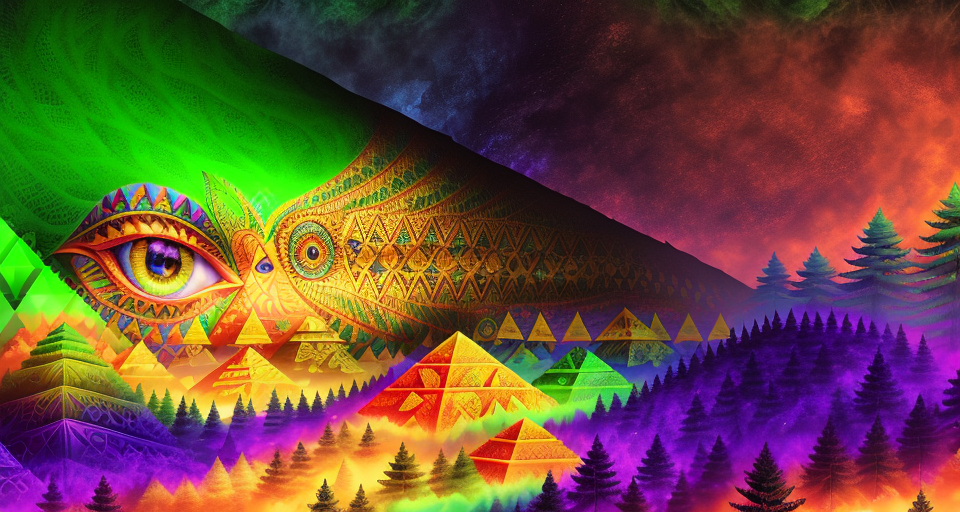

Rendering animation frame 6830 of 8610
  creating in between frame 6825 tween:0.20
  creating in between frame 6826 tween:0.40
  creating in between frame 6827 tween:0.60
  creating in between frame 6828 tween:0.80
  creating in between frame 6829 tween:1.00
seed: 3271900788
cond_prompt:  Let the trees fall when they may, psychedelic vivid colorful xxpjccarajararxx, psychedelic detail, pyramids, third eye illuminati, checkerboard, very very detailed, high resolution, cinematic, 4k, 8k, 32k,psychedelic detail, high quality, intricate psychedelic art detail
uncond_prompt:  close up, dof, depth of field, ugly, deformed, bad drawing, low resolution, streaks, artefacts, bad drawing, incoherent, messy, low resolution, pixelated, nude, nsfw, naked text, words, letters, letter, watermark, logo


+-------+---------+----------+-------+------+-----+---------+----------+---------+-----+----------+-----+---------+
|       |         |          |       |      |     |         |          |         |     |          |     | Aspect  |
| Steps | Scale   | Sampler  | Angle | Zoom | Tx  | Ty      | Tz       | Rx      | Ry  | Rz       | Rw  | Ratio   |
+=======+=========+==========+=======+======+=====+=========+==========+=========+=====+==========+=====+=========+
| 50    | 9.5017… | euler_a… | 0.0   | 0.0  | 0.0 | 2.0372… | 4.001716 | -0.339… | 0.0 | 0.03992… | 0.0 | 1.0     |
+-------+---------+----------+-------+------+-----+---------+----------+---------+-----+----------+-----+---------+

+-----------+-----------+----------+-------+----------+----------+--------+-------+--------+-----------+----------+
| Near      |           | Field Of |       |          |          |        |       |        |           | Midas    |
| Plane     | Far Plane | View     | Noise | Strength | Contrast | Kernel | Sigma | Amount | Threshold | Weight   |
+===========+===========+==========+=======+==========+==========+========+=======+========+===========+==========+
| 300.0     | 12000.0   | 70.0     | 0.03  | 0.581716 | 1.0      | 5      | 1.0   | 0.2    | 0.0       | 0.3      |
+-----------+-----------+----------+-------+----------+----------+--------+-------+--------+-----------+----------+

+-------------+--------------+---------------+
| Border Mode | Padding Mode | Sampling Mode |
+=============+==============+===============+
| wrap        | border       | bicubic       |
+-------------+--------------+---------------+

INFO:pytorch_lightning.utilities.seed:Global seed set to 3271900788


tenc: 20


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
#@title $ {\large \textsf{Load Settings}}$
print("\033[38;2;255;192;203m")
from IPython import display
import time
from types import SimpleNamespace
import sys
sys.path.extend(['Real-ESRGAN', 'Practical-RIFE'])
import importlib
import upscale_helper
importlib.reload(upscale_helper)
from upscale_helper import upscale_video
import interpolator_helper
# importlib.reload(interpolator_helper)
from interpolator_helper import interpolate_inference_video
start_time = time.time()

#@markdown **Auto UpscaleX4 and Interpolation to 60FPS**
auto_upscale_and_interpolate_completed_animation = True #@param{type: "boolean"}

#@markdown **Must only use with Music Video Mode**
merge_audio_with_video = False #@param{type:"boolean"}

#@markdown **Reload Textual Inversion and Loras if you recently added new ones**
reload_tis_and_loras = True #@param{type:"boolean"}

#@markdown **NLTK Random Word Generator, Use This to Spice Up Your Exisiting Prompts!**

use_random_words_nltk = False #@param {type: "boolean"}
if use_random_words_nltk:
    # function to get a random adjective or noun
    def get_random_word(pos):
        synsets = wordnet.all_synsets(pos=pos)
        lemmas = [l for s in synsets for l in s.lemmas()]
        return random.choice(lemmas).name()

    # loop through the dictionary values and add random adjectives and nouns
    for key in cond_prompts:
        tokens = nltk.word_tokenize(cond_prompts[key])
        tagged_tokens = nltk.pos_tag(tokens)
        new_tokens = []
        for token, pos in tagged_tokens:
            new_tokens.append(token)
            if pos.startswith('N'):
                new_token = get_random_word('n')
                new_tokens.append(new_token)
            elif pos.startswith('J'):
                new_token = get_random_word('a')
                new_tokens.append(new_token)
        new_value = ' '.join(new_tokens)
        cond_prompts[key] = new_value

    # print the updated dictionary
    print(cond_prompts)
#@markdown ####**Deforum Args**
override_settings_with_file = False #@param {type:"boolean"}
settings_file = "custom" #@param ["custom", "512x512_aesthetic_0.json","512x512_aesthetic_1.json","512x512_colormatch_0.json","512x512_colormatch_1.json","512x512_colormatch_2.json","512x512_colormatch_3.json"]
custom_settings_file = "/content/drive/MyDrive/Settings.txt"#@param {type:"string"}

def DeforumArgs():
    #@markdown ####**Batch Settings**
    auto_upscale = True #@param{type: "boolean"}
    #@markdown **IF enabled, will automatically upscale Image Renders Only, Will work on animation inference. HEAVILY `increases` rendering time**
    n_batch = 1 #@param
    n_samples = 1 #@param
    batch_name = "steambreather" #@param {type:"string"}
    filename_format = "{timestring}_{index}_{prompt}.png" #@param ["{timestring}_{index}_{seed}.png","{timestring}_{index}_{prompt}.png"]
    seed_behavior = "iter" #@param ["iter","fixed","random","ladder","alternate"]
    seed_iter_N = 1 #@param {type:'integer'}
    make_grid = False #@param {type:"boolean"}
    grid_rows = 2 #@param
    outdir = get_output_folder(root.output_path, batch_name)

    #@markdown ####**Image Settings**
    W = 960 #@param
    H = 512 #@param
    W, H = map(lambda x: x - x % 64, (W, H))  # resize to integer multiple of 64
    bit_depth_output = 8 #@param [8, 16, 32] {type:"raw"}
    render_video_every = 1000 #@param{type: "number"}
    #@markdown ####**Sampling Settings**
    use_uni_pc = False #@param{type: "boolean"}
    seed = -1 #@param
    sampler = 'euler_ancestral' #@param ["klms","dpm2","dpm2_ancestral","heun","euler","euler_ancestral","plms", "ddim", "dpm_fast", "dpm_adaptive", "dpmpp_2s_a", "dpmpp_2m", "dpmpp_sde", "lms_karras", "dmp2_karras", "dpm2_ancestral_karras", "dpmpp_2s_a_karras", "dpmpp_2m_karras", "dpmpp_sde_karras", "uni_pc"]
    steps = 65 #@param
    scale = 8.5 #@param
    ddim_eta = 0.0 #@param
    dynamic_threshold = None
    static_threshold = None

    #@markdown ####**CONTROLNET**

    a_prompt = "4k, high res, ultra detailed, perfect, masterpiece, exceptional, crisp, clear, sharp" #@param{type: "string"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param {type: "number"}
    guess_mode = False #@param {type: "boolean"}
    low_threshold = 200 #@param{type: "number"}
    high_threshold = 400 #@param{type: "number"}
    save_memory = True #@param{type: "boolean"}
    display_detected_map = False #@param{type: "boolean"}

    #@markdown ####**Draw Text Settings**
    enable_draw_text_on_image = False #@param{type: "boolean"}
    apply_text_after_image_generation = False #@param{type: "boolean"}
    font_path = "/content/drive/MyDrive/Cyberpunks.ttf" #@param {type: "string"}
    draw_text_font_size = 64 #@param {type:"integer"}
    text_color = "#FFFF00" #@param ['#000000', '#FFFFFF', '#800080', '#0000FF', '#FFA500', '#008000', '#FF0000', '#FFFF00']
    text_position = "center" #@param ["bottom", "top", "center"]
    draw_text_frame = text_frames

    #@markdown ####**Glitch Settings**
    enable_glitch_effect = False #@param{type: "boolean"}
    apply_glitch_after_image_generation = False #@param{type: "boolean"}
    glitch_effect_diagonal = False #@param {type: "boolean"}
    glitch_every_nth_frame = None #@param {type: "raw"}
    glitch_axis = 1 #@param {type:"slider", min:0, max:2, step:1}
    glitch_alpha = 0.4 #@param{type:"slider", min:0.01, max:1, step:0.01}
    glitch_gamma = 0 #@param {type:"slider", min:0, max:10, step:0.01}
    glitch_row_size = 1 #@param{type: "slider", min:1, max:10, step:1}
    glitch_pixel_shift = 20 #@param {type:"slider", min:0, max:100, step:1}
    glitch_shift = 20 #@param {type:"slider", min:0, max:100, step:1}

    #@markdown ####**Save & Display Settings**
    save_samples = True #@param {type:"boolean"}
    save_settings = True #@param {type:"boolean"}
    display_samples = True #@param {type:"boolean"}
    save_sample_per_step = False #@param {type:"boolean"}
    show_sample_per_step = False #@param {type:"boolean"}

    #@markdown ####**Init Settings**
    use_init = False #@param {type:"boolean"}
    strength = 0.9 #@param {type:"number"}
    strength_0_no_init = True # Set the strength to 0 automatically when no init image is used
    init_image = "" #@param {type:"string"}
    add_init_noise = True #@param {type:"boolean"}
    init_noise = 0.025 #@param
    # Whiter areas of the mask are areas that change more
    use_mask = False #@param {type:"boolean"}
    use_alpha_as_mask = False # use the alpha channel of the init image as the mask
    mask_file = "https://www.filterforge.com/wiki/images/archive/b/b7/20080927223728%21Polygonal_gradient_thumb.jpg" #@param {type:"string"}
    invert_mask = False #@param {type:"boolean"}
    # Adjust mask image, 1.0 is no adjustment. Should be positive numbers.
    mask_brightness_adjust = 1.0  #@param {type:"number"}
    mask_contrast_adjust = 1.0  #@param {type:"number"}
    # Overlay the masked image at the end of the generation so it does not get degraded by encoding and decoding
    overlay_mask = True  # {type:"boolean"}
    # Blur edges of final overlay mask, if used. Minimum = 0 (no blur)
    mask_overlay_blur = 5 # {type:"number"}

    #@markdown ####**Exposure/Contrast Conditional Settings**
    mean_scale = 0 #@param {type:"number"}
    var_scale = 0 #@param {type:"number"}
    exposure_scale = 0 #@param {type:"number"}
    exposure_target = 0.5 #@param {type:"number"}

    #@markdown ####**Color Match Conditional Settings**
    colormatch_scale = 0 #@param {type:"number"}
    colormatch_image = "https://www.saasdesign.io/wp-content/uploads/2021/02/palette-3-min-980x588.png" #@param {type:"string"}
    colormatch_n_colors = 4 #@param {type:"number"}
    ignore_sat_weight = 0 #@param {type:"number"}

    #@markdown ####**CLIP\Aesthetics Conditional Settings**
    clip_name = 'ViT-L/14' #@param ['ViT-L/14', 'ViT-L/14@336px', 'ViT-B/16', 'ViT-B/32']
    clip_scale = 0 #@param {type:"number"}
    aesthetics_scale = 0 #@param {type:"number"}
    cutn = 1 #@param {type:"number"}
    cut_pow = 0.0001 #@param {type:"number"}

    #@markdown ####**Other Conditional Settings**
    init_mse_scale = 0 #@param {type:"number"}
    init_mse_image = "https://cdn.pixabay.com/photo/2022/07/30/13/10/green-longhorn-beetle-7353749_1280.jpg" #@param {type:"string"}
    blue_scale = 0 #@param {type:"number"}

    #@markdown ####**Conditional Gradient Settings**
    gradient_wrt = 'x0_pred' #@param ["x", "x0_pred"]
    gradient_add_to = 'both' #@param ["cond", "uncond", "both"]
    decode_method = 'linear' #@param ["autoencoder","linear"]
    grad_threshold_type = 'dynamic' #@param ["dynamic", "static", "mean", "schedule"]
    clamp_grad_threshold = 0.2 #@param {type:"number"}
    clamp_start = 0.2 #@param
    clamp_stop = 0.01 #@param
    grad_inject_timing = list(range(1,10)) #@param

    #@markdown ####**Speed vs VRAM Settings**
    cond_uncond_sync = False #@param {type:"boolean"}
    precision = 'autocast'
    C = 4
    f = 8

    cond_prompt = ""
    cond_prompts = ""
    uncond_prompt = ""
    uncond_prompts = ""
    timestring = ""
    init_latent = None
    init_sample = None
    init_sample_raw = None
    mask_sample = None
    init_c = None
    seed_internal = 0

    return locals()

args_dict = DeforumArgs()
anim_args_dict = DeforumAnimArgs()

if override_settings_with_file:
    load_args(args_dict, anim_args_dict, settings_file, custom_settings_file, verbose=False)

args = SimpleNamespace(**args_dict)
anim_args = SimpleNamespace(**anim_args_dict)

args.timestring = time.strftime('%Y%m%d%H%M%S')
args.strength = max(0.0, min(1.0, args.strength))

# Load clip model if using clip guidance
if (args.clip_scale > 0) or (args.aesthetics_scale > 0):
    root.clip_model = clip.load(args.clip_name, jit=False)[0].eval().requires_grad_(False).to(root.device)
    if (args.aesthetics_scale > 0):
        root.aesthetics_model = load_aesthetics_model(args, root)

if args.seed == -1:
    args.seed = random.randint(0, 2**32 - 1)
if not args.use_init:
    args.init_image = None
if args.sampler == 'plms' and (args.use_init or anim_args.animation_mode != 'None'):
    print(f"Init images aren't supported with PLMS yet, switching to KLMS")
    args.sampler = 'klms'
if args.sampler != 'ddim':
    args.ddim_eta = 0

if anim_args.animation_mode == 'None':
    anim_args.max_frames = 1
elif anim_args.animation_mode == 'Video Input':
    args.use_init = True

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

with open("Deforum.yaml", "w") as file:
  yaml.dump(DeforumAnimArgs(), file)
  yaml.dump(DeforumArgs(), file)
  yaml.dump(cond_prompts, file)
  yaml.dump(uncond_prompts, file)

if reload_tis_and_loras:
    print('..RELOADING TEXTUAL INVERSION AND LORAS!..')
    list_available_loras()
    print('Loras detected:\n','\n'.join(list(available_loras.keys())))
    used_loras = list(available_loras.keys())
    used_loras_weight = 0.0
    used_loras_weights = [used_loras_weight for _ in range(len(used_loras))]
    used_loras_weights = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] #@param
    inject_lora(root.model)
    load_loras(used_loras,used_loras_weights)

    end_time = time.time()

    print(f"\033[38;2;255;192;203m..TEXTUAL INVERSIONS/{used_loras if used_loras else 'loras'} LOADED IN {end_time-start_time:.2f} seconds!..")

    print("\033[38;2;255;192;203m..Done! Happy Creating!..")

# dispatch to appropriate renderer
if anim_args.animation_mode == '2D' or anim_args.animation_mode == '3D':
    render_animation(root, anim_args, args, cond_prompts, uncond_prompts)
elif anim_args.animation_mode == 'Video Input':
    render_input_video(root, anim_args, args, cond_prompts, uncond_prompts)
elif anim_args.animation_mode == 'Interpolation':
    render_interpolation(root, anim_args, args, cond_prompts, uncond_prompts)
else:
    render_image_batch(root, args, anim_args, cond_prompts, uncond_prompts)

OUTDIR = args.outdir
if anim_args.animation_mode != 'None':
    if auto_upscale_and_interpolate_completed_animation:

        realesrgan_input_video = ""
        realesrgan_output_directory = ""
        realesragan_model_name = 'realesr-general-x4v3'
        realesrgan_denoise_strength = 1
        realesrgan_target_upscale_factor = "4"
        realesrgan_filename_suffix = "out"
        realesrgan_tile_amount = 0
        realesrgan_tile_pad_amount = 10
        realesrgan_pre_pad_amount = 0
        realesrgan_face_enhance_mode = False
        realesrgan_fp32_mode = True
        realesrgan_target_video_fps = 30
        realesrgan_ffmpeg_location = "ffmpeg"
        realesrgan_extract_frames_to_folder_first = False
        realesrgan_number_of_processes_per_gpu = 1
        realesrgan_alpha_upsampler = "realesrgan"
        realesrgan_image_extension = "auto"

        def upscale_args():
            input = realesrgan_input_video
            output = realesrgan_output_directory
            model_name = realesragan_model_name
            denoise_strength = realesrgan_denoise_strength
            outscale = realesrgan_target_upscale_factor
            outscale = int(outscale)
            suffix = realesrgan_filename_suffix
            tile = realesrgan_tile_amount
            tile_pad = realesrgan_tile_pad_amount
            pre_pad = realesrgan_pre_pad_amount
            face_enhance = realesrgan_face_enhance_mode
            fp32 = realesrgan_fp32_mode
            fps = realesrgan_target_video_fps
            ffmpeg_bin = realesrgan_ffmpeg_location
            extract_frame_first = realesrgan_extract_frames_to_folder_first
            num_process_per_gpu = realesrgan_number_of_processes_per_gpu
            alpha_upsampler = realesrgan_alpha_upsampler
            ext = realesrgan_image_extension
            return locals()

        args = upscale_args()
        args = SimpleNamespace(**args)

        for outvid in os.listdir(OUTDIR):
            if outvid.endswith("final.mp4"):
                args.input = os.path.join(OUTDIR, outvid)
                args.output = OUTDIR
                upscaled_video = f"{OUTDIR}/{outvid}"
                upscale_video(args)

        INPUT = os.path.splitext(upscaled_video)[0] + "_out.mp4"

        RIFE_input_video = args.input
        RIFE_output_video = ""
        RIFE_input_image = None
        RIFE_montage = False
        RIFE_model_directory = "/content/Practical-RIFE/RIFE46"
        RIFE_fp16_mode = False
        RIFE_UHD_mode = True
        RIFE_scale_factor = 0.5
        RIFE_skip_static_frames = False
        RIFE_fps_target = None
        RIFE_use_png_sequence = False
        RIFE_video_output_extension = 'mp4'
        RIFE_exp_speed_factor = "1"
        RIFE_target_interpolation_factor = "4"

        def interpolate_video():
            video = RIFE_input_video
            output = RIFE_output_video
            img = RIFE_input_image
            montage = RIFE_montage
            modelDir = RIFE_model_directory
            fp16 = RIFE_fp16_mode
            UHD = RIFE_UHD_mode
            scale = RIFE_scale_factor
            skip = RIFE_skip_static_frames
            fps = RIFE_fps_target
            fps = int(fps)
            png = RIFE_use_png_sequence
            ext = RIFE_video_output_extension
            exp = RIFE_exp_speed_factor
            exp = int(exp)
            multi = RIFE_target_interpolation_factor
            multi = int(multi)
            return locals()

        args = interpolate_video()
        args = SimpleNamespace(**args)

        os.chdir("/content/Practical-RIFE")
        for outvid in os.listdir(OUTDIR):
            if outvid.endswith("out.mp4"):
                args.video = INPUT
                args.output = f"{os.path.splitext(args.video)[0]}_RIFE.mp4"
                interpolate_inference_video(args)

        INTERP_OUTPUT = args.output

        os.chdir("/content")

        if merge_audio_with_video:
            movie_py_output = INTERP_OUTPUT
            #ADD AUDIO

            from moviepy.editor import VideoFileClip, AudioFileClip

            video = VideoFileClip(movie_py_output)
            audio = AudioFileClip(music_video_args.audio_fpath)
            OUTVID_WITH_AUDIO = f"{os.path.splitext(movie_py_output)[0]}_audio_final.mp4"

            final_clip = video.set_audio(audio)
            final_clip.write_videofile(OUTVID_WITH_AUDIO, audio_codec='aac')

print("\033[38;2;255;192;203m..Your Animation Has Completed, Congratulations..")
elapsed_time = time.time() - start_time
print("\033[38;2;255;192;203mElapsed time:", elapsed_time, "seconds")

In [ ]:
#@title **DELETE DIRECTORY**
remove_outdir = True #@param{type:"boolean"}
if remove_outdir:
  !rm -rf "$args.outdir" --verbose
else:
  print(f"\u001b[33mFiles in The Output Directory: \u001b[36m{args.outdir}\u001b[0m")
  display.display(os.listdir(args.outdir))

In [ ]:
#@title **DELETE FILES IN DIRECTORY FROM `filenumber_greater_than`**
import os
import glob
from tqdm.auto import tqdm

remove_files_from_range = False #@param{type:"boolean"}
# Set the directory where the files are located
timestring = "20230307065323" #@param{type:"string"}
filenumber_greater_than = 2100 #@param{type:"number"}
# Find all files with names matching the pattern
files = glob.glob(os.path.join(args.outdir, f"{timestring}_0*.png"))

if remove_files_from_range:
# Loop through the files and delete those with numbers greater than 3300
  for file in files:
    number = int(file[-9:-4]) # Extract the number from the filename
    if number > filenumber_greater_than:
      os.remove(file) # Delete the file
        # print(file)

# 🔮 $\color{orange} {\textsf {STEP 5.a (OPTIONAL)DEFORUM MUSIC VIDEO SETTINGS}}$ 🔮

In [ ]:
#@title **MUSIC VIDEO CREATOR**

import helpers.audio_parser_helper
from helpers.audio_parser_helper import create_music_video_animation_args, get_keyframes_total_for_animation, get_camera_movement
from types import SimpleNamespace

import librosa
import numpy as np

import torch
import gc
gc.collect()
torch.cuda.empty_cache()

def generate_keyframe_string(audiofile, framerate=12, function='x'):
    # Load the audio file
    audio_file, sr = librosa.load(audiofile)

    # Calculate the length of the audio file in seconds
    song_length = librosa.get_duration(y=audio_file, sr=sr)

    # Set the number of frames to be equal to the length of the song in seconds
    num_frames = int(song_length * framerate)

    # Calculate the volume levels for each frame
    frame_length = int(sr / framerate)
    volume_levels = [np.mean(np.abs(audio_file[i:i+frame_length])) for i in range(0, len(audio_file), frame_length)]

    # Generate the keyframe string
    keyframe_string = ''
    for i, volume_level in enumerate(volume_levels):
        x = volume_level
        y = i
        value = eval(function)
        keyframe_string += f'{i}: ({value:02f}), '

    return keyframe_string.rstrip(', ')

# Example usage
audiofile = '/content/drive/MyDrive/AI/StableDiffusion/audio/htdemucs/audio/drums.mp3'
# keyframe_string = generate_keyframe_string(audiofile, framerate=30, function='4 + x**2')#np.sin(np.pi*y/30)
# from ipywidgets import Textarea

# widget1 = Textarea(value=keyframe_string)
# display.display(widget1)

create_new_music_video = True #@param{type: "boolean"}
def music_video_args():
    music_video_target_fps = 30 #@param{type: "number"}
    yt_video_url = "https://www.youtube.com/watch?v=HEubrZV04b0" #@param{type: "string"}
    audio_fpath = None #@param
    whisper_segmentation = True #@param{type: "boolean"}
    video_duration = None #@param
    whisper = None #@param
    added_prompt = ", psychedelic vivid colorful xxpjccarajararxx, psychedelic detail, pyramids, third eye illuminati, checkerboard, very very detailed, high resolution, cinematic, 4k, 8k, 32k,psychedelic detail, high quality, intricate psychedelic art detail" #@param{type: "string"}
    amount = 4 #@param{type: "number"}
    baseline = 4 #@param{type: "number"}
    strength_baseline = 0.75
    amplifier = 4 #@param{type: "number"}
    return locals()

music_video_args = music_video_args()
music_video_args = SimpleNamespace(**music_video_args)

if create_new_music_video:
    music_video_prompts, music_video_max_frames = create_music_video_animation_args(root, music_video_args)

def DeforumAnimArgs():

    animation_mode = '3D'
    max_frames = music_video_max_frames
    border_schedule = "0:('wrap')" #,60:('replicate'),90:('wrap')
    use_quaternion_rotation = False
    angle = "0:(0)"
    zoom = "0:(0)"
    translation_x = "0:(0)"
    translation_y = "0: (0), 30: (3*(sin(3.141*t/300)))"
    translation_z = generate_keyframe_string(audiofile, framerate=30, function='4 + x**2')#np.sin(np.pi*y/30)
    rotation_3d_x = "0: (0), 30: (-0.5*(sin(3.141*t/300)))"
    rotation_3d_y = "0:(0)"
    rotation_3d_z = "0: (0), 30:(((1*1 / 3.141) * arcsin(cos(120 / 60 * 3.141 * (t + 0) / 450)**3) + 0.01))"
    rotation_3d_w = "0:(0)"
    flip_2d_perspective = False
    perspective_flip_theta = "0:(0)"
    perspective_flip_phi = "0:(t%15)"
    perspective_flip_gamma = "0:(0)"
    perspective_flip_fv = "0:(53)"
    enable_cfg_scale_schedule = True
    cfg_scale_schedule = generate_keyframe_string(audiofile, framerate=30, function='9.5 + x**2')#np.sin(np.pi*y/30)
    noise_schedule = "0:(.03)"
    # strength_schedule = "0:(.80), 30: (0.1*(cos(3.141*t/180)**18000)+0.58)"
    strength_schedule = generate_keyframe_string(audiofile, framerate=30, function='0.58 + x**2')#np.sin(np.pi*y/30)
    contrast_schedule = "0: (1.0)"
    hybrid_comp_alpha_schedule = "0:(1)"
    hybrid_comp_mask_blend_alpha_schedule = "0:(0.5)"
    hybrid_comp_mask_contrast_schedule = "0:(1)"
    hybrid_comp_mask_auto_contrast_cutoff_high_schedule =  "0:(100)"
    hybrid_comp_mask_auto_contrast_cutoff_low_schedule =  "0:(0)"

    enable_checkpoint_scheduling = False
    checkpoint_schedule = "0: (\"Realistic_Deliberate_Nova_Dream.ckpt\"), 2000: (\"Realistic_Dream_Nova_Deliberate.ckpt\"), 2000: (\"DeliberateDream.ckpt\")"

    enable_cadence_schedule = False
    cadence_schedule = "0:(4),300:(6), 600:(8), 900:(4), 1200:(4),1400:(6), 1600:(8), 1900:(4), 14100:(8),14140:(2), 14150:(5)"

    enable_schedule_samplers = False
    sampler_schedule = "0:('dpm2_ancestral'),100:('dpmpp_2s_a'),200:('dpm2_ancestral'),300:('dpmpp_2s_a'),400:('euler_ancestral'),500:('dpm2_ancestral'),1000:('dpm_fast'),4000:('dpm_adaptive'),5000:('dpmpp_2s_a'),6000:('dpmpp_2m')"

    kernel_schedule = "0: (5)"
    sigma_schedule = "0: (1.0)"
    amount_schedule = "0: (0.2)"
    threshold_schedule = "0: (0.0)"

    steps_schedule = "0:(60), 30: (10*(cos(3.141*t/60)**18000)+50)"

    color_coherence = 'Match Frame 0 RGB'
    color_coherence_video_every_N_frames = 1
    color_force_grayscale = False
    diffusion_cadence = '5'

    use_depth_warping = True
    midas_weight_schedule = "0:(0.3), 30: (0.6), 60: (1), 700:(0.8), 800:(0.6), 900:(0.3)"
    midas_weight = float(midas_weight_schedule.split(",")[0].split(":")[1].strip("()"))
    aspect_ratio_schedule = "0:(1)"
    near_schedule = "0:(200), 30: (250), 60: (300)"
    far_schedule = "0:(10000), 30: (11000), 60: (12000)"
    fov_schedule = "0: (100), 30:(80), 60:(70)"
    padding_schedule = "0: ('border')"#, 60:('reflection'), 90:('zeros'),120: ('border')"
    sampling_schedule = "0:('bicubic')"#, 60:('bilinear'), 90:('nearest'),120:('bicubic')"
    save_depth_maps = False

    video_init_path ='/content/drive/MyDrive/A_test_resized.mp4'
    extract_nth_frame = 1 #@param{type:"number"}
    overwrite_extracted_frames = False
    use_mask_video = False
    video_mask_path ='/content/drive/MyDrive/A_test_resized.mp4'

    hybrid_generate_inputframes = False
    hybrid_use_first_frame_as_init_image = False
    hybrid_motion = "None"
    hybrid_motion_use_prev_img = False
    hybrid_flow_method = "Farneback"
    hybrid_composite = False
    hybrid_comp_mask_type = "None"
    hybrid_comp_mask_inverse = False
    hybrid_comp_mask_equalize = "None"
    hybrid_comp_mask_auto_contrast = False
    hybrid_comp_save_extra_frames = False
    hybrid_use_video_as_mse_image = False

    interpolate_key_frames = False
    interpolate_x_frames = 4

    resume_from_timestring = False #@param{type: "boolean"}
    resume_timestring = "20230613064733" #@param{type: "string"}

    return locals()

cond_prompts = dict(music_video_prompts)
uncond_prompts = {0: " close up, dof, depth of field, ugly, deformed, bad drawing, low resolution, streaks, artefacts, bad drawing, incoherent, messy, low resolution, pixelated, nude, nsfw, naked text, words, letters, letter, watermark, logo",}
text_frames = {0: ""}

anim_args = DeforumAnimArgs()
anim_args = SimpleNamespace(**anim_args)

2023-06-20 06:29:36.383 | INFO     | helpers.audio_parser_helper:create_music_video_animation_args:116 - --Initializing Audio Analysis--
2023-06-20 06:29:36.388 | INFO     | helpers.audio_parser_helper:create_music_video_animation_args:137 - ..Downloading YT Video..
2023-06-20 06:29:37.578 | INFO     | helpers.audio_parser_helper:create_music_video_animation_args:157 - ..Converting to '.m4a'..


b''
downloaded: /content/drive/MyDrive/AI/StableDiffusion/audio/DOWNLOADED__Mastodon - Steambreather [Official Music Video].webm


2023-06-20 06:29:42.921 | INFO     | helpers.audio_parser_helper:create_music_video_animation_args:164 - ..Creating '.mp3' file for demucs separation..


b"ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers\n  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)\n  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis

2023-06-20 06:29:50.415 | INFO     | helpers.audio_parser_helper:create_music_video_animation_args:207 - ..Segmenting with Whisper..


AUDIO: /content/drive/MyDrive/AI/StableDiffusion/audio/audio.mp3
b"Detecting language using up to the first 30 seconds. Use `--language` to specify the language\nDetected language: English\n[00:00.000 --> 00:06.480]  You\n[00:30.000 --> 00:33.400]  It's running outside the mask of lies\n[00:33.400 --> 00:38.480]  You know I see you all in white\n[00:38.480 --> 00:45.180]  Hoping you'll grow to the fruitful vines\n[00:45.180 --> 00:49.740]  And the rain to give us light\n[01:04.320 --> 01:08.080]  Violence born within my mind\n[01:08.080 --> 01:13.800]  I know it always takes its time\n[01:13.800 --> 01:19.780]  Climbing inside the cosmic eye\n[01:19.780 --> 01:25.860]  And we'll give the end no mercy\n[01:27.740 --> 01:33.440]  I wonder who I am\n[01:33.440 --> 01:39.980]  Relections of another day\n[01:39.980 --> 01:45.060]  I wonder where I stand\n[01:45.060 --> 01:49.060]  I'm afraid of myself\n[02:02.780 --> 02:06.180]  Watching you crumble to the ground\n[02:06.180 --> 02:11.980] 

100%|████████████████████████████████████████████████████████████████████████| 292.5/292.5 [00:12<00:00, 23.46seconds/s]
2023-06-20 06:32:19.465 | INFO     | helpers.audio_parser_helper:create_music_video_animation_args:285 - ..Printing to A Interactive Downloadable Table..


Row
    [0] Column
        [0] TextInput(name='Enter filename', value='default.csv')
        [1] Button(name='Download Table')
    [1] Tabulator(formatters={'bool': {'type': '...}, value=    Timestamp (sec)       ...)

In [ ]:
remove_audio_and_whisper_folder = False #@param{type:"boolean"}

if remove_audio_and_whisper_folder:
    !rm -rf "/content/drive/MyDrive/AI/StableDiffusion/whispers" --verbose
    !rm -rf "/content/drive/MyDrive/AI/StableDiffusion/audio" --verbose

In [ ]:
#@title **EXTRACT AUDIO FROM VIDEO FILE**
from moviepy.editor import VideoFileClip

run_all_toggle = False #@param{type:"boolean"}

def extract_audio_from_video(video_filename, audio_filename):
        with VideoFileClip(video_filename) as video:
            audio = video.audio
            audio.write_audiofile(audio_filename)

if run_all_toggle:
    video_filename = '' #@param{type:"string"}
    audio_filename = '' #@param{type:"string"}

    extract_audio_from_video(video_filename, audio_filename)

# $ 📼 \color{orange} { \textsf{STEP 5.b CREATE VIDEO SEQUENCE FROM FRAMES}}$ 📼


In [ ]:
#@title $ { \textsf{COMPILE FRAMES TO VIDEO(SUBPROCESS--SOMETIMES FASTER)}}$
import time
import subprocess
from IPython import display

start_time = time.time()
#@markdown **This cell will compile ALL images in the folder you provide, so make sure that the folder you specify has the correct images and do not have any unwanted images.**
vid_fps = 30 #@param {type:'number'}
image_ext = '*.png' #@param ['*.png', '*.PNG', '*.jpg', '*.jpeg', '*.JPEG', '*.JPG']
use_args_outdir = True #@param{type:"boolean"}
if use_args_outdir:
    input_path = args.outdir
else:
    input_path = '/content/drive/MyDrive/AI/StableDiffusion/2023-03/controlnet_test' # @param {type: 'string'}
pix_fmt = 'yuv420p'
#@markdown **The input folder with the frames you want to create a video with.**

raw_vid = '/content/temp.mp4' # @param {type: 'string'}
#@markdown **This `raw_vid` param results in an uncompressed, unformatted video, so to enable compatibility with most video players, we compress it to `compressed_vid`**

compressed_vid = '/content/created_video.mp4' # @param {type: 'string'}
#@markdown **This `compressed_vid` is now compatible with most video players and should play properly.**
make_gif = False #@param {type:"boolean"}
#@markdown **Please ensure you change the extension of your video to `.gif` if you intend to make gifs**

%cd $input_path

process = subprocess.Popen(['ffmpeg',
                            '-framerate', f"{vid_fps}",
                            '-pattern_type', 'glob',
                            '-i', image_ext,
                            '-crf', '17',
                            '-pix_fmt', pix_fmt,
                            '-c:v', 'libx264',
                            '-b:v', '0',
                            '-preset', 'veryfast',
                            '-y', raw_vid], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

output, error = process.communicate()

display_ffmpeg_output=False #@param {type:"boolean"}

if display_ffmpeg_output:
  display.display(output)
  display.display(error)

%cd "/content/"
if not make_gif:
  process = subprocess.Popen(['ffmpeg', '-i', raw_vid, '-c:v', 'libx264', '-rc', 'vbr', '-crf', '17', '-pix_fmt', 'yuv420p', '-b:v', '0', '-preset', 'veryfast', '-y', compressed_vid], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

  output, error = process.communicate()

else:

  process = subprocess.Popen(['ffmpeg', '-i', raw_vid, '-r', str(vid_fps), '-y', compressed_vid], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

  output, error = process.communicate()

if display_ffmpeg_output:
  display.display(output)
  display.display(error)

elapsed_time = time.time() - start_time

print("\033[38;2;255;192;203mElapsed time:", elapsed_time, "seconds")

In [ ]:
#@title $ { \textsf{COMPILE FRAMES TO VIDEO(FFMPEG)}}$
import time
run_all_toggle = False #@param{type:"boolean"}

if run_all_toggle:
    start_time = time.time()

    #@markdown **This cell will compile ALL images in the folder you provide, so make sure that the folder you specify has the correct images and do not have any unwanted images.**
    vid_fps = 30 #@param {type:'number'}
    image_ext = "'*.png'" #@param ['*.png', '*.PNG', '*.jpg', '*.jpeg', '*.JPEG', '*.JPG']
    input_path = '/content/drive/MyDrive/AI/StableDiffusion/2023-02/NeonMutation_SeventhHell ' # @param {type: 'string'}
    #@markdown **The input folder with the frames you want to create a video with.**
    raw_vid = '/content/temp.mp4' # @param {type: 'string'}
    #@markdown **This `raw_vid` param results in an uncompressed, unformatted video, so to enable compatibility with most video players, we compress it to `compressed_vid`**

    compressed_vid = '/content/NeonMutation_SeventhHell.mp4' # @param {type: 'string'}
    #@markdown **This `compressed_vid` is now compatible with most video players and should play properly.**

    make_gif = False #@param {type:"boolean"}
    #@markdown **Please ensure you change the extension of your video to `.gif` if you intend to make gifs**

    %cd $input_path

    !ffmpeg -framerate $vid_fps \
    -pattern_type glob \
    -i  $image_ext \
    -y $raw_vid

    %cd '/content'
    if not make_gif:
    !ffmpeg -i $raw_vid \
    -c:v libx264 \
    -rc vbr \
    -cq 19 \
    -pix_fmt yuv420p \
    -b:v 0 \
    -y $compressed_vid

    else:
    !ffmpeg \
    -y \
    -i $raw_vid \
    -r $vid_fps \
    $compressed_vid

    elapsed_time = time.time() - start_time

    print("\033[38;2;255;192;203mElapsed time:", elapsed_time, "seconds")
else:
    print("\033[38;2;255;192;203m..Skipping for run all..")

In [ ]:
#@title $ {\textsf{Display The Video Using kora(may error out, try uninstalling with "pip uninstall kora" if it doesn't work)!}}$
from kora.drive import upload_public
from IPython.display import HTML
url = '/content/test.mp4' #@param{type:'string'}
url = upload_public(url)
# mp4_path = "/content/drive/MyDrive/AI/StableDiffusion/2023-01/kong/20230123004448.mp4"
# mp4 = open(mp4_path,'rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# then display it
HTML(f"""<video src={url} width=500 controls/>""")

# 🎮 $\color{orange} {\textsf { CONTROLNET}}$ 🎮

In [ ]:
#@title **ControlNet Inference**
import helpers.controlnet
from helpers.controlnet import load_controlnet, generate_control
from ldm.models.diffusion.dpm_solver import DPMSolverSampler
from cldm.ddim_hacked import DDIMSampler
from annotator.hed import HEDdetector
from annotator.canny import CannyDetector
from annotator.midas import MidasDetector
from annotator.openpose import OpenposeDetector

def Control():
    # load_controlnet_opt = False #@param{type: "boolean"}
    controlnet_model_type = "open_pose" #@param["apply_hed", "apply_canny", "apply_depth", "open_pose"]
    #@markdown **SELECT WHICH CONTROL NET INFERENCE TO RUN**
    if controlnet_model_type == "apply_canny":
        controlnet_apply_type = CannyDetector()
    elif controlnet_model_type == "open_pose":
        controlnet_apply_type = OpenposeDetector()
    elif controlnet_model_type == "apply_hed":
        controlnet_apply_type = HEDdetector()
    else:
        controlnet_apply_type = MidasDetector()
    # controlnet_config_path = "/content/deforum-stable-diffusion/ControlNet/models/cldm_v15.yaml" #@param{type: "string"}
    # controlnet_model_path = "/content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/control_sd15_hed.pth" #@param{type: "string"}
    #@markdown **YOU MUST DOWNLOAD THE MODELS FIRST, THEN INPUT THE PATH TO THE MODEL**
    IN_dir = "/content/drive/MyDrive/Atiktok" #@param{type: "string"}
    #@markdown **INPUT DIRECTORY, WHACK NAME, WILL CHANGE LATER**
    if not os.path.exists(IN_dir):
        os.makedirs(IN_dir)
    IN_batch = "Atiktok" #@param{type: "string"}
    #@markdown **INPUT THE NAME YOU WISH YOUR BATCH TO BE**
    OUT_dir = "/content/drive/MyDrive/Atiktok_out" #@param{type: "string"}
    #@markdown **INPUT THE FOLDER YOU WISH TO SAVE YOUR IMAGEES TO**
    generate_frames = False #@param{type: "boolean"}
    video_path = "/content/drive/MyDrive/Atiktok.MP4" #@param {type: "string"}
    #@markdown **INIT VIDEO, `generate_frames` and `video_path` WILL SPLIT THE INIT VIDEO INTO `IN_dir` AND WILL USE THE FRAMES FOR GENERATION.**
    resume_control = True #@param{type: "boolean"}
    #@markdown **ENABLES RESUME FROM `img_idx`**
    img_idx = 1069 #@param{type: "number"}
    #@markdown **SET `img_idx` TO THE NUMBER YOU WANT TO RESUME FROM**
    # max_frames = len(os.listdir(IN_dir))
    prompt = "freaky cyberpunk zombie common_valerian alien cyberpunk creatures cataract , robotpunk theme , cinematic unmotivated sci-fi lineman , sharp suited detail Libra_the_Scales , uhd clear , 4k , clear bituminoid , crisp King_Harold_I" #@param{type: "string"}
    a_prompt = "4k, high detail, very detailed, high quality, masterpiece"#@param{type: "string"}
    #@markdown **ADDED PROMPT**
    n_prompt = "low resolution, blurry, nsfw, nude, low quality, bad drawing, oversaturated, overcontrasted" #@param{type: "string"}
    #@markdown **NEGATIVE PROMPT**

    #@markdown **ADDITIONAL SETTINGS**
    num_samples = 1 #@param{type: "number"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param{type: "number"}
    ddim_steps = 20 #@param{type: "number"}
    guess_mode = False #@param{type: "boolean"}
    strength = 0.9 #@param {type:"slider", min:0, max:1, step:0.01}
    scale = 9 #@param{type: "number"}
    seed = 2092374935 #@param{type: "number"}
    seed_iter = 0
    eta = 0 #@param{type: "number"}
    canny_low_threshold = 100 #@param {type:"slider", min:0, max:255, step:1}
    canny_high_threshold = 200 #@param {type:"slider", min:0, max:255, step:1}
    render_video_every = 30 #@param{type: "number"}
    # if load_controlnet_opt:
    #     model = load_controlnet(controlnet_config_path, controlnet_model_path)
    # model = root.model
    root.model = root.model.float()
    sampler = "ddim_sampler" #@param["dpmsolver_sampler", "ddim_sampler"]
    if sampler == "dpmsolver_sampler":
        dpmsolver_sampler = DPMSolverSampler(root.model)
    else:
        ddim_sampler = DDIMSampler(root.model)
    save_memory = True #@param{type: "boolean"}
    return locals()

control = Control()
control = SimpleNamespace(**control)

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

generate_control(root, control)

# 🎮 $\color{orange} {\textsf { CONTROLNET 1.1}}$ 🎮

##**Install Dependencies**

In [ ]:
#@title **Pesky Pillow install. Run this cell. `Runtime->RestartRuntime` When it completes. Then run again and proceed with the Notebook**
!pip install Pillow==6.2.2

In [ ]:
#@title **Install ControlNet**
import os
import yaml
import time
import subprocess
from google.colab import drive
from tqdm.auto import tqdm

gdrive = "/content/drive"

if not os.path.exists(gdrive):
    drive.mount(gdrive)

def initiatesetup():
    gclone = subprocess.Popen(['git', 'clone', "https://github.com/lllyasviel/ControlNet-v1-1-nightly.git"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = gclone.communicate()
    print(error)

initiatesetup()

!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 torchtext==0.14.1 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install xformers==0.0.16

pkgs = ['cudatoolkit==11.3',
# 'torch==1.12.1',
# 'torchvision==0.13.1',
# 'torchtext==0.13.0',
'numpy==1.23.1']

for pkg in pkgs:
    print(f'..installing {pkg}')
    gclone = subprocess.Popen(['pip', 'install', pkg], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = gclone.communicate()
    print(error)

os.chdir('/content/ControlNet-v1-1-nightly')

# def convert_environment_to_requirements(environment_file, requirements_file):
#     with open(environment_file, 'r') as f:
#         environment = yaml.safe_load(f)

#     dependencies = environment['dependencies']
#     pip_dependencies = []
#     for dependency in dependencies:
#         if isinstance(dependency, dict) and 'pip' in dependency:
#             pip_dependencies.extend(dependency['pip'])

#     with open(requirements_file, 'w') as f:
#         for dependency in pip_dependencies:
#             f.write(dependency + '\n')

# # Example usage
# convert_environment_to_requirements('environment.yaml', 'requirements.txt')
def install_environment():
    pkgs = ['astunparse',
    'blendmodes',
    'accelerate',
    'basicsr',
    'fonts',
    'font-roboto',
    'gfpgan',
    'gradio==3.29.0',
    'numpy',
    'omegaconf',
    'opencv-contrib-python',
    'requests',
    'piexif',
    'pytorch_lightning==1.7.7',
    'realesrgan',
    'scikit-image>=0.19',
    'timm==0.4.12',
    'transformers==4.25.1',
    'einops',
    'jsonmerge',
    'clean-fid',
    'resize-right',
    'torchdiffeq',
    'kornia',
    'lark',
    'inflection',
    'GitPython',
    'torchsde',
    'safetensors',
    'psutil',
    'open-clip-torch',
    'fvcore',
    'Pillow==6.2.2',
    'timm==0.6.12']

    bgntime = time.time()
    for pkg in tqdm(pkgs, total=len(pkgs), desc="Installing", colour="pink"):
        strttime = time.time()
        print(f'\033[38;2;255;192;203m..installing {pkg}..')
        gclone = subprocess.Popen(['pip', 'install', pkg], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        output, error = gclone.communicate()
        elpsdtime = time.time() - strttime
        print(f'\033[38;2;255;192;203m{error}')
        print(f'..package installed in {elpsdtime:02f} seconds')
    print(f'\033[38;2;255;192;203m..Done! All packages installed in {time.time()-bgntime} seconds..')
    environment_installed = True
    return environment_installed

environment_setup = install_environment()
basedir = '/content/ControlNet-v1-1-nightly'

import importlib
import PIL
importlib.reload(PIL)

In [ ]:
#@title **CHECK GPU**
!nvidia-smi

##**Install Models**

In [ ]:
#@title **Install Models**
import os
from tqdm.auto import tqdm
import requests

basedir = '/content/ControlNet-v1-1-nightly'

def download_cnmodel(inputurl, outputpath):
    url = inputurl
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024 # 1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, desc='Downloading Model', unit='iB', unit_scale=True)
    with open(outputpath, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR, something went wrong")
    else:
        print("Model Downloaded and Ready for Use!")

outpath = f'{basedir}/models/'

install_ip2p = True #@param{type:"boolean"}
install_shuffle = True #@param{type:"boolean"}
install_tile = True #@param{type:"boolean"}
install_depth = True #@param{type:"boolean"}
install_canny = True #@param{type:"boolean"}
install_inpaint = True #@param{type:"boolean"}
install_lineart = True #@param{type:"boolean"}
install_mlsd = True #@param{type:"boolean"}
install_normalbae = True #@param{type:"boolean"}
install_openpose = True #@param{type:"boolean"}
install_scribble = True #@param{type:"boolean"}
install_seg = True #@param{type:"boolean"}
install_softedge = True #@param{type:"boolean"}
install_lineart = True #@param{type:"boolean"}
install_lineart_anime = True #@param{type:"boolean"}
install_v15 = True
install_anythingv3 = True #@param{type:"boolean"}

if install_ip2p:
    ip2p = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11e_sd15_ip2p.pth"
    outputpath = f'{outpath}control_v11e_sd15_ip2p.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(ip2p, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_shuffle:
    shuffle = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11e_sd15_shuffle.pth"
    outputpath = f'{outpath}control_v11e_sd15_shuffle.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(shuffle, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_tile:
    tile = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11f1e_sd15_tile.pth"
    outputpath = f'{outpath}control_v11f1e_sd15_tile.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(tile, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_depth:
    depth = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11f1p_sd15_depth.pth"
    outputpath = f'{outpath}control_v11f1p_sd15_depth.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(depth, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_canny:
    canny = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_canny.pth"
    outputpath = f'{outpath}control_v11p_sd15_canny.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(canny, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_inpaint:
    inpaint = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_inpaint.pth"
    outputpath = f'{outpath}control_v11p_sd15_inpaint.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(inpaint, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_lineart:
    lineart = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart.pth"
    outputpath = f'{outpath}control_v11p_sd15_lineart.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(lineart, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_mlsd:
    mlsd = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_mlsd.pth"
    outputpath = f'{outpath}control_v11p_sd15_mlsd.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(mlsd, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_normalbae:
    normalbae = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_normalbae.pth"
    outputpath = f'{outpath}control_v11p_sd15_normalbae.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(normalbae, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_openpose:
    openpose = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_openpose.pth"
    outputpath = f'{outpath}control_v11p_sd15_openpose.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(openpose, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_scribble:
    scribble = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_scribble.pth"
    outputpath = f'{outpath}control_v11p_sd15_scribble.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(scribble, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_seg:
    seg = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_seg.pth"
    outputpath = f'{outpath}control_v11p_sd15_seg.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(seg, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_softedge:
    softedge = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_softedge.pth"
    outputpath = f'{outpath}control_v11p_sd15_softedge.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(softedge, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_lineart_anime:
    lineart = "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15s2_lineart_anime.pth"
    outputpath = f'{outpath}control_v11p_sd15s2_lineart_anime.pth'
    if not os.path.exists(outputpath):
        download_cnmodel(lineart, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_v15:
    v15 = "https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.ckpt"
    outputpath = f'{outpath}v1-5-pruned.ckpt'
    if not os.path.exists(outputpath):
        download_cnmodel(v15, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

if install_anythingv3:
    anythingv3 = "https://huggingface.co/Linaqruf/anything-v3.0/resolve/main/anything-v3-full.safetensors"
    outputpath = f'{outpath}anything-v3-full.safetensors'
    if not os.path.exists(outputpath):
        download_cnmodel(anythingv3, outputpath)
        print(f'Model Downloaded: {outputpath}')
    else:
        print(f'Model already exists at {outputpath}!')

In [ ]:
#@title **Offload Memory**
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

## **Download Init Image From The Internet**

In [ ]:
#@title **Download Image from The Internet for Input Image**
import urllib.request

def download_image(url, file_path):
    urllib.request.urlretrieve(url, file_path)

url = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fencrypted-tbn1.gstatic.com%2Flicensed-image%3Fq%3Dtbn%3AANd9GcSvIfmAlUoW6VvmKCXYRF4QzANekBaicIiy7_FKQdsv7ex3axEgq2C1KZp1tNB_zki5tKzWAE1e9KgNKxI&psig=AOvVaw04ta-BvrBYOKORHQckzDh3&ust=1684305987582000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCOju5_Ke-f4CFQAAAAAdAAAAABAP' #@param{type:"string"}
file_path = '/content/lebron.png' #@param{type:"string"}

download_image(url, file_path)

## **NORMALBAE**

In [ ]:
#@title **NormalBae**
import os
import gc
import time
import subprocess

basedir = '/content/ControlNet-v1-1-nightly'
import os
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random
from IPython.display import clear_output

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.normalbae import NormalBaeDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

from IPython.display import clear_output

def vid2frames(video_path, frames_path, n=1, overwrite=True):
    if not os.path.exists(frames_path) or overwrite:
        try:
            for f in pathlib.Path(frames_path).glob('*.jpg'):
                f.unlink()
        except:
            pass
        assert os.path.exists(video_path), f"Video input {video_path} does not exist"

        vidcap = cv2.VideoCapture(video_path)
        success,image = vidcap.read()
        count = 0
        t=1
        success = True
        while success:
            if count % n == 0:
                cv2.imwrite(frames_path + os.path.sep + f"{t:05}.jpg" , image)     # save frame as JPEG file
                t += 1
            success,image = vidcap.read()
            count += 1
        print("Converted %d frames" % count)
    else: print("Frames already unpacked")

def create_first_video(frame_folder, output_filename, frame_rate=30, quality=17):
    os.chdir(frame_folder)
    pattern = '*.png'
    pix_fmt = 'yuv420p'
    process = subprocess.Popen(['ffmpeg',
                                '-framerate',
                                f"{frame_rate}",
                                '-pattern_type', 'glob',
                                '-i', pattern,
                                '-crf', str(quality),
                                '-pix_fmt', pix_fmt,
                                '-preset', 'veryfast',
                                '-y', output_filename], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output, error = process.communicate()

    display(output)
    display(error)
    os.chdir(basedir)

def load_controlnet():
    model_name = 'control_v11p_sd15_normalbae'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

preprocessor = None

try:
    model
    control.det
    print("--Running Normal_BAE Inference--")
    if control.det != 'Normal_BAE':
        del model
        print('Wrong Model, Loading HED model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

clear_output()

def process_normalbae(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    global preprocessor

    if det == 'Normal_BAE':
        if not isinstance(preprocessor, NormalBaeDetector):
            preprocessor = NormalBaeDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution))
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

def Control():
    det = "Normal_BAE" #@param{type: "string"}["Normal_BAE"]
    rng = random.randint(1, 9999999)
    batch = rng
    generate_frames = True #@param{type:"boolean"}
    video_path = "/content/drive/MyDrive/Blkdrummer.MP4" #@param{type:"string"}
    controlbatch = "drummer" #@param{type: "string"}
    controlbatch = f"{controlbatch}_{det}"
    controlinput = "/content/drummertest" #@param{type: "string"}
    controloutput = "/content/drummer_normalbae" #@param{type: "string"}
    resume_control = False #@param{type:"boolean"}
    img_idx = 1 #@param{type:"number"}
    render_video_every = 30 #@param{type:"number"}
    prompt = "psychedelicpunk clown house, twisted art, wild dreamscape psychedelia, psychedelic wallpaper imagery, by  Chuck Arnett, Zdzislaw Beksinski, Chris Dyer, " #@param{type: "string"}
    a_prompt = "4k, UHD, clear, crisp, intricate detail, perfect art, award winning, high resolution, high quality, masterpiece, vivid imagery, maximum high quality masterpiece, featured on artstation, octane render, perfect artwork masterpiece , magical landscape, aesthetic, ultra high definition" #@param{type: "string"}
    n_prompt = "low res, ugly, low quality" #@param{type: "string"}
    num_samples = 1 #@param{type: "number"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param{type: "number"}
    ddim_steps = 20 #@param{type: "number"}
    guess_mode = False #@param{type: "boolean"}
    strength = 0.85 #@param{type: "number"}
    scale = 7.5 #@param{type: "number"}
    seed = 646500 #@param{type: "number"}
    eta = 0.0 #@param{type: "number"}
    low_threshold = 200 #@param{type:"number"}
    high_threshold = 400 #@param{type:"number"}
    # is_safe = True #@param{type:"boolean"}
    return locals()

import os
try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)

control = Control()
control = SimpleNamespace(**control)

if not os.path.exists(control.controlinput):
    os.makedirs(control.controlinput)

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

def generate_control(control):
    if control.generate_frames:
        if not control.video_path:
            print('!ERROR! Please specify the path to the video!')
        video_path = control.video_path
        frames_path = control.controlinput
        vid2frames(video_path, frames_path, n=1, overwrite=True)
    else:
        print(f"Frames Path Exists Already at {control.controlinput}, Skipping frame extraction.")
    det = control.det
    input_image = control.controlinput
    prompt = control.prompt
    a_prompt = control.a_prompt
    n_prompt = control.n_prompt
    num_samples = control.num_samples
    image_resolution = control.image_resolution
    detect_resolution = control.detect_resolution
    ddim_steps = control.ddim_steps
    guess_mode = control.guess_mode
    strength = control.strength
    scale = control.scale
    seed = control.seed
    eta = control.eta
    low_threshold = control.low_threshold
    high_threshold = control.high_threshold

    start_idx = 0
    max_frames = len(os.listdir(control.controlinput))
    if not os.path.exists(control.controloutput):
        os.makedirs(control.controloutput)
    if control.resume_control:
        start_idx = start_idx - 1
        IN_idx = control.img_idx
        last_idx = start_idx-1
    img_idx = 1
    if control.resume_control:
        img_idx = control.img_idx
    while img_idx < max_frames:
        input_img = os.path.join(control.controlinput, f"{img_idx:05}.jpg")
        IN_img = input_img
        IN_img = Image.open(IN_img)
        print(f"\033[35mInput Image\033[0m: {input_img}")
        IN_array = np.asarray(IN_img, dtype=np.uint8)
        input_image = IN_array
        output = ''
        colors = ['\033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m']

        for i, letter in enumerate(control.prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            output += f'{color}{letter}'

        output += '\033[0m'
        # print the output
        print(output)
        a_output = ''

        for i, letter in enumerate(control.a_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            a_output += f'{color}{letter}'

        a_output += '\033[0m'
        # print the output
        print(a_output)
        n_output = ''

        for i, letter in enumerate(control.n_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            n_output += f'{color}{letter}'

        n_output += '\033[0m'
        # print the output
        print(n_output)
        # \033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m
        print(f"\033[31mNumber of Images Rendering\033[0m: {control.num_samples}")
        print(f"\033[33mResolution of the Image\033[0m: {control.image_resolution} - \033[33mResolution of Detection\033[0m: {control.detect_resolution}")
        print(
            f"\033[31m'DDIM Steps\033[0m: {control.ddim_steps}",
            f"\033[33mScale\033[0m: {control.scale} - \033[32mStrength\033[0m: {control.strength} - \033[35mSeed\033[0m: {control.seed}"
        )

        image = process_normalbae(det,
        input_image,
        prompt, a_prompt,
        n_prompt, num_samples,
        image_resolution,
        detect_resolution,
        ddim_steps,
        guess_mode,
        strength, scale,
        seed, eta)

        img = Image.fromarray(image[1])
        img.save(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        print(f"Image Saved as: {control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        img_idx+=1
        # show the image
        # img.show()
        pil_image0 = IN_img
        pil_image1 = Image.fromarray(image[0])
        pil_image2 = Image.fromarray(image[1])

        display(pil_image2)

        height = max(pil_image1.height, pil_image2.height, pil_image0.height)
        width = pil_image1.width + pil_image2.width + pil_image0.width
        pil_image1 = pil_image1.resize((int(height * pil_image1.width / pil_image1.height), height))
        pil_image2 = pil_image2.resize((int(height * pil_image2.width / pil_image2.height), height))
        pil_image0 = pil_image0.resize((int(height * pil_image0.width / pil_image0.height), height))

        # Create a new image with the same height and triple the width
        new_image = Image.new('RGB', (width, height))

        # Paste the three images side by side
        new_image.paste(pil_image1, (0, 0))
        new_image.paste(pil_image2, (pil_image1.width, 0))
        new_image.paste(pil_image0, (pil_image1.width + pil_image2.width, 0))
        new_image_dir = os.path.join(control.controloutput, "merged_images")

        if not os.path.exists(new_image_dir):
          os.makedirs(new_image_dir)

        removeBackground = False #@param{type:"boolean"}

        # for i, img in enumerate(images):
        #     img = PIL.Image.fromarray(img)
        #     savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
        #     img.save(savedimg)
        #     print(f"Saved image to: {savedimg}")
        #     display(img)
        if removeBackground:
            remove_background(savedimg)

        # # Show the resulting image
        display(new_image)
        new_image.save(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"))
        # display.clear_output(wait=True)
        clear_output(wait=True)
        if img_idx % control.render_video_every == 0:
            print("..\033[33mRendering Video\033[0m..")
            time_start = time.time()
            frame_folder = control.controloutput
            output_filename = f"{control.controloutput}/{control.controlbatch}.mp4"
            create_first_video(frame_folder, output_filename, frame_rate=30, quality=17)
            time_end = time.time()
            time_elapsed = time_end - time_start
            print(f"Progress Animation Video Compiled, Saved to: {control.controloutput}, Filename: {output_filename}")
            print(f"Video Rendered in: {time_elapsed} seconds..")
    if img_idx == max_frames:
        frame_folder = control.controloutput
        output_filename_final = f"{control.controloutput}/{control.controlbatch}_final.mp4"
        create_first_video(frame_folder, output_filename_final, frame_rate=30, quality=17)
        print(f"Animation Video Compled, Saved to: {control.controloutput}, Filename: {output_filename_final}")

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)

generate_control(control)

## **SOFTEDGE {HED/PIDI}**

In [ ]:
#@title **HED**
# try:
#     del model
#     print("Deleting Model!")
# except:
#     pass
import os

basedir = '/content/ControlNet-v1-1-nightly'
os.chdir(basedir)

from share import *
import config
import random
import cv2
import gc
import time
import einops
import subprocess
import gradio as gr
import numpy as np
import torch
import random
from PIL import Image
from types import SimpleNamespace
from IPython.display import clear_output, display

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.hed import HEDdetector
from annotator.pidinet import PidiNetDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

def vid2frames(video_path, frames_path, n=1, overwrite=True):
    if not os.path.exists(frames_path) or overwrite:
        try:
            for f in pathlib.Path(frames_path).glob('*.jpg'):
                f.unlink()
        except:
            pass
        assert os.path.exists(video_path), f"Video input {video_path} does not exist"

        vidcap = cv2.VideoCapture(video_path)
        success,image = vidcap.read()
        count = 0
        t=1
        success = True
        while success:
            if count % n == 0:
                cv2.imwrite(frames_path + os.path.sep + f"{t:05}.jpg" , image)     # save frame as JPEG file
                t += 1
            success,image = vidcap.read()
            count += 1
        print("Converted %d frames" % count)
    else: print("Frames already unpacked")

def create_first_video(frame_folder, output_filename, frame_rate=30, quality=17):
    os.chdir(frame_folder)
    pattern = '*.png'
    pix_fmt = 'yuv420p'
    process = subprocess.Popen(['ffmpeg',
                                '-framerate',
                                f"{frame_rate}",
                                '-pattern_type', 'glob',
                                '-i', pattern,
                                '-crf', str(quality),
                                '-pix_fmt', pix_fmt,
                                '-preset', 'veryfast',
                                '-y', output_filename], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output, error = process.communicate()

    display(output)
    display(error)
    os.chdir(basedir)

def load_controlnet():
    model_name = 'control_v11p_sd15_softedge'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

preprocessor = None

try:
    model
    control.det
    print(f"--Running HED/PIDI Inference--")
    if control.det != 'HED' and control.det != 'PIDI':
        del model
        print(f'Wrong Model, Loading HED/PIDI model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

clear_output()

def process_softedge(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, is_safe):
    global preprocessor

    if 'HED' in det:
        if not isinstance(preprocessor, HEDdetector):
            preprocessor = HEDdetector()

    if 'PIDI' in det:
        if not isinstance(preprocessor, PidiNetDetector):
            preprocessor = PidiNetDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution), safe='safe' in det)
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)
        save_memory=False
        if save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

def Control():
    det = "HED" #@param['HED', 'PIDI']{type: "string"}
    rng = random.randint(1, 9999999)
    batch = rng
    generate_frames = True #@param{type:"boolean"}
    video_path = "/content/drive/MyDrive/Blkdrummer.MP4" #@param{type:"string"}
    controlbatch = "drummer" #@param{type: "string"}
    controlinput = "/content/drummertest" #@param{type: "string"}
    controloutput = "/content/drummer" #@param{type: "string"}
    resume_control = False #@param{type:"boolean"}
    img_idx = 1 #@param{type:"number"}
    render_video_every = 30 #@param{type:"number"}
    prompt = "psychedelicpunk clown house, twisted art, wild dreamscape psychedelia, psychedelic wallpaper imagery, by  Chuck Arnett, Zdzislaw Beksinski, Chris Dyer, " #@param{type: "string"}
    a_prompt = "4k, UHD, clear, crisp, intricate detail, perfect art, award winning, high resolution, high quality, masterpiece, vivid imagery, maximum high quality masterpiece, featured on artstation, octane render, perfect artwork masterpiece , magical landscape, aesthetic, ultra high definition" #@param{type: "string"}
    n_prompt = "low res, ugly, low quality" #@param{type: "string"}
    num_samples = 1 #@param{type: "number"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param{type: "number"}
    ddim_steps = 20 #@param{type: "number"}
    guess_mode = False #@param{type: "boolean"}
    strength = 0.85 #@param{type: "number"}
    scale = 7.5 #@param{type: "number"}
    seed = 646500 #@param{type: "number"}
    eta = 0.0 #@param{type: "number"}
    is_safe = False #@param{type: "boolean"}
    return locals()

control = Control()
control = SimpleNamespace(**control)

if not os.path.exists(control.controlinput):
    os.makedirs(control.controlinput)

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

def generate_control(control):
    if control.generate_frames:
        if not control.video_path:
            print('!ERROR! Please specify the path to the video!')
        video_path = control.video_path
        frames_path = control.controlinput
        vid2frames(video_path, frames_path, n=1, overwrite=True)
    else:
        print(f"Frames Path Exists Already at {control.controlinput}, Skipping frame extraction.")
    det = control.det
    input_image = control.controlinput
    prompt = control.prompt
    a_prompt = control.a_prompt
    n_prompt = control.n_prompt
    num_samples = control.num_samples
    image_resolution = control.image_resolution
    detect_resolution = control.detect_resolution
    ddim_steps = control.ddim_steps
    guess_mode = control.guess_mode
    strength = control.strength
    scale = control.scale
    seed = control.seed
    eta = control.eta
    is_safe = control.is_safe

    start_idx = 0
    max_frames = len(os.listdir(control.controlinput))
    if not os.path.exists(control.controloutput):
        os.makedirs(control.controloutput)
    if control.resume_control:
        start_idx = start_idx - 1
        IN_idx = control.img_idx
        last_idx = start_idx-1
    img_idx = 1
    if control.resume_control:
        img_idx = control.img_idx
    while img_idx < max_frames:
        input_img = os.path.join(control.controlinput, f"{img_idx:05}.jpg")
        IN_img = input_img
        IN_img = Image.open(IN_img)
        print(f"\033[35mInput Image\033[0m: {input_img}")
        IN_array = np.asarray(IN_img, dtype=np.uint8)
        input_image = IN_array
        output = ''
        colors = ['\033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m']

        for i, letter in enumerate(control.prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            output += f'{color}{letter}'

        output += '\033[0m'
        # print the output
        print(output)
        a_output = ''

        for i, letter in enumerate(control.a_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            a_output += f'{color}{letter}'

        a_output += '\033[0m'
        # print the output
        print(a_output)
        n_output = ''

        for i, letter in enumerate(control.n_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            n_output += f'{color}{letter}'

        n_output += '\033[0m'
        # print the output
        print(n_output)
        # \033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m
        print(f"\033[31mNumber of Images Rendering\033[0m: {control.num_samples}")
        print(f"\033[33mResolution of the Image\033[0m: {control.image_resolution} - \033[33mResolution of Detection\033[0m: {control.detect_resolution}")
        print(
            f"\033[31m'DDIM Steps\033[0m: {control.ddim_steps}",
            f"\033[33mScale\033[0m: {control.scale} - \033[32mStrength\033[0m: {control.strength} - \033[35mSeed\033[0m: {control.seed}"
        )

        image = process_softedge(det,
        input_image,
        prompt, a_prompt,
        n_prompt, num_samples,
        image_resolution,
        detect_resolution,
        ddim_steps,
        guess_mode,
        strength, scale,
        seed, eta, is_safe)

        img = Image.fromarray(image[1])
        img.save(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        print(f"Image Saved as: {control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        img_idx+=1
        # show the image
        # img.show()
        pil_image0 = IN_img
        pil_image1 = Image.fromarray(image[0])
        pil_image2 = Image.fromarray(image[1])

        display(pil_image2)

        height = max(pil_image1.height, pil_image2.height, pil_image0.height)
        width = pil_image1.width + pil_image2.width + pil_image0.width
        pil_image1 = pil_image1.resize((int(height * pil_image1.width / pil_image1.height), height))
        pil_image2 = pil_image2.resize((int(height * pil_image2.width / pil_image2.height), height))
        pil_image0 = pil_image0.resize((int(height * pil_image0.width / pil_image0.height), height))

        # Create a new image with the same height and triple the width
        new_image = Image.new('RGB', (width, height))

        # Paste the three images side by side
        new_image.paste(pil_image1, (0, 0))
        new_image.paste(pil_image2, (pil_image1.width, 0))
        new_image.paste(pil_image0, (pil_image1.width + pil_image2.width, 0))
        new_image_dir = os.path.join(control.controloutput, "merged_images")

        if not os.path.exists(new_image_dir):
          os.makedirs(new_image_dir)

        removeBackground = False #@param{type:"boolean"}

        # for i, img in enumerate(images):
        #     img = PIL.Image.fromarray(img)
        #     savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
        #     img.save(savedimg)
        #     print(f"Saved image to: {savedimg}")
        #     display(img)
        if removeBackground:
            remove_background(savedimg)

        # # Show the resulting image
        display(new_image)
        new_image.save(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"))
        # display.clear_output(wait=True)
        clear_output(wait=True)
        if img_idx % control.render_video_every == 0:
            print("..\033[33mRendering Video\033[0m..")
            time_start = time.time()
            frame_folder = control.controloutput
            output_filename = f"{control.controloutput}/{control.controlbatch}.mp4"
            create_first_video(frame_folder, output_filename, frame_rate=30, quality=17)
            time_end = time.time()
            time_elapsed = time_end - time_start
            print(f"Progress Animation Video Compiled, Saved to: {control.controloutput}, Filename: {output_filename}")
            print(f"Video Rendered in: {time_elapsed} seconds..")
    if img_idx == max_frames:
        frame_folder = control.controloutput
        output_filename_final = f"{control.controloutput}/{control.controlbatch}_final.mp4"
        create_first_video(frame_folder, output_filename_final, frame_rate=30, quality=17)
        print(f"Animation Video Compled, Saved to: {control.controloutput}, Filename: {output_filename_final}")

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)

generate_control(control)

## **CANNY**

In [ ]:
#@title **Canny**
# try:
#     del model
#     print("Deleting Model!")
# except:
#     pass
import os
import gc
import time
import subprocess

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random
from types import SimpleNamespace
from PIL import Image

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.canny import CannyDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

from IPython.display import clear_output

def vid2frames(video_path, frames_path, n=1, overwrite=True):
    if not os.path.exists(frames_path) or overwrite:
        try:
            for f in pathlib.Path(frames_path).glob('*.jpg'):
                f.unlink()
        except:
            pass
        assert os.path.exists(video_path), f"Video input {video_path} does not exist"

        vidcap = cv2.VideoCapture(video_path)
        success,image = vidcap.read()
        count = 0
        t=1
        success = True
        while success:
            if count % n == 0:
                cv2.imwrite(frames_path + os.path.sep + f"{t:05}.jpg" , image)     # save frame as JPEG file
                t += 1
            success,image = vidcap.read()
            count += 1
        print("Converted %d frames" % count)
    else: print("Frames already unpacked")

def create_first_video(frame_folder, output_filename, frame_rate=30, quality=17):
    os.chdir(frame_folder)
    pattern = '*.png'
    pix_fmt = 'yuv420p'
    process = subprocess.Popen(['ffmpeg',
                                '-framerate',
                                f"{frame_rate}",
                                '-pattern_type', 'glob',
                                '-i', pattern,
                                '-crf', str(quality),
                                '-pix_fmt', pix_fmt,
                                '-preset', 'veryfast',
                                '-y', output_filename], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output, error = process.communicate()

    display(output)
    display(error)
    os.chdir(basedir)

preprocessor = None

def load_controlnet():
    model_name = 'control_v11p_sd15_canny'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

preprocessor = None

try:
    model
    control.det
    print(f"--Running Canny Inference--")
    if not control.det=='Canny':
        print('Wrong Model, Loading HED model!')
        del model
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

clear_output()

print("Done!")

def process_canny(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold):
    global preprocessor

    if det == 'Canny':
        if not isinstance(preprocessor, CannyDetector):
            preprocessor = CannyDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution), low_threshold, high_threshold)
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

def Control():
    det = "Canny" #@param{type:"string"}
    batch = random.randint(1, 999999)
    generate_frames = True #@param{type:"boolean"}
    video_path = "/content/drive/MyDrive/Blkdrummer.MP4" #@param{type:"string"}
    controlbatch = "drummer" #@param{type: "string"}
    controlbatch = f"{controlbatch}_{det}"
    controlinput = "/content/drummertest" #@param{type: "string"}
    controloutput = "/content/drummer_canny" #@param{type: "string"}
    resume_control = False #@param{type:"boolean"}
    img_idx = 1 #@param{type:"number"}
    render_video_every = 30 #@param{type:"number"}
    prompt = "psychedelicpunk clown house, twisted art, wild dreamscape psychedelia, psychedelic wallpaper imagery, by  Chuck Arnett, Zdzislaw Beksinski, Chris Dyer, " #@param{type: "string"}
    a_prompt = "4k, UHD, clear, crisp, intricate detail, perfect art, award winning, high resolution, high quality, masterpiece, vivid imagery, maximum high quality masterpiece, featured on artstation, octane render, perfect artwork masterpiece , magical landscape, aesthetic, ultra high definition" #@param{type: "string"}
    n_prompt = "low res, ugly, low quality" #@param{type: "string"}
    num_samples = 1 #@param{type: "number"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param{type: "number"}
    ddim_steps = 20 #@param{type: "number"}
    guess_mode = False #@param{type: "boolean"}
    strength = 0.85 #@param{type: "number"}
    scale = 7.5 #@param{type: "number"}
    seed = 646500 #@param{type: "number"}
    eta = 0.0 #@param{type: "number"}
    low_threshold = 200 #@param{type:"number"}
    high_threshold = 400 #@param{type:"number"}
    # is_safe = True #@param{type:"boolean"}
    return locals()

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

control = Control()
control = SimpleNamespace(**control)

if not os.path.exists(control.controlinput):
    os.makedirs(control.controlinput)

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

def generate_control(control):
    if control.generate_frames:
        if not control.video_path:
            print('!ERROR! Please specify the path to the video!')
        video_path = control.video_path
        frames_path = control.controlinput
        vid2frames(video_path, frames_path, n=1, overwrite=True)
    else:
        print(f"Frames Path Exists Already at {control.controlinput}, Skipping frame extraction.")
    det = control.det
    input_image = control.controlinput
    prompt = control.prompt
    a_prompt = control.a_prompt
    n_prompt = control.n_prompt
    num_samples = control.num_samples
    image_resolution = control.image_resolution
    detect_resolution = control.detect_resolution
    ddim_steps = control.ddim_steps
    guess_mode = control.guess_mode
    strength = control.strength
    scale = control.scale
    seed = control.seed
    eta = control.eta
    low_threshold = control.low_threshold
    high_threshold = control.high_threshold

    start_idx = 0
    max_frames = len(os.listdir(control.controlinput))
    if not os.path.exists(control.controloutput):
        os.makedirs(control.controloutput)
    if control.resume_control:
        start_idx = start_idx - 1
        IN_idx = control.img_idx
        last_idx = start_idx-1
    img_idx = 1
    if control.resume_control:
        img_idx = control.img_idx
    while img_idx < max_frames:
        input_img = os.path.join(control.controlinput, f"{img_idx:05}.jpg")
        IN_img = input_img
        IN_img = Image.open(IN_img)
        print(f"\033[35mInput Image\033[0m: {input_img}")
        IN_array = np.asarray(IN_img, dtype=np.uint8)
        input_image = IN_array
        output = ''
        colors = ['\033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m']

        for i, letter in enumerate(control.prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            output += f'{color}{letter}'

        output += '\033[0m'
        # print the output
        print(output)
        a_output = ''

        for i, letter in enumerate(control.a_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            a_output += f'{color}{letter}'

        a_output += '\033[0m'
        # print the output
        print(a_output)
        n_output = ''

        for i, letter in enumerate(control.n_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            n_output += f'{color}{letter}'

        n_output += '\033[0m'
        # print the output
        print(n_output)
        # \033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m
        print(f"\033[31mNumber of Images Rendering\033[0m: {control.num_samples}")
        print(f"\033[33mResolution of the Image\033[0m: {control.image_resolution} - \033[33mResolution of Detection\033[0m: {control.detect_resolution}")
        print(
            f"\033[31m'DDIM Steps\033[0m: {control.ddim_steps}",
            f"\033[33mScale\033[0m: {control.scale} - \033[32mStrength\033[0m: {control.strength} - \033[35mSeed\033[0m: {control.seed}"
        )

        image = process_canny(det,
                    input_image,
                    prompt,
                    a_prompt,
                    n_prompt,
                    num_samples,
                    image_resolution,
                    detect_resolution,
                    ddim_steps,
                    guess_mode,
                    strength,
                    scale, seed, eta,
                    low_threshold, high_threshold)

        img = Image.fromarray(image[1])
        img.save(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        print(f"Image Saved as: {control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        img_idx+=1
        # show the image
        # img.show()
        pil_image0 = IN_img
        pil_image1 = Image.fromarray(image[0])
        pil_image2 = Image.fromarray(image[1])

        display(pil_image2)

        height = max(pil_image1.height, pil_image2.height, pil_image0.height)
        width = pil_image1.width + pil_image2.width + pil_image0.width
        pil_image1 = pil_image1.resize((int(height * pil_image1.width / pil_image1.height), height))
        pil_image2 = pil_image2.resize((int(height * pil_image2.width / pil_image2.height), height))
        pil_image0 = pil_image0.resize((int(height * pil_image0.width / pil_image0.height), height))

        # Create a new image with the same height and triple the width
        new_image = Image.new('RGB', (width, height))

        # Paste the three images side by side
        new_image.paste(pil_image1, (0, 0))
        new_image.paste(pil_image2, (pil_image1.width, 0))
        new_image.paste(pil_image0, (pil_image1.width + pil_image2.width, 0))
        new_image_dir = os.path.join(control.controloutput, "merged_images")

        if not os.path.exists(new_image_dir):
          os.makedirs(new_image_dir)

        removeBackground = False #@param{type:"boolean"}

        # for i, img in enumerate(images):
        #     img = PIL.Image.fromarray(img)
        #     savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
        #     img.save(savedimg)
        #     print(f"Saved image to: {savedimg}")
        #     display(img)
        if removeBackground:
            remove_background(savedimg)

        # # Show the resulting image
        display(new_image)
        new_image.save(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"))
        # display.clear_output(wait=True)
        clear_output(wait=True)
        if img_idx % control.render_video_every == 0:
            print("..\033[33mRendering Video\033[0m..")
            time_start = time.time()
            frame_folder = control.controloutput
            output_filename = f"{control.controloutput}/{control.controlbatch}.mp4"
            create_first_video(frame_folder, output_filename, frame_rate=30, quality=17)
            time_end = time.time()
            time_elapsed = time_end - time_start
            print(f"Progress Animation Video Compiled, Saved to: {control.controloutput}, Filename: {output_filename}")
            print(f"Video Rendered in: {time_elapsed} seconds..")
    if img_idx == max_frames:
        frame_folder = control.controloutput
        output_filename_final = f"{control.controloutput}/{control.controlbatch}_final.mp4"
        create_first_video(frame_folder, output_filename_final, frame_rate=30, quality=17)
        print(f"Animation Video Compled, Saved to: {control.controloutput}, Filename: {output_filename_final}")

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)

generate_control(control)

## **OPENPOSE**

In [ ]:
#@title **OpenPose**
import os
import gc
import time
import subprocess

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import numpy as np
import torch
import random
import ipywidgets
from ipywidgets import VBox
from types import SimpleNamespace
from PIL import Image

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.openpose import OpenposeDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

def vid2frames(video_path, frames_path, n=1, overwrite=True):
    if not os.path.exists(frames_path) or overwrite:
        try:
            for f in pathlib.Path(frames_path).glob('*.jpg'):
                f.unlink()
        except:
            pass
        assert os.path.exists(video_path), f"Video input {video_path} does not exist"

        vidcap = cv2.VideoCapture(video_path)
        success,image = vidcap.read()
        count = 0
        t=1
        success = True
        while success:
            if count % n == 0:
                cv2.imwrite(frames_path + os.path.sep + f"{t:05}.jpg" , image)     # save frame as JPEG file
                t += 1
            success,image = vidcap.read()
            count += 1
        print("Converted %d frames" % count)
    else: print("Frames already unpacked")

def create_first_video(frame_folder, output_filename, frame_rate=30, quality=17):
    os.chdir(frame_folder)
    pattern = '*.png'
    pix_fmt = 'yuv420p'
    process = subprocess.Popen(['ffmpeg',
                                '-framerate',
                                f"{frame_rate}",
                                '-pattern_type', 'glob',
                                '-i', pattern,
                                '-crf', str(quality),
                                '-pix_fmt', pix_fmt,
                                '-preset', 'veryfast',
                                '-y', output_filename], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output, error = process.communicate()

    display(output)
    display(error)
    os.chdir(basedir)

preprocessor = None

def load_controlnet():
    model_name = 'control_v11p_sd15_openpose'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    control.det
    print(f"--Running Openpose Inference--")
    if control.det != 'Openpose':
        del model
        print(f'Wrong Model, Loading Openpose model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

from IPython.display import clear_output, display

clear_output()

def process_openpose(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    global preprocessor

    if 'Openpose' in det:
        if not isinstance(preprocessor, OpenposeDetector):
            preprocessor = OpenposeDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution), hand_and_face='Full' in det)
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

def Control():
    det = "Openpose" #@param{type: "string"}
    rng = random.randint(1, 9999999)
    generate_frames = True #@param{type:"boolean"}
    video_path = "/content/drive/MyDrive/Blkdrummer.MP4" #@param{type:"string"}
    controlbatch = "drummer" #@param{type: "string"}
    controlbatch = f"{controlbatch}_{det}"
    controlinput = "/content/drummertest" #@param{type: "string"}
    controloutput = "/content/drummer_openpose" #@param{type: "string"}
    resume_control = False #@param{type:"boolean"}
    control_framerate = 1 #@param{type:"number"}
    img_idx = 1 #@param{type:"number"}
    render_video_every = 30 #@param{type:"number"}
    prompt = "psychedelicpunk clown house, twisted art, wild dreamscape psychedelia, psychedelic wallpaper imagery, by  Chuck Arnett, Zdzislaw Beksinski, Chris Dyer, " #@param{type: "string"}
    a_prompt = "4k, UHD, clear, crisp, intricate detail, perfect art, award winning, high resolution, high quality, masterpiece, vivid imagery, maximum high quality masterpiece, featured on artstation, octane render, perfect artwork masterpiece , magical landscape, aesthetic, ultra high definition" #@param{type: "string"}
    n_prompt = "low res, ugly, low quality" #@param{type: "string"}
    num_samples = 1 #@param{type: "number"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param{type: "number"}
    ddim_steps = 20 #@param{type: "number"}
    guess_mode = False #@param{type: "boolean"}
    strength = 0.85 #@param{type: "number"}
    scale = 7.5 #@param{type: "number"}
    seed = 646500 #@param{type: "number"}
    eta = 0.0 #@param{type: "number"}
    low_threshold = 200 #@param{type:"number"}
    high_threshold = 400 #@param{type:"number"}
    # is_safe = True #@param{type:"boolean"}
    return locals()

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)
control = Control()
control = SimpleNamespace(**control)

if not os.path.exists(control.controlinput):
    os.makedirs(control.controlinput)

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

def generate_control(control):
    if control.generate_frames:
        if not control.video_path:
            print('!ERROR! Please specify the path to the video!')
        video_path = control.video_path
        frames_path = control.controlinput
        vid2frames(video_path, frames_path, n=1, overwrite=True)
    else:
        print(f"Frames Path Exists Already at {control.controlinput}, Skipping frame extraction.")
    det = control.det
    input_image = control.controlinput
    prompt = control.prompt
    a_prompt = control.a_prompt
    n_prompt = control.n_prompt
    num_samples = control.num_samples
    image_resolution = control.image_resolution
    detect_resolution = control.detect_resolution
    ddim_steps = control.ddim_steps
    guess_mode = control.guess_mode
    strength = control.strength
    scale = control.scale
    seed = control.seed
    eta = control.eta
    low_threshold = control.low_threshold
    high_threshold = control.high_threshold
    frame_rate = control.control_framerate

    start_idx = 0
    max_frames = len(os.listdir(control.controlinput))
    if not os.path.exists(control.controloutput):
        os.makedirs(control.controloutput)
    if control.resume_control:
        start_idx = start_idx - 1
        IN_idx = control.img_idx
        last_idx = start_idx-1
    img_idx = 1
    if control.resume_control:
        img_idx = control.img_idx
    while img_idx < max_frames:
        input_img = os.path.join(control.controlinput, f"{img_idx:05}.jpg")
        IN_img = input_img
        IN_img = Image.open(IN_img)
        print(f"\033[35mInput Image\033[0m: {input_img}")
        IN_array = np.asarray(IN_img, dtype=np.uint8)
        input_image = IN_array
        output = ''
        colors = ['\033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m']

        for i, letter in enumerate(control.prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            output += f'{color}{letter}'

        output += '\033[0m'
        # print the output
        print(output)
        a_output = ''

        for i, letter in enumerate(control.a_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            a_output += f'{color}{letter}'

        a_output += '\033[0m'
        # print the output
        print(a_output)
        n_output = ''

        for i, letter in enumerate(control.n_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            n_output += f'{color}{letter}'

        n_output += '\033[0m'
        # print the output
        print(n_output)
        # \033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m
        print(f"\033[31mNumber of Images Rendering\033[0m: {control.num_samples}")
        print(f"\033[33mResolution of the Image\033[0m: {control.image_resolution} - \033[33mResolution of Detection\033[0m: {control.detect_resolution}")
        print(
            f"\033[31m'DDIM Steps\033[0m: {control.ddim_steps}",
            f"\033[33mScale\033[0m: {control.scale} - \033[32mStrength\033[0m: {control.strength} - \033[35mSeed\033[0m: {control.seed}"
        )

        image = process_openpose(det,
        input_image,
        prompt, a_prompt,
        n_prompt, num_samples,
        image_resolution,
        detect_resolution,
        ddim_steps,
        guess_mode,
        strength, scale,
        seed, eta)

        img = Image.fromarray(image[1])
        img.save(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        print(f"Image Saved as: {control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        vboximage = ipywidgets.Image(value=open(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png", 'rb').read(), width=300)
        vbox = VBox([vboximage])
        display(vbox)

        # show the image
        # img.show()
        pil_image0 = IN_img
        pil_image1 = Image.fromarray(image[0])
        pil_image2 = Image.fromarray(image[1])
        pil_image2dir = os.path.join(control.controloutput, "detected_maps")
        if not os.path.exists(pil_image2dir):
            os.makedirs(pil_image2dir)
        pil_image2path = os.path.join(pil_image2dir, f"detected_map_{img_idx:05d}.png")
        pil_image2.save(pil_image2path)

        vboximage1 = ipywidgets.Image(value=open(pil_image2path, 'rb').read(), width=300)
        vbox1 = VBox([vboximage1])
        display(vbox1)

        height = max(pil_image1.height, pil_image2.height, pil_image0.height)
        width = pil_image1.width + pil_image2.width + pil_image0.width
        pil_image1 = pil_image1.resize((int(height * pil_image1.width / pil_image1.height), height))
        pil_image2 = pil_image2.resize((int(height * pil_image2.width / pil_image2.height), height))
        pil_image0 = pil_image0.resize((int(height * pil_image0.width / pil_image0.height), height))

        # Create a new image with the same height and triple the width
        new_image = Image.new('RGB', (width, height))

        # Paste the three images side by side
        new_image.paste(pil_image1, (0, 0))
        new_image.paste(pil_image2, (pil_image1.width, 0))
        new_image.paste(pil_image0, (pil_image1.width + pil_image2.width, 0))
        new_image_dir = os.path.join(control.controloutput, "merged_images")

        if not os.path.exists(new_image_dir):
          os.makedirs(new_image_dir)

        removeBackground = False #@param{type:"boolean"}

        # for i, img in enumerate(images):
        #     img = PIL.Image.fromarray(img)
        #     savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
        #     img.save(savedimg)
        #     print(f"Saved image to: {savedimg}")
        #     display(img)
        if removeBackground:
            remove_background(savedimg)

        # # Show the resulting image
        new_image.save(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"))
        vboximage2 = ipywidgets.Image(value=open(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"), 'rb').read(), width=300)
        vbox2 = VBox([vboximage2])
        display(vbox2)
        img_idx+=1
        # display.clear_output(wait=True)
        clear_output(wait=True)
        if img_idx % control.render_video_every == 0:
            print("..\033[33mRendering Video\033[0m..")
            time_start = time.time()
            frame_folder = control.controloutput
            output_filename = f"{control.controloutput}/{control.controlbatch}.mp4"
            create_first_video(frame_folder, output_filename, frame_rate=30, quality=17)
            time_end = time.time()
            time_elapsed = time_end - time_start
            print(f"Progress Animation Video Compiled, Saved to: {control.controloutput}, Filename: {output_filename}")
            print(f"Video Rendered in: {time_elapsed} seconds..")
    if img_idx == max_frames:
        frame_folder = control.controloutput
        output_filename_final = f"{control.controloutput}/{control.controlbatch}_final.mp4"
        create_first_video(frame_folder, output_filename_final, frame_rate=30, quality=17)
        print(f"Animation Video Compled, Saved to: {control.controloutput}, Filename: {output_filename_final}")

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

generate_control(control)

##**DEPTH**

In [ ]:
#@title **Depth**
import os
import gc
import time
import subprocess

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import numpy as np
import torch
import random
import ipywidgets
from ipywidgets import VBox
from types import SimpleNamespace
from PIL import Image

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.midas import MidasDetector
from annotator.zoe import ZoeDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

def vid2frames(video_path, frames_path, n=1, overwrite=True):
    if not os.path.exists(frames_path) or overwrite:
        try:
            for f in pathlib.Path(frames_path).glob('*.jpg'):
                f.unlink()
        except:
            pass
        assert os.path.exists(video_path), f"Video input {video_path} does not exist"

        vidcap = cv2.VideoCapture(video_path)
        success,image = vidcap.read()
        count = 0
        t=1
        success = True
        while success:
            if count % n == 0:
                cv2.imwrite(frames_path + os.path.sep + f"{t:05}.jpg" , image)     # save frame as JPEG file
                t += 1
            success,image = vidcap.read()
            count += 1
        print("Converted %d frames" % count)
    else: print("Frames already unpacked")

def create_first_video(frame_folder, output_filename, frame_rate=30, quality=17):
    os.chdir(frame_folder)
    pattern = '*.png'
    pix_fmt = 'yuv420p'
    process = subprocess.Popen(['ffmpeg',
                                '-framerate',
                                f"{frame_rate}",
                                '-pattern_type', 'glob',
                                '-i', pattern,
                                '-crf', str(quality),
                                '-pix_fmt', pix_fmt,
                                '-preset', 'veryfast',
                                '-y', output_filename], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output, error = process.communicate()

    display(output)
    display(error)
    os.chdir(basedir)

preprocessor = None

def load_controlnet():
    model_name = 'control_v11f1p_sd15_depth'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    control.det
    print(f"--Running Depth Inference--")
    if control.det != 'Depth_Midas' or control.det != 'Depth_Zoe':
        del model
        print(f'Wrong Model, Loading Depth model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

from IPython.display import clear_output, display

clear_output()

def process_depth(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    global preprocessor

    if det == 'Depth_Midas':
        if not isinstance(preprocessor, MidasDetector):
            preprocessor = MidasDetector()
    if det == 'Depth_Zoe':
        if not isinstance(preprocessor, ZoeDetector):
            preprocessor = ZoeDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution))
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

def Control():
    det = "Depth_Zoe" #@param{type: "string"}['Depth_Midas', 'Depth_Zoe']
    rng = random.randint(1, 9999999)
    batch = rng
    generate_frames = False #@param{type:"boolean"}
    video_path = "/content/drive/MyDrive/Blkdrummer.MP4" #@param{type:"string"}
    controlbatch = "drummer" #@param{type: "string"}
    controlbatch = f"{controlbatch}_{det}"
    controlinput = "/content/drummertest" #@param{type: "string"}
    controloutput = "/content/drummer_depth" #@param{type: "string"}
    resume_control = False #@param{type:"boolean"}
    control_framerate = 1 #@param{type:"number"}
    img_idx = 1 #@param{type:"number"}
    render_video_every = 30 #@param{type:"number"}
    prompt = "psychedelicpunk clown house, twisted art, wild dreamscape psychedelia, psychedelic wallpaper imagery, by  Chuck Arnett, Zdzislaw Beksinski, Chris Dyer, " #@param{type: "string"}
    a_prompt = "4k, UHD, clear, crisp, intricate detail, perfect art, award winning, high resolution, high quality, masterpiece, vivid imagery, maximum high quality masterpiece, featured on artstation, octane render, perfect artwork masterpiece , magical landscape, aesthetic, ultra high definition" #@param{type: "string"}
    n_prompt = "low res, ugly, low quality" #@param{type: "string"}
    num_samples = 1 #@param{type: "number"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param{type: "number"}
    ddim_steps = 20 #@param{type: "number"}
    guess_mode = False #@param{type: "boolean"}
    strength = 0.85 #@param{type: "number"}
    scale = 7.5 #@param{type: "number"}
    seed = 646500 #@param{type: "number"}
    eta = 0.0 #@param{type: "number"}
    low_threshold = 200 #@param{type:"number"}
    high_threshold = 400 #@param{type:"number"}
    # is_safe = True #@param{type:"boolean"}
    return locals()


try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)
control = Control()
control = SimpleNamespace(**control)

if not os.path.exists(control.controlinput):
    os.makedirs(control.controlinput)

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

def generate_control(control):
    if control.generate_frames:
        if not control.video_path:
            print('!ERROR! Please specify the path to the video!')
        video_path = control.video_path
        frames_path = control.controlinput
        vid2frames(video_path, frames_path, n=1, overwrite=True)
    else:
        print(f"Frames Path Exists Already at {control.controlinput}, Skipping frame extraction.")
    det = control.det
    input_image = control.controlinput
    prompt = control.prompt
    a_prompt = control.a_prompt
    n_prompt = control.n_prompt
    num_samples = control.num_samples
    image_resolution = control.image_resolution
    detect_resolution = control.detect_resolution
    ddim_steps = control.ddim_steps
    guess_mode = control.guess_mode
    strength = control.strength
    scale = control.scale
    seed = control.seed
    eta = control.eta
    low_threshold = control.low_threshold
    high_threshold = control.high_threshold
    frame_rate = control.control_framerate

    start_idx = 0
    max_frames = len(os.listdir(control.controlinput))
    if not os.path.exists(control.controloutput):
        os.makedirs(control.controloutput)
    if control.resume_control:
        start_idx = start_idx - 1
        IN_idx = control.img_idx
        last_idx = start_idx-1
    img_idx = 1
    if control.resume_control:
        img_idx = control.img_idx
    while img_idx < max_frames:
        input_img = os.path.join(control.controlinput, f"{img_idx:05}.jpg")
        IN_img = input_img
        IN_img = Image.open(IN_img)
        print(f"\033[35mInput Image\033[0m: {input_img}")
        IN_array = np.asarray(IN_img, dtype=np.uint8)
        input_image = IN_array
        output = ''
        colors = ['\033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m']

        for i, letter in enumerate(control.prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            output += f'{color}{letter}'

        output += '\033[0m'
        # print the output
        print(output)
        a_output = ''

        for i, letter in enumerate(control.a_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            a_output += f'{color}{letter}'

        a_output += '\033[0m'
        # print the output
        print(a_output)
        n_output = ''

        for i, letter in enumerate(control.n_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            n_output += f'{color}{letter}'

        n_output += '\033[0m'
        # print the output
        print(n_output)
        # \033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m
        print(f"\033[31mNumber of Images Rendering\033[0m: {control.num_samples}")
        print(f"\033[33mResolution of the Image\033[0m: {control.image_resolution} - \033[33mResolution of Detection\033[0m: {control.detect_resolution}")
        print(
            f"\033[31m'DDIM Steps\033[0m: {control.ddim_steps}",
            f"\033[33mScale\033[0m: {control.scale} - \033[32mStrength\033[0m: {control.strength} - \033[35mSeed\033[0m: {control.seed}"
        )

        image = process_depth(det, input_image,
            prompt, a_prompt, n_prompt,
            num_samples, image_resolution, detect_resolution,
            ddim_steps, guess_mode, strength,
            scale, seed, eta)

        img = Image.fromarray(image[1])
        img.save(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        print(f"Image Saved as: {control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        vboximage = ipywidgets.Image(value=open(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png", 'rb').read(), width=300)
        vbox = VBox([vboximage])
        display(vbox)

        # show the image
        # img.show()
        pil_image0 = IN_img
        pil_image1 = Image.fromarray(image[0])
        pil_image2 = Image.fromarray(image[1])
        pil_image2dir = os.path.join(control.controloutput, "detected_maps")
        if not os.path.exists(pil_image2dir):
            os.makedirs(pil_image2dir)
        pil_image2path = os.path.join(pil_image2dir, f"detected_map_{img_idx:05d}.png")
        pil_image2.save(pil_image2path)

        vboximage1 = ipywidgets.Image(value=open(pil_image2path, 'rb').read(), width=300)
        vbox1 = VBox([vboximage1])
        display(vbox1)

        height = max(pil_image1.height, pil_image2.height, pil_image0.height)
        width = pil_image1.width + pil_image2.width + pil_image0.width
        pil_image1 = pil_image1.resize((int(height * pil_image1.width / pil_image1.height), height))
        pil_image2 = pil_image2.resize((int(height * pil_image2.width / pil_image2.height), height))
        pil_image0 = pil_image0.resize((int(height * pil_image0.width / pil_image0.height), height))

        # Create a new image with the same height and triple the width
        new_image = Image.new('RGB', (width, height))

        # Paste the three images side by side
        new_image.paste(pil_image1, (0, 0))
        new_image.paste(pil_image2, (pil_image1.width, 0))
        new_image.paste(pil_image0, (pil_image1.width + pil_image2.width, 0))
        new_image_dir = os.path.join(control.controloutput, "merged_images")

        if not os.path.exists(new_image_dir):
          os.makedirs(new_image_dir)

        removeBackground = False #@param{type:"boolean"}

        # for i, img in enumerate(images):
        #     img = PIL.Image.fromarray(img)
        #     savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
        #     img.save(savedimg)
        #     print(f"Saved image to: {savedimg}")
        #     display(img)
        if removeBackground:
            remove_background(savedimg)

        # # Show the resulting image
        new_image.save(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"))
        vboximage2 = ipywidgets.Image(value=open(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"), 'rb').read(), width=300)
        vbox2 = VBox([vboximage2])
        display(vbox2)
        img_idx+=1
        # display.clear_output(wait=True)
        clear_output(wait=True)
        if img_idx % control.render_video_every == 0:
            print("..\033[33mRendering Video\033[0m..")
            time_start = time.time()
            frame_folder = control.controloutput
            output_filename = f"{control.controloutput}/{control.controlbatch}.mp4"
            create_first_video(frame_folder, output_filename, frame_rate=30, quality=17)
            time_end = time.time()
            time_elapsed = time_end - time_start
            print(f"Progress Animation Video Compiled, Saved to: {control.controloutput}, Filename: {output_filename}")
            print(f"Video Rendered in: {time_elapsed} seconds..")
    if img_idx == max_frames:
        frame_folder = control.controloutput
        output_filename_final = f"{control.controloutput}/{control.controlbatch}_final.mp4"
        create_first_video(frame_folder, output_filename_final, frame_rate=30, quality=17)
        print(f"Animation Video Compled, Saved to: {control.controloutput}, Filename: {output_filename_final}")

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

generate_control(control)

## **IP2P**

In [ ]:
#@title **IP2P**
import os
import gc
import time
import subprocess

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

def vid2frames(video_path, frames_path, n=1, overwrite=True):
    if not os.path.exists(frames_path) or overwrite:
        try:
            for f in pathlib.Path(frames_path).glob('*.jpg'):
                f.unlink()
        except:
            pass
        assert os.path.exists(video_path), f"Video input {video_path} does not exist"

        vidcap = cv2.VideoCapture(video_path)
        success,image = vidcap.read()
        count = 0
        t=1
        success = True
        while success:
            if count % n == 0:
                cv2.imwrite(frames_path + os.path.sep + f"{t:05}.jpg" , image)     # save frame as JPEG file
                t += 1
            success,image = vidcap.read()
            count += 1
        print("Converted %d frames" % count)
    else: print("Frames already unpacked")

def create_first_video(frame_folder, output_filename, frame_rate=30, quality=17):
    os.chdir(frame_folder)
    pattern = '*.png'
    pix_fmt = 'yuv420p'
    process = subprocess.Popen(['ffmpeg',
                                '-framerate',
                                f"{frame_rate}",
                                '-pattern_type', 'glob',
                                '-i', pattern,
                                '-crf', str(quality),
                                '-pix_fmt', pix_fmt,
                                '-preset', 'veryfast',
                                '-y', output_filename], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output, error = process.communicate()

    display(output)
    display(error)
    os.chdir(basedir)

preprocessor = None

def load_controlnet():
    model_name = 'control_v11e_sd15_ip2p'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    control.det
    print(f"--Running IP2P Inference--")
    if control.det != 'IP2P':
        del model
        print(f'Wrong Model, Loading Depth model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

from IPython.display import clear_output, display

clear_output()

def process_ip2p(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    with torch.no_grad():
        input_image = HWC3(input_image)

        detected_map = input_image.copy()

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

def Control():
    det = "IP2P" #@param{type: "string"}["IP2P"]
    rng = random.randint(1, 9999999)
    batch = rng
    generate_frames = False #@param{type:"boolean"}
    video_path = "/content/drive/MyDrive/Blkdrummer.MP4" #@param{type:"string"}
    controlbatch = "drummer" #@param{type: "string"}
    controlbatch = f"{controlbatch}_{det}"
    controlinput = "/content/drummertest" #@param{type: "string"}
    controloutput = "/content/drummer_depth" #@param{type: "string"}
    resume_control = False #@param{type:"boolean"}
    control_framerate = 1 #@param{type:"number"}
    img_idx = 1 #@param{type:"number"}
    render_video_every = 30 #@param{type:"number"}
    prompt = "psychedelicpunk clown house, twisted art, wild dreamscape psychedelia, psychedelic wallpaper imagery, by  Chuck Arnett, Zdzislaw Beksinski, Chris Dyer, " #@param{type: "string"}
    a_prompt = "4k, UHD, clear, crisp, intricate detail, perfect art, award winning, high resolution, high quality, masterpiece, vivid imagery, maximum high quality masterpiece, featured on artstation, octane render, perfect artwork masterpiece , magical landscape, aesthetic, ultra high definition" #@param{type: "string"}
    n_prompt = "low res, ugly, low quality" #@param{type: "string"}
    num_samples = 1 #@param{type: "number"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param{type: "number"}
    ddim_steps = 20 #@param{type: "number"}
    guess_mode = False #@param{type: "boolean"}
    strength = 0.85 #@param{type: "number"}
    scale = 7.5 #@param{type: "number"}
    seed = 646500 #@param{type: "number"}
    eta = 0.0 #@param{type: "number"}
    # is_safe = True #@param{type:"boolean"}
    return locals()

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)
control = Control()
control = SimpleNamespace(**control)

if not os.path.exists(control.controlinput):
    os.makedirs(control.controlinput)

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

def generate_control(control):
    if control.generate_frames:
        if not control.video_path:
            print('!ERROR! Please specify the path to the video!')
        video_path = control.video_path
        frames_path = control.controlinput
        vid2frames(video_path, frames_path, n=1, overwrite=True)
    else:
        print(f"Frames Path Exists Already at {control.controlinput}, Skipping frame extraction.")
    det = control.det
    input_image = control.controlinput
    prompt = control.prompt
    a_prompt = control.a_prompt
    n_prompt = control.n_prompt
    num_samples = control.num_samples
    image_resolution = control.image_resolution
    detect_resolution = control.detect_resolution
    ddim_steps = control.ddim_steps
    guess_mode = control.guess_mode
    strength = control.strength
    scale = control.scale
    seed = control.seed
    eta = control.eta
    frame_rate = control.control_framerate

    start_idx = 0
    max_frames = len(os.listdir(control.controlinput))
    if not os.path.exists(control.controloutput):
        os.makedirs(control.controloutput)
    if control.resume_control:
        start_idx = start_idx - 1
        IN_idx = control.img_idx
        last_idx = start_idx-1
    img_idx = 1
    if control.resume_control:
        img_idx = control.img_idx
    while img_idx < max_frames:
        input_img = os.path.join(control.controlinput, f"{img_idx:05}.jpg")
        IN_img = input_img
        IN_img = Image.open(IN_img)
        print(f"\033[35mInput Image\033[0m: {input_img}")
        IN_array = np.asarray(IN_img, dtype=np.uint8)
        input_image = IN_array
        output = ''
        colors = ['\033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m']

        for i, letter in enumerate(control.prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            output += f'{color}{letter}'

        output += '\033[0m'
        # print the output
        print(output)
        a_output = ''

        for i, letter in enumerate(control.a_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            a_output += f'{color}{letter}'

        a_output += '\033[0m'
        # print the output
        print(a_output)
        n_output = ''

        for i, letter in enumerate(control.n_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            n_output += f'{color}{letter}'

        n_output += '\033[0m'
        # print the output
        print(n_output)
        # \033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m
        print(f"\033[31mNumber of Images Rendering\033[0m: {control.num_samples}")
        print(f"\033[33mResolution of the Image\033[0m: {control.image_resolution} - \033[33mResolution of Detection\033[0m: {control.detect_resolution}")
        print(
            f"\033[31m'DDIM Steps\033[0m: {control.ddim_steps}",
            f"\033[33mScale\033[0m: {control.scale} - \033[32mStrength\033[0m: {control.strength} - \033[35mSeed\033[0m: {control.seed}"
        )

        image = process_depth(det, input_image,
            prompt, a_prompt, n_prompt,
            num_samples, image_resolution, detect_resolution,
            ddim_steps, guess_mode, strength,
            scale, seed, eta)

        img = Image.fromarray(image[1])
        img.save(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        print(f"Image Saved as: {control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        vboximage = ipywidgets.Image(value=open(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png", 'rb').read(), width=300)
        vbox = VBox([vboximage])
        display(vbox)

        # show the image
        # img.show()
        pil_image0 = IN_img
        pil_image1 = Image.fromarray(image[0])
        pil_image2 = Image.fromarray(image[1])
        pil_image2dir = os.path.join(control.controloutput, "detected_maps")
        if not os.path.exists(pil_image2dir):
            os.makedirs(pil_image2dir)
        pil_image2path = os.path.join(pil_image2dir, f"detected_map_{img_idx:05d}.png")
        pil_image2.save(pil_image2path)

        vboximage1 = ipywidgets.Image(value=open(pil_image2path, 'rb').read(), width=300)
        vbox1 = VBox([vboximage1])
        display(vbox1)

        height = max(pil_image1.height, pil_image2.height, pil_image0.height)
        width = pil_image1.width + pil_image2.width + pil_image0.width
        pil_image1 = pil_image1.resize((int(height * pil_image1.width / pil_image1.height), height))
        pil_image2 = pil_image2.resize((int(height * pil_image2.width / pil_image2.height), height))
        pil_image0 = pil_image0.resize((int(height * pil_image0.width / pil_image0.height), height))

        # Create a new image with the same height and triple the width
        new_image = Image.new('RGB', (width, height))

        # Paste the three images side by side
        new_image.paste(pil_image1, (0, 0))
        new_image.paste(pil_image2, (pil_image1.width, 0))
        new_image.paste(pil_image0, (pil_image1.width + pil_image2.width, 0))
        new_image_dir = os.path.join(control.controloutput, "merged_images")

        if not os.path.exists(new_image_dir):
          os.makedirs(new_image_dir)

        removeBackground = False #@param{type:"boolean"}

        # for i, img in enumerate(images):
        #     img = PIL.Image.fromarray(img)
        #     savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
        #     img.save(savedimg)
        #     print(f"Saved image to: {savedimg}")
        #     display(img)
        if removeBackground:
            remove_background(savedimg)

        # # Show the resulting image
        new_image.save(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"))
        vboximage2 = ipywidgets.Image(value=open(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"), 'rb').read(), width=300)
        vbox2 = VBox([vboximage2])
        display(vbox2)
        img_idx+=1
        # display.clear_output(wait=True)
        clear_output(wait=True)
        if img_idx % control.render_video_every == 0:
            print("..\033[33mRendering Video\033[0m..")
            time_start = time.time()
            frame_folder = control.controloutput
            output_filename = f"{control.controloutput}/{control.controlbatch}.mp4"
            create_first_video(frame_folder, output_filename, frame_rate=30, quality=17)
            time_end = time.time()
            time_elapsed = time_end - time_start
            print(f"Progress Animation Video Compiled, Saved to: {control.controloutput}, Filename: {output_filename}")
            print(f"Video Rendered in: {time_elapsed} seconds..")
    if img_idx == max_frames:
        frame_folder = control.controloutput
        output_filename_final = f"{control.controloutput}/{control.controlbatch}_final.mp4"
        create_first_video(frame_folder, output_filename_final, frame_rate=30, quality=17)
        print(f"Animation Video Compled, Saved to: {control.controloutput}, Filename: {output_filename_final}")

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

generate_control(control)

## **LINEART**

In [ ]:
#@title **Lineart**
import os
import gc
import time
import subprocess

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import numpy as np
import torch
import random
from ipywidgets import VBox
from types import SimpleNamespace
from PIL import Image

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.lineart import LineartDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

def vid2frames(video_path, frames_path, n=1, overwrite=True):
    if not os.path.exists(frames_path) or overwrite:
        try:
            for f in pathlib.Path(frames_path).glob('*.jpg'):
                f.unlink()
        except:
            pass
        assert os.path.exists(video_path), f"Video input {video_path} does not exist"

        vidcap = cv2.VideoCapture(video_path)
        success,image = vidcap.read()
        count = 0
        t=1
        success = True
        while success:
            if count % n == 0:
                cv2.imwrite(frames_path + os.path.sep + f"{t:05}.jpg" , image)     # save frame as JPEG file
                t += 1
            success,image = vidcap.read()
            count += 1
        print("Converted %d frames" % count)
    else: print("Frames already unpacked")

def create_first_video(frame_folder, output_filename, frame_rate=30, quality=17):
    os.chdir(frame_folder)
    pattern = '*.png'
    pix_fmt = 'yuv420p'
    process = subprocess.Popen(['ffmpeg',
                                '-framerate',
                                f"{frame_rate}",
                                '-pattern_type', 'glob',
                                '-i', pattern,
                                '-crf', str(quality),
                                '-pix_fmt', pix_fmt,
                                '-preset', 'veryfast',
                                '-y', output_filename], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output, error = process.communicate()

    display(output)
    display(error)
    os.chdir(basedir)

preprocessor = None

def load_controlnet():
    model_name = 'control_v11p_sd15_lineart'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    control.det
    print(f"--Running Lineart Inference--")
    if control.det != 'Lineart':
        del model
        print(f'Wrong Model, Loading Lineart model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

from IPython.display import clear_output, display

clear_output()

def process_lineart(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    global preprocessor
    if 'Lineart' in det:
        if not isinstance(preprocessor, LineartDetector):
            preprocessor = LineartDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution), coarse='Coarse' in det)
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = 1.0 - torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

def Control():
    det = "Lineart" #@param{type: "string"}
    rng = random.randint(1, 9999999)
    batch = rng
    generate_frames = False #@param{type:"boolean"}
    video_path = "/content/drive/MyDrive/Blkdrummer.MP4" #@param{type:"string"}
    controlbatch = "drummer" #@param{type: "string"}
    controlbatch = f"{controlbatch}_{det}"
    controlinput = "/content/drummertest" #@param{type: "string"}
    controloutput = "/content/drummer_lineart" #@param{type: "string"}
    resume_control = False #@param{type:"boolean"}
    control_framerate = 1 #@param{type:"number"}
    img_idx = 1 #@param{type:"number"}
    render_video_every = 30 #@param{type:"number"}
    prompt = "psychedelicpunk clown house, twisted art, wild dreamscape psychedelia, psychedelic wallpaper imagery, by  Chuck Arnett, Zdzislaw Beksinski, Chris Dyer, " #@param{type: "string"}
    a_prompt = "4k, UHD, clear, crisp, intricate detail, perfect art, award winning, high resolution, high quality, masterpiece, vivid imagery, maximum high quality masterpiece, featured on artstation, octane render, perfect artwork masterpiece , magical landscape, aesthetic, ultra high definition" #@param{type: "string"}
    n_prompt = "low res, ugly, low quality" #@param{type: "string"}
    num_samples = 1 #@param{type: "number"}
    image_resolution = 512 #@param{type: "number"}
    detect_resolution = 512 #@param{type: "number"}
    ddim_steps = 20 #@param{type: "number"}
    guess_mode = False #@param{type: "boolean"}
    strength = 0.85 #@param{type: "number"}
    scale = 7.5 #@param{type: "number"}
    seed = 646500 #@param{type: "number"}
    eta = 0.0 #@param{type: "number"}
    low_threshold = 200 #@param{type:"number"}
    high_threshold = 400 #@param{type:"number"}
    # is_safe = True #@param{type:"boolean"}
    return locals()

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)
control = Control()
control = SimpleNamespace(**control)

if not os.path.exists(control.controlinput):
    os.makedirs(control.controlinput)

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

def generate_control(control):
    if control.generate_frames:
        if not control.video_path:
            print('!ERROR! Please specify the path to the video!')
        video_path = control.video_path
        frames_path = control.controlinput
        vid2frames(video_path, frames_path, n=1, overwrite=True)
    else:
        print(f"Frames Path Exists Already at {control.controlinput}, Skipping frame extraction.")
    det = control.det
    input_image = control.controlinput
    prompt = control.prompt
    a_prompt = control.a_prompt
    n_prompt = control.n_prompt
    num_samples = control.num_samples
    image_resolution = control.image_resolution
    detect_resolution = control.detect_resolution
    ddim_steps = control.ddim_steps
    guess_mode = control.guess_mode
    strength = control.strength
    scale = control.scale
    seed = control.seed
    eta = control.eta
    low_threshold = control.low_threshold
    high_threshold = control.high_threshold
    frame_rate = control.control_framerate

    start_idx = 0
    max_frames = len(os.listdir(control.controlinput))
    if not os.path.exists(control.controloutput):
        os.makedirs(control.controloutput)
    if control.resume_control:
        start_idx = start_idx - 1
        IN_idx = control.img_idx
        last_idx = start_idx-1
    img_idx = 1
    if control.resume_control:
        img_idx = control.img_idx
    while img_idx < max_frames:
        input_img = os.path.join(control.controlinput, f"{img_idx:05}.jpg")
        IN_img = input_img
        IN_img = Image.open(IN_img)
        print(f"\033[35mInput Image\033[0m: {input_img}")
        IN_array = np.asarray(IN_img, dtype=np.uint8)
        input_image = IN_array
        output = ''
        colors = ['\033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m']

        for i, letter in enumerate(control.prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            output += f'{color}{letter}'

        output += '\033[0m'
        # print the output
        print(output)
        a_output = ''

        for i, letter in enumerate(control.a_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            a_output += f'{color}{letter}'

        a_output += '\033[0m'
        # print the output
        print(a_output)
        n_output = ''

        for i, letter in enumerate(control.n_prompt):
            color = colors[i % len(colors)]  # use modulo to cycle through the colors
            n_output += f'{color}{letter}'

        n_output += '\033[0m'
        # print the output
        print(n_output)
        # \033[31m', '\033[33m', '\033[34m', '\033[35m', '\033[32m
        print(f"\033[31mNumber of Images Rendering\033[0m: {control.num_samples}")
        print(f"\033[33mResolution of the Image\033[0m: {control.image_resolution} - \033[33mResolution of Detection\033[0m: {control.detect_resolution}")
        print(
            f"\033[31m'DDIM Steps\033[0m: {control.ddim_steps}",
            f"\033[33mScale\033[0m: {control.scale} - \033[32mStrength\033[0m: {control.strength} - \033[35mSeed\033[0m: {control.seed}"
        )

        image = process_lineart(det,
                input_image,
                prompt, a_prompt,
                n_prompt, num_samples,
                image_resolution,
                detect_resolution,
                ddim_steps,
                guess_mode,
                strength, scale,
                seed, eta)

        img = Image.fromarray(image[1])
        img.save(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        print(f"Image Saved as: {control.controloutput}/{control.controlbatch}_{img_idx:05d}.png")
        vboximage = ipywidgets.Image(value=open(f"{control.controloutput}/{control.controlbatch}_{img_idx:05d}.png", 'rb').read(), width=300)
        vbox = VBox([vboximage])
        display(vbox)

        # show the image
        # img.show()
        pil_image0 = IN_img
        pil_image1 = Image.fromarray(image[0])
        pil_image2 = Image.fromarray(image[1])
        pil_image2dir = os.path.join(control.controloutput, "detected_maps")
        if not os.path.exists(pil_image2dir):
            os.makedirs(pil_image2dir)
        pil_image2path = os.path.join(pil_image2dir, f"detected_map_{img_idx:05d}.png")
        pil_image2.save(pil_image2path)

        vboximage1 = ipywidgets.Image(value=open(pil_image2path, 'rb').read(), width=300)
        vbox1 = VBox([vboximage1])
        display(vbox1)

        height = max(pil_image1.height, pil_image2.height, pil_image0.height)
        width = pil_image1.width + pil_image2.width + pil_image0.width
        pil_image1 = pil_image1.resize((int(height * pil_image1.width / pil_image1.height), height))
        pil_image2 = pil_image2.resize((int(height * pil_image2.width / pil_image2.height), height))
        pil_image0 = pil_image0.resize((int(height * pil_image0.width / pil_image0.height), height))

        # Create a new image with the same height and triple the width
        new_image = Image.new('RGB', (width, height))

        # Paste the three images side by side
        new_image.paste(pil_image1, (0, 0))
        new_image.paste(pil_image2, (pil_image1.width, 0))
        new_image.paste(pil_image0, (pil_image1.width + pil_image2.width, 0))
        new_image_dir = os.path.join(control.controloutput, "merged_images")

        if not os.path.exists(new_image_dir):
          os.makedirs(new_image_dir)

        removeBackground = False #@param{type:"boolean"}

        # for i, img in enumerate(images):
        #     img = PIL.Image.fromarray(img)
        #     savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
        #     img.save(savedimg)
        #     print(f"Saved image to: {savedimg}")
        #     display(img)
        if removeBackground:
            remove_background(savedimg)

        # # Show the resulting image
        new_image.save(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"))
        vboximage2 = ipywidgets.Image(value=open(os.path.join(new_image_dir, f"new_image_{img_idx:05d}.png"), 'rb').read(), width=300)
        vbox2 = VBox([vboximage2])
        display(vbox2)
        img_idx+=1
        # display.clear_output(wait=True)
        clear_output(wait=True)
        if img_idx % control.render_video_every == 0:
            print("..\033[33mRendering Video\033[0m..")
            time_start = time.time()
            frame_folder = control.controloutput
            output_filename = f"{control.controloutput}/{control.controlbatch}.mp4"
            create_first_video(frame_folder, output_filename, frame_rate=30, quality=17)
            time_end = time.time()
            time_elapsed = time_end - time_start
            print(f"Progress Animation Video Compiled, Saved to: {control.controloutput}, Filename: {output_filename}")
            print(f"Video Rendered in: {time_elapsed} seconds..")
    if img_idx == max_frames:
        frame_folder = control.controloutput
        output_filename_final = f"{control.controloutput}/{control.controlbatch}_final.mp4"
        create_first_video(frame_folder, output_filename_final, frame_rate=30, quality=17)
        print(f"Animation Video Compled, Saved to: {control.controloutput}, Filename: {output_filename_final}")

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

generate_control(control)

## **LINEART_ANIME**

In [ ]:
#@title **Lineart_Anime**
import os

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config
from cldm.hack import hack_everything


hack_everything(clip_skip=2)


import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.lineart_anime import LineartAnimeDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

preprocessor = None

def load_controlnet():
    model_name = 'control_v11p_sd15s2_lineart_anime'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/anything-v3-full.safetensors', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    print(f"--Running Lineart_Anime Inference--")
    if det != 'Lineart_Anime':
        del model
        print(f'Wrong Model, Loading Lineart_Anime model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

from IPython.display import clear_output

clear_output()

def process(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, strength, scale, seed, eta):
    global preprocessor

    if det == 'Lineart_Anime':
        if not isinstance(preprocessor, LineartAnimeDetector):
            preprocessor = LineartAnimeDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution))
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = 1.0 - torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength] * 13
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

det = "Lineart_Anime" #@param{type: "string"}
rng = random.randint(1, 9999999)
batch = rng
initimage = "/content/hart.png" #@param{type: "string"}
input_image = PIL.Image.open(initimage)
input_image = np.array(input_image)
prompt = "a skull hand holding a human heart by Zdzislaw Beksinski, hellscape background" #@param{type: "string"}
a_prompt = "4K, high res, UHD, clear, crisp, intricate" #@param{type: "string"}
n_prompt = "low res, ugly, low quality, gore, blurry, low detail" #@param{type: "string"}
num_samples = 1 #@param{type: "number"}
image_resolution = 512 #@param{type: "number"}
detect_resolution = 512 #@param{type: "number"}
ddim_steps = 30 #@param{type: "number"}
guess_mode = False #@param{type: "boolean"}
strength = 0.55 #@param{type: "number"}
scale = 11 #@param{type: "number"}
seed = -1 #@param{type: "number"}
eta = 0.0 #@param{type: "number"}

images = process(det,
        input_image,
        prompt, a_prompt,
        n_prompt, num_samples,
        image_resolution,
        detect_resolution,
        ddim_steps,
        strength, scale,
        seed, eta)

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)

removeBackground = False #@param{type: "boolean"}

for i, img in enumerate(images):
    img = PIL.Image.fromarray(img)
    savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
    img.save(savedimg)
    print(f"Saved image to: {savedimg}")
    display(img)
    if removeBackground:
        remove_background(savedimg)

## **MLSD**

In [ ]:
#@title **MLSD**
import os

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.mlsd import MLSDdetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


preprocessor = None

def load_controlnet():
    model_name = 'control_v11p_sd15_mlsd'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    print(f"--Running MLSD Inference--")
    if det != 'MLSD':
        del model
        print(f'Wrong Model, Loading MLSD model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

from IPython.display import clear_output

clear_output()

def process(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, value_threshold, distance_threshold):
    global preprocessor

    if det == 'MLSD':
        if not isinstance(preprocessor, MLSDdetector):
            preprocessor = MLSDdetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution), value_threshold, distance_threshold)
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

det = "MLSD" #@param{type: "string"}
rng = random.randint(1, 9999999)
batch = rng
initimage = "/content/lebron.png" #@param{type: "string"}
input_image = PIL.Image.open(initimage)
input_image = np.array(input_image)
prompt = "a god" #@param{type: "string"}
a_prompt = "4K, high res, UHD, clear, crisp, intricate" #@param{type: "string"}
n_prompt = "low res, ugly, low quality" #@param{type: "string"}
num_samples = 2 #@param{type: "number"}
image_resolution = 512 #@param{type: "number"}
detect_resolution = 512 #@param{type: "number"}
ddim_steps = 30 #@param{type: "number"}
guess_mode = False #@param{type: "boolean"}
strength = 0.9 #@param{type: "number"}
scale = 19 #@param{type: "number"}
seed = -1 #@param{type: "number"}
eta = 0.3 #@param{type: "number"}
value_threshold = 0.1 #@param{type: "number"}
distance_threshold = 0.1 #@param{type: "number"}

images = process(det,
        input_image,
        prompt, a_prompt,
        n_prompt, num_samples,
        image_resolution,
        detect_resolution,
        ddim_steps,
        guess_mode,
        strength, scale,
        seed, eta,
        value_threshold,
        distance_threshold)

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)

removeBackground = False #@param{type: "boolean"}

for i, img in enumerate(images):
    img = PIL.Image.fromarray(img)
    savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
    img.save(savedimg)
    print(f"Saved image to: {savedimg}")
    display(img)
    if removeBackground:
        remove_background(savedimg)

## **SCRIBBLE**

In [ ]:
#@title **Scribble**
import os

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random
from IPython.display import clear_output

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.hed import HEDdetector
from annotator.pidinet import PidiNetDetector
from annotator.util import nms
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

preprocessor = None

def load_controlnet():
    model_name = 'control_v11p_sd15_scribble'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    print(f"--Running Scribble Inference--")
    if det != 'scribble':
        del model
        print(f'Wrong Model, Loading Scribble model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

clear_output()

def process(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    global preprocessor

    if 'HED' in det:
        if not isinstance(preprocessor, HEDdetector):
            preprocessor = HEDdetector()

    if 'PIDI' in det:
        if not isinstance(preprocessor, PidiNetDetector):
            preprocessor = PidiNetDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution))
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)
        detected_map = nms(detected_map, 127, 3.0)
        detected_map = cv2.GaussianBlur(detected_map, (0, 0), 3.0)
        detected_map[detected_map > 4] = 255
        detected_map[detected_map < 255] = 0

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

det = "PIDI" #@param['HED', 'PIDI']{type: "string"}
rng = random.randint(1, 9999999)
batch = rng
initimage = "/content/hart.png" #@param{type: "string"}
input_image = PIL.Image.open(initimage)
input_image = np.array(input_image)
prompt = "a skull hand holding a human heart by Zdzislaw Beksinski, hellscape background" #@param{type: "string"}
a_prompt = "4K, high res, UHD, clear, crisp, intricate" #@param{type: "string"}
n_prompt = "low res, ugly, low quality" #@param{type: "string"}
num_samples = 2 #@param{type: "number"}
image_resolution = 512 #@param{type: "number"}
detect_resolution = 512 #@param{type: "number"}
ddim_steps = 30 #@param{type: "number"}
guess_mode = False #@param{type: "boolean"}
strength = .9 #@param{type: "number"}
scale = 19 #@param{type: "number"}
seed = -1 #@param{type: "number"}
eta = 0.3 #@param{type: "number"}
is_safe = True #@param{type: "boolean"}

images = process(det,
        input_image,
        prompt, a_prompt,
        n_prompt, num_samples,
        image_resolution,
        detect_resolution,
        ddim_steps,
        guess_mode,
        strength, scale,
        seed, eta)

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)
removeBackground = False #@param{type:"boolean"}

for i, img in enumerate(images):
    img = PIL.Image.fromarray(img)
    savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
    img.save(savedimg)
    print(f"Saved image to: {savedimg}")
    display(img)
    if removeBackground:
        remove_background(savedimg)

det='scribble'

## **SEG**

In [ ]:
#@title **Seg**
import os

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random
from IPython.display import clear_output

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.uniformer import UniformerDetector
from annotator.oneformer import OneformerCOCODetector, OneformerADE20kDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

preprocessor = None

def load_controlnet():
    model_name = 'control_v11p_sd15_seg'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    print(f"--Running Seg Inference--")
    if det != 'Seg_OFCOCO' and det != 'Seg_OFADE20K' and det != 'Seg_UFADE20K':
        del model
        print(f'Wrong Model, Loading Seg model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

clear_output()

def process(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    global preprocessor

    if det == 'Seg_OFCOCO':
        if not isinstance(preprocessor, OneformerCOCODetector):
            preprocessor = OneformerCOCODetector()
    if det == 'Seg_OFADE20K':
        if not isinstance(preprocessor, OneformerADE20kDetector):
            preprocessor = OneformerADE20kDetector()
    if det == 'Seg_UFADE20K':
        if not isinstance(preprocessor, UniformerDetector):
            preprocessor = UniformerDetector()

    with torch.no_grad():
        input_image = HWC3(input_image)

        if det == 'None':
            detected_map = input_image.copy()
        else:
            detected_map = preprocessor(resize_image(input_image, detect_resolution))
            detected_map = HWC3(detected_map)

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

import PIL
import numpy as np

det = "Seg_OFADE20K" #@param['Seg_OFCOCO', 'Seg_OFADE20K', 'Seg_UFADE20K']{type: "string"}
rng = random.randint(1, 9999999)
batch = rng
initimage = "/content/skull.png" #@param{type: "string"}
input_image = PIL.Image.open(initimage)
input_image = np.array(input_image)
prompt = "psychedelic skull art" #@param{type: "string"}
a_prompt = "4K, high res, UHD, clear, crisp, intricate" #@param{type: "string"}
n_prompt = "low res, ugly, low quality" #@param{type: "string"}
num_samples = 1 #@param{type: "number"}
image_resolution = 512 #@param{type: "number"}
detect_resolution = 512 #@param{type: "number"}
ddim_steps = 30 #@param{type: "number"}
guess_mode = False #@param{type: "boolean"}
strength = 0.85 #@param{type: "number"}
scale = 19 #@param{type: "number"}
seed = -1 #@param{type: "number"}
eta = 1 #@param{type: "number"}
is_safe = True #@param{type: "boolean"}

images = process(det,
        input_image,
        prompt, a_prompt,
        n_prompt, num_samples,
        image_resolution,
        detect_resolution,
        ddim_steps,
        guess_mode,
        strength, scale,
        seed, eta)

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)
removeBackground = False #@param{type:"boolean"}

for i, img in enumerate(images):
    img = PIL.Image.fromarray(img)
    savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
    img.save(savedimg)
    print(f"Saved image to: {savedimg}")
    display(img)
    if removeBackground:
        remove_background(savedimg)


## **SHUFFLE**

In [ ]:
#@title **Shuffle**
import os

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random
from IPython.display import clear_output

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.shuffle import ContentShuffleDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

preprocessor = ContentShuffleDetector()

def load_controlnet():
    model_name = 'control_v11e_sd15_shuffle'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    print(f"--Running Shuffle Inference--")
    if det != 'Shuffle':
        del model
        print(f'Wrong Model, Loading Shuffle model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

clear_output()

def process(det, input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, strength, scale, seed, eta):
    with torch.no_grad():
        input_image = HWC3(input_image)
        detected_map = input_image.copy()
        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        if det == "Shuffle":
            if seed == -1:
                seed = random.randint(0, 65535)
            # seed_everything(seed)
            np.random.seed(seed)
            detected_map = preprocessor(detected_map, w=W, h=H, f=256)
        else:
            detected_map = img.copy()

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None, "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength] * 13
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]

    if det == "Shuffle":
        return [detected_map] + results
    else:
        return results

import PIL
import numpy as np

det = "Shuffle" #@param{type: "string"}
rng = random.randint(1, 9999999)
batch = rng
initimage = "/content/lebron.png" #@param{type: "string"}
input_image = PIL.Image.open(initimage)
input_image = np.array(input_image)
prompt = "a god" #@param{type: "string"}
a_prompt = "4K, high res, UHD, clear, crisp, intricate" #@param{type: "string"}
n_prompt = "low res, ugly, low quality" #@param{type: "string"}
num_samples = 1 #@param{type: "number"}
image_resolution = 512 #@param{type: "number"}
ddim_steps = 60 #@param{type: "number"}
strength = 0.8 #@param{type: "number"}
scale = 19 #@param{type: "number"}
seed = -1 #@param{type: "number"}
eta = 1 #@param{type: "number"}

images = process(det,
        input_image,
        prompt, a_prompt,
        n_prompt, num_samples,
        image_resolution,
        ddim_steps,
        strength, scale,
        seed, eta)

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)
removeBackground = False #@param{type:"boolean"}

for i, img in enumerate(images):
    img = PIL.Image.fromarray(img)
    savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
    img.save(savedimg)
    print(f"Saved image to: {savedimg}")
    display(img)
    if removeBackground:
        remove_background(savedimg)


## **TILE**

In [ ]:
#@title **Tile**
import os

basedir = "/content/ControlNet-v1-1-nightly"
os.chdir(basedir)

from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

def load_controlnet():
    model_name = 'control_v11f1e_sd15_tile'
    model = create_model(f'./models/{model_name}.yaml').cpu()
    model.load_state_dict(load_state_dict('./models/v1-5-pruned.ckpt', location='cuda'), strict=False)
    model.load_state_dict(load_state_dict(f'./models/{model_name}.pth', location='cuda'), strict=False)
    model = model.cuda()
    ddim_sampler = DDIMSampler(model)
    return model, ddim_sampler

try:
    model
    print(f"--Running Tile Inference--")
    if det != 'Tile':
        del model
        print(f'Wrong Model, Loading Tile model!')
        model, ddim_sampler = load_controlnet()
    else:
      print('Model Loaded Already!')

except:
    print('Model not loaded, Loading!')
    model, ddim_sampler = load_controlnet()

from IPython.display import clear_output

clear_output()

def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, denoise_strength):
    global preprocessor

    with torch.no_grad():
        input_image = HWC3(input_image)
        detected_map = input_image.copy()

        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        img = torch.from_numpy(img.copy()).float().cuda() / 127.0 - 1.0
        img = torch.stack([img for _ in range(num_samples)], dim=0)
        img = einops.rearrange(img, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        ddim_sampler.make_schedule(ddim_steps, ddim_eta=eta, verbose=True)
        t_enc = min(int(denoise_strength * ddim_steps), ddim_steps - 1)
        z = model.get_first_stage_encoding(model.encode_first_stage(img))
        z_enc = ddim_sampler.stochastic_encode(z, torch.tensor([t_enc] * num_samples).to(model.device))

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)
        # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01

        samples = ddim_sampler.decode(z_enc, cond, t_enc, unconditional_guidance_scale=scale, unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [input_image] + results

import PIL
import numpy as np

det = "Tile" #@param{type: "string"}
rng = random.randint(1, 9999999)
batch = rng
initimage = "/content/lebron.png" #@param{type: "string"}
input_image = PIL.Image.open(initimage)
input_image = np.array(input_image)
prompt = "a god" #@param{type: "string"}
a_prompt = "4K, high res, UHD, clear, crisp, intricate" #@param{type: "string"}
n_prompt = "low res, ugly, low quality" #@param{type: "string"}
num_samples = 1 #@param{type: "number"}
guess_mode = False #@param{type:"boolean"}
image_resolution = 512 #@param{type: "number"}
ddim_steps = 60 #@param{type: "number"}
strength = 0.8 #@param{type: "number"}
scale = 19 #@param{type: "number"}
seed = -1 #@param{type: "number"}
eta = 1 #@param{type: "number"}
denoise_strength = 0.2 #@param {type:"slider", min:0.01, max:1, step:0.01}
images = process(input_image,
                prompt,
                a_prompt,
                n_prompt,
                num_samples,
                image_resolution,
                ddim_steps,
                guess_mode,
                strength,
                scale,
                seed,
                eta,
                denoise_strength)

import os

try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

def remove_background(input_image):
    img = PIL.Image.open(input_image)
    output_path = f"{os.path.splitext(input_image)[0]}_removedbg_{i}.png"
    output = remove(img)
    output.save(output_path)
    display(output)

# imagess = PIL.Image.fromarray(images[1])
# savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}.png"
# imagess.save(savedimg)
# print(f"Saved image to: {savedimg}")
# from IPython.display import display
# display(imagess)
removeBackground = False #@param{type:"boolean"}

for i, img in enumerate(images):
    img = PIL.Image.fromarray(img)
    savedimg = f"{os.path.splitext(initimage)[0]}_out_{det}_{batch}_{i}.png"
    img.save(savedimg)
    print(f"Saved image to: {savedimg}")
    display(img)
    if removeBackground:
        remove_background(savedimg)


## **Extra Utils For ControlNet**

In [ ]:
#@title **RESIZE IMAGES**

import PIL

IMAGETORESIZE = '/content/HeartIIDownload.jpg' #@param{type:"string"}
RESIZEDIMG = '/content/drive/MyDrive/HeartIIDownload.png' #@param{type:"string"}

img = PIL.Image.open(IMAGETORESIZE)

newwidth = 512 #@param{type:"number"}
newheight = 768 #@param{type:"number"}
new_size = (newwidth, newheight)
resized_image = img.resize(new_size)
resized_image.save(RESIZEDIMG)

width, height = resized_image.size
print(f"\033[1m\033[33mResized Dimensions: Width {width}, Height {height}")

In [ ]:
#@title **Convert image to PNG**
import os
import cv2
inputimage = "/content/1930s-portrait-human-skull-looking-vintage-images.jpg" #@param{type:"string"}
outimage = f"{os.path.splitext(inputimage)[0]}.png"
img = cv2.imread(inputimage)
savedimg = cv2.imwrite(outimage, img)
print(f'Image saved to: {outimage}')

In [ ]:
#@title **Remove Image Background with RemBG API**
import os
import random
import subprocess
from PIL import Image
try:
    from rembg import remove
except:
    print(f'..Rembg Not Found, Installing..')
    installrembg=subprocess.Popen (['pip', 'install', 'rembg'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrembg.communicate()
    print(error)

use_generated_cn_images = True #@param{type:"boolean"}
if use_generated_cn_images:
    for i, img in enumerate(images):
        input_path = Image.fromarray(img)
        output_path = f"{os.path.splitext(input_path)[0]}_removedbg{i}.png"
        input_path.save(output_path)
        output = remove(output_path)
        output.save(output_path)
        display(output)

    input_path = savedimg

    input_img = Image.open(input_path)

else:
    input_path = "" #@param{type:"string"}
    rng = random.randint(1,999999)
    img = Image.fromarray(input_path)
    output_path = f"{os.path.splitext(input_path)[0]}_removedbg{rng}.png"
    input_path.save(output_path)
    output = remove(output_path)
    output.save(output_path)
    display(output)


# 📈 $\color{orange} {\textsf {TEXTUAL INVERSION TRAINING (WIP)!!! DON'T USE YET}}$ 📈

In [ ]:
#@title $\color{orange} {\large \textsf{Train Textual Inversion!}}$
import torch
create_embedding_file = True #@param{type:'boolean'}
overwrite_old = True #@param{type:"boolean"}
number_of_vectors_per_token = 9 #@param{type:'slider', min:1, max:75, step:1}
initialization_text = "ty4w3qt4" #@param{type:'string'}
id_task = 0 #@param{type:'number'}
embedding_name = "ty4w3qt4" #@param{type:'string'}
learn_rate = "0.00001" #@param
batch_size = 1 #@param{type:'number'}
gradient_step = 1 #@param{type:'number'}
data_root = "/content/drive/MyDrive/galaxyvibrancetraining" #@param{type:'string'}
log_directory = "/content/drive/MyDrive/sd/stable-diffusion-webui/embeddings/textual_inversion" #@param{type:'string'}
training_width = 512 #@param{type:'number'}
training_height = 512 #@param{type:'number'}
varsize = True #@param{type:'boolean'}
steps = 10000 #@param{type:'number'}
clip_grad_mode = "disabled" #@param['value', 'norm', 'disabled']
clip_grad_value = 0.1 #@param {type:"slider", min:0.01, max:1, step:0.01}
shuffle_tags = True #@param{type:'boolean'}
tag_drop_out = 0.6 #@param {type:"slider", min:0.01, max:1, step:0.01}
latent_sampling_method = "deterministic" #@param['once', 'deterministic', 'random']
create_image_every = 20 #@param{type:'number'}
save_embedding_every = 500 #@param{type:'number'}
template_file = "/content/drive/MyDrive/sd/stable-diffusion-webui/textual_inversion_templates/style.txt" #@param{type:'string'}
template_filename = "/content/drive/MyDrive/sd/stable-diffusion-webui/textual_inversion_templates/style.txt" #@param{type:'string'}
save_image_with_stored_embedding = True #@param{type:'boolean'}
preview_from_txt2img = False #@param{type:'boolean'}
preview_prompt = "" #@param{type:'string'}
preview_negative_prompt = "" #@param{type:'string'}
preview_steps = "" #@param{type:'string'}
preview_sampler_index = "" #@param{type:'string'}
preview_cfg_scale = "" #@param{type:'string'}
preview_seed = "" #@param{type:'string'}
preview_width = "" #@param{type:'string'}
preview_height = "" #@param{type:'string'}
if create_embedding_file:
    create_embedding(name=embedding_name,
                 num_vectors_per_token=number_of_vectors_per_token,
                 overwrite_old=overwrite_old)
model_hijack = StableDiffusionModelHijack()
embedding_db = EmbeddingDatabase()
hypernetwork = Hypernetwork()
model_hijack.hijack(model)
model_hijack.embedding_db.load_textual_inversion_embeddings(force_reload=True)
train_embedding(id_task,
                embedding_name,
                learn_rate,
                batch_size,
                gradient_step,
                data_root,
                log_directory,
                training_width,
                training_height,
                varsize,
                steps,
                clip_grad_mode,
                clip_grad_value,
                shuffle_tags,
                tag_drop_out,
                latent_sampling_method,
                create_image_every,
                save_embedding_every,
                template_filename,
                save_image_with_stored_embedding,
                preview_from_txt2img,
                preview_prompt,
                preview_negative_prompt,
                preview_steps,
                preview_sampler_index,
                preview_cfg_scale,
                preview_seed,
                preview_width,
                preview_height)

In [ ]:
#@title ddpm
# %%writefile /content/deforum-stable-diffusion/src/ldm/models/diffusion/ddpm_hacked.py
# """
# wild mixture of
# https://github.com/lucidrains/denoising-diffusion-pytorch/blob/7706bdfc6f527f58d33f84b7b522e61e6e3164b3/denoising_diffusion_pytorch/denoising_diffusion_pytorch.py
# https://github.com/openai/improved-diffusion/blob/e94489283bb876ac1477d5dd7709bbbd2d9902ce/improved_diffusion/gaussian_diffusion.py
# https://github.com/CompVis/taming-transformers
# -- merci
# """

# import torch
# import torch.nn as nn
# import numpy as np
# import pytorch_lightning as pl
# from torch.optim.lr_scheduler import LambdaLR
# from einops import rearrange, repeat
# from contextlib import contextmanager, nullcontext
# from functools import partial
# import itertools
# from tqdm import tqdm
# from torchvision.utils import make_grid
# from pytorch_lightning.utilities.distributed import rank_zero_only
# from omegaconf import ListConfig

# from ldm.util import log_txt_as_img, exists, default, ismap, isimage, mean_flat, count_params, instantiate_from_config
# from ldm.modules.ema import LitEma
# from ldm.modules.distributions.distributions import normal_kl, DiagonalGaussianDistribution
# from ldm.models.autoencoder import IdentityFirstStage, AutoencoderKL
# from ldm.modules.diffusionmodules.util import make_beta_schedule, extract_into_tensor, noise_like
# from ldm.models.diffusion.ddim import DDIMSampler


# __conditioning_keys__ = {'concat': 'c_concat',
#                          'crossattn': 'c_crossattn',
#                          'adm': 'y'}


# def disabled_train(self, mode=True):
#     """Overwrite model.train with this function to make sure train/eval mode
#     does not change anymore."""
#     return self


# def uniform_on_device(r1, r2, shape, device):
#     return (r1 - r2) * torch.rand(*shape, device=device) + r2


# class DDPM(pl.LightningModule):
#     # classic DDPM with Gaussian diffusion, in image space
#     def __init__(self,
#                  unet_config,
#                  timesteps=1000,
#                  beta_schedule="linear",
#                  loss_type="l2",
#                  ckpt_path=None,
#                  ignore_keys=[],
#                  load_only_unet=False,
#                  monitor="val/loss",
#                  use_ema=True,
#                  first_stage_key="image",
#                  image_size=256,
#                  channels=3,
#                  log_every_t=100,
#                  clip_denoised=True,
#                  linear_start=1e-4,
#                  linear_end=2e-2,
#                  cosine_s=8e-3,
#                  given_betas=None,
#                  original_elbo_weight=0.,
#                  v_posterior=0.,  # weight for choosing posterior variance as sigma = (1-v) * beta_tilde + v * beta
#                  l_simple_weight=1.,
#                  conditioning_key=None,
#                  parameterization="eps",  # all assuming fixed variance schedules
#                  scheduler_config=None,
#                  use_positional_encodings=False,
#                  learn_logvar=False,
#                  logvar_init=0.,
#                  make_it_fit=False,
#                  ucg_training=None,
#                  reset_ema=False,
#                  reset_num_ema_updates=False,
#                  ):
#         super().__init__()
#         assert parameterization in ["eps", "x0", "v"], 'currently only supporting "eps" and "x0" and "v"'
#         self.parameterization = parameterization
#         #print(f"{self.__class__.__name__}: Running in {self.parameterization}-prediction mode")
#         self.cond_stage_model = None
#         self.clip_denoised = clip_denoised
#         self.log_every_t = log_every_t
#         self.first_stage_key = first_stage_key
#         self.image_size = image_size  # try conv?
#         self.channels = channels
#         self.use_positional_encodings = use_positional_encodings
#         self.model = DiffusionWrapper(unet_config, conditioning_key)
#         count_params(self.model, verbose=True)
#         self.use_ema = use_ema
#         if self.use_ema:
#             self.model_ema = LitEma(self.model)
#             #print(f"Keeping EMAs of {len(list(self.model_ema.buffers()))}.")

#         self.use_scheduler = scheduler_config is not None
#         if self.use_scheduler:
#             self.scheduler_config = scheduler_config

#         self.v_posterior = v_posterior
#         self.original_elbo_weight = original_elbo_weight
#         self.l_simple_weight = l_simple_weight

#         if monitor is not None:
#             self.monitor = monitor
#         self.make_it_fit = make_it_fit
#         if reset_ema: assert exists(ckpt_path)
#         if ckpt_path is not None:
#             self.init_from_ckpt(ckpt_path, ignore_keys=ignore_keys, only_model=load_only_unet)
#             if reset_ema:
#                 assert self.use_ema
#                 #print(f"Resetting ema to pure model weights. This is useful when restoring from an ema-only checkpoint.")
#                 self.model_ema = LitEma(self.model)
#         if reset_num_ema_updates:
#             print(" +++++++++++ WARNING: RESETTING NUM_EMA UPDATES TO ZERO +++++++++++ ")
#             assert self.use_ema
#             self.model_ema.reset_num_updates()

#         self.register_schedule(given_betas=given_betas, beta_schedule=beta_schedule, timesteps=timesteps,
#                                linear_start=linear_start, linear_end=linear_end, cosine_s=cosine_s)

#         self.loss_type = loss_type

#         self.learn_logvar = learn_logvar
#         self.logvar = torch.full(fill_value=logvar_init, size=(self.num_timesteps,))
#         if self.learn_logvar:
#             self.logvar = nn.Parameter(self.logvar, requires_grad=True)

#         self.ucg_training = ucg_training or dict()
#         if self.ucg_training:
#             self.ucg_prng = np.random.RandomState()

#     def register_schedule(self, given_betas=None, beta_schedule="linear", timesteps=1000,
#                           linear_start=1e-4, linear_end=2e-2, cosine_s=8e-3):
#         if exists(given_betas):
#             betas = given_betas
#         else:
#             betas = make_beta_schedule(beta_schedule, timesteps, linear_start=linear_start, linear_end=linear_end,
#                                        cosine_s=cosine_s)
#         alphas = 1. - betas
#         alphas_cumprod = np.cumprod(alphas, axis=0)
#         alphas_cumprod_prev = np.append(1., alphas_cumprod[:-1])

#         timesteps, = betas.shape
#         self.num_timesteps = int(timesteps)
#         self.linear_start = linear_start
#         self.linear_end = linear_end
#         assert alphas_cumprod.shape[0] == self.num_timesteps, 'alphas have to be defined for each timestep'

#         to_torch = partial(torch.tensor, dtype=torch.float32)

#         self.register_buffer('betas', to_torch(betas))
#         self.register_buffer('alphas_cumprod', to_torch(alphas_cumprod))
#         self.register_buffer('alphas_cumprod_prev', to_torch(alphas_cumprod_prev))

#         # calculations for diffusion q(x_t | x_{t-1}) and others
#         self.register_buffer('sqrt_alphas_cumprod', to_torch(np.sqrt(alphas_cumprod)))
#         self.register_buffer('sqrt_one_minus_alphas_cumprod', to_torch(np.sqrt(1. - alphas_cumprod)))
#         self.register_buffer('log_one_minus_alphas_cumprod', to_torch(np.log(1. - alphas_cumprod)))
#         self.register_buffer('sqrt_recip_alphas_cumprod', to_torch(np.sqrt(1. / alphas_cumprod)))
#         self.register_buffer('sqrt_recipm1_alphas_cumprod', to_torch(np.sqrt(1. / alphas_cumprod - 1)))

#         # calculations for posterior q(x_{t-1} | x_t, x_0)
#         posterior_variance = (1 - self.v_posterior) * betas * (1. - alphas_cumprod_prev) / (
#                 1. - alphas_cumprod) + self.v_posterior * betas
#         # above: equal to 1. / (1. / (1. - alpha_cumprod_tm1) + alpha_t / beta_t)
#         self.register_buffer('posterior_variance', to_torch(posterior_variance))
#         # below: log calculation clipped because the posterior variance is 0 at the beginning of the diffusion chain
#         self.register_buffer('posterior_log_variance_clipped', to_torch(np.log(np.maximum(posterior_variance, 1e-20))))
#         self.register_buffer('posterior_mean_coef1', to_torch(
#             betas * np.sqrt(alphas_cumprod_prev) / (1. - alphas_cumprod)))
#         self.register_buffer('posterior_mean_coef2', to_torch(
#             (1. - alphas_cumprod_prev) * np.sqrt(alphas) / (1. - alphas_cumprod)))

#         if self.parameterization == "eps":
#             lvlb_weights = self.betas ** 2 / (
#                     2 * self.posterior_variance * to_torch(alphas) * (1 - self.alphas_cumprod))
#         elif self.parameterization == "x0":
#             lvlb_weights = 0.5 * np.sqrt(torch.Tensor(alphas_cumprod)) / (2. * 1 - torch.Tensor(alphas_cumprod))
#         elif self.parameterization == "v":
#             lvlb_weights = torch.ones_like(self.betas ** 2 / (
#                     2 * self.posterior_variance * to_torch(alphas) * (1 - self.alphas_cumprod)))
#         else:
#             raise NotImplementedError("mu not supported")
#         lvlb_weights[0] = lvlb_weights[1]
#         self.register_buffer('lvlb_weights', lvlb_weights, persistent=False)
#         assert not torch.isnan(self.lvlb_weights).all()

#    # @contextmanager
#     def ema_scope(self, context=None):
#         if self.use_ema:
#             self.model_ema.store(self.model.parameters())
#             self.model_ema.copy_to(self.model)
#             if context is not None:
#                 print(f"{context}: Switched to EMA weights")
#         try:
#             yield None
#         finally:
#             if self.use_ema:
#                 self.model_ema.restore(self.model.parameters())
#                 if context is not None:
#                     print(f"{context}: Restored training weights")

#    # @torch.no_grad()
#     def init_from_ckpt(self, path, ignore_keys=list(), only_model=False):
#         sd = torch.load(path, map_location="cpu")
#         if "state_dict" in list(sd.keys()):
#             sd = sd["state_dict"]
#         keys = list(sd.keys())
#         for k in keys:
#             for ik in ignore_keys:
#                 if k.startswith(ik):
#                     print("Deleting key {} from state_dict.".format(k))
#                     del sd[k]
#         if self.make_it_fit:
#             n_params = len([name for name, _ in
#                             itertools.chain(self.named_parameters(),
#                                             self.named_buffers())])
#             for name, param in tqdm(
#                     itertools.chain(self.named_parameters(),
#                                     self.named_buffers()),
#                     desc="Fitting old weights to new weights",
#                     total=n_params
#             ):
#                 if not name in sd:
#                     continue
#                 old_shape = sd[name].shape
#                 new_shape = param.shape
#                 assert len(old_shape) == len(new_shape)
#                 if len(new_shape) > 2:
#                     # we only modify first two axes
#                     assert new_shape[2:] == old_shape[2:]
#                 # assumes first axis corresponds to output dim
#                 if not new_shape == old_shape:
#                     new_param = param.clone()
#                     old_param = sd[name]
#                     if len(new_shape) == 1:
#                         for i in range(new_param.shape[0]):
#                             new_param[i] = old_param[i % old_shape[0]]
#                     elif len(new_shape) >= 2:
#                         for i in range(new_param.shape[0]):
#                             for j in range(new_param.shape[1]):
#                                 new_param[i, j] = old_param[i % old_shape[0], j % old_shape[1]]

#                         n_used_old = torch.ones(old_shape[1])
#                         for j in range(new_param.shape[1]):
#                             n_used_old[j % old_shape[1]] += 1
#                         n_used_new = torch.zeros(new_shape[1])
#                         for j in range(new_param.shape[1]):
#                             n_used_new[j] = n_used_old[j % old_shape[1]]

#                         n_used_new = n_used_new[None, :]
#                         while len(n_used_new.shape) < len(new_shape):
#                             n_used_new = n_used_new.unsqueeze(-1)
#                         new_param /= n_used_new

#                     sd[name] = new_param

#         missing, unexpected = self.load_state_dict(sd, strict=False) if not only_model else self.model.load_state_dict(
#             sd, strict=False)
#         print(f"Restored from {path} with {len(missing)} missing and {len(unexpected)} unexpected keys")
#         if len(missing) > 0:
#             print(f"Missing Keys:\n {missing}")
#         if len(unexpected) > 0:
#             print(f"\nUnexpected Keys:\n {unexpected}")

#     def q_mean_variance(self, x_start, t):
#         """
#         Get the distribution q(x_t | x_0).
#         :param x_start: the [N x C x ...] tensor of noiseless inputs.
#         :param t: the number of diffusion steps (minus 1). Here, 0 means one step.
#         :return: A tuple (mean, variance, log_variance), all of x_start's shape.
#         """
#         mean = (extract_into_tensor(self.sqrt_alphas_cumprod, t, x_start.shape) * x_start)
#         variance = extract_into_tensor(1.0 - self.alphas_cumprod, t, x_start.shape)
#         log_variance = extract_into_tensor(self.log_one_minus_alphas_cumprod, t, x_start.shape)
#         return mean, variance, log_variance

#     def predict_start_from_noise(self, x_t, t, noise):
#         return (
#                 extract_into_tensor(self.sqrt_recip_alphas_cumprod, t, x_t.shape) * x_t -
#                 extract_into_tensor(self.sqrt_recipm1_alphas_cumprod, t, x_t.shape) * noise
#         )

#     def predict_start_from_z_and_v(self, x_t, t, v):
#         # self.register_buffer('sqrt_alphas_cumprod', to_torch(np.sqrt(alphas_cumprod)))
#         # self.register_buffer('sqrt_one_minus_alphas_cumprod', to_torch(np.sqrt(1. - alphas_cumprod)))
#         return (
#                 extract_into_tensor(self.sqrt_alphas_cumprod, t, x_t.shape) * x_t -
#                 extract_into_tensor(self.sqrt_one_minus_alphas_cumprod, t, x_t.shape) * v
#         )

#     def predict_eps_from_z_and_v(self, x_t, t, v):
#         return (
#                 extract_into_tensor(self.sqrt_alphas_cumprod, t, x_t.shape) * v +
#                 extract_into_tensor(self.sqrt_one_minus_alphas_cumprod, t, x_t.shape) * x_t
#         )

#     def q_posterior(self, x_start, x_t, t):
#         posterior_mean = (
#                 extract_into_tensor(self.posterior_mean_coef1, t, x_t.shape) * x_start +
#                 extract_into_tensor(self.posterior_mean_coef2, t, x_t.shape) * x_t
#         )
#         posterior_variance = extract_into_tensor(self.posterior_variance, t, x_t.shape)
#         posterior_log_variance_clipped = extract_into_tensor(self.posterior_log_variance_clipped, t, x_t.shape)
#         return posterior_mean, posterior_variance, posterior_log_variance_clipped

#     def p_mean_variance(self, x, t, clip_denoised: bool):
#         model_out = self.model(x, t)
#         if self.parameterization == "eps":
#             x_recon = self.predict_start_from_noise(x, t=t, noise=model_out)
#         elif self.parameterization == "x0":
#             x_recon = model_out
#         if clip_denoised:
#             x_recon.clamp_(-1., 1.)

#         model_mean, posterior_variance, posterior_log_variance = self.q_posterior(x_start=x_recon, x_t=x, t=t)
#         return model_mean, posterior_variance, posterior_log_variance

#     @torch.no_grad()
#     def p_sample(self, x, t, clip_denoised=True, repeat_noise=False):
#         b, *_, device = *x.shape, x.device
#         model_mean, _, model_log_variance = self.p_mean_variance(x=x, t=t, clip_denoised=clip_denoised)
#         noise = noise_like(x.shape, device, repeat_noise)
#         # no noise when t == 0
#         nonzero_mask = (1 - (t == 0).float()).reshape(b, *((1,) * (len(x.shape) - 1)))
#         return model_mean + nonzero_mask * (0.5 * model_log_variance).exp() * noise

#     @torch.no_grad()
#     def p_sample_loop(self, shape, return_intermediates=False):
#         device = self.betas.device
#         b = shape[0]
#         img = torch.randn(shape, device=device)
#         intermediates = [img]
#         for i in tqdm(reversed(range(0, self.num_timesteps)), desc='Sampling t', total=self.num_timesteps):
#             img = self.p_sample(img, torch.full((b,), i, device=device, dtype=torch.long),
#                                 clip_denoised=self.clip_denoised)
#             if i % self.log_every_t == 0 or i == self.num_timesteps - 1:
#                 intermediates.append(img)
#         if return_intermediates:
#             return img, intermediates
#         return img

#     @torch.no_grad()
#     def sample(self, batch_size=16, return_intermediates=False):
#         image_size = self.image_size
#         channels = self.channels
#         return self.p_sample_loop((batch_size, channels, image_size, image_size),
#                                   return_intermediates=return_intermediates)

#     def q_sample(self, x_start, t, noise=None):
#         noise = default(noise, lambda: torch.randn_like(x_start))
#         return (extract_into_tensor(self.sqrt_alphas_cumprod, t, x_start.shape) * x_start +
#                 extract_into_tensor(self.sqrt_one_minus_alphas_cumprod, t, x_start.shape) * noise)

#     def get_v(self, x, noise, t):
#         return (
#                 extract_into_tensor(self.sqrt_alphas_cumprod, t, x.shape) * noise -
#                 extract_into_tensor(self.sqrt_one_minus_alphas_cumprod, t, x.shape) * x
#         )

#     def get_loss(self, pred, target, mean=True):
#         if self.loss_type == 'l1':
#             loss = (target - pred).abs()
#             if mean:
#                 loss = loss.mean()
#         elif self.loss_type == 'l2':
#             if mean:
#                 loss = torch.nn.functional.mse_loss(target, pred)
#             else:
#                 loss = torch.nn.functional.mse_loss(target, pred, reduction='none')
#         else:
#             raise NotImplementedError("unknown loss type '{loss_type}'")

#         return loss

#     def p_losses(self, x_start, t, noise=None):
#         noise = default(noise, lambda: torch.randn_like(x_start))
#         x_noisy = self.q_sample(x_start=x_start, t=t, noise=noise)
#         model_out = self.model(x_noisy, t)

#         loss_dict = {}
#         if self.parameterization == "eps":
#             target = noise
#         elif self.parameterization == "x0":
#             target = x_start
#         elif self.parameterization == "v":
#             target = self.get_v(x_start, noise, t)
#         else:
#             raise NotImplementedError(f"Parameterization {self.parameterization} not yet supported")

#         loss = self.get_loss(model_out, target, mean=False).mean(dim=[1, 2, 3])

#         log_prefix = 'train' if self.training else 'val'

#         loss_dict.update({f'{log_prefix}/loss_simple': loss.mean()})
#         loss_simple = loss.mean() * self.l_simple_weight

#         loss_vlb = (self.lvlb_weights[t] * loss).mean()
#         loss_dict.update({f'{log_prefix}/loss_vlb': loss_vlb})

#         loss = loss_simple + self.original_elbo_weight * loss_vlb

#         loss_dict.update({f'{log_prefix}/loss': loss})

#         return loss, loss_dict

#     def forward(self, x, *args, **kwargs):
#         # b, c, h, w, device, img_size, = *x.shape, x.device, self.image_size
#         # assert h == img_size and w == img_size, f'height and width of image must be {img_size}'
#         t = torch.randint(0, self.num_timesteps, (x.shape[0],), device=self.device).long()
#         return self.p_losses(x, t, *args, **kwargs)

#     def get_input(self, batch, k):
#         x = batch[k]
#         if len(x.shape) == 3:
#             x = x[..., None]
#         x = rearrange(x, 'b h w c -> b c h w')
#         x = x.to(memory_format=torch.contiguous_format).float()
#         return x

#     def shared_step(self, batch):
#         x = self.get_input(batch, self.first_stage_key)
#         loss, loss_dict = self(x)
#         return loss, loss_dict

#     def training_step(self, batch, batch_idx):
#         for k in self.ucg_training:
#             p = self.ucg_training[k]["p"]
#             val = self.ucg_training[k]["val"]
#             if val is None:
#                 val = ""
#             for i in range(len(batch[k])):
#                 if self.ucg_prng.choice(2, p=[1 - p, p]):
#                     batch[k][i] = val

#         loss, loss_dict = self.shared_step(batch)

#         self.log_dict(loss_dict, prog_bar=True,
#                       logger=True, on_step=True, on_epoch=True)

#         self.log("global_step", self.global_step,
#                  prog_bar=True, logger=True, on_step=True, on_epoch=False)

#         if self.use_scheduler:
#             lr = self.optimizers().param_groups[0]['lr']
#             self.log('lr_abs', lr, prog_bar=True, logger=True, on_step=True, on_epoch=False)

#         return loss

#     @torch.no_grad()
#     def validation_step(self, batch, batch_idx):
#         _, loss_dict_no_ema = self.shared_step(batch)
#         with self.ema_scope():
#             _, loss_dict_ema = self.shared_step(batch)
#             loss_dict_ema = {key + '_ema': loss_dict_ema[key] for key in loss_dict_ema}
#         self.log_dict(loss_dict_no_ema, prog_bar=False, logger=True, on_step=False, on_epoch=True)
#         self.log_dict(loss_dict_ema, prog_bar=False, logger=True, on_step=False, on_epoch=True)

#     def on_train_batch_end(self, *args, **kwargs):
#         if self.use_ema:
#             self.model_ema(self.model)

#     def _get_rows_from_list(self, samples):
#         n_imgs_per_row = len(samples)
#         denoise_grid = rearrange(samples, 'n b c h w -> b n c h w')
#         denoise_grid = rearrange(denoise_grid, 'b n c h w -> (b n) c h w')
#         denoise_grid = make_grid(denoise_grid, nrow=n_imgs_per_row)
#         return denoise_grid

#     @torch.no_grad()
#     def log_images(self, batch, N=8, n_row=2, sample=True, return_keys=None, **kwargs):
#         log = dict()
#         x = self.get_input(batch, self.first_stage_key)
#         N = min(x.shape[0], N)
#         n_row = min(x.shape[0], n_row)
#         x = x.to(self.device)[:N]
#         log["inputs"] = x

#         # get diffusion row
#         diffusion_row = list()
#         x_start = x[:n_row]

#         for t in range(self.num_timesteps):
#             if t % self.log_every_t == 0 or t == self.num_timesteps - 1:
#                 t = repeat(torch.tensor([t]), '1 -> b', b=n_row)
#                 t = t.to(self.device).long()
#                 noise = torch.randn_like(x_start)
#                 x_noisy = self.q_sample(x_start=x_start, t=t, noise=noise)
#                 diffusion_row.append(x_noisy)

#         log["diffusion_row"] = self._get_rows_from_list(diffusion_row)

#         if sample:
#             # get denoise row
#             with self.ema_scope("Plotting"):
#                 samples, denoise_row = self.sample(batch_size=N, return_intermediates=True)

#             log["samples"] = samples
#             log["denoise_row"] = self._get_rows_from_list(denoise_row)

#         if return_keys:
#             if np.intersect1d(list(log.keys()), return_keys).shape[0] == 0:
#                 return log
#             else:
#                 return {key: log[key] for key in return_keys}
#         return log

#     def configure_optimizers(self):
#         lr = self.learning_rate
#         params = list(self.model.parameters())
#         if self.learn_logvar:
#             params = params + [self.logvar]
#         opt = torch.optim.AdamW(params, lr=lr)
#         return opt


# class LatentDiffusion(DDPM):
#     """main class"""

#     def __init__(self,
#                  first_stage_config,
#                  cond_stage_config,
#                  num_timesteps_cond=None,
#                  cond_stage_key="image",
#                  cond_stage_trainable=False,
#                  concat_mode=True,
#                  cond_stage_forward=None,
#                  conditioning_key=None,
#                  scale_factor=1.0,
#                  scale_by_std=False,
#                  force_null_conditioning=False,
#                  *args, **kwargs):
#         self.force_null_conditioning = force_null_conditioning
#         self.num_timesteps_cond = default(num_timesteps_cond, 1)
#         self.scale_by_std = scale_by_std
#         assert self.num_timesteps_cond <= kwargs['timesteps']
#         # for backwards compatibility after implementation of DiffusionWrapper
#         if conditioning_key is None:
#             conditioning_key = 'concat' if concat_mode else 'crossattn'
#         if cond_stage_config == '__is_unconditional__' and not self.force_null_conditioning:
#             conditioning_key = None
#         ckpt_path = kwargs.pop("ckpt_path", None)
#         reset_ema = kwargs.pop("reset_ema", False)
#         reset_num_ema_updates = kwargs.pop("reset_num_ema_updates", False)
#         ignore_keys = kwargs.pop("ignore_keys", [])
#         super().__init__(conditioning_key=conditioning_key, *args, **kwargs)
#         self.concat_mode = concat_mode
#         self.cond_stage_trainable = cond_stage_trainable
#         self.cond_stage_key = cond_stage_key
#         try:
#             self.num_downs = len(first_stage_config.params.ddconfig.ch_mult) - 1
#         except:
#             self.num_downs = 0
#         if not scale_by_std:
#             self.scale_factor = scale_factor
#         else:
#             self.register_buffer('scale_factor', torch.tensor(scale_factor))
#         self.instantiate_first_stage(first_stage_config)
#         self.instantiate_cond_stage(cond_stage_config)
#         self.cond_stage_forward = cond_stage_forward
#         self.clip_denoised = False
#         self.bbox_tokenizer = None

#         self.restarted_from_ckpt = False
#         if ckpt_path is not None:
#             self.init_from_ckpt(ckpt_path, ignore_keys)
#             self.restarted_from_ckpt = True
#             if reset_ema:
#                 assert self.use_ema
#                 print(
#                     f"Resetting ema to pure model weights. This is useful when restoring from an ema-only checkpoint.")
#                 self.model_ema = LitEma(self.model)
#         if reset_num_ema_updates:
#             print(" +++++++++++ WARNING: RESETTING NUM_EMA UPDATES TO ZERO +++++++++++ ")
#             assert self.use_ema
#             self.model_ema.reset_num_updates()

#     def make_cond_schedule(self, ):
#         self.cond_ids = torch.full(size=(self.num_timesteps,), fill_value=self.num_timesteps - 1, dtype=torch.long)
#         ids = torch.round(torch.linspace(0, self.num_timesteps - 1, self.num_timesteps_cond)).long()
#         self.cond_ids[:self.num_timesteps_cond] = ids

#    # @rank_zero_only
#     @torch.no_grad()
#     def on_train_batch_start(self, batch, batch_idx, dataloader_idx):
#         # only for very first batch
#         if self.scale_by_std and self.current_epoch == 0 and self.global_step == 0 and batch_idx == 0 and not self.restarted_from_ckpt:
#             assert self.scale_factor == 1., 'rather not use custom rescaling and std-rescaling simultaneously'
#             # set rescale weight to 1./std of encodings
#             print("### USING STD-RESCALING ###")
#             x = super().get_input(batch, self.first_stage_key)
#             x = x.to(self.device)
#             encoder_posterior = self.encode_first_stage(x)
#             z = self.get_first_stage_encoding(encoder_posterior).detach()
#             del self.scale_factor
#             self.register_buffer('scale_factor', 1. / z.flatten().std())
#             print(f"setting self.scale_factor to {self.scale_factor}")
#             print("### USING STD-RESCALING ###")

#     def register_schedule(self,
#                           given_betas=None, beta_schedule="linear", timesteps=1000,
#                           linear_start=1e-4, linear_end=2e-2, cosine_s=8e-3):
#         super().register_schedule(given_betas, beta_schedule, timesteps, linear_start, linear_end, cosine_s)

#         self.shorten_cond_schedule = self.num_timesteps_cond > 1
#         if self.shorten_cond_schedule:
#             self.make_cond_schedule()

#     def instantiate_first_stage(self, config):
#         model = instantiate_from_config(config)
#         self.first_stage_model = model.eval()
#         self.first_stage_model.train = disabled_train
#         for param in self.first_stage_model.parameters():
#             param.requires_grad = False

#     def instantiate_cond_stage(self, config):
#         if not self.cond_stage_trainable:
#             if config == "__is_first_stage__":
#                 print("Using first stage also as cond stage.")
#                 self.cond_stage_model = self.first_stage_model
#             elif config == "__is_unconditional__":
#                 print(f"Training {self.__class__.__name__} as an unconditional model.")
#                 self.cond_stage_model = None
#                 # self.be_unconditional = True
#             else:
#                 model = instantiate_from_config(config)
#                 self.cond_stage_model = model.eval()
#                 self.cond_stage_model.train = disabled_train
#                 for param in self.cond_stage_model.parameters():
#                     param.requires_grad = False
#         else:
#             assert config != '__is_first_stage__'
#             assert config != '__is_unconditional__'
#             model = instantiate_from_config(config)
#             self.cond_stage_model = model

#     def _get_denoise_row_from_list(self, samples, desc='', force_no_decoder_quantization=False):
#         denoise_row = []
#         for zd in tqdm(samples, desc=desc):
#             denoise_row.append(self.decode_first_stage(zd.to(self.device),
#                                                        force_not_quantize=force_no_decoder_quantization))
#         n_imgs_per_row = len(denoise_row)
#         denoise_row = torch.stack(denoise_row)  # n_log_step, n_row, C, H, W
#         denoise_grid = rearrange(denoise_row, 'n b c h w -> b n c h w')
#         denoise_grid = rearrange(denoise_grid, 'b n c h w -> (b n) c h w')
#         denoise_grid = make_grid(denoise_grid, nrow=n_imgs_per_row)
#         return denoise_grid

#     def get_first_stage_encoding(self, encoder_posterior):
#         if isinstance(encoder_posterior, DiagonalGaussianDistribution):
#             z = encoder_posterior.sample()
#         elif isinstance(encoder_posterior, torch.Tensor):
#             z = encoder_posterior
#         else:
#             raise NotImplementedError(f"encoder_posterior of type '{type(encoder_posterior)}' not yet implemented")
#         return self.scale_factor * z

#     def get_learned_conditioning(self, c):
#         if self.cond_stage_forward is None:
#             if hasattr(self.cond_stage_model, 'encode') and callable(self.cond_stage_model.encode):
#                 c = self.cond_stage_model.encode(c)
#                 if isinstance(c, DiagonalGaussianDistribution):
#                     c = c.mode()
#             else:
#                 c = self.cond_stage_model(c)
#         else:
#             assert hasattr(self.cond_stage_model, self.cond_stage_forward)
#             c = getattr(self.cond_stage_model, self.cond_stage_forward)(c)
#         return c

#     def meshgrid(self, h, w):
#         y = torch.arange(0, h).view(h, 1, 1).repeat(1, w, 1)
#         x = torch.arange(0, w).view(1, w, 1).repeat(h, 1, 1)

#         arr = torch.cat([y, x], dim=-1)
#         return arr

#     def delta_border(self, h, w):
#         """
#         :param h: height
#         :param w: width
#         :return: normalized distance to image border,
#          wtith min distance = 0 at border and max dist = 0.5 at image center
#         """
#         lower_right_corner = torch.tensor([h - 1, w - 1]).view(1, 1, 2)
#         arr = self.meshgrid(h, w) / lower_right_corner
#         dist_left_up = torch.min(arr, dim=-1, keepdims=True)[0]
#         dist_right_down = torch.min(1 - arr, dim=-1, keepdims=True)[0]
#         edge_dist = torch.min(torch.cat([dist_left_up, dist_right_down], dim=-1), dim=-1)[0]
#         return edge_dist

#     def get_weighting(self, h, w, Ly, Lx, device):
#         weighting = self.delta_border(h, w)
#         weighting = torch.clip(weighting, self.split_input_params["clip_min_weight"],
#                                self.split_input_params["clip_max_weight"], )
#         weighting = weighting.view(1, h * w, 1).repeat(1, 1, Ly * Lx).to(device)

#         if self.split_input_params["tie_braker"]:
#             L_weighting = self.delta_border(Ly, Lx)
#             L_weighting = torch.clip(L_weighting,
#                                      self.split_input_params["clip_min_tie_weight"],
#                                      self.split_input_params["clip_max_tie_weight"])

#             L_weighting = L_weighting.view(1, 1, Ly * Lx).to(device)
#             weighting = weighting * L_weighting
#         return weighting

#     def get_fold_unfold(self, x, kernel_size, stride, uf=1, df=1):  # todo load once not every time, shorten code
#         """
#         :param x: img of size (bs, c, h, w)
#         :return: n img crops of size (n, bs, c, kernel_size[0], kernel_size[1])
#         """
#         bs, nc, h, w = x.shape

#         # number of crops in image
#         Ly = (h - kernel_size[0]) // stride[0] + 1
#         Lx = (w - kernel_size[1]) // stride[1] + 1

#         if uf == 1 and df == 1:
#             fold_params = dict(kernel_size=kernel_size, dilation=1, padding=0, stride=stride)
#             unfold = torch.nn.Unfold(**fold_params)

#             fold = torch.nn.Fold(output_size=x.shape[2:], **fold_params)

#             weighting = self.get_weighting(kernel_size[0], kernel_size[1], Ly, Lx, x.device).to(x.dtype)
#             normalization = fold(weighting).view(1, 1, h, w)  # normalizes the overlap
#             weighting = weighting.view((1, 1, kernel_size[0], kernel_size[1], Ly * Lx))

#         elif uf > 1 and df == 1:
#             fold_params = dict(kernel_size=kernel_size, dilation=1, padding=0, stride=stride)
#             unfold = torch.nn.Unfold(**fold_params)

#             fold_params2 = dict(kernel_size=(kernel_size[0] * uf, kernel_size[0] * uf),
#                                 dilation=1, padding=0,
#                                 stride=(stride[0] * uf, stride[1] * uf))
#             fold = torch.nn.Fold(output_size=(x.shape[2] * uf, x.shape[3] * uf), **fold_params2)

#             weighting = self.get_weighting(kernel_size[0] * uf, kernel_size[1] * uf, Ly, Lx, x.device).to(x.dtype)
#             normalization = fold(weighting).view(1, 1, h * uf, w * uf)  # normalizes the overlap
#             weighting = weighting.view((1, 1, kernel_size[0] * uf, kernel_size[1] * uf, Ly * Lx))

#         elif df > 1 and uf == 1:
#             fold_params = dict(kernel_size=kernel_size, dilation=1, padding=0, stride=stride)
#             unfold = torch.nn.Unfold(**fold_params)

#             fold_params2 = dict(kernel_size=(kernel_size[0] // df, kernel_size[0] // df),
#                                 dilation=1, padding=0,
#                                 stride=(stride[0] // df, stride[1] // df))
#             fold = torch.nn.Fold(output_size=(x.shape[2] // df, x.shape[3] // df), **fold_params2)

#             weighting = self.get_weighting(kernel_size[0] // df, kernel_size[1] // df, Ly, Lx, x.device).to(x.dtype)
#             normalization = fold(weighting).view(1, 1, h // df, w // df)  # normalizes the overlap
#             weighting = weighting.view((1, 1, kernel_size[0] // df, kernel_size[1] // df, Ly * Lx))

#         else:
#             raise NotImplementedError

#         return fold, unfold, normalization, weighting

#     @torch.no_grad()
#     def get_input(self, batch, k, return_first_stage_outputs=False, force_c_encode=False,
#                   cond_key=None, return_original_cond=False, bs=None, return_x=False):
#         x = super().get_input(batch, k)
#         if bs is not None:
#             x = x[:bs]
#         x = x.to(self.device)
#         encoder_posterior = self.encode_first_stage(x)
#         z = self.get_first_stage_encoding(encoder_posterior).detach()

#         if self.model.conditioning_key is not None and not self.force_null_conditioning:
#             if cond_key is None:
#                 cond_key = self.cond_stage_key
#             if cond_key != self.first_stage_key:
#                 if cond_key in ['caption', 'coordinates_bbox', "txt"]:
#                     xc = batch[cond_key]
#                 elif cond_key in ['class_label', 'cls']:
#                     xc = batch
#                 else:
#                     xc = super().get_input(batch, cond_key).to(self.device)
#             else:
#                 xc = x
#             if not self.cond_stage_trainable or force_c_encode:
#                 if isinstance(xc, dict) or isinstance(xc, list):
#                     c = self.get_learned_conditioning(xc)
#                 else:
#                     c = self.get_learned_conditioning(xc.to(self.device))
#             else:
#                 c = xc
#             if bs is not None:
#                 c = c[:bs]

#             if self.use_positional_encodings:
#                 pos_x, pos_y = self.compute_latent_shifts(batch)
#                 ckey = __conditioning_keys__[self.model.conditioning_key]
#                 c = {ckey: c, 'pos_x': pos_x, 'pos_y': pos_y}

#         else:
#             c = None
#             xc = None
#             if self.use_positional_encodings:
#                 pos_x, pos_y = self.compute_latent_shifts(batch)
#                 c = {'pos_x': pos_x, 'pos_y': pos_y}
#         out = [z, c]
#         if return_first_stage_outputs:
#             xrec = self.decode_first_stage(z)
#             out.extend([x, xrec])
#         if return_x:
#             out.extend([x])
#         if return_original_cond:
#             out.append(xc)
#         return out

#     @torch.no_grad()
#     def decode_first_stage(self, z, predict_cids=False, force_not_quantize=False):
#         if predict_cids:
#             if z.dim() == 4:
#                 z = torch.argmax(z.exp(), dim=1).long()
#             z = self.first_stage_model.quantize.get_codebook_entry(z, shape=None)
#             z = rearrange(z, 'b h w c -> b c h w').contiguous()

#         z = 1. / self.scale_factor * z
#         return self.first_stage_model.decode(z)

#     @torch.no_grad()
#     def encode_first_stage(self, x):
#         return self.first_stage_model.encode(x)

#     def shared_step(self, batch, **kwargs):
#         x, c = self.get_input(batch, self.first_stage_key)
#         loss = self(x, c)
#         return loss

#     def forward(self, x, c, *args, **kwargs):
#         x.to('cuda')
#         c.to('cuda')
#         t = torch.randint(0, self.num_timesteps, (x.shape[0],), device='cuda').long()
#         t.to('cuda')
#         if self.model.conditioning_key is not None:
#             assert c is not None
#             if self.cond_stage_trainable:
#                 c = self.get_learned_conditioning(c)
#             if self.shorten_cond_schedule:  # TODO: drop this option
#                 tc = self.cond_ids[t].to(self.device)
#                 c = self.q_sample(x_start=c, t=tc, noise=torch.randn_like(c.float()))
#         return self.p_losses(x, c, t, *args, **kwargs)

#     def apply_model(self, x_noisy, t, cond, return_ids=False):
#         if isinstance(cond, dict):
#             # hybrid case, cond is expected to be a dict
#             pass
#         else:
#             if not isinstance(cond, list):
#                 cond = [cond]
#             key = 'c_concat' if self.model.conditioning_key == 'concat' else 'c_crossattn'
#             cond = {key: cond}

#         x_recon = self.model(x_noisy, t, **cond)

#         if isinstance(x_recon, tuple) and not return_ids:
#             return x_recon[0]
#         else:
#             return x_recon

#     def _predict_eps_from_xstart(self, x_t, t, pred_xstart):
#         return (extract_into_tensor(self.sqrt_recip_alphas_cumprod, t, x_t.shape) * x_t - pred_xstart) / \
#                extract_into_tensor(self.sqrt_recipm1_alphas_cumprod, t, x_t.shape)

#     def _prior_bpd(self, x_start):
#         """
#         Get the prior KL term for the variational lower-bound, measured in
#         bits-per-dim.
#         This term can't be optimized, as it only depends on the encoder.
#         :param x_start: the [N x C x ...] tensor of inputs.
#         :return: a batch of [N] KL values (in bits), one per batch element.
#         """
#         batch_size = x_start.shape[0]
#         t = torch.tensor([self.num_timesteps - 1] * batch_size, device=x_start.device)
#         qt_mean, _, qt_log_variance = self.q_mean_variance(x_start, t)
#         kl_prior = normal_kl(mean1=qt_mean, logvar1=qt_log_variance, mean2=0.0, logvar2=0.0)
#         return mean_flat(kl_prior) / np.log(2.0)

#     def p_losses(self, x_start, cond, t, noise=None):
#         cond.to('cuda')
#         x_start.to('cuda')
#         t.to('cuda')
#         noise = default(noise, lambda: torch.randn_like(x_start))
#         noise.to('cuda')
#         x_noisy = self.q_sample(x_start=x_start, t=t, noise=noise)
#         model_output = self.apply_model(x_noisy, t, cond)

#         loss_dict = {}
#         prefix = 'train' if self.training else 'val'

#         # if self.parameterization == "x0":
#         #     target = x_start
#         # elif self.parameterization == "eps":
#         #     target = noise
#         # # elif self.parameterization == "v":
#         # #     self.get_v = self.get_v.to('cuda')
#         # #     target = self.get_v(x_start, noise, t)
#         # else:
#         #     raise NotImplementedError()
#         target = x_start
#         loss_simple = self.get_loss(model_output, target, mean=False).mean([1, 2, 3])
#         loss_dict.update({f'{prefix}/loss_simple': loss_simple.mean()})
#         logvar = self.logvar.to('cuda')
#         self.logvar = self.logvar.to('cuda')
#         self.logvar[t] = self.logvar[t].to('cuda')
#         logvar_t = self.logvar[t].to(self.device)
#         loss = loss_simple / torch.exp(logvar_t) + logvar_t
#         # loss = loss_simple / torch.exp(self.logvar) + self.logvar
#         if self.learn_logvar:
#             loss_dict.update({f'{prefix}/loss_gamma': loss.mean()})
#             loss_dict.update({'logvar': self.logvar.data.mean()})

#         loss = self.l_simple_weight * loss.mean()

#         loss_vlb = self.get_loss(model_output, target, mean=False).mean(dim=(1, 2, 3))
#         loss_vlb = (self.lvlb_weights[t] * loss_vlb).mean()
#         loss_dict.update({f'{prefix}/loss_vlb': loss_vlb})
#         loss += (self.original_elbo_weight * loss_vlb)
#         loss_dict.update({f'{prefix}/loss': loss})

#         return loss, loss_dict

#     def p_mean_variance(self, x, c, t, clip_denoised: bool, return_codebook_ids=False, quantize_denoised=False,
#                         return_x0=False, score_corrector=None, corrector_kwargs=None):
#         t_in = t
#         model_out = self.apply_model(x, t_in, c, return_ids=return_codebook_ids)

#         if score_corrector is not None:
#             assert self.parameterization == "eps"
#             model_out = score_corrector.modify_score(self, model_out, x, t, c, **corrector_kwargs)

#         if return_codebook_ids:
#             model_out, logits = model_out

#         if self.parameterization == "eps":
#             x_recon = self.predict_start_from_noise(x, t=t, noise=model_out)
#         elif self.parameterization == "x0":
#             x_recon = model_out
#         else:
#             raise NotImplementedError()

#         if clip_denoised:
#             x_recon.clamp_(-1., 1.)
#         if quantize_denoised:
#             x_recon, _, [_, _, indices] = self.first_stage_model.quantize(x_recon)
#         model_mean, posterior_variance, posterior_log_variance = self.q_posterior(x_start=x_recon, x_t=x, t=t)
#         if return_codebook_ids:
#             return model_mean, posterior_variance, posterior_log_variance, logits
#         elif return_x0:
#             return model_mean, posterior_variance, posterior_log_variance, x_recon
#         else:
#             return model_mean, posterior_variance, posterior_log_variance

#     @torch.no_grad()
#     def p_sample(self, x, c, t, clip_denoised=False, repeat_noise=False,
#                  return_codebook_ids=False, quantize_denoised=False, return_x0=False,
#                  temperature=1., noise_dropout=0., score_corrector=None, corrector_kwargs=None):
#         b, *_, device = *x.shape, x.device
#         outputs = self.p_mean_variance(x=x, c=c, t=t, clip_denoised=clip_denoised,
#                                        return_codebook_ids=return_codebook_ids,
#                                        quantize_denoised=quantize_denoised,
#                                        return_x0=return_x0,
#                                        score_corrector=score_corrector, corrector_kwargs=corrector_kwargs)
#         if return_codebook_ids:
#             raise DeprecationWarning("Support dropped.")
#             model_mean, _, model_log_variance, logits = outputs
#         elif return_x0:
#             model_mean, _, model_log_variance, x0 = outputs
#         else:
#             model_mean, _, model_log_variance = outputs

#         noise = noise_like(x.shape, device, repeat_noise) * temperature
#         if noise_dropout > 0.:
#             noise = torch.nn.functional.dropout(noise, p=noise_dropout)
#         # no noise when t == 0
#         nonzero_mask = (1 - (t == 0).float()).reshape(b, *((1,) * (len(x.shape) - 1)))

#         if return_codebook_ids:
#             return model_mean + nonzero_mask * (0.5 * model_log_variance).exp() * noise, logits.argmax(dim=1)
#         if return_x0:
#             return model_mean + nonzero_mask * (0.5 * model_log_variance).exp() * noise, x0
#         else:
#             return model_mean + nonzero_mask * (0.5 * model_log_variance).exp() * noise

#     @torch.no_grad()
#     def progressive_denoising(self, cond, shape, verbose=True, callback=None, quantize_denoised=False,
#                               img_callback=None, mask=None, x0=None, temperature=1., noise_dropout=0.,
#                               score_corrector=None, corrector_kwargs=None, batch_size=None, x_T=None, start_T=None,
#                               log_every_t=None):
#         if not log_every_t:
#             log_every_t = self.log_every_t
#         timesteps = self.num_timesteps
#         if batch_size is not None:
#             b = batch_size if batch_size is not None else shape[0]
#             shape = [batch_size] + list(shape)
#         else:
#             b = batch_size = shape[0]
#         if x_T is None:
#             img = torch.randn(shape, device=self.device)
#         else:
#             img = x_T
#         intermediates = []
#         if cond is not None:
#             if isinstance(cond, dict):
#                 cond = {key: cond[key][:batch_size] if not isinstance(cond[key], list) else
#                 list(map(lambda x: x[:batch_size], cond[key])) for key in cond}
#             else:
#                 cond = [c[:batch_size] for c in cond] if isinstance(cond, list) else cond[:batch_size]

#         if start_T is not None:
#             timesteps = min(timesteps, start_T)
#         iterator = tqdm(reversed(range(0, timesteps)), desc='Progressive Generation',
#                         total=timesteps) if verbose else reversed(
#             range(0, timesteps))
#         if type(temperature) == float:
#             temperature = [temperature] * timesteps

#         for i in iterator:
#             ts = torch.full((b,), i, device=self.device, dtype=torch.long)
#             if self.shorten_cond_schedule:
#                 assert self.model.conditioning_key != 'hybrid'
#                 tc = self.cond_ids[ts].to(cond.device)
#                 cond = self.q_sample(x_start=cond, t=tc, noise=torch.randn_like(cond))

#             img, x0_partial = self.p_sample(img, cond, ts,
#                                             clip_denoised=self.clip_denoised,
#                                             quantize_denoised=quantize_denoised, return_x0=True,
#                                             temperature=temperature[i], noise_dropout=noise_dropout,
#                                             score_corrector=score_corrector, corrector_kwargs=corrector_kwargs)
#             if mask is not None:
#                 assert x0 is not None
#                 img_orig = self.q_sample(x0, ts)
#                 img = img_orig * mask + (1. - mask) * img

#             if i % log_every_t == 0 or i == timesteps - 1:
#                 intermediates.append(x0_partial)
#             if callback: callback(i)
#             if img_callback: img_callback(img, i)
#         return img, intermediates

#     @torch.no_grad()
#     def p_sample_loop(self, cond, shape, return_intermediates=False,
#                       x_T=None, verbose=True, callback=None, timesteps=None, quantize_denoised=False,
#                       mask=None, x0=None, img_callback=None, start_T=None,
#                       log_every_t=None):

#         if not log_every_t:
#             log_every_t = self.log_every_t
#         device = self.betas.device
#         b = shape[0]
#         if x_T is None:
#             img = torch.randn(shape, device=device)
#         else:
#             img = x_T

#         intermediates = [img]
#         if timesteps is None:
#             timesteps = self.num_timesteps

#         if start_T is not None:
#             timesteps = min(timesteps, start_T)
#         iterator = tqdm(reversed(range(0, timesteps)), desc='Sampling t', total=timesteps) if verbose else reversed(
#             range(0, timesteps))

#         if mask is not None:
#             assert x0 is not None
#             assert x0.shape[2:3] == mask.shape[2:3]  # spatial size has to match

#         for i in iterator:
#             ts = torch.full((b,), i, device=device, dtype=torch.long)
#             if self.shorten_cond_schedule:
#                 assert self.model.conditioning_key != 'hybrid'
#                 tc = self.cond_ids[ts].to(cond.device)
#                 cond = self.q_sample(x_start=cond, t=tc, noise=torch.randn_like(cond))

#             img = self.p_sample(img, cond, ts,
#                                 clip_denoised=self.clip_denoised,
#                                 quantize_denoised=quantize_denoised)
#             if mask is not None:
#                 img_orig = self.q_sample(x0, ts)
#                 img = img_orig * mask + (1. - mask) * img

#             if i % log_every_t == 0 or i == timesteps - 1:
#                 intermediates.append(img)
#             if callback: callback(i)
#             if img_callback: img_callback(img, i)

#         if return_intermediates:
#             return img, intermediates
#         return img

#     @torch.no_grad()
#     def sample(self, cond, batch_size=16, return_intermediates=False, x_T=None,
#                verbose=True, timesteps=None, quantize_denoised=False,
#                mask=None, x0=None, shape=None, **kwargs):
#         if shape is None:
#             shape = (batch_size, self.channels, self.image_size, self.image_size)
#         if cond is not None:
#             if isinstance(cond, dict):
#                 cond = {key: cond[key][:batch_size] if not isinstance(cond[key], list) else
#                 list(map(lambda x: x[:batch_size], cond[key])) for key in cond}
#             else:
#                 cond = [c[:batch_size] for c in cond] if isinstance(cond, list) else cond[:batch_size]
#         return self.p_sample_loop(cond,
#                                   shape,
#                                   return_intermediates=return_intermediates, x_T=x_T,
#                                   verbose=verbose, timesteps=timesteps, quantize_denoised=quantize_denoised,
#                                   mask=mask, x0=x0)

#     @torch.no_grad()
#     def sample_log(self, cond, batch_size, ddim, ddim_steps, **kwargs):
#         if ddim:
#             ddim_sampler = DDIMSampler(self)
#             shape = (self.channels, self.image_size, self.image_size)
#             samples, intermediates = ddim_sampler.sample(ddim_steps, batch_size,
#                                                          shape, cond, verbose=False, **kwargs)

#         else:
#             samples, intermediates = self.sample(cond=cond, batch_size=batch_size,
#                                                  return_intermediates=True, **kwargs)

#         return samples, intermediates

#     @torch.no_grad()
#     def get_unconditional_conditioning(self, batch_size, null_label=None):
#         if null_label is not None:
#             xc = null_label
#             if isinstance(xc, ListConfig):
#                 xc = list(xc)
#             if isinstance(xc, dict) or isinstance(xc, list):
#                 c = self.get_learned_conditioning(xc)
#             else:
#                 if hasattr(xc, "to"):
#                     xc = xc.to(self.device)
#                 c = self.get_learned_conditioning(xc)
#         else:
#             if self.cond_stage_key in ["class_label", "cls"]:
#                 xc = self.cond_stage_model.get_unconditional_conditioning(batch_size, device=self.device)
#                 return self.get_learned_conditioning(xc)
#             else:
#                 raise NotImplementedError("todo")
#         if isinstance(c, list):  # in case the encoder gives us a list
#             for i in range(len(c)):
#                 c[i] = repeat(c[i], '1 ... -> b ...', b=batch_size).to(self.device)
#         else:
#             c = repeat(c, '1 ... -> b ...', b=batch_size).to(self.device)
#         return c

#     @torch.no_grad()
#     def log_images(self, batch, N=8, n_row=4, sample=True, ddim_steps=50, ddim_eta=0., return_keys=None,
#                    quantize_denoised=True, inpaint=True, plot_denoise_rows=False, plot_progressive_rows=True,
#                    plot_diffusion_rows=True, unconditional_guidance_scale=1., unconditional_guidance_label=None,
#                    use_ema_scope=True,
#                    **kwargs):
#         ema_scope = self.ema_scope if use_ema_scope else nullcontext
#         use_ddim = ddim_steps is not None

#         log = dict()
#         z, c, x, xrec, xc = self.get_input(batch, self.first_stage_key,
#                                            return_first_stage_outputs=True,
#                                            force_c_encode=True,
#                                            return_original_cond=True,
#                                            bs=N)
#         N = min(x.shape[0], N)
#         n_row = min(x.shape[0], n_row)
#         log["inputs"] = x
#         log["reconstruction"] = xrec
#         if self.model.conditioning_key is not None:
#             if hasattr(self.cond_stage_model, "decode"):
#                 xc = self.cond_stage_model.decode(c)
#                 log["conditioning"] = xc
#             elif self.cond_stage_key in ["caption", "txt"]:
#                 xc = log_txt_as_img((x.shape[2], x.shape[3]), batch[self.cond_stage_key], size=x.shape[2] // 25)
#                 log["conditioning"] = xc
#             elif self.cond_stage_key in ['class_label', "cls"]:
#                 try:
#                     xc = log_txt_as_img((x.shape[2], x.shape[3]), batch["human_label"], size=x.shape[2] // 25)
#                     log['conditioning'] = xc
#                 except KeyError:
#                     # probably no "human_label" in batch
#                     pass
#             elif isimage(xc):
#                 log["conditioning"] = xc
#             if ismap(xc):
#                 log["original_conditioning"] = self.to_rgb(xc)

#         if plot_diffusion_rows:
#             # get diffusion row
#             diffusion_row = list()
#             z_start = z[:n_row]
#             for t in range(self.num_timesteps):
#                 if t % self.log_every_t == 0 or t == self.num_timesteps - 1:
#                     t = repeat(torch.tensor([t]), '1 -> b', b=n_row)
#                     t = t.to(self.device).long()
#                     noise = torch.randn_like(z_start)
#                     z_noisy = self.q_sample(x_start=z_start, t=t, noise=noise)
#                     diffusion_row.append(self.decode_first_stage(z_noisy))

#             diffusion_row = torch.stack(diffusion_row)  # n_log_step, n_row, C, H, W
#             diffusion_grid = rearrange(diffusion_row, 'n b c h w -> b n c h w')
#             diffusion_grid = rearrange(diffusion_grid, 'b n c h w -> (b n) c h w')
#             diffusion_grid = make_grid(diffusion_grid, nrow=diffusion_row.shape[0])
#             log["diffusion_row"] = diffusion_grid

#         if sample:
#             # get denoise row
#             with ema_scope("Sampling"):
#                 samples, z_denoise_row = self.sample_log(cond=c, batch_size=N, ddim=use_ddim,
#                                                          ddim_steps=ddim_steps, eta=ddim_eta)
#                 # samples, z_denoise_row = self.sample(cond=c, batch_size=N, return_intermediates=True)
#             x_samples = self.decode_first_stage(samples)
#             log["samples"] = x_samples
#             if plot_denoise_rows:
#                 denoise_grid = self._get_denoise_row_from_list(z_denoise_row)
#                 log["denoise_row"] = denoise_grid

#             if quantize_denoised and not isinstance(self.first_stage_model, AutoencoderKL) and not isinstance(
#                     self.first_stage_model, IdentityFirstStage):
#                 # also display when quantizing x0 while sampling
#                 with ema_scope("Plotting Quantized Denoised"):
#                     samples, z_denoise_row = self.sample_log(cond=c, batch_size=N, ddim=use_ddim,
#                                                              ddim_steps=ddim_steps, eta=ddim_eta,
#                                                              quantize_denoised=True)
#                     # samples, z_denoise_row = self.sample(cond=c, batch_size=N, return_intermediates=True,
#                     #                                      quantize_denoised=True)
#                 x_samples = self.decode_first_stage(samples.to(self.device))
#                 log["samples_x0_quantized"] = x_samples

#         if unconditional_guidance_scale > 1.0:
#             uc = self.get_unconditional_conditioning(N, unconditional_guidance_label)
#             if self.model.conditioning_key == "crossattn-adm":
#                 uc = {"c_crossattn": [uc], "c_adm": c["c_adm"]}
#             with ema_scope("Sampling with classifier-free guidance"):
#                 samples_cfg, _ = self.sample_log(cond=c, batch_size=N, ddim=use_ddim,
#                                                  ddim_steps=ddim_steps, eta=ddim_eta,
#                                                  unconditional_guidance_scale=unconditional_guidance_scale,
#                                                  unconditional_conditioning=uc,
#                                                  )
#                 x_samples_cfg = self.decode_first_stage(samples_cfg)
#                 log[f"samples_cfg_scale_{unconditional_guidance_scale:.2f}"] = x_samples_cfg

#         if inpaint:
#             # make a simple center square
#             b, h, w = z.shape[0], z.shape[2], z.shape[3]
#             mask = torch.ones(N, h, w).to(self.device)
#             # zeros will be filled in
#             mask[:, h // 4:3 * h // 4, w // 4:3 * w // 4] = 0.
#             mask = mask[:, None, ...]
#             with ema_scope("Plotting Inpaint"):
#                 samples, _ = self.sample_log(cond=c, batch_size=N, ddim=use_ddim, eta=ddim_eta,
#                                              ddim_steps=ddim_steps, x0=z[:N], mask=mask)
#             x_samples = self.decode_first_stage(samples.to(self.device))
#             log["samples_inpainting"] = x_samples
#             log["mask"] = mask

#             # outpaint
#             mask = 1. - mask
#             with ema_scope("Plotting Outpaint"):
#                 samples, _ = self.sample_log(cond=c, batch_size=N, ddim=use_ddim, eta=ddim_eta,
#                                              ddim_steps=ddim_steps, x0=z[:N], mask=mask)
#             x_samples = self.decode_first_stage(samples.to(self.device))
#             log["samples_outpainting"] = x_samples

#         if plot_progressive_rows:
#             with ema_scope("Plotting Progressives"):
#                 img, progressives = self.progressive_denoising(c,
#                                                                shape=(self.channels, self.image_size, self.image_size),
#                                                                batch_size=N)
#             prog_row = self._get_denoise_row_from_list(progressives, desc="Progressive Generation")
#             log["progressive_row"] = prog_row

#         if return_keys:
#             if np.intersect1d(list(log.keys()), return_keys).shape[0] == 0:
#                 return log
#             else:
#                 return {key: log[key] for key in return_keys}
#         return log

#     def configure_optimizers(self):
#         lr = self.learning_rate
#         params = list(self.model.parameters())
#         if self.cond_stage_trainable:
#             print(f"{self.__class__.__name__}: Also optimizing conditioner params!")
#             params = params + list(self.cond_stage_model.parameters())
#         if self.learn_logvar:
#             print('Diffusion model optimizing logvar')
#             params.append(self.logvar)
#         opt = torch.optim.AdamW(params, lr=lr)
#         if self.use_scheduler:
#             assert 'target' in self.scheduler_config
#             scheduler = instantiate_from_config(self.scheduler_config)

#             print("Setting up LambdaLR scheduler...")
#             scheduler = [
#                 {
#                     'scheduler': LambdaLR(opt, lr_lambda=scheduler.schedule),
#                     'interval': 'step',
#                     'frequency': 1
#                 }]
#             return [opt], scheduler
#         return opt

#     @torch.no_grad()
#     def to_rgb(self, x):
#         x = x.float()
#         if not hasattr(self, "colorize"):
#             self.colorize = torch.randn(3, x.shape[1], 1, 1).to(x)
#         x = nn.functional.conv2d(x, weight=self.colorize)
#         x = 2. * (x - x.min()) / (x.max() - x.min()) - 1.
#         return x


# class DiffusionWrapper(pl.LightningModule):
#     def __init__(self, diff_model_config, conditioning_key):
#         super().__init__()
#         self.sequential_cross_attn = diff_model_config.pop("sequential_crossattn", False)
#         self.diffusion_model = instantiate_from_config(diff_model_config)
#         self.conditioning_key = conditioning_key
#         assert self.conditioning_key in [None, 'concat', 'crossattn', 'hybrid', 'adm', 'hybrid-adm', 'crossattn-adm']

#     def forward(self, x, t, c_concat: list = None, c_crossattn: list = None, c_adm=None):
#         if self.conditioning_key is None:
#             out = self.diffusion_model(x, t)
#         elif self.conditioning_key == 'concat':
#             xc = torch.cat([x] + c_concat, dim=1)
#             out = self.diffusion_model(xc, t)
#         elif self.conditioning_key == 'crossattn':
#             if not self.sequential_cross_attn:
#                 cc = torch.cat(c_crossattn, 1)
#             else:
#                 cc = c_crossattn
#             out = self.diffusion_model(x, t, context=cc)
#         elif self.conditioning_key == 'hybrid':
#             xc = torch.cat([x] + c_concat, dim=1)
#             cc = torch.cat(c_crossattn, 1)
#             out = self.diffusion_model(xc, t, context=cc)
#         elif self.conditioning_key == 'hybrid-adm':
#             assert c_adm is not None
#             xc = torch.cat([x] + c_concat, dim=1)
#             cc = torch.cat(c_crossattn, 1)
#             out = self.diffusion_model(xc, t, context=cc, y=c_adm)
#         elif self.conditioning_key == 'crossattn-adm':
#             assert c_adm is not None
#             cc = torch.cat(c_crossattn, 1)
#             out = self.diffusion_model(x, t, context=cc, y=c_adm)
#         elif self.conditioning_key == 'adm':
#             cc = c_crossattn[0]
#             out = self.diffusion_model(x, t, y=cc)
#         else:
#             raise NotImplementedError()

#         return out


# class LatentUpscaleDiffusion(LatentDiffusion):
#     def __init__(self, *args, low_scale_config, low_scale_key="LR", noise_level_key=None, **kwargs):
#         super().__init__(*args, **kwargs)
#         # assumes that neither the cond_stage nor the low_scale_model contain trainable params
#         assert not self.cond_stage_trainable
#         self.instantiate_low_stage(low_scale_config)
#         self.low_scale_key = low_scale_key
#         self.noise_level_key = noise_level_key

#     def instantiate_low_stage(self, config):
#         model = instantiate_from_config(config)
#         self.low_scale_model = model.eval()
#         self.low_scale_model.train = disabled_train
#         for param in self.low_scale_model.parameters():
#             param.requires_grad = False

#     @torch.no_grad()
#     def get_input(self, batch, k, cond_key=None, bs=None, log_mode=False):
#         if not log_mode:
#             z, c = super().get_input(batch, k, force_c_encode=True, bs=bs)
#         else:
#             z, c, x, xrec, xc = super().get_input(batch, self.first_stage_key, return_first_stage_outputs=True,
#                                                   force_c_encode=True, return_original_cond=True, bs=bs)
#         x_low = batch[self.low_scale_key][:bs]
#         x_low = rearrange(x_low, 'b h w c -> b c h w')
#         x_low = x_low.to(memory_format=torch.contiguous_format).float()
#         zx, noise_level = self.low_scale_model(x_low)
#         if self.noise_level_key is not None:
#             # get noise level from batch instead, e.g. when extracting a custom noise level for bsr
#             raise NotImplementedError('TODO')

#         all_conds = {"c_concat": [zx], "c_crossattn": [c], "c_adm": noise_level}
#         if log_mode:
#             # TODO: maybe disable if too expensive
#             x_low_rec = self.low_scale_model.decode(zx)
#             return z, all_conds, x, xrec, xc, x_low, x_low_rec, noise_level
#         return z, all_conds

#     @torch.no_grad()
#     def log_images(self, batch, N=8, n_row=4, sample=True, ddim_steps=200, ddim_eta=1., return_keys=None,
#                    plot_denoise_rows=False, plot_progressive_rows=True, plot_diffusion_rows=True,
#                    unconditional_guidance_scale=1., unconditional_guidance_label=None, use_ema_scope=True,
#                    **kwargs):
#         ema_scope = self.ema_scope if use_ema_scope else nullcontext
#         use_ddim = ddim_steps is not None

#         log = dict()
#         z, c, x, xrec, xc, x_low, x_low_rec, noise_level = self.get_input(batch, self.first_stage_key, bs=N,
#                                                                           log_mode=True)
#         N = min(x.shape[0], N)
#         n_row = min(x.shape[0], n_row)
#         log["inputs"] = x
#         log["reconstruction"] = xrec
#         log["x_lr"] = x_low
#         log[f"x_lr_rec_@noise_levels{'-'.join(map(lambda x: str(x), list(noise_level.cpu().numpy())))}"] = x_low_rec
#         if self.model.conditioning_key is not None:
#             if hasattr(self.cond_stage_model, "decode"):
#                 xc = self.cond_stage_model.decode(c)
#                 log["conditioning"] = xc
#             elif self.cond_stage_key in ["caption", "txt"]:
#                 xc = log_txt_as_img((x.shape[2], x.shape[3]), batch[self.cond_stage_key], size=x.shape[2] // 25)
#                 log["conditioning"] = xc
#             elif self.cond_stage_key in ['class_label', 'cls']:
#                 xc = log_txt_as_img((x.shape[2], x.shape[3]), batch["human_label"], size=x.shape[2] // 25)
#                 log['conditioning'] = xc
#             elif isimage(xc):
#                 log["conditioning"] = xc
#             if ismap(xc):
#                 log["original_conditioning"] = self.to_rgb(xc)

#         if plot_diffusion_rows:
#             # get diffusion row
#             diffusion_row = list()
#             z_start = z[:n_row]
#             for t in range(self.num_timesteps):
#                 if t % self.log_every_t == 0 or t == self.num_timesteps - 1:
#                     t = repeat(torch.tensor([t]), '1 -> b', b=n_row)
#                     t = t.to(self.device).long()
#                     noise = torch.randn_like(z_start)
#                     z_noisy = self.q_sample(x_start=z_start, t=t, noise=noise)
#                     diffusion_row.append(self.decode_first_stage(z_noisy))

#             diffusion_row = torch.stack(diffusion_row)  # n_log_step, n_row, C, H, W
#             diffusion_grid = rearrange(diffusion_row, 'n b c h w -> b n c h w')
#             diffusion_grid = rearrange(diffusion_grid, 'b n c h w -> (b n) c h w')
#             diffusion_grid = make_grid(diffusion_grid, nrow=diffusion_row.shape[0])
#             log["diffusion_row"] = diffusion_grid

#         if sample:
#             # get denoise row
#             with ema_scope("Sampling"):
#                 samples, z_denoise_row = self.sample_log(cond=c, batch_size=N, ddim=use_ddim,
#                                                          ddim_steps=ddim_steps, eta=ddim_eta)
#                 # samples, z_denoise_row = self.sample(cond=c, batch_size=N, return_intermediates=True)
#             x_samples = self.decode_first_stage(samples)
#             log["samples"] = x_samples
#             if plot_denoise_rows:
#                 denoise_grid = self._get_denoise_row_from_list(z_denoise_row)
#                 log["denoise_row"] = denoise_grid

#         if unconditional_guidance_scale > 1.0:
#             uc_tmp = self.get_unconditional_conditioning(N, unconditional_guidance_label)
#             # TODO explore better "unconditional" choices for the other keys
#             # maybe guide away from empty text label and highest noise level and maximally degraded zx?
#             uc = dict()
#             for k in c:
#                 if k == "c_crossattn":
#                     assert isinstance(c[k], list) and len(c[k]) == 1
#                     uc[k] = [uc_tmp]
#                 elif k == "c_adm":  # todo: only run with text-based guidance?
#                     assert isinstance(c[k], torch.Tensor)
#                     #uc[k] = torch.ones_like(c[k]) * self.low_scale_model.max_noise_level
#                     uc[k] = c[k]
#                 elif isinstance(c[k], list):
#                     uc[k] = [c[k][i] for i in range(len(c[k]))]
#                 else:
#                     uc[k] = c[k]

#             with ema_scope("Sampling with classifier-free guidance"):
#                 samples_cfg, _ = self.sample_log(cond=c, batch_size=N, ddim=use_ddim,
#                                                  ddim_steps=ddim_steps, eta=ddim_eta,
#                                                  unconditional_guidance_scale=unconditional_guidance_scale,
#                                                  unconditional_conditioning=uc,
#                                                  )
#                 x_samples_cfg = self.decode_first_stage(samples_cfg)
#                 log[f"samples_cfg_scale_{unconditional_guidance_scale:.2f}"] = x_samples_cfg

#         if plot_progressive_rows:
#             with ema_scope("Plotting Progressives"):
#                 img, progressives = self.progressive_denoising(c,
#                                                                shape=(self.channels, self.image_size, self.image_size),
#                                                                batch_size=N)
#             prog_row = self._get_denoise_row_from_list(progressives, desc="Progressive Generation")
#             log["progressive_row"] = prog_row

#         return log


# class LatentFinetuneDiffusion(LatentDiffusion):
#     """
#          Basis for different finetunas, such as inpainting or depth2image
#          To disable finetuning mode, set finetune_keys to None
#     """

#     def __init__(self,
#                  concat_keys: tuple,
#                  finetune_keys=("model.diffusion_model.input_blocks.0.0.weight",
#                                 "model_ema.diffusion_modelinput_blocks00weight"
#                                 ),
#                  keep_finetune_dims=4,
#                  # if model was trained without concat mode before and we would like to keep these channels
#                  c_concat_log_start=None,  # to log reconstruction of c_concat codes
#                  c_concat_log_end=None,
#                  *args, **kwargs
#                  ):
#         ckpt_path = kwargs.pop("ckpt_path", None)
#         ignore_keys = kwargs.pop("ignore_keys", list())
#         super().__init__(*args, **kwargs)
#         self.finetune_keys = finetune_keys
#         self.concat_keys = concat_keys
#         self.keep_dims = keep_finetune_dims
#         self.c_concat_log_start = c_concat_log_start
#         self.c_concat_log_end = c_concat_log_end
#         if exists(self.finetune_keys): assert exists(ckpt_path), 'can only finetune from a given checkpoint'
#         if exists(ckpt_path):
#             self.init_from_ckpt(ckpt_path, ignore_keys)

#     def init_from_ckpt(self, path, ignore_keys=list(), only_model=False):
#         sd = torch.load(path, map_location="cpu")
#         if "state_dict" in list(sd.keys()):
#             sd = sd["state_dict"]
#         keys = list(sd.keys())
#         for k in keys:
#             for ik in ignore_keys:
#                 if k.startswith(ik):
#                     print("Deleting key {} from state_dict.".format(k))
#                     del sd[k]

#             # make it explicit, finetune by including extra input channels
#             if exists(self.finetune_keys) and k in self.finetune_keys:
#                 new_entry = None
#                 for name, param in self.named_parameters():
#                     if name in self.finetune_keys:
#                         print(
#                             f"modifying key '{name}' and keeping its original {self.keep_dims} (channels) dimensions only")
#                         new_entry = torch.zeros_like(param)  # zero init
#                 assert exists(new_entry), 'did not find matching parameter to modify'
#                 new_entry[:, :self.keep_dims, ...] = sd[k]
#                 sd[k] = new_entry

#         missing, unexpected = self.load_state_dict(sd, strict=False) if not only_model else self.model.load_state_dict(
#             sd, strict=False)
#         print(f"Restored from {path} with {len(missing)} missing and {len(unexpected)} unexpected keys")
#         if len(missing) > 0:
#             print(f"Missing Keys: {missing}")
#         if len(unexpected) > 0:
#             print(f"Unexpected Keys: {unexpected}")

#     @torch.no_grad()
#     def log_images(self, batch, N=8, n_row=4, sample=True, ddim_steps=200, ddim_eta=1., return_keys=None,
#                    quantize_denoised=True, inpaint=True, plot_denoise_rows=False, plot_progressive_rows=True,
#                    plot_diffusion_rows=True, unconditional_guidance_scale=1., unconditional_guidance_label=None,
#                    use_ema_scope=True,
#                    **kwargs):
#         ema_scope = self.ema_scope if use_ema_scope else nullcontext
#         use_ddim = ddim_steps is not None

#         log = dict()
#         z, c, x, xrec, xc = self.get_input(batch, self.first_stage_key, bs=N, return_first_stage_outputs=True)
#         c_cat, c = c["c_concat"][0], c["c_crossattn"][0]
#         N = min(x.shape[0], N)
#         n_row = min(x.shape[0], n_row)
#         log["inputs"] = x
#         log["reconstruction"] = xrec
#         if self.model.conditioning_key is not None:
#             if hasattr(self.cond_stage_model, "decode"):
#                 xc = self.cond_stage_model.decode(c)
#                 log["conditioning"] = xc
#             elif self.cond_stage_key in ["caption", "txt"]:
#                 xc = log_txt_as_img((x.shape[2], x.shape[3]), batch[self.cond_stage_key], size=x.shape[2] // 25)
#                 log["conditioning"] = xc
#             elif self.cond_stage_key in ['class_label', 'cls']:
#                 xc = log_txt_as_img((x.shape[2], x.shape[3]), batch["human_label"], size=x.shape[2] // 25)
#                 log['conditioning'] = xc
#             elif isimage(xc):
#                 log["conditioning"] = xc
#             if ismap(xc):
#                 log["original_conditioning"] = self.to_rgb(xc)

#         if not (self.c_concat_log_start is None and self.c_concat_log_end is None):
#             log["c_concat_decoded"] = self.decode_first_stage(c_cat[:, self.c_concat_log_start:self.c_concat_log_end])

#         if plot_diffusion_rows:
#             # get diffusion row
#             diffusion_row = list()
#             z_start = z[:n_row]
#             for t in range(self.num_timesteps):
#                 if t % self.log_every_t == 0 or t == self.num_timesteps - 1:
#                     t = repeat(torch.tensor([t]), '1 -> b', b=n_row)
#                     t = t.to(self.device).long()
#                     noise = torch.randn_like(z_start)
#                     z_noisy = self.q_sample(x_start=z_start, t=t, noise=noise)
#                     diffusion_row.append(self.decode_first_stage(z_noisy))

#             diffusion_row = torch.stack(diffusion_row)  # n_log_step, n_row, C, H, W
#             diffusion_grid = rearrange(diffusion_row, 'n b c h w -> b n c h w')
#             diffusion_grid = rearrange(diffusion_grid, 'b n c h w -> (b n) c h w')
#             diffusion_grid = make_grid(diffusion_grid, nrow=diffusion_row.shape[0])
#             log["diffusion_row"] = diffusion_grid

#         if sample:
#             # get denoise row
#             with ema_scope("Sampling"):
#                 samples, z_denoise_row = self.sample_log(cond={"c_concat": [c_cat], "c_crossattn": [c]},
#                                                          batch_size=N, ddim=use_ddim,
#                                                          ddim_steps=ddim_steps, eta=ddim_eta)
#                 # samples, z_denoise_row = self.sample(cond=c, batch_size=N, return_intermediates=True)
#             x_samples = self.decode_first_stage(samples)
#             log["samples"] = x_samples
#             if plot_denoise_rows:
#                 denoise_grid = self._get_denoise_row_from_list(z_denoise_row)
#                 log["denoise_row"] = denoise_grid

#         if unconditional_guidance_scale > 1.0:
#             uc_cross = self.get_unconditional_conditioning(N, unconditional_guidance_label)
#             uc_cat = c_cat
#             uc_full = {"c_concat": [uc_cat], "c_crossattn": [uc_cross]}
#             with ema_scope("Sampling with classifier-free guidance"):
#                 samples_cfg, _ = self.sample_log(cond={"c_concat": [c_cat], "c_crossattn": [c]},
#                                                  batch_size=N, ddim=use_ddim,
#                                                  ddim_steps=ddim_steps, eta=ddim_eta,
#                                                  unconditional_guidance_scale=unconditional_guidance_scale,
#                                                  unconditional_conditioning=uc_full,
#                                                  )
#                 x_samples_cfg = self.decode_first_stage(samples_cfg)
#                 log[f"samples_cfg_scale_{unconditional_guidance_scale:.2f}"] = x_samples_cfg

#         return log


# class LatentInpaintDiffusion(LatentFinetuneDiffusion):
#     """
#     can either run as pure inpainting model (only concat mode) or with mixed conditionings,
#     e.g. mask as concat and text via cross-attn.
#     To disable finetuning mode, set finetune_keys to None
#      """

#     def __init__(self,
#                  concat_keys=("mask", "masked_image"),
#                  masked_image_key="masked_image",
#                  *args, **kwargs
#                  ):
#         super().__init__(concat_keys, *args, **kwargs)
#         self.masked_image_key = masked_image_key
#         assert self.masked_image_key in concat_keys

#     @torch.no_grad()
#     def get_input(self, batch, k, cond_key=None, bs=None, return_first_stage_outputs=False):
#         # note: restricted to non-trainable encoders currently
#         assert not self.cond_stage_trainable, 'trainable cond stages not yet supported for inpainting'
#         z, c, x, xrec, xc = super().get_input(batch, self.first_stage_key, return_first_stage_outputs=True,
#                                               force_c_encode=True, return_original_cond=True, bs=bs)

#         assert exists(self.concat_keys)
#         c_cat = list()
#         for ck in self.concat_keys:
#             cc = rearrange(batch[ck], 'b h w c -> b c h w').to(memory_format=torch.contiguous_format).float()
#             if bs is not None:
#                 cc = cc[:bs]
#                 cc = cc.to(self.device)
#             bchw = z.shape
#             if ck != self.masked_image_key:
#                 cc = torch.nn.functional.interpolate(cc, size=bchw[-2:])
#             else:
#                 cc = self.get_first_stage_encoding(self.encode_first_stage(cc))
#             c_cat.append(cc)
#         c_cat = torch.cat(c_cat, dim=1)
#         all_conds = {"c_concat": [c_cat], "c_crossattn": [c]}
#         if return_first_stage_outputs:
#             return z, all_conds, x, xrec, xc
#         return z, all_conds

#     @torch.no_grad()
#     def log_images(self, *args, **kwargs):
#         log = super(LatentInpaintDiffusion, self).log_images(*args, **kwargs)
#         log["masked_image"] = rearrange(args[0]["masked_image"],
#                                         'b h w c -> b c h w').to(memory_format=torch.contiguous_format).float()
#         return log


# class LatentDepth2ImageDiffusion(LatentFinetuneDiffusion):
#     """
#     condition on monocular depth estimation
#     """

#     def __init__(self, depth_stage_config, concat_keys=("midas_in",), *args, **kwargs):
#         super().__init__(concat_keys=concat_keys, *args, **kwargs)
#         self.depth_model = instantiate_from_config(depth_stage_config)
#         self.depth_stage_key = concat_keys[0]

#     @torch.no_grad()
#     def get_input(self, batch, k, cond_key=None, bs=None, return_first_stage_outputs=False):
#         # note: restricted to non-trainable encoders currently
#         assert not self.cond_stage_trainable, 'trainable cond stages not yet supported for depth2img'
#         z, c, x, xrec, xc = super().get_input(batch, self.first_stage_key, return_first_stage_outputs=True,
#                                               force_c_encode=True, return_original_cond=True, bs=bs)

#         assert exists(self.concat_keys)
#         assert len(self.concat_keys) == 1
#         c_cat = list()
#         for ck in self.concat_keys:
#             cc = batch[ck]
#             if bs is not None:
#                 cc = cc[:bs]
#                 cc = cc.to(self.device)
#             cc = self.depth_model(cc)
#             cc = torch.nn.functional.interpolate(
#                 cc,
#                 size=z.shape[2:],
#                 mode="bicubic",
#                 align_corners=False,
#             )

#             depth_min, depth_max = torch.amin(cc, dim=[1, 2, 3], keepdim=True), torch.amax(cc, dim=[1, 2, 3],
#                                                                                            keepdim=True)
#             cc = 2. * (cc - depth_min) / (depth_max - depth_min + 0.001) - 1.
#             c_cat.append(cc)
#         c_cat = torch.cat(c_cat, dim=1)
#         all_conds = {"c_concat": [c_cat], "c_crossattn": [c]}
#         if return_first_stage_outputs:
#             return z, all_conds, x, xrec, xc
#         return z, all_conds

#     @torch.no_grad()
#     def log_images(self, *args, **kwargs):
#         log = super().log_images(*args, **kwargs)
#         depth = self.depth_model(args[0][self.depth_stage_key])
#         depth_min, depth_max = torch.amin(depth, dim=[1, 2, 3], keepdim=True), \
#                                torch.amax(depth, dim=[1, 2, 3], keepdim=True)
#         log["depth"] = 2. * (depth - depth_min) / (depth_max - depth_min) - 1.
#         return log


# class LatentUpscaleFinetuneDiffusion(LatentFinetuneDiffusion):
#     """
#         condition on low-res image (and optionally on some spatial noise augmentation)
#     """
#     def __init__(self, concat_keys=("lr",), reshuffle_patch_size=None,
#                  low_scale_config=None, low_scale_key=None, *args, **kwargs):
#         super().__init__(concat_keys=concat_keys, *args, **kwargs)
#         self.reshuffle_patch_size = reshuffle_patch_size
#         self.low_scale_model = None
#         if low_scale_config is not None:
#             print("Initializing a low-scale model")
#             assert exists(low_scale_key)
#             self.instantiate_low_stage(low_scale_config)
#             self.low_scale_key = low_scale_key

#     def instantiate_low_stage(self, config):
#         model = instantiate_from_config(config)
#         self.low_scale_model = model.eval()
#         self.low_scale_model.train = disabled_train
#         for param in self.low_scale_model.parameters():
#             param.requires_grad = False

#     @torch.no_grad()
#     def get_input(self, batch, k, cond_key=None, bs=None, return_first_stage_outputs=False):
#         # note: restricted to non-trainable encoders currently
#         assert not self.cond_stage_trainable, 'trainable cond stages not yet supported for upscaling-ft'
#         z, c, x, xrec, xc = super().get_input(batch, self.first_stage_key, return_first_stage_outputs=True,
#                                               force_c_encode=True, return_original_cond=True, bs=bs)

#         assert exists(self.concat_keys)
#         assert len(self.concat_keys) == 1
#         # optionally make spatial noise_level here
#         c_cat = list()
#         noise_level = None
#         for ck in self.concat_keys:
#             cc = batch[ck]
#             cc = rearrange(cc, 'b h w c -> b c h w')
#             if exists(self.reshuffle_patch_size):
#                 assert isinstance(self.reshuffle_patch_size, int)
#                 cc = rearrange(cc, 'b c (p1 h) (p2 w) -> b (p1 p2 c) h w',
#                                p1=self.reshuffle_patch_size, p2=self.reshuffle_patch_size)
#             if bs is not None:
#                 cc = cc[:bs]
#                 cc = cc.to(self.device)
#             if exists(self.low_scale_model) and ck == self.low_scale_key:
#                 cc, noise_level = self.low_scale_model(cc)
#             c_cat.append(cc)
#         c_cat = torch.cat(c_cat, dim=1)
#         if exists(noise_level):
#             all_conds = {"c_concat": [c_cat], "c_crossattn": [c], "c_adm": noise_level}
#         else:
#             all_conds = {"c_concat": [c_cat], "c_crossattn": [c]}
#         if return_first_stage_outputs:
#             return z, all_conds, x, xrec, xc
#         return z, all_conds

#     @torch.no_grad()
#     def log_images(self, *args, **kwargs):
#         log = super().log_images(*args, **kwargs)
#         log["lr"] = rearrange(args[0]["lr"], 'b h w c -> b c h w')
#         return log


# 💠 $ \color{teal} { \textsf{MODEL MERGER}}$ 💠

In [ ]:
Install_ModelMerger_Dependencies = False #@param{type:"boolean"}

gdrive = '/content/drive'

import os
import sys
import subprocess
from tqdm.auto import tqdm
from google.colab import drive

if not os.path.exists(gdrive):
    drive.mount(gdrive)

import time

start_time = time.time()

if Install_ModelMerger_Dependencies:
    packages = [
                'torch==2.0.0 torchvision torchaudio triton xformers',
                'einops==0.4.1 pytorch-lightning==1.7.7 torchdiffeq torchsde omegaconf',
                'ftfy timm transformers open-clip-torch omegaconf torchmetrics',
                'safetensors kornia accelerate jsonmerge matplotlib resize-right',
                'scikit-learn numpngw'
            ]

    for package in tqdm(packages, total=len(packages), desc='Installing: ', colour='pink'):
        print(f"\033[38;2;255;192;203m..installing {package}..")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install'] + package.split())

end_time = time.time()

final_time = end_time-start_time

print(f'\033[38;2;255;192;203m..Installed packages in {final_time:.2f} seconds.. Happy Creating!')

..Installed packages in 0.00 seconds.. Happy Creating!


In [ ]:
#@title **Model Download**
import os, sys, subprocess, time
import requests
import shutil
from tqdm.auto import tqdm

#@markdown **Download CivitAI Models Here**
model_URL = "https://huggingface.co/Linaqruf/stolen/resolve/main/pruned-models/AnyLoRA_noVae_fp16-pruned.safetensors" #@param {type:"string"}
folder_path = "/content/drive/MyDrive/models/loras/" #@param {type:"string"}
# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
#Name for the model
filename = "AnyLoRA_noVae_fp16-pruned.safetensors" #@param{type:"string"}

start_time = time.time()

# make an HTTP request within a context manager
with requests.get(model_URL, stream=True) as r:

    # check header to get content length, in bytes
    total_length = int(r.headers.get("Content-Length"))

    # implement progress bar via tqdm
    with tqdm.wrapattr(r.raw, "read", total=total_length, desc="..Downloading..", colour='pink') as raw:

        # save the output to a file
        with open(os.path.join(folder_path, filename), 'wb')as output:
            shutil.copyfileobj(raw, output)

end_time = time.time()
final_time = end_time-start_time
print(f"\033[38;2;255;192;203m..Done! Model {filename} downloaded in {final_time:.2f} seconds!..")
print(f"\033[38;2;255;192;203mFile {filename} downloaded and saved to {folder_path}")

..Downloading..:   0%|          | 0/2132650701 [00:00<?, ?it/s]

File AnyLoRA_noVae_fp16-pruned.safetensors downloaded and saved to /content/drive/MyDrive/models/loras/


In [ ]:
#@title
#@title $ \color{cyan} {\large \textsf{Merge Model!}}$
import os
import subprocess
import shutil
import time
import torch
import safetensors.torch
import tqdm
from types import SimpleNamespace

start_time = time.time()

#@markdown **It Appears That When Merging Safetensors, `map_location` must be `cpu`. Please ensure to follow this. You can also try `cuda` but it didn't work for me.**
def Load_checkpoints_to_be_merged():
  ckpt_dir = "/content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/" #@param{type:'string'}
  primary_model_name = "/content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/rev_animated.safetensors" #@param{type:'string'}
  secondary_model_name = "/content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/dreamshaper.safetensors" #@param{type:'string'}
  tertiary_model_name = "" #@param{type:'string'}
  output_modelname = "revshaper" #@param{type:'string'}
  config_source = "/content/deforum-stable-diffusion/configs/v1-inference.yaml" #@param{type:'string'}
  map_location = "cuda" #@param['cuda', 'cpu']
  interp_method = "Weighted sum" #@param["No interpolation", "Weighted sum", "Add difference"]
  multiplier = 0.5 #@param{type:'slider', min:0.1, max:1, step:0.1}
  save_as_half = False #@param{type:'boolean'}
  custom_name = "cuda" #@param['cuda', 'cpu']
  checkpoint_format = "safetensors" #@param['ckpt', 'safetensors']
  bake_in_vae = "/content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/vae-ft-mse-840000-ema-pruned.safetensors" #@param{type:'string'}
  discard_weights = True #@param{type:'boolean'}
  return locals()

load_checkpoints_to_be_merged = Load_checkpoints_to_be_merged()
load_checkpoints_to_be_merged = SimpleNamespace(**load_checkpoints_to_be_merged)

chckpoint_dict_replacements = {
    'cond_stage_model.transformer.embeddings.': 'cond_stage_model.transformer.text_model.embeddings.',
    'cond_stage_model.transformer.encoder.': 'cond_stage_model.transformer.text_model.encoder.',
    'cond_stage_model.transformer.final_layer_norm.': 'cond_stage_model.transformer.text_model.final_layer_norm.',
}

def _load_vae_dict(model, vae_dict_1):
    model.first_stage_model.load_state_dict(vae_dict_1)
    model.first_stage_model.to("cuda")

def load_vae_dict(filename, map_location):
    vae_ckpt = read_state_dict(filename, map_location=map_location)
    vae_dict_1 = {k: v for k, v in vae_ckpt.items() if k[0:4] != "loss" and k not in vae_ignore_keys}
    return vae_dict_1


def load_vae(model, vae_file=None, vae_source="from unknown source"):
    global vae_dict, loaded_vae_file
    # save_settings = False


    if vae_file:
      _load_vae_dict(model, vae_file)
    else:
      assert os.path.isfile(vae_file), f"VAE {vae_source} doesn't exist: {vae_file}"
      print(f"Loading VAE weights {vae_source}: {vae_file}")


    vae_dict_1 = load_vae_dict(vae_file, load_checkpoints_to_be_merged.map_location)
    _load_vae_dict(model, vae_dict_1)

    vae_file = vae_dict_1.copy()

    loaded_vae_file = vae_file



def find_checkpoint_config(info):
    config = os.path.splitext(load_checkpoints_to_be_merged.primary_model_name) + ".yaml"
    if os.path.exists(config):
        return config

    return config

def transform_checkpoint_dict_key(k):
    for text, replacement in chckpoint_dict_replacements.items():
        if k.startswith(text):
            k = replacement + k[len(text):]

    return k

def get_state_dict_from_checkpoint(pl_sd):
    pl_sd = pl_sd.pop("state_dict", pl_sd)
    pl_sd.pop("state_dict", None)

    sd = {}
    for k, v in pl_sd.items():
        new_key = transform_checkpoint_dict_key(k)

        if new_key is not None:
            sd[new_key] = v

    pl_sd.clear()
    pl_sd.update(sd)

    return pl_sd

def read_state_dict(checkpoint_file, print_global_state=False, map_location=None):
    _, extension = os.path.splitext(checkpoint_file)
    if extension.lower() == ".safetensors":
        device = load_checkpoints_to_be_merged.map_location
        if device is None:
            device = "cuda" if torch.cuda.is_available() else "cpu"
        pl_sd = safetensors.torch.load_file(checkpoint_file, device=device)
    else:
        pl_sd = torch.load(checkpoint_file, map_location=map_location)

    if print_global_state and "global_step" in pl_sd:
        print(f"Global Step: {pl_sd['global_step']}")

    sd = get_state_dict_from_checkpoint(pl_sd)
    return sd

def create_config(ckpt_result, config_source, a, b, c):

    cfg = load_checkpoints_to_be_merged.config_source

    filename, _ = os.path.splitext(load_checkpoints_to_be_merged.output_modelname)
    checkpoint_filename = os.path.dirname(load_checkpoints_to_be_merged.primary_model_name) + "/" + ckpt_result + ".yaml"
    print("Copying config:")
    print("   from:", cfg)
    print("     to:", checkpoint_filename)
    shutil.copyfile(cfg, checkpoint_filename)


checkpoint_dict_skip_on_merge = ["cond_stage_model.transformer.text_model.embeddings.position_ids"]


def to_half(tensor, enable):
    if enable and tensor.dtype == torch.float:
        return tensor.half()

    return tensor

vae_ignore_keys = {"model_ema.decay", "model_ema.num_updates"}
vae_dict = {}
def run_modelmerger(primary_model_name, secondary_model_name, tertiary_model_name, interp_method, multiplier, save_as_half, custom_name, checkpoint_format, config_source, bake_in_vae, discard_weights):

    def fail(message):
        textinfo = message
        return message

    def weighted_sum(theta0, theta1, alpha):
        return ((1 - alpha) * theta0) + (alpha * theta1)

    def get_difference(theta1, theta2):
        return theta1 - theta2

    def add_difference(theta0, theta1_2_diff, alpha):
        return theta0 + (alpha * theta1_2_diff)

    def filename_weighted_sum():
        a = load_checkpoints_to_be_merged.primary_model_name
        b = load_checkpoints_to_be_merged.secondary_model_name
        Ma = round(1 - load_checkpoints_to_be_merged.multiplier, 2)
        Mb = round(load_checkpoints_to_be_merged.multiplier, 2)

        return f"{Ma}({a}) + {Mb}({b})"

    def filename_add_difference():
        a = load_checkpoints_to_be_merged.primary_model_name
        b = load_checkpoints_to_be_merged.secondary_model_name
        c = load_checkpoints_to_be_merged.tertiary_model_name
        M = round(load_checkpoints_to_be_merged.multiplier, 2)

        return f"{a} + {M}({b} - {c})"

    def filename_nothing():
        return load_checkpoints_to_be_merged.primary_model_name

    theta_funcs = {
        "Weighted sum": (filename_weighted_sum, None, weighted_sum),
        "Add difference": (filename_add_difference, get_difference, add_difference),
        "No interpolation": (filename_nothing, None, None),
    }
    filename_generator, theta_func1, theta_func2 = theta_funcs[load_checkpoints_to_be_merged.interp_method]
    job_count = (1 if theta_func1 else 0) + (1 if theta_func2 else 0)

    if not primary_model_name:
        return fail("Failed: Merging requires a primary model.")

    primary_model_info = load_checkpoints_to_be_merged.primary_model_name

    if theta_func2 and not secondary_model_name:
        return fail("Failed: Merging requires a secondary model.")

    secondary_model_info = load_checkpoints_to_be_merged.secondary_model_name if theta_func2 else None

    if theta_func1 and not tertiary_model_name:
        return fail(f"Failed: Interpolation method ({interp_method}) requires a tertiary model.")

    tertiary_model_info = load_checkpoints_to_be_merged.tertiary_model_name if theta_func1 else None

    result_is_inpainting_model = False

    if theta_func2:
        textinfo = f"Loading B"
        print(f"Loading {secondary_model_info}...")
        theta_1 = read_state_dict(secondary_model_info, map_location='cpu')
    else:
        theta_1 = None

    if theta_func1:
        textinfo = f"Loading C"
        print(f"Loading {tertiary_model_info}...")
        theta_2 = read_state_dict(tertiary_model_info, map_location='cpu')

        textinfo = 'Merging B and C'
        sampling_steps = len(theta_1.keys())
        for key in tqdm.tqdm(theta_1.keys()):
            if key in checkpoint_dict_skip_on_merge:
                continue

            if 'model' in key:
                if key in theta_2:
                    t2 = theta_2.get(key, torch.zeros_like(theta_1[key]))
                    theta_1[key] = theta_func1(theta_1[key], t2)
                else:
                    theta_1[key] = torch.zeros_like(theta_1[key])

            sampling_steps += 1
        del theta_2


    textinfo = f"Loading {primary_model_info}..."
    print(f"Loading {primary_model_info}...")
    theta_0 = read_state_dict(primary_model_info, map_location='cpu')

    print("Merging...")
    textinfo = 'Merging A and B'
    sampling_steps = len(theta_0.keys())
    for key in tqdm.tqdm(theta_0.keys()):
        if theta_1 and 'model' in key and key in theta_1:

            if key in checkpoint_dict_skip_on_merge:
                continue

            a = theta_0[key]
            b = theta_1[key]

            # this enables merging an inpainting model (A) with another one (B);
            # where normal model would have 4 channels, for latenst space, inpainting model would
            # have another 4 channels for unmasked picture's latent space, plus one channel for mask, for a total of 9
            if a.shape != b.shape and a.shape[0:1] + a.shape[2:] == b.shape[0:1] + b.shape[2:]:
                if a.shape[1] == 4 and b.shape[1] == 9:
                    raise RuntimeError("When merging inpainting model with a normal one, A must be the inpainting model.")

                assert a.shape[1] == 9 and b.shape[1] == 4, f"Bad dimensions for merged layer {key}: A={a.shape}, B={b.shape}"

                theta_0[key][:, 0:4, :, :] = theta_func2(a[:, 0:4, :, :], b, multiplier)
                result_is_inpainting_model = True
            else:
                theta_0[key] = theta_func2(a, b, multiplier)

            theta_0[key] = to_half(theta_0[key], save_as_half)

        sampling_steps += 1

    del theta_1

    bake_in_vae_filename = load_checkpoints_to_be_merged.bake_in_vae
    if bake_in_vae_filename is not None:
        print(f"Baking in VAE from {bake_in_vae_filename}")
        textinfo = 'Baking in VAE'
        vae_dict = load_vae_dict(bake_in_vae_filename, map_location='cpu')

        for key in vae_dict.keys():
            theta_0_key = 'first_stage_model.' + key
            if theta_0_key in theta_0:
                theta_0[theta_0_key] = to_half(vae_dict[key], save_as_half)

        del vae_dict

    if save_as_half and not theta_func2:
        for key in theta_0.keys():
            theta_0[key] = to_half(theta_0[key], save_as_half)

    # if discard_weights:
    #     regex = re.compile(discard_weights)
    #     for key in list(theta_0):
    #         if re.search(regex, key):
    #             theta_0.pop(key, None)

    ckpt_dir = load_checkpoints_to_be_merged.ckpt_dir
    filename = filename_generator() if custom_name == '' else custom_name
    filename += ".inpainting" if result_is_inpainting_model else ""
    filename += "." + checkpoint_format

    output_modelname = os.path.join(ckpt_dir, filename)

    textinfo = "Saving"
    print(f"Saving to {output_modelname}...")

    _, extension = os.path.splitext(output_modelname)
    if extension.lower() == ".safetensors":
        safetensors.torch.save_file(theta_0, output_modelname, metadata={"format": "pt"})
    else:
        torch.save(theta_0, output_modelname)


    ckpt_cfg = create_config(load_checkpoints_to_be_merged.output_modelname,
                  load_checkpoints_to_be_merged.config_source,
                  primary_model_info,
                  secondary_model_info,
                  tertiary_model_info)

    print(f"Checkpoint saved to {output_modelname}.")
    textinfo = "Checkpoint saved"


    return load_checkpoints_to_be_merged.output_modelname, ckpt_cfg

run_modelmerger(load_checkpoints_to_be_merged.primary_model_name,
                load_checkpoints_to_be_merged.secondary_model_name,
                load_checkpoints_to_be_merged.tertiary_model_name,
                load_checkpoints_to_be_merged.interp_method,
                load_checkpoints_to_be_merged.multiplier,
                load_checkpoints_to_be_merged.save_as_half,
                load_checkpoints_to_be_merged.output_modelname,
                load_checkpoints_to_be_merged.checkpoint_format,
                load_checkpoints_to_be_merged.config_source,
                load_checkpoints_to_be_merged.bake_in_vae,
                load_checkpoints_to_be_merged.discard_weights)

print("\033[38;2;255;192;203m..Model Merging Has Completed, Congratulations..")
elapsed_time = time.time() - start_time
print("\033[38;2;255;192;203mElapsed time:", elapsed_time, "seconds")

# $⚡ \color{maroon} {\textsf {ALL IN ONE-UPSCALER AND INTERPOLATION}} ⚡$

In [ ]:
#@title $\color{salmon} {\large \textsf { 📹 RUN REAL-ESRGAN VIDEO UPSCALE (from video)-->RIFE INTERPOLATION 📹}}$
import os
from tqdm.auto import tqdm

import sys

sys.path.extend(['Practical-RIFE/',
                 'Real-ESRGAN/'])

basedir = '/content/'

os.chdir(basedir)

def install_rife():
    import os
    import subprocess
    from google.colab import drive

    gdrive = "/content/drive"
    if not os.path.exists(gdrive):
        drive.mount(gdrive)

    installrife = subprocess.Popen(['git', 'clone',
                'https://github.com/AIManifest/Practical-RIFE.git'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrife.communicate()
    print(error)
    os.chdir(f"{basedir}Practical-RIFE")
    text = """numpy>=1.16
    tqdm>=4.35.0
    sk-video>=1.1.10
    torch>=1.3.0
    opencv-python>=4.1.2
    moviepy>=1.0.3
    torchvision
    loguru"""

    with open('requirements.txt', 'w') as f:
        f.write(text)
        installrife = subprocess.Popen(['pip', 'install', '-r'
                    'requirements.txt'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrife.communicate()
    print(error)

install_RIFE=True#@param{type:"boolean"}

if install_RIFE:
    install_rife()

def install_esrgan():
    import os
    import subprocess
    from google.colab import drive

    os.chdir(basedir)

    gdrive = "/content/drive"
    if not os.path.exists(gdrive):
        drive.mount(gdrive)

    installesrgan = subprocess.Popen(['git', 'clone',
                    'https://github.com/AIManifest/Real-ESRGAN.git'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installesrgan.communicate()
    print(error)
    os.chdir("/content/Real-ESRGAN")
    # text = """numpy>=1.16
    # tqdm>=4.35.0
    # sk-video>=1.1.10
    # torch>=1.3.0
    # opencv-python>=4.1.2
    # moviepy>=1.0.3
    # torchvision"""
    installffmpeg = subprocess.Popen(['pip', 'install',
             'ffmpeg-python'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installffmpeg.communicate()
    print(error)
    # with open('requirements.txt', 'w') as f:
    #     f.write(text)
    installesrgan = subprocess.Popen(['pip', 'install', '-r'
                'requirements.txt'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installesrgan.communicate()
    print(error)

install_RealESRGAN=True#@param{type:"boolean"}

if install_RealESRGAN:
    install_esrgan()

#@markdown **USE THESE OPTIONS IF YOU HAVEN'T INSTALLED THEM YET**

os.chdir(basedir)

from types import SimpleNamespace
import sys
sys.path.extend(['Real-ESRGAN/',
                 'Practical-RIFE/'])
import importlib
import upscale_helper
importlib.reload(upscale_helper)
from upscale_helper import upscale_video
import interpolator_helper
importlib.reload(interpolator_helper)
from interpolator_helper import interpolate_inference_video

from loguru import logger

#@markdown $\color{salmon} {\large \textsf { 📹 REAL-ESRGAN SETTINGS 📹}}$
realesrgan_input_video = "/content/drive/MyDrive/AI/StableWarpFusion/images_out/fik22/fik22(5).mp4" #@param{type: "string"}
realesrgan_output_directory = "/content/drive/MyDrive/AI/TIKTOK" #@param{type: "string"}
input_filename = os.path.basename(realesrgan_input_video)
output_filename = f"{os.path.splitext(input_filename)[0]}_out{os.path.splitext(input_filename)[1].lower()}"
realesrgan_output_filename = os.path.join(realesrgan_output_directory, output_filename)
realesragan_model_name = 'realesr-general-x4v3' #@param ['realesr-general-x4v3', 'realesr-general-wdn-x4v3', 'RealESRGAN_x4plus','RealESRGAN_x4plus_anime_6B','RealESRGAN_x2plus'] {type:"string"}
realesrgan_denoise_strength = 1 #@param {type:"slider", min:0.01, max:1, step:0.01}
realesrgan_target_upscale_factor = "4" #@param ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
realesrgan_filename_suffix = "out" #@param {type: "string"}
realesrgan_tile_amount = 0 #@param{type: "number"}
realesrgan_tile_pad_amount = 10 #@param{type: "number"}
realesrgan_pre_pad_amount = 0 #@param{type: "number"}
realesrgan_face_enhance_mode = False #@param{type: "boolean"}
realesrgan_fp32_mode = True #@param{type: "boolean"}
realesrgan_target_video_fps = 30 #@param{type: "number"}
realesrgan_ffmpeg_location = "ffmpeg"
realesrgan_extract_frames_to_folder_first = False #@param{type: "boolean"}
realesrgan_number_of_processes_per_gpu = 1
realesrgan_alpha_upsampler = "realesrgan"
realesrgan_image_extension = "auto" #@param['auto', 'png', 'jpg']
#@markdown $\color{salmon} {\large \textsf { 📹 RIFE INTERPOLATION SETTINGS 📹}}$
RIFE_input_image = None #@param{type: "raw"}
RIFE_montage = False #@param{type: "boolean"}
RIFE_model_directory = "Practical-RIFE/RIFE46" #@param['Practical-RIFE/RIFE46', 'Practical-RIFE/RIFE45', 'Practical-RIFE/RIFE44']
RIFE_fp16_mode = False #@param{type: "boolean"}
RIFE_UHD_mode = True #@param{type: "boolean"}
RIFE_scale_factor = 0.5 #@param ['0.25', '0.5', '1.0', '2.0', '4.0']
RIFE_skip_static_frames = False #@param{type: "boolean"}
RIFE_fps_target = 'None' #@param['None', '60', '12', '15', '24', '30', '48', '120']
RIFE_use_png_sequence = False #@param{type: "boolean"}
RIFE_video_output_extension = 'mp4' #@param['mp4', 'mov', 'mkv', 'avi']
RIFE_exp_speed_factor = "2" #@param ['1', '2', '3', '4', '5', '6', '7', '8']
RIFE_target_interpolation_factor = "4" #@param ['1', '2', '3', '4', '5', '6', '7', '8']
RIFE_output_video = rife_output_filenamef = f"{os.path.splitext(realesrgan_output_filename)[0]}_RIFE.{RIFE_video_output_extension}"

def upscale_args():
    input = realesrgan_input_video
    output = realesrgan_output_directory
    model_name = realesragan_model_name
    denoise_strength = realesrgan_denoise_strength
    outscale = realesrgan_target_upscale_factor
    outscale = int(outscale)
    suffix = realesrgan_filename_suffix
    tile = realesrgan_tile_amount
    tile_pad = realesrgan_tile_pad_amount
    pre_pad = realesrgan_pre_pad_amount
    face_enhance = realesrgan_face_enhance_mode
    fp32 = realesrgan_fp32_mode
    fps = realesrgan_target_video_fps
    ffmpeg_bin = realesrgan_ffmpeg_location
    extract_frame_first = realesrgan_extract_frames_to_folder_first
    num_process_per_gpu = realesrgan_number_of_processes_per_gpu
    alpha_upsampler = realesrgan_alpha_upsampler
    ext = realesrgan_image_extension

    video = realesrgan_output_filename
    img = RIFE_input_image
    montage = RIFE_montage
    modelDir = RIFE_model_directory
    fp16 = RIFE_fp16_mode
    UHD = RIFE_UHD_mode
    scale = RIFE_scale_factor
    skip = RIFE_skip_static_frames

    png = RIFE_use_png_sequence

    exp = RIFE_exp_speed_factor
    exp = int(exp)
    multi = RIFE_target_interpolation_factor
    multi = int(multi)
    return locals()

args = upscale_args()
args = SimpleNamespace(**args)

logger.info("..Initiating Upscale Phase..")
upscale_video(args)
logger.info("..Upscale Complete, Proceeding to Interpolation..")

import gc, torch
gc.collect()
torch.cuda.empty_cache()

args.output = RIFE_output_video
args.fps = int(RIFE_fps_target) if RIFE_fps_target != 'None' else None
args.ext = RIFE_video_output_extension

interpolate_inference_video(args)

logger.info("..Interpolation Complete, Thank you..")

Mounted at /content/drive
b"Cloning into 'Practical-RIFE'...\n"
b''
b"Cloning into 'Real-ESRGAN'...\n"
b''
b''


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-general-wdn-x4v3.pth" to /content/Real-ESRGAN/weights/realesr-general-wdn-x4v3.pth



100%|██████████| 4.66M/4.66M [00:00<00:00, 10.4MB/s]


Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-general-x4v3.pth" to /content/Real-ESRGAN/weights/realesr-general-x4v3.pth



100%|██████████| 4.66M/4.66M [00:00<00:00, 119MB/s]


You are generating video that is larger than 4K, which will be very slow due to IO speed. We highly recommend to decrease the outscale(aka, -s).


inference:   0%|          | 0/566 [00:00<?, ?frame/s]

..Video Upscaling Has Completed..File Saved to:  /content/drive/MyDrive/AI/TIKTOK/fik22(5)_out.mp4
Loaded 3.x/4.x HD model.
/content/drive/MyDrive/AI/TIKTOK/fik22(5)_out.mp4, 566.0 frames in total, 30.0FPS to 120.0FPS
The audio will be merged after interpolation process


  0%|          | 0/566.0 [00:00<?, ?it/s]

..Video Interpolation Has Completed, Video saved to:  /content/drive/MyDrive/AI/TIKTOK/fik22(5)_out_RIFE.mp4
Audio transfer failed. Interpolated video will have no audio


In [ ]:
#@title $\color{orange} {\large \textsf {Analyze Lowres Vid Dimensions and FPS}}$
import os
from google.colab import drive
gdrive = "/content/drive/"
if not os.path.exists(gdrive):
    drive.mount(gdrive)
import cv2
print("\033[38;2;255;192;203m")
vcap = cv2.VideoCapture(RIFE_output_video)

width = vcap.get(cv2.CAP_PROP_FRAME_WIDTH )
height = vcap.get(cv2.CAP_PROP_FRAME_HEIGHT )
fps =  vcap.get(cv2.CAP_PROP_FPS)
num_frames = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = vcap.get(cv2.CAP_PROP_FPS)

# calculate the video length in seconds
video_length = num_frames / fps
# get the size of the file in bytes
file_size_bytes = os.path.getsize(RIFE_output_video)

# convert the file size to megabytes
file_size_mb = file_size_bytes / (1024 * 1024)

# print the file size in megabytes
print(f"File size: {file_size_mb:.2f} MB")
# print the video length
print(f"Video length: {video_length} seconds")
print(f"Width is: {width}.")
print(f"Height is: {height}.")
print(f"FPS is: {fps}.")

# 🔼 $\color{salmon} { \textsf{REAL-ESRGAN VIDEO UPSCALING!}}$ 🔼




$ \color{red} {\textsf {Please Be Sure to Run The Enviornment Setup Cell!}}$

In [ ]:
import os
import subprocess
from google.colab import drive

basedir = '/content/'
upscaledir = "/content/Real-ESRGAN"

def install_esrgan():
    os.chdir(basedir)

    gdrive = "/content/drive"
    if not os.path.exists(gdrive):
        drive.mount(gdrive)

    installesrgan = subprocess.Popen(['git', 'clone',
                    'https://github.com/AIManifest/Real-ESRGAN.git'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installesrgan.communicate()
    print(error)
    os.chdir(upscaledir)
    # text = """numpy>=1.16
    # tqdm>=4.35.0
    # sk-video>=1.1.10
    # torch>=1.3.0
    # opencv-python>=4.1.2
    # moviepy>=1.0.3
    # torchvision"""
    installffmpeg = subprocess.Popen(['pip', 'install',
             'ffmpeg-python', 'loguru'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installffmpeg.communicate()
    print(error)
    # with open('requirements.txt', 'w') as f:
    #     f.write(text)
    installesrgan = subprocess.Popen(['pip', 'install', '-r'
                'requirements.txt'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installesrgan.communicate()
    print(error)

install_RealESRGAN=True#@param{type:"boolean"}

if install_RealESRGAN:
    install_esrgan()

Mounted at /content/drive
b"Cloning into 'Real-ESRGAN'...\n"
b''
b''


In [ ]:
#@title $\color{salmon} {\large \textsf { 📹 RUN REAL-ESRGAN VIDEO UPSCALE PHASE (from video) (PYTHON CODE) 📹}}$
from types import SimpleNamespace
import sys
sys.path.extend(['Real-ESRGAN/'])
import importlib
import upscale_helper
importlib.reload(upscale_helper)
from upscale_helper import upscale_video
from loguru import logger

realesrgan_input_video = "/content/drive/MyDrive/fik22_5_done.mp4" #@param{type: "string"}
realesrgan_output_directory = "/content/drive/MyDrive/" #@param{type: "string"}
realesragan_model_name = 'realesr-general-x4v3' #@param ['realesr-general-x4v3', 'realesr-general-wdn-x4v3', 'RealESRGAN_x4plus','RealESRGAN_x4plus_anime_6B','RealESRGAN_x2plus'] {type:"string"}
realesrgan_denoise_strength = 1 #@param {type:"slider", min:0.01, max:1, step:0.01}
realesrgan_target_upscale_factor = "4" #@param ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
realesrgan_filename_suffix = "out" #@param {type: "string"}
realesrgan_tile_amount = 0 #@param{type: "number"}
realesrgan_tile_pad_amount = 10 #@param{type: "number"}
realesrgan_pre_pad_amount = 0 #@param{type: "number"}
realesrgan_face_enhance_mode = False #@param{type: "boolean"}
realesrgan_fp32_mode = True #@param{type: "boolean"}
realesrgan_target_video_fps = 60 #@param{type: "number"}
realesrgan_ffmpeg_location = "ffmpeg"
realesrgan_extract_frames_to_folder_first = False #@param{type: "boolean"}
realesrgan_number_of_processes_per_gpu = 1
realesrgan_alpha_upsampler = "realesrgan"
realesrgan_image_extension = "auto" #@param['auto', 'png', 'jpg']


def upscale_args():
    input = realesrgan_input_video
    output = realesrgan_output_directory
    model_name = realesragan_model_name
    denoise_strength = realesrgan_denoise_strength
    outscale = realesrgan_target_upscale_factor
    outscale = int(outscale)
    suffix = realesrgan_filename_suffix
    tile = realesrgan_tile_amount
    tile_pad = realesrgan_tile_pad_amount
    pre_pad = realesrgan_pre_pad_amount
    face_enhance = realesrgan_face_enhance_mode
    fp32 = realesrgan_fp32_mode
    fps = realesrgan_target_video_fps
    ffmpeg_bin = realesrgan_ffmpeg_location
    extract_frame_first = realesrgan_extract_frames_to_folder_first
    num_process_per_gpu = realesrgan_number_of_processes_per_gpu
    alpha_upsampler = realesrgan_alpha_upsampler
    ext = realesrgan_image_extension
    return locals()

logger.info("..Beginning Upscaling Phase..")

args = upscale_args()
args = SimpleNamespace(**args)

upscale_video(args)

logger.info(".. Upscaling Phase--Completed ..")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
2023-06-20 02:18:12.430 | INFO     | __main__:<cell line: 51>:51 - ..Beginning Upscaling Phase..


Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-general-wdn-x4v3.pth" to /content/Real-ESRGAN/weights/realesr-general-wdn-x4v3.pth



100%|██████████| 4.66M/4.66M [00:00<00:00, 57.3MB/s]


Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-general-x4v3.pth" to /content/Real-ESRGAN/weights/realesr-general-x4v3.pth



100%|██████████| 4.66M/4.66M [00:00<00:00, 52.5MB/s]


You are generating video that is larger than 4K, which will be very slow due to IO speed. We highly recommend to decrease the outscale(aka, -s).


inference:   0%|          | 0/2261 [00:00<?, ?frame/s]

2023-06-20 02:34:19.244 | INFO     | __main__:<cell line: 58>:58 - .. Upscaling Phase--Completed ..


..Video Upscaling Has Completed..File Saved to:  /content/drive/MyDrive//fik22_5_done_out.mp4


In [ ]:
#@title $\color{salmon} {\large \textsf { 📹 RUN REAL-ESRGAN VIDEO UPSCALE PHASE (from video) --CLI📹}}$
import os
import cv2
import time

print("\033[38;2;255;192;203m")

start_time = time.time()


model_name = 'realesr-general-x4v3' #@param ['realesr-general-x4v3', 'realesr-general-wdn-x4v3', 'RealESRGAN_x4plus','RealESRGAN_x4plus_anime_6B','RealESRGAN_x2plus'] {type:"string"}
lowres_vid = '/content/drive/MyDrive/AI/StableWarpFusion/images_out/scared/video/scared(2)__flow.mp4' #@param{type:'string'}
#@markdown $\color{salmon} {\textsf {input your lowres video path here to be upscaled}}$
highres_vid_dir = '/content/drive/MyDrive/' #@param{type:'string'}
#@markdown $\color{salmon} {\textsf {input your high res video output path here}}$
if not os.path.exists(highres_vid_dir):
  os.makedirs(highres_vid_dir)
outscale = "4" #@param ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
denoising_strength = 1 #@param{type:'slider', step:0.01, min:0.01, max:1}
target_fps = 30 #@param{type:'number'}
fp32 = 'fp32'
gpu_id = 0 #@param ['0', '1', '2', '3', '4']
use_face_enhance = False #@param {type:"boolean"}
if not use_face_enhance:
  %cd '/content/Real-ESRGAN/'
  !python3 /content/Real-ESRGAN/inference_realesrgan_video.py \
  --model_name $model_name \
  --outscale $outscale \
  -dn $denoising_strength \
  --fp32 \
  --input $lowres_vid \
  --fps $target_fps \
  --output $highres_vid_dir

else:
  %cd '/content/Real-ESRGAN/'
  !python3 /content/Real-ESRGAN/inference_realesrgan_video.py \
  --model_name $model_name \
  --outscale $outscale \
  --face_enhance \
  -dn $denoising_strength \
  --fp32 \
  --input $lowres_vid \
  --fps $target_fps \
  --output $highres_vid_dir

%cd '/content/'
print("\033[38;2;255;192;203m...Upscaling Phase Has Completed, You May Proceed...")
elapsed_time = time.time() - start_time
print("\033[38;2;255;192;203mElapsed time:", elapsed_time, "seconds")

In [ ]:
#@title $\color{salmon} {\large \textsf { 📹 !BATCH! RUN REAL-ESRGAN VIDEO UPSCALE PHASE (from video) 📹}}$
import os
import cv2
import time
print("\033[38;2;255;192;203m")
start_time = time.time()

model_name = 'realesr-general-x4v3' #@param ['realesr-general-x4v3', 'realesr-general-wdn-x4v3', 'RealESRGAN_x4plus','RealESRGAN_x4plus_anime_6B','RealESRGAN_x2plus'] {type:"string"}
batch_viddir = "/content/drive/MyDrive/LINUM/lowres/lowres_input_video/" #@param{type:'string'}
#@markdown $\color{salmon} {\textsf {input folder path with videos to upscale **WILL UPSCALE ALL VIDEOS IN THE FOLDER**}}$
highres_vid_dir = '/content/drive/MyDrive/RIFE_Batch' #@param{type:'string'}
#@markdown $\color{salmon} {\textsf {input your high res video output path here}}$
if not os.path.exists(highres_vid_dir):
  os.makedirs(highres_vid_dir)
outscale = "4" #@param ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
denoising_strength = 1 #@param{type:'slider', step:0.01, min:0.01, max:1}
target_fps = 30 #@param{type:'number'}
fp32 = 'fp32'
gpu_id = 0 #@param ['0', '1', '2', '3', '4']
updir = os.path.split(highres_vid_dir)[0] + "/"

for vid in os.listdir(batch_viddir):
  new_vid = os.path.join(batch_viddir, vid)
  print(new_vid)
  %cd '/content/Real-ESRGAN'
  !python3 /content/Real-ESRGAN/inference_realesrgan_video.py --model_name $model_name --outscale $outscale -dn $denoising_strength --fp32 --input $new_vid --fps $target_fps --output $highres_vid_dir
  !mv $new_vid $updir --verbose
  print(f"\033[93mMoving {new_vid} to {updir}.")
%cd '/content/'
print("\033[38;2;255;192;203m...Upscaling Phase Has Completed, You May Proceed...")
elapsed_time = time.time() - start_time
print("\033[38;2;255;192;203mElapsed time:", elapsed_time, "seconds")

# 🚄 $\color{green} { \textsf{RIFE 4.6 INTERPOLATION!}}$ 🚄

❗$ \color{red} {\textsf {Please Be Sure to Run The Enviornment Setup Cell!}}$❗

✅$ {\textsf {Added RIFE 4.5 and 4.4 Model. Standard Model is 4.6.}}$✅

$ {\textsf {These are just options, you can use the 4.6 model as it is the latest version.}}$

In [ ]:
def install_rife():
    import os
    import subprocess
    from google.colab import drive

    gdrive = "/content/drive"
    if not os.path.exists(gdrive):
        drive.mount(gdrive)

    os.chdir('/content/')

    installrife = subprocess.Popen(['git', 'clone',
                'https://github.com/AIManifest/Practical-RIFE.git'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrife.communicate()
    print(error)
    os.chdir("/content/Practical-RIFE")
    text = """numpy>=1.16
    tqdm>=4.35.0
    sk-video>=1.1.10
    torch>=1.3.0
    opencv-python>=4.1.2
    moviepy>=1.0.3
    torchvision"""

    with open('requirements.txt', 'w') as f:
        f.write(text)
        installrife = subprocess.Popen(['pip', 'install', '-r'
                    'requirements.txt'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = installrife.communicate()
    print(error)

install_RIFE=True#@param{type:"boolean"}

if install_RIFE:
    install_rife()


In [ ]:
#@title $\color{orange} {\large \textsf{Define Params and Run RIFE(Python Code)!}}$
import sys
import os
import cv2
from types import SimpleNamespace
sys.path.extend(['Practical-RIFE/'])
from interpolator_helper import interpolate_inference_video
from ipywidgets import HTML
from IPython.display import display
# os.chdir("/content/Practical-RIFE")
RIFE_input_video = "/content/drive/MyDrive/AI/TIKTOK/fik22(5)_out.mp4" #@param{type: "string"}
# RIFE_output_video = "/content/drive/MyDrive/jerichoyt_RIFE.mp4" #@param{type: "string"}
RIFE_input_image = None #@param{type: "raw"}
RIFE_montage = False #@param{type: "boolean"}
RIFE_model_directory = "Practical-RIFE/RIFE46" #@param['Practical-RIFE/RIFE46', 'Practical-RIFE/RIFE45', 'Practical-RIFE/RIFE44']
RIFE_fp16_mode = False #@param{type: "boolean"}
RIFE_UHD_mode = True #@param{type: "boolean"}
RIFE_scale_factor = "0.5" #@param ['0.25', '0.5', '1.0', '2.0', '4.0']
RIFE_skip_static_frames = False #@param{type: "boolean"}
RIFE_fps_target = "None" #@param['60', '12', '15', '24', '30', '48', '120', 'None']
# RIFE_fps_target = None
RIFE_use_png_sequence = False #@param{type: "boolean"}
RIFE_video_output_extension = 'mp4' #@param['mp4', 'mov', 'mkv', 'avi']
RIFE_exp_speed_factor = "1" #@param ['1', '2', '3', '4', '5', '6', '7', '8']
RIFE_target_interpolation_factor = "4" #@param ['1', '2', '3', '4', '5', '6', '7', '8']
vidcap = cv2.VideoCapture(RIFE_input_video)
cv2fps = int(vidcap.get(cv2.CAP_PROP_FPS))
ffpss = cv2fps*int(RIFE_target_interpolation_factor)
RIFE_output_video = f"{os.path.splitext(RIFE_input_video)[0]}_{RIFE_target_interpolation_factor}X_{ffpss}-FPS.mp4"
def interpolate_video():
    video = RIFE_input_video
    output = RIFE_output_video
    img = RIFE_input_image
    montage = RIFE_montage
    modelDir = RIFE_model_directory
    fp16 = RIFE_fp16_mode
    UHD = RIFE_UHD_mode
    scale = RIFE_scale_factor
    scale = float(scale)
    skip = RIFE_skip_static_frames
    fps = RIFE_fps_target
    fps = int(fps) if fps != "None" else None
    png = RIFE_use_png_sequence
    ext = RIFE_video_output_extension
    exp = RIFE_exp_speed_factor
    exp = int(exp)
    multi = RIFE_target_interpolation_factor
    multi = int(multi)
    return locals()

args = interpolate_video()
args = SimpleNamespace(**args)

box = HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline-block; font-size: 20px; font-family: \'Lucida Sans Unicode\';">...Beginning Interpolation Phase...</div></div>')
display(box)

interpolate_inference_video(args)

ibox = HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline-block; font-size: 20px; font-family: \'Lucida Sans Unicode\';">...Interpolation Phase Completed...</div></div>')
display(ibox)

HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline…

Loaded 3.x/4.x HD model.
/content/drive/MyDrive/AI/TIKTOK/fik22(5)_out.mp4, 566.0 frames in total, 30.0FPS to 120.0FPS
The audio will be merged after interpolation process


  0%|          | 0/566.0 [00:00<?, ?it/s]

..Video Interpolation Has Completed, Video saved to:  /content/drive/MyDrive/AI/TIKTOK/fik22(5)_out_4X_120-FPS.mp4
Audio transfer failed. Interpolated video will have no audio


HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline…

In [ ]:
#@title $\color{orange} {\large \textsf{Define Params and Run RIFE!}}$
import time
print("\033[38;2;255;192;203m")
start_time = time.time()
model_dir = "RIFE46" #@param['RIFE46', 'RIFE45', 'RIFE44']
# model_dir = "/content/Practical-RIFE/" + model_dir
input_RIFE = '/content/drive/MyDrive/hed_out.mp4' # @param {type: 'string'}
#@markdown $\color{orange} {\textsf{THIS IS THE FILE NAME FOR YOUR COMPRESSED VID}}$

output_RIFE = '/content/drive/MyDrive/hed_out_RIFE.mp4' # @param {type: 'string'}
#@markdown $\color{orange} {\textsf{INPUT YOUR OUTPUT NAME FOR THE INTERPOLATED VIDEO}}$
fps_RIFE = 60 # @param {type: 'number'}
target_length_RIFE = 12 # @param {type: 'number'}
target_scale_RIFE = 0.5 #@param ['0.25', '0.5', '1.0', '2.0', '4.0']
_skip_RIFEsmoothing = False
#@markdown $\color{orange} {\textsf{Additional Params}}$
print("\n ------------------------------------\n")
print("\n Beginning RIFE motion smoothing phase... \n")

%cd /content/Practical-RIFE/

class Detection:
  #def __init__(self):
  #  pass
  def detect_fps(input): #needs portable
    import re
    fps_ffprobe = !ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=avg_frame_rate $input
    fps_unfinished = [str(i) for i in fps_ffprobe] # Converting integers into strings
    fps_unfinishedTwo = str("".join(fps_unfinished)) # Join the string values into one string
    numbers = re.findall('[0-9]+', fps_unfinishedTwo)
    newNum = numbers[0:1]
    strings = [str(integer) for integer in newNum]
    a_string = "".join(strings)
    fps = int(a_string)
    #print("Detected FPS is",fps)
    return fps
  def detect_duration(input):  #needs portable
    import re
    duration_ffprobe = !ffprobe -v error -select_streams v:0 -show_entries stream=duration -of default=noprint_wrappers=1:nokey=1 $input
    duration_unfinished = [str(i) for i in duration_ffprobe] # Converting integers into strings
    duration_unfinishedTwo = str("".join(duration_unfinished)) # Join the string values into one string
    numbers = re.findall('[0-9]+', duration_unfinishedTwo)
    newNum = numbers[0:1]
    strings = [str(integer) for integer in newNum]
    a_string = "".join(strings)
    duration = float(int(a_string))
    #print("Detected duration INTEGER (in seconds) is",duration)
    return duration
  def exp_calc(measured_duration,target_length_RIFE): #needs portable
    import numpy as np
    a = measured_fps * measured_duration
    b = fps_RIFE * target_length_RIFE
    c = b / a
    l = np.log(c) / np.log(2)
    print("Un-rounded --exp is",l)
    x = round(l)
    if x < 1:
      x = 1
    print("Rounding up to an --exp of ",x)
    return x

#----------------------------
_import_mp4_file = False

if _import_mp4_file:
  measured_fps = Detection.detect_fps(input_RIFE)
  print("\n NOTICE: Detected average FPS of ",input_RIFE," is ",measured_fps)
  measured_duration = Detection.detect_duration(input_RIFE)
else:
  measured_fps = Detection.detect_fps(input_RIFE)
  print("\n NOTICE: Detected average FPS of ",{input_RIFE}," is ",measured_fps)
  measured_duration = Detection.detect_duration(input_RIFE)

print("\n NOTICE: Detected duration INTEGER (in seconds) is ",measured_duration)

if measured_duration < 1: #failsafe
  print("\n NOTICE: Your input appears to be less than one second... \n")
  measured_duration = 1

exp_value = Detection.exp_calc(measured_duration,target_length_RIFE)


print("\n NOTICE: Target duration currently rounds to the closest --exp RIFE can handle. \n")

if (exp_value < 0.5):
  _skip_RIFEsmoothing = False
  print("\n NOTICE: Your fps_RIFE doesn't necessitate RIFE motion smoothing. Skipping RIFE...\n")

if _skip_RIFEsmoothing:
  print("\n NOTICE: Skipping RIFE motion smoothing...\n")
else:
  #---RUN RIFE------------------------------------
  print("\n ------------------------------------\n")
  print("\n NOTICE: Running RIFE... \n")
  %cd /content/Practical-RIFE/
  !python3 /content/Practical-RIFE/inference_video.py \
  --model=$model_dir \
  --fps=$fps_RIFE \
  --exp=$exp_value \
  --video=$input_RIFE \
  --scale=$target_scale_RIFE \
  --output=$output_RIFE
  #--exp=$exp_value
  #---END--------------------------------------
#!ffmpeg -y -i $input $visual_effects -c:v hevc_nvenc -rc vbr -cq $_constant_quality -qmin $_constant_quality -qmax $_constant_quality -b:v 0 $output_fullpathname
#END OF MOTION SMOOTHING PHASE
print("\n \033[38;2;255;192;203mEnd of RIFE interpolation phase.\n")
elapsed_time = time.time() - start_time
print("\033[38;2;255;192;203mElapsed time:", elapsed_time, "seconds")

In [ ]:
#@title $\color{orange} {\large \textsf{!BATCH! Define Params and Run RIFE!}}$
import time
start_time = time.time()
print("\033[38;2;255;192;203m")
%cd /content/Practical-RIFE/

class Detection:
  #def __init__(self):
  #  pass
  def detect_fps(input): #needs portable
    import re
    fps_ffprobe = !ffprobe -v error -select_streams v -of default=noprint_wrappers=1:nokey=1 -show_entries stream=avg_frame_rate $input
    fps_unfinished = [str(i) for i in fps_ffprobe] # Converting integers into strings
    fps_unfinishedTwo = str("".join(fps_unfinished)) # Join the string values into one string
    numbers = re.findall('[0-9]+', fps_unfinishedTwo)
    newNum = numbers[0:1]
    strings = [str(integer) for integer in newNum]
    a_string = "".join(strings)
    fps = int(a_string)
    #print("Detected FPS is",fps)
    return fps
  def detect_duration(input):  #needs portable
    import re
    duration_ffprobe = !ffprobe -v error -select_streams v:0 -show_entries stream=duration -of default=noprint_wrappers=1:nokey=1 $input
    duration_unfinished = [str(i) for i in duration_ffprobe] # Converting integers into strings
    duration_unfinishedTwo = str("".join(duration_unfinished)) # Join the string values into one string
    numbers = re.findall('[0-9]+', duration_unfinishedTwo)
    newNum = numbers[0:1]
    strings = [str(integer) for integer in newNum]
    a_string = "".join(strings)
    duration = float(int(a_string))
    #print("Detected duration INTEGER (in seconds) is",duration)
    return duration
  def exp_calc(measured_duration,target_length_RIFE): #needs portable
    import numpy as np
    a = measured_fps * measured_duration
    b = fps_RIFE * target_length_RIFE
    c = b / a
    l = np.log(c) / np.log(2)
    print("Un-rounded --exp is",l)
    x = round(l)
    if x < 1:
      x = 1
    print("Rounding up to an --exp of ",x)
    return x

#----------------------------
model_dir = "RIFE46" #@param['RIFE46', 'RIFE45', 'RIFE44']
rife_viddir = "/content/drive/MyDrive/RIFE_Batch" #@param{type:'string'}
#@markdown $\color{orange} {\textsf{THIS IS THE PATH TO THE FOLDER WITH YOUR VIDEOS TO BE INTERPOLATED}}$
for rife_vid in os.listdir(rife_viddir):
    new_vid = os.path.join(rife_viddir, rife_vid)
    print("\033[35mNOTICE: Interpolation will be performed on: \n\033[38;2;255;192;203m", new_vid)
fps_RIFE = 60 # @param {type: 'number'}
# target_length_RIFE = 35 # @param {type: 'number'}
target_scale_RIFE = 0.5 #@param ['0.25', '0.5', '1.0', '2.0', '4.0']
_skip_RIFEsmoothing = False
#@markdown $\color{orange} {\textsf{Additional Params}}$
print("\n ------------------------------------\n")
print("\n \033[38;2;255;192;203mBeginning RIFE motion smoothing phase... \n")

#----------------------------

if _skip_RIFEsmoothing:
  print("\n \033[33mNOTICE: Skipping RIFE motion smoothing...\n")
else:
  #---RUN RIFE------------------------------------
  print("\n ------------------------------------\n")
  print("\n \033[33mNOTICE: Running RIFE... \n")
  for rife_vid in os.listdir(rife_viddir):
    new_vid = os.path.join(rife_viddir, rife_vid)
    output_RIFE = f"{os.path.splitext(new_vid)[0]}_RIFE{os.path.splitext(new_vid)[1]}"
    measured_fps = Detection.detect_fps(new_vid)
    print("\n \033[33mNOTICE: Detected average FPS of ",new_vid," is ",measured_fps)
    measured_duration = Detection.detect_duration(new_vid)

    print("\n \033[33mNOTICE: Detected duration INTEGER (in seconds) is ",measured_duration)

    if measured_duration < 1: #failsafe
      print("\n \033[33mNOTICE: Your input appears to be less than one second... \n")
      measured_duration = 1
    target_length_RIFE = measured_duration
    exp_value = Detection.exp_calc(measured_duration,target_length_RIFE)

    print("\n \033[33mNOTICE: Target duration currently rounds to the closest --exp RIFE can handle. \n")

    if (exp_value < 0.5):
      _skip_RIFEsmoothing = False
      print("\n \033[33mNOTICE: Your fps_RIFE doesn't necessitate RIFE motion smoothing. Skipping RIFE...\n")

    if _skip_RIFEsmoothing:
      print("\n \033[33mNOTICE: Skipping RIFE motion smoothing...\n")
    print(f"\033[38;2;255;192;203mSaving Video to: ", output_RIFE)
    print("\n ------------------------------------\n")
    %cd /content/Practical-RIFE/
    !python3 /content/Practical-RIFE/inference_video.py \
    --model=$model_dir \
    --fps=$fps_RIFE \
    --exp=$exp_value \
    --video=$new_vid \
    --scale=$target_scale_RIFE \
    --output=$output_RIFE

%cd "/content/"
  #---END--------------------------------------
#!ffmpeg -y -i $input $visual_effects -c:v hevc_nvenc -rc vbr -cq $_constant_quality -qmin $_constant_quality -qmax $_constant_quality -b:v 0 $output_fullpathname
#END OF MOTION SMOOTHING PHASE
print("\n \033[38;2;255;192;203mEnd of RIFE interpolation phase.\n")
elapsed_time = time.time() - start_time
print("\033[38;2;255;192;203mElapsed time:", elapsed_time, "seconds")

In [ ]:
#@title $\color{orange} {\large \textsf {Analyze Lowres Vid Dimensions and FPS}}$
import cv2
import os
print("\033[38;2;255;192;203m")
vcap = cv2.VideoCapture(RIFE_output_video)

width = vcap.get(cv2.CAP_PROP_FRAME_WIDTH )
height = vcap.get(cv2.CAP_PROP_FRAME_HEIGHT )
fps =  vcap.get(cv2.CAP_PROP_FPS)
num_frames = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = vcap.get(cv2.CAP_PROP_FPS)

# calculate the video length in seconds
video_length = num_frames / fps
# get the size of the file in bytes
file_size_bytes = os.path.getsize(RIFE_output_video)

# convert the file size to megabytes
file_size_mb = file_size_bytes / (1024 * 1024)

# print the file size in megabytes
print(f"File size: {file_size_mb:.2f} MB")
# print the video length
print(f"Video length: {video_length} seconds")
print(f"Width is: {width}.")
print(f"Height is: {height}.")
print(f"FPS is: {fps}.")

##DISCONNECT

In [ ]:
from tqdm.auto import tqdm, trange
import time
for i in trange(1, 30):
    time.sleep(1)
print("Disconnecting")

In [ ]:
#@title RUNTIME DISCONNECT
try:
    RIFE_output_video
    if os.path.exists(RIFE_output_video):
        print("Goodbye!")
        from google.colab import runtime
        runtime.unassign()
except:
    pass

overridedisconnect = True
if overridedisconnect:
    from google.colab import runtime
    runtime.unassign()

# ⬆ $ \color{MAGENTA} { \textsf{REAL-ESRGAN SINGLE IMAGE OR FRAME FOLDER UPSCALING!}}$ ⬆


In [ ]:
#@title
#@title $ {\large \textsf { 🚀 RUN REAL-ESRGAN UPSCALE PHASE (from frames) 🚀}}$
#@markdown $ {\large \textsf {Input_dir is either a single image or a folder of images}}$
model_name = 'realesr-general-x4v3' #@param ['realesr-general-x4v3', 'realesr-general-wdn-x4v3', 'RealESRGAN_x4plus','RealESRGAN_x4plus_anime_6B','RealESRGAN_x2plus'] {type:"string"}
input_dir = '/content/schism.png' #@param{type:'string'}
output_dir = '/content/drive/MyDrive/' #@param{type:'string'}
outscale = "3" #@param ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
denoising_strength = 1 #@param{type:'slider', step:0.01, min:0.01, max:1}
fp32 = 'fp32'
gpu_id = 0 #@param ['0', '1', '2', '3', '4']
%cd '/content/'
%cd '/content/Real-ESRGAN/'
!python3 /content/Real-ESRGAN/inference_realesrgan.py --model_name $model_name --outscale $outscale -dn $denoising_strength --fp32 --gpu-id $gpu_id --input $input_dir --output $output_dir
%cd '/content/'
print("\033[38;2;255;192;203m...Upscaling Phase Has Completed, You May Proceed...")

In [ ]:
#@title
from PIL import Image
from IPython import display
display_the_image = False #@param{type:'boolean'}
display_image = "/content/drive/MyDrive/AI/StableDiffusion/2023-03/UNIPC/20230323064809_00000.png" #@param{type:'string'}
#@markdown Path to the Image you want to Display
if display_the_image:
    im = Image.open(display_image)
    display.display(im)

def analyze_image_dimensions(file_path):
    with Image.open(file_path) as img:
        width, height = img.size
        print(f"Image Width: \033[38;2;255;192;203m{width}, \033[0mImage Height: \033[38;2;255;192;203m{height}")

analyze_image_dimensions(display_image)

In [ ]:
#@title
#@title display images in batches
import os
from IPython.display import display
import ipywidgets as widgets

# Set the directory path and initialize variables
dir_path = "/content/drive/MyDrive/AI/StableDiffusion/2023-02/grudge" #@param{type:"string"}

batch_size = 100 #@param{type:"number"}
batch_count = 0
file_list = sorted(os.listdir(dir_path))
file_count = len(file_list)

# Define the function to display the next batch of images
def display_next_batch(b):
    global batch_count
    batch_count += 1
    start_index = (batch_count - 1) * batch_size
    end_index = batch_count * batch_size
    if end_index > file_count:
        end_index = file_count
    for i in range(start_index, end_index):
        file_path = os.path.join(dir_path, file_list[i])
        display(widgets.Image(value=open(file_path, "rb").read()))

# Display the first batch of images
display_next_batch(None)

# Create and display the button to load the next batch of images
button = widgets.Button(description="Load next batch")
button.on_click(display_next_batch)
display(button)


# ⚡ $ \color{darkblue} { \textsf{ESRGAN UPSCALING/INTERPOLATION!}}$ ⚡

✅(Use Multiple Models with Trained ESRGAN Models)✅

This Implementation offers the ability to use different

ESRGAN models to achieve the upscaling result you may desire

and otherwise not get using a single upscaler.

In [ ]:
#@title
#@title $ {\large \textsf { 🚀 RUN ESRGAN UPSCALE INTERPOLATION (from frames), Using One or More ESRGAN Models! 🚀}}$
#@markdown **`esrgan_input` may be a single image or a folder path to your images:**

#@markdown **This is a rather advanced implementation, Follow this structure:**

#@markdown $ {\color{yellow} {\textbf{model_path@amount_to_interpolate_by|model_path@amount_to_interpolate_by}}}$

#@markdown $ {\color{yellow} { \textbf {Example: 4x_FatalPixels_340000_G.pth@50|4x_fatal_Anime_500000_G.pth@50}}}$

#@markdown **Interpolation may not work with each model due to their structure(SRVGGNET, RRDB, ETC). Mix and match to your preference. Additionally, you can choose from the massive selection here at [UpscaleWiki](https://upscale.wiki/wiki/Model_Database)**
!pip install -qq rich
print("\033[38;2;255;192;203m")
use_upscale_interpolation = True #@param {type:"boolean"}
esrgan_input = "/content/drive/MyDrive/AI/StableDiffusion/2023-02/grudge/20230225075915_13902.png" #@param {type:"string"}
if not os.path.exists(esrgan_input):
  os.makedirs(esrgan_input)
esrgan_output = "/content/drive/MyDrive" #@param {type:"string"}
if not os.path.exists(esrgan_output):
  os.makedirs(esrgan_output)

esrgan_model_1 = "4x_fatal_Anime_500000_G.pth" #@param ['4x_Ultrasharp.pth', 'RRDB_ESRGAN_x4.pth', '4x_FatalPixels_340000_G.pth', '1x_DeJpeg_Fatality_PlusULTRA_200000_G.pth', '4x_fatal_Anime_500000_G.pth', '4x-UltraSharp.pth', '4x_NMKD-YandereNeo-Lite_320k.pth', 'RRDB_PSNR_x4.pth']
esrgan_model_1_visibility = 80 #@param {type:"slider", min:5, max:100, step:5}
esrgan_model_2 = "4x-UltraSharp.pth" #@param ['4x_Ultrasharp.pth', 'RRDB_ESRGAN_x4.pth', '4x_FatalPixels_340000_G.pth', '1x_DeJpeg_Fatality_PlusULTRA_200000_G.pth', '4x_fatal_Anime_500000_G.pth', '4x-UltraSharp.pth', '4x_NMKD-YandereNeo-Lite_320k.pth', 'RRDB_PSNR_x4.pth']
esrgan_model_2_visibility = 20 #@param {type:"slider", min:5, max:100, step:5}

if esrgan_model_1_visibility + esrgan_model_2_visibility != 100:
    print("\033[0;31mERROR: The sum of model visibility percentages must be 100.\033[0m")

if use_upscale_interpolation:
  %cd "/content/ESRGAN"
  !python upscale.py \
  "$esrgan_model_1@$esrgan_model_1_visibility|$esrgan_model_2@$esrgan_model_2_visibility" \
  --input $esrgan_input \
  --output $esrgan_output

else:
  %cd "/content/ESRGAN"
  !python upscale.py \
  "$esrgan_model_1" \
  --input $esrgan_input \
  --output $esrgan_output

%cd "/content/"

# 📹 $ \color{gold} {\textsf{GOOGLE-RESEARCH FILM INTERPOLATION}}$ 📹

In [ ]:
#@title **MOUNT DRIVE AND IMPORT DEPENDENCIES**
import os
import sys
import time
import subprocess
import pandas as pd
from tqdm.auto import tqdm
from google.colab import drive

gdrive = '/content/drive'
drive.mount(gdrive)

def gpu_info():
    outv = subprocess.run([
        'nvidia-smi',
            # these lines concatenate into a single query string
            '--query-gpu='
            'timestamp,'
            'name,'
            'utilization.gpu,'
            'utilization.memory,'
            'memory.used,'
            'memory.free,'
            ,
        '--format=csv'
        ],
        stdout=subprocess.PIPE).stdout.decode('utf-8')

    header, rec = outv.split('\n')[:-1]
    return pd.DataFrame({' '.join(k.strip().split('.')).capitalize():v for k,v in zip(header.split(','), rec.split(','))}, index=[0]).T

display(gpu_info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
Timestamp,2023/06/22 04:17:50.325
Name,Tesla V100-SXM2-16GB
Utilization gpu [%],0 %
Utilization memory [%],0 %
Memory used [mib],1224 MiB
Memory free [mib],14926 MiB


In [ ]:
#@title **Run this cell to initiate Drive Mount and FILM installation**
import os
import subprocess
from google.colab import drive
from tqdm.auto import tqdm
try:
    from loguru import logger
except:
    subprocess.run(['pip', 'install', 'loguru'])
    from loguru import logger

def setup_FILM(uninstall=False):
    gdrive = '/content/drive'
    basedir = '/content/frame-interpolation'

    drive.mount(gdrive)

    cmd = ['git', 'clone', 'https://github.com/AIManifest/frame-interpolation.git']

    gclone = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = gclone.communicate()
    print(error)

    pkgs = ['tensorflow==2.8.0', # The latest should include tensorflow-gpu
            'tensorflow-datasets==4.4.0',
            'tensorflow-addons==0.16.1',
            'absl-py==0.12.0',
            'gin-config==0.5.0',
            'parameterized==0.8.1',
            'mediapy==1.0.3',
            'scikit-image==0.19.1',
            'apache-beam',
            'apache-beam[interactive]',
            'google-cloud-bigquery-storage==1.1.0', # Suppresses a harmless error from beam
            'natsort==8.1.0',
            'gdown==4.5.4',
            'tqdm==4.64.1',
            'loguru']
    for pkg in tqdm(pkgs, total=len(pkgs), colour='pink', desc='Installing FILM: '):
        if not uninstall:
            logger.info(f"..Installing {pkg}..")
            filminstall = subprocess.Popen(['pip', 'install', pkg], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            output, error = filminstall.communicate()
            logger.info(f'{error}')
        else:
            logger.info(f"..Uninstalling {pkg}..")
            filminstall = subprocess.Popen(['pip', 'uninstall', '-y', pkg], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            output, error = filminstall.communicate()
            logger.info(f'{output}')
    if os.path.exists(basedir):
        os.chdir(basedir)

    subprocess.run(['pip', 'install', 'condacolab'])

FILM_setup = True #@param{type:"boolean"}

if FILM_setup:
    setup_FILM(uninstall=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
b"Cloning into 'frame-interpolation'...\n"


Installing FILM:   0%|          | 0/15 [00:00<?, ?it/s]

2023-06-22 04:47:57.219 | INFO     | __main__:setup_FILM:41 - ..Installing tensorflow==2.8.0..
2023-06-22 04:48:02.156 | INFO     | __main__:setup_FILM:44 - b"ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.\npandas-gbq 0.17.9 requires google-cloud-bigquery-storage<3.0.0dev,>=1.1.0, which is not installed.\ntb-nightly 2.14.0a20230621 requires google-auth-oauthlib<1.1,>=0.5, but you have google-auth-oauthlib 0.4.6 which is incompatible.\ntb-nightly 2.14.0a20230621 requires tensorboard-data-server<0.8.0,>=0.7.0, but you have tensorboard-data-server 0.6.1 which is incompatible.\n"
2023-06-22 04:48:02.158 | INFO     | __main__:setup_FILM:41 - ..Installing tensorflow-datasets==4.4.0..
2023-06-22 04:48:07.703 | INFO     | __main__:setup_FILM:44 - b''
2023-06-22 04:48:07.705 | INFO     | __main__:setup_FILM:41 - ..Installing tensorflow-addons==0.16.1..
2023-06-22 04:48

In [ ]:
#@title **CV2 COMPILE FRAMES TO VIDEO `DEFORUM ONLY`**
import cv2
import os
from tqdm.auto import tqdm
from natsort import natsorted
from ipywidgets import HTML
from IPython.display import display
from google.colab import drive
gdrive = "/content/drive/"
if not os.path.exists(gdrive):
    drive.mount(gdrive)

inframescv2 = "/content/drive/MyDrive/AI/StableDiffusion/2023-06/steambreather" #@param{type: "string"}
outvideocv2 = "/content/drive/MyDrive/steambreather.mp4" #@param{type: "string"}
fpscv2 = 30 #@param{type: "number"}
timestring_deforum = "20230620063521" #@param{type:"string"}
codeccv2 = "mp4v" #@param['mp4v', 'avc1', 'avc3', 'hev1', 'hvc1']{type: "string"}

def compile_frames_to_video(input_folder, output_file, fps, timestring_deforum):
    # get list of image files
    images = [img for img in tqdm(natsorted(os.listdir(input_folder))) if img.endswith(".png") and timestring_deforum in img]
    print(f"TOTAL FRAMES: {len(images)}")
    # get frame size from first image
    frame = cv2.imread(os.path.join(input_folder, images[0]))
    height, width, layers = frame.shape

    # choose codec according to format needed
    fourcc = cv2.VideoWriter_fourcc(*codeccv2)
    video = cv2.VideoWriter(output_file, fourcc, fps, (width,height))

    # write each image to video
    for image in tqdm(images):
        video.write(cv2.imread(os.path.join(input_folder, image)))

    cv2.destroyAllWindows()
    video.release()

box = HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline-block; font-size: 20px; font-family: \'Lucida Sans Unicode\';">...Creating Video from Image Sequence...</div></div>')
display(box)

#VIDEO COMPILING FUNCTION
compile_frames_to_video(inframescv2, outvideocv2, fpscv2, timestring_deforum)

In [ ]:
#@markdown **Move Images to FILM Folder as FILM operates rooted in its own source folder**
import os
import cv2
import shutil
from loguru import logger
from tqdm.auto import tqdm
from natsort import natsorted
from ipywidgets import HTML
from IPython.display import display

def extractVideoFrames(video, framepath):
    VIDEO = video
    VIDFRAMEPATH = framepath

    if not os.path.exists(VIDFRAMEPATH):
        os.makedirs(VIDFRAMEPATH)
    # Open the video file
    cap = cv2.VideoCapture(VIDEO)

    totalvidframes = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    box = HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline-block; font-size: 20px; font-family: \'Lucida Sans Unicode\';">...Extracting frames...</div></div>')
    display(box)

    # Set the frame number to start from
    frame_num = 0
    pbar = tqdm(total=totalvidframes)
    while True:
        # Read a frame from the video
        ret, frame = cap.read()

        # Break the loop if we have reached the end of the video
        if not ret:
            break

        # Construct the filename for the current frame
        filename = os.path.join(VIDFRAMEPATH, f'frame{frame_num:09d}.png')

        # Save the current frame as an image file
        cv2.imwrite(filename, frame)

        # Increment the frame number
        frame_num += 1

        pbar.update(1)
    # Release the video capture object
    cap.release()
    pbar.close()

#@markdown **`input_folder` can either be a directory or a video file!**
input_folder = "/content/drive/MyDrive/AI/StableWarpFusion/images_out/juddha/juddha(1).mp4" #@param{type: "string"}
FILM_interpolation_folder = "/content/frame-interpolation/frames/" #@param{type: "string"}

video_extensions = ['.mp4', '.avi', '.mov', '.flv', '.wmv', '.mkv', '.webm']

if not os.path.exists(FILM_interpolation_folder):
    os.makedirs(FILM_interpolation_folder)

if os.path.splitext(input_folder)[1] in video_extensions:
    logger.info(f"..Video detected, extracting video frames to {FILM_interpolation_folder}..")
    extractVideoFrames(input_folder, FILM_interpolation_folder)

else:
    logger.info(f'Copying frames from {input_folder} and moving to {FILM_interpolation_folder}..')
    for file in tqdm(natsorted(os.listdir(input_folder))):
        if file.endswith(".png"):
            if not "depth" in file:
                new_file = os.path.join(input_folder, file)
                shutil.copy(new_file, FILM_interpolation_folder)

    xdir = natsorted(os.listdir(FILM_interpolation_folder))
    strtidx = 0

    for file in tqdm(xdir):
        src = os.path.join(FILM_interpolation_folder, file)
        dst = os.path.join(FILM_interpolation_folder, f"frame{strtidx:09d}.png")
        os.rename(src, dst)
        strtidx += 1

In [ ]:
import os
import sys
import shutil
from loguru import logger
import subprocess
from types import SimpleNamespace
sys.path.extend(['frame-interpolation/'])
import importlib
import film_interpolator_helper
from film_interpolator_helper import film_interpolator
from google.colab import runtime
importlib.reload(film_interpolator_helper)

logger.info("Beginning interpolation...")

#enter into FILM directory as it operates rooted in its own directory
HOME = '/content' if os.path.exists('/content') else os.getcwd()
basedir = "/content/frame-interpolation"

os.chdir(basedir)

print(f'Home Directory: {HOME}')

initiate_FILM_setup = True #@param{type: "boolean"}
#@markdown * Checkmark this box when using for the first time. You may need to restart runtime and rerun
FILM_folder = "/content/frame-interpolation/frames" #@param{type: "string"}
path_to_FILM_model = "/content/frame-interpolation/pretrained_models/film_net/Style/saved_model" #@param{type: "string"}
times_to_interpolate = 2 #@param {type:"slider", min:1, max:8, step:1}
FILM_fps = 60 #@param{type: "number"}
input_ext_for_FILM = "png" #@param["png", "jpg", "jpeg", "PNG", "JPG", "JPEG"]
create_output_video = True #@param{type: "boolean"}
#@markdown **Leave these empty quotes for default values. If you want to specify an amount, enter a number without quotes**
FILM_align_amount = "" #@param
FILM_block_width = "" #@param
FILM_block_height = "" #@param
if FILM_align_amount == "" or None:
    FILM_align_amount = 64
if FILM_block_width == "" or None:
    FILM_block_width = 1
if FILM_block_height == "" or None:
    FILM_block_height = 1

if initiate_FILM_setup:
    if not os.path.isdir(f'{HOME}/frame-interpolation/pretrained_models'):
      os.system('gdown 1C1YwOo293_yrgSS8tAyFbbVcMeXxzftE -O pretrained_models-20220214T214839Z-001.zip')
      os.system('unzip -o "pretrained_models-20220214T214839Z-001.zip"')
      os.system('rm -rf pretrained_models-20220214T214839Z-001.zip')

def film_inference():
    _PATTERN = FILM_folder
    _MODEL_PATH = path_to_FILM_model
    _TIMES_TO_INTERPOLATE = times_to_interpolate
    _FPS = FILM_fps
    _ALIGN = FILM_align_amount
    _BLOCK_HEIGHT = FILM_block_height
    _BLOCK_WIDTH = FILM_block_width
    _OUTPUT_VIDEO = create_output_video
    _INPUT_EXT = [str(input_ext_for_FILM)]
    return locals()

args = film_inference()
args = SimpleNamespace(**args)

film_interpolator(args)

#@markdown **Use this if you intend to run any other part of the notebook as dependencies may conflict, restart runtime and run Environment Setup Cell Again**
remove_all_FILM_dependencies = True #@param{type: "boolean"}
if remove_all_FILM_dependencies:
    setup_FILM(uninstall=remove_all_FILM_dependencies)

#revert back to top directory
os.chdir(HOME)

gdrive_folder = '/content/drive/MyDrive/frame-interpolation/outputs'
film_output = f'{basedir}/frames/interpolated_frames/interpolated.mp4'
moved_film_output = f'/content/drive/MyDrive/frame-interpolation/outputs/interoplated.mp4'

if not os.path.exists(gdrive_folder):
    os.makedirs(gdrive_folder)

if os.path.exists(film_output):
    logger.info(f"..Moving your completed video from {film_output} to {gdrive_folder}..")
    shutil.move(film_output, gdrive_folder)

disconnect_after_film_interpolation = False #@param{type:"boolean"}

logger.info("..MOVING VIDEO TO YOUR GOOGLE DRIVE FOLDER..")

logger.info("Interpolation complete! Happy Creating!")

if disconnect_after_film_interpolation:
    if os.path.exists(film_output) and os.path.exists(gdrive_folder):
        runtime.unassign()

In [ ]:
#@title **Compile all FILM Frames to Video, if necessary**
import cv2
import os
from tqdm.auto import tqdm
from natsort import natsorted
folder_path = '/content/frame-interpolation/frames/interpolated_frames' #@param{type: "string"}
output_path = '/content/drive/MyDrive/juddha.mp4' #@param{type: "string"}
fps = 60 #@param{type: "number"}

images = [img for img in natsorted(os.listdir(folder_path)) if img.endswith(".png")]
frame = cv2.imread(os.path.join(folder_path, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_path, fourcc, fps, (width,height))

for image in tqdm(natsorted(images)):
    video.write(cv2.imread(os.path.join(folder_path, image)))

cv2.destroyAllWindows()
video.release()

  0%|          | 0/1721 [00:00<?, ?it/s]

In [ ]:
#@title **DISCONNECT RUNTIME IF `moved_film_output` EXISTS**

from google.colab import runtime
try:
    from loguru import logger
except:
    running = subprocess.Popen(['pip', 'install', 'loguru'],
                               stdout=subprocess.PIPE,
                               stderr=subprocess.PIPE)
    output, error = running.communicate()
    logger.info(f'{error}')
    from loguru import logger
if os.path.exists(moved_film_output):
    logger.info('DISCONNECTING.. GOODBYE')
    runtime.unassign()

# $\color{aquamarine} { \textsf {VKTRS YouTube/Audio Transcription}}$

vktrs location /usr/local/lib/python3.7/dist-packages/vktrs

In [ ]:
#@title $\color{aquamarine} { \textsf {📊 Check GPU Status}}$

try:
    from vktrs.utils import gpu_info
except:
    import pandas as pd
    import subprocess

    def gpu_info():
        outv = subprocess.run([
            'nvidia-smi',
                # these lines concatenate into a single query string
                '--query-gpu='
                'timestamp,'
                'name,'
                'utilization.gpu,'
                'utilization.memory,'
                'memory.used,'
                'memory.free,'
                ,
            '--format=csv'
            ],
            stdout=subprocess.PIPE).stdout.decode('utf-8')

        header, rec = outv.split('\n')[:-1]
        return pd.DataFrame({' '.join(k.strip().split('.')).capitalize():v for k,v in zip(header.split(','), rec.split(','))}, index=[0]).T

gpu_info()


# from google.colab import drive
# drive.mount('/content/drive')

# !pip install -U pip
# !pip install -U rich

In [ ]:
#@title $\color{aquamarine} { \textsf { 🛠️ Installations}}$
!git clone https://github.com/tamuhey/tokenizations
!pip install vktrs[api,hf]
!pip install git+https://github.com/AIManifest/video-killed-the-radio-star
!pip install git+https://github.com/openai/whisper@255887f219e6b632bc1a6aac1caf28eecfca1bac

# these are only needed for hf
!pip install "ipywidgets>=7,<8"
!sudo apt -qq install git-lfs
!git config --global credential.helper store

!pip install panel prefetch_generator

!curl https://sh.rustup.rs -sSf | sh -s -- -y
!echo "export PATH=\"$HOME/.cargo/bin:$PATH\"" >> ~/.bashrc
!source ~/.bashrc

In [ ]:
#@title $\color{aquamarine} { \textsf { 🔑 Provide your API Key}}$
# @markdown Running this cell will prompt you to enter your API Key below.

# @markdown To get your API key, visit https://beta.dreamstudio.ai/membership

# @markdown ---

# @markdown A note on security best practices: **don't publish your API key.**

# @markdown We're using a form field designed for sensitive data like passwords.
# @markdown This notebook does not save your API key in the notebook itself,
# @markdown but instead loads your API Key into the colab environment. This way,
# @markdown you can make changes to this notebook and share it without concern
# @markdown that you might accidentally share your API Key.
# @markdown

use_stability_api = False # @param {type:'boolean'}
mount_gdrive = True # @param {type:'boolean'}

import os
from pathlib import Path
import time

from omegaconf import OmegaConf


os.environ['XDG_CACHE_HOME'] = os.environ.get(
    'XDG_CACHE_HOME',
    str(Path('~/.cache').expanduser())
)
if mount_gdrive:
    from google.colab import drive
    drive.mount('/content/drive')
    Path('/content/drive/MyDrive/AI/models/.cache/').mkdir(parents=True, exist_ok=True)
    # This rm+ln solution is not great. Be careful not to run this locally.
    # Low risk, but could be annoying
    !rm -rf /root/.cache
    !ln -sf /content/drive/MyDrive/AI/models/.cache/ /root/
    # Following line will be sufficient pending merge of https://github.com/openai/whisper/pull/257
    os.environ['XDG_CACHE_HOME']='/content/drive/MyDrive/AI/models/.cache'

vktrs_model = False # @param {type: 'boolean'}

if vktrs_model:
  model_dir_str=str(Path(os.environ['XDG_CACHE_HOME']))
  proj_root_str = '${active_project}'
  if mount_gdrive:
    proj_root_str = '/content/drive/MyDrive/AI/VideoKilledTheRadioStar/${active_project}'

else:
  model_dir_str='runwayml/stable-diffusion-v1-5' # ['str(Path(os.environ['XDG_CACHE_HOME']))', 'str(Path(os.environ['v1-5-pruned']))'] @param {type: 'string'}
  proj_root_str = '${active_project}'
  if mount_gdrive:
    proj_root_str = '/content/drive/MyDrive/AI/VideoKilledTheRadioStar/${active_project}'

# notebook config
cfg = OmegaConf.create({
    'active_project':str(time.time()),
    'project_root':proj_root_str,
    'gdrive_mounted':mount_gdrive,
    'use_stability_api':use_stability_api,
    'model_dir':model_dir_str,
    'output_dir':'${active_project}/frames'
})

with open('config.yaml','w') as fp:
    OmegaConf.save(config=cfg, f=fp.name)

###################

if use_stability_api:
    import os, getpass
    os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')
else:
    try:
        from google.colab import output
        output.enable_custom_widget_manager()
    except ImportError:
        # assume local use
        pass

    from huggingface_hub import notebook_login

    # to do: if gdrive mounted, check for API token... somewhere on drive?
    # looks like we should be able to find the token through an environment variable
    notebook_login()


In [ ]:
#@title $\color{aquamarine} { \textsf {1. Set Title}}$
import time
from vktrs.utils import sanitize_folder_name
from omegaconf import OmegaConf

project_name = 'jericho' # @param {type:'string'}
if not project_name:
    project_name = str(time.time())

project_name = sanitize_folder_name(project_name)

workspace = OmegaConf.load('config.yaml')
workspace.active_project = project_name

with open('config.yaml','w') as fp:
    OmegaConf.save(config=workspace, f=fp.name)

    print(f"(Saved to {project_name})")
# @markdown To create a new project, enter a unique project name.
# @markdown If you leave `project_name` blank, the current unix timestamp will be used
# @markdown  (seconds since 1970-01-01 00:00).

# @markdown If you use the name of an existing project, the workspace will switch to that project.

# @markdown Non-alphanumeric characters (excluding '-' and '_') will be replaced with hyphens.


# reset workspace
if 'df' in locals():
    del df
if 'df_regen' in locals():
    del df_regen

In [ ]:
#@title $\color{aquamarine} { \textsf {2. 🔊 Infer speech from audio}}$
from omegaconf import OmegaConf
from pathlib import Path

workspace = OmegaConf.load('config.yaml')
use_stability_api = workspace.use_stability_api
model_dir = workspace.model_dir

root = workspace.project_root
root = Path(root)
root.mkdir(parents=True, exist_ok=True)


import copy
import datetime as dt
import gc
from itertools import chain, cycle
import json
import os
import re
import string
from subprocess import Popen, PIPE
import textwrap
import time
import warnings

from IPython.display import display
import numpy as np
import pandas as pd
import panel as pn
from tqdm.auto import tqdm

import tokenizations
import webvtt
import whisper

from vktrs.utils import remove_punctuation
from vktrs.utils import get_audio_duration_seconds
from vktrs.youtube import (
    YoutubeHelper,
    parse_timestamp,
    vtt_to_token_timestamps,
    srv2_to_token_timestamps,
)

storyboard = OmegaConf.create()

d_ = dict(
    # all this does is make it so each of the following lines can be preceded with a comma
    # otw the first parameter would be offset from the other in the colab form
    _=""

    , video_url = '' # @param {type:'string'}
    , audio_fpath = '/content/drive/MyDrive/Jericho.mp3' # @param {type:'string'}
    , whisper_seg = True # @param {type:'boolean'}
)
d_.pop('_')
storyboard.params = d_

if not storyboard.params.audio_fpath:
    storyboard.params.audio_fpath = None


# @markdown `video_url` - URL of a youtube video to download as a source for audio and potentially for text transcription as well.

# @markdown `audio_fpath` - Optionally provide an audio file instead of relying on a youtube download. Name it something other than 'audio.mp3',
# @markdown                 otherwise it might get overwritten accidentally.

# @markdown `whisper_seg` - Whether or not to use openai's whisper model for lyric segmentation. This is currently the only option, but that will change in a few days.


storyboard_fname = root / 'storyboard.yaml'
with open(storyboard_fname,'wb') as fp:
    OmegaConf.save(config=storyboard, f=fp.name)


###############################
# Download audio from youtube #
###############################

video_url = storyboard.params.video_url

if video_url:
    # check if user provided an audio filepath (or we already have one from youtube) before attempting to download
    if storyboard.params.get('audio_fpath') is None:
        helper = YoutubeHelper(
            video_url,
            ydl_opts = {
                'outtmpl':{'default':str( root / f"ytdlp_content.%(ext)s" )},
                'writeautomaticsub':True,
                'subtitlesformat':'srv2/vtt'
                },
        )

        # estimate video end
        video_duration = dt.timedelta(seconds=helper.info['duration'])
        storyboard.params['video_duration'] = video_duration.total_seconds()

        audio_fpath = str( root / 'audio.mp3' )
        input_audio = helper.info['requested_downloads'][-1]['filepath']
        !ffmpeg -y -i "{input_audio}" -acodec libmp3lame {audio_fpath}

        # to do: write audio and subtitle paths/meta to storyboard
        storyboard.params.audio_fpath = audio_fpath

        if False:
            subtitle_format = helper.info['requested_subtitles']['en']['ext']
            subtitle_fpath = helper.info['requested_subtitles']['en']['filepath']

            if subtitle_format == 'srv2':
                with open(subtitle_fpath, 'r') as f:
                    srv2_xml = f.read()
                token_start_times = srv2_to_token_timestamps(srv2_xml)
                # to do: handle timedeltas...
                #storyboard.params.token_start_times = token_start_times

            elif subtitle_format == 'vtt':
                captions = webvtt.read(subtitle_fpath)
                token_start_times = vtt_to_token_timestamps(captions)
                # to do: handle timedeltas...
                #storyboard.params.token_start_times = token_start_times

            # If unable to download supported subtitles, force use whisper
            else:
                storyboard.params.whisper_seg = True


# estimate video end
if storyboard.params.get('video_duration') is None:
    # estimate duration from audio file
    audio_fpath = storyboard.params['audio_fpath']
    storyboard.params['video_duration'] = get_audio_duration_seconds(audio_fpath)

if storyboard.params.get('video_duration') is None:
    raise RuntimeError('unable to determine audio duration. was a video url or path to a file supplied?')

# force use
storyboard.params.whisper_seg = True

with open(storyboard_fname,'wb') as fp:
    OmegaConf.save(config=storyboard, f=fp.name)

whisper_seg = storyboard.params.whisper_seg

###################################################
# 💬 Transcribe and segment speech using whisper #
###################################################

# handle OOM... or try to, anyway
if 'hf_helper' in locals():
    del hf_helper.img2img
    del hf_helper.text2img
    del hf_helper


if whisper_seg:
    from vktrs.asr import (
        #whisper_lyrics,
        #whisper_transcribe,
        #whisper_align,
        whisper_transmit_meta_across_alignment,
        whisper_segment_transcription,
    )

    #prompt_starts = whisper_lyrics(audio_fpath=storyboard.params.audio_fpath)

    audio_fpath = storyboard.params.audio_fpath
    #whispers = whisper_transcribe(audio_fpath)

    # to do: dropdown selectors
    segmentation_model = 'tiny'
    transcription_model = 'large'

    storyboard.params.whisper = dict(
        segmentation_model = segmentation_model
        ,transcription_model = transcription_model
    )

    whispers = {
        #'tiny':None, # 5.83 s
        #'large':None # 3.73 s
    }
    # accelerated runtime required for whisper
    # to do: pypi package for whisper

    # to do: use transcripts we've already built if we have them
    #scripts = storyboard.params.whisper.get('transcriptions')

    for k in set([segmentation_model, transcription_model]):
        #if k in scripts:

        options = whisper.DecodingOptions(
            language='en',
        )
        # to do: be more proactive about cleaning up these models when we're done with them
        model = whisper.load_model(k).to('cuda')
        start = time.time()
        print(f"Transcribing audio with whisper-{k}")

        # to do: calling transcribe like this unnecessarily re-processes audio each time.
        whispers[k] = model.transcribe(audio_fpath) # re-processes audio each time, ~10s overhead?
        print(f"elapsed: {time.time()-start}")
        del model
        gc.collect()

    #######################
    # save transcriptions #
    #######################

    transcriptions = {}
    transcription_root = root / 'whispers'
    transcription_root.mkdir(parents=True, exist_ok=True)
    writer = whisper.utils.get_writer(output_format='vtt', output_dir=transcription_root) # output dir doesn't do anything...?
    for k in whispers:
        outpath = str( transcription_root / f"{k}.vtt" )
        transcriptions[k] = outpath
        with open(outpath,'w') as f:
            # to do: upstream PR to control verbosity
            writer.write_result(
                whispers[k],
                file=f,
            )
    storyboard.params.whisper.transcriptions = transcriptions

    #tiny2large, large2tiny, whispers_tokens = whisper_align(whispers)
    # sanitize and tokenize
    whispers_tokens = {}
    for k in whispers:
        whispers_tokens[k] = [
        remove_punctuation(tok) for tok in whispers[k]['text'].split()
        ]

    # align sequences
    tiny2large, large2tiny = tokenizations.get_alignments(
        whispers_tokens[segmentation_model], #whispers_tokens['tiny'],
        whispers_tokens[transcription_model] #whispers_tokens['large']
    )
    #return tiny2large, large2tiny, whispers_tokens

    token_large_index_segmentations = whisper_transmit_meta_across_alignment(
        whispers,
        large2tiny,
        whispers_tokens,
    )
    prompt_starts = whisper_segment_transcription(
        token_large_index_segmentations,
    )


    ### checkpoint the processing work we've done to this point

    prompt_starts_copy = copy.deepcopy(prompt_starts)

    # to do: deal with timedeltas in asr.py and yt.py
    for rec in prompt_starts_copy:
        for k,v in list(rec.items()):
            if isinstance(v, dt.timedelta):
                rec[k] = v.total_seconds()

    storyboard.prompt_starts = prompt_starts_copy

    with open(storyboard_fname) as fp:
        OmegaConf.save(config=storyboard, f=fp.name)

###############################
# Review/Modify transcription #
###############################

# @markdown ---
# @markdown NB: When this cell finishes running, a table will appear
# @markdown at the bottom of the output window. This table is editable
# @markdown and can be used to correct errors in the transcription.
# @markdown
# @markdown additionally, the `override_prompt` field can be used to provide an
# @markdown alternative text prompt for image generation. If this feature is
# @markdown used, both the lyric and the theme prompt (which you will specify
# @markdown in the cell that follows this) will be ignored. If you want to use
# @markdown an `override_prompt` and also want to stay on theme, you will have
# @markdown to append the desired `theme_prompt` to the end of the
# @markdown `override_prompt` manually.


# https://panel.holoviz.org/reference/widgets/Tabulator.html

pn.extension('tabulator') # I don't know that specifying 'tabulator' here is even necessary...
pn.widgets.Tabulator.theme = 'site'

tabulator_formatters = {
    'bool': {'type': 'tickCross'}
}

theme_prompt = "very very detailed, super resolution, cinematic, 4k, 8k, 32k, trending on artstation, very very aesthetic, ultra high quality"

df = pd.DataFrame(prompt_starts).rename(
    columns={
        'ts':'Timestamp (sec)',
        'prompt':'Lyric'
    }
)
df_pre = copy.deepcopy(df)
download_df = pn.widgets.Tabulator(df, formatters=tabulator_formatters)

filename, button = download_df.download_menu(
    text_kwargs={'name': 'Enter filename', 'value': 'default.csv'},
    button_kwargs={'name': 'Download table'}
)
pn.Row(
    pn.Column(filename, button),
    download_df
)

In [ ]:
!whisper '/content/drive/MyDrive/Jericho.mp3' --language en --model large --model_dir '/content/drive/MyDrive/AI/models' --output_dir '/content/drive/MyDrive'

In [ ]:
#@title RUNTIME DISCONNECT
from google.colab import runtime
runtime.unassign()

In [ ]:
import copy
import datetime as dt
from pathlib import Path
import random
import string

from bokeh.models.widgets.tables import (
    NumberFormatter,
    BooleanFormatter,
    CheckboxEditor,
)
import numpy as np
from omegaconf import OmegaConf, DictConfig
import pandas as pd
import panel as pn
import PIL
from tqdm.autonotebook import tqdm

from vktrs.tsp import (
    tsp_permute_frames,
    batched_tsp_permute_frames,
)

from vktrs.utils import (
    add_caption2image,
    save_frame,
    remove_punctuation,
    get_image_sequence,
    archive_images,
)

# to do: is there a way to check if this is in the env already?
pn.extension('tabulator')

# this processes optional edits to the transcription (above)
if ('prompt_starts' in locals()) \
and ('df_pre' in locals()):
    if isinstance(prompt_starts, DictConfig):
        prompt_starts = OmegaConf.to_container(prompt_starts)
    # update prompt_starts if any changes were made above
    if not np.all(df_pre.values == df.values):
        df_pre = copy.deepcopy(df)
        for i, rec in enumerate(prompt_starts):
            rec['ts'] = float(df.loc[i,'Timestamp (sec)'])
            rec['prompt'] = df.loc[i,'Lyric']
            rec['override_prompt'] = df.loc[i,'override_prompt']

        # ...actually, I think the above code might not do anything
        # probably need to checkpoint prompt_starts into the storyboard on disk.
        # let's do that here just to be safe.
        workspace = OmegaConf.load('config.yaml')
        root = Path(workspace.project_root)

        storyboard_fname = root / 'storyboard.yaml'
        storyboard = OmegaConf.load(storyboard_fname)

        storyboard.prompt_starts = prompt_starts
        with open(storyboard_fname) as fp:
            OmegaConf.save(config=storyboard, f=fp.name)


#####################################
#@title $\color{aquamarine} { \textsf { Run This cell to Define Necessary Params}}$
#####################################

workspace = OmegaConf.load('config.yaml')
root = Path(workspace.project_root)

storyboard_fname = root / 'storyboard.yaml'
storyboard = OmegaConf.load(storyboard_fname)

prompt_starts = storyboard.prompt_starts
use_stability_api = workspace.use_stability_api
use_custom_model = False # @param {type: 'boolean'}
model_dir = workspace.model_dir

# if use_stability_api:
#     from vktrs.api import get_image_for_prompt

# elif use_custom_model:
#   model_path='/content/drive/MyDrive/AI/models/v1-5-pruned.ckpt/'

# else 'hf_helper' not in locals():
#   from vktrs.hf import HfHelper
#     # this needs to not be in the same cell as the login.
#     # some sort of stupid race condition.
#   try:
#       hf_helper = HfHelper(
#           download=False,
#           model_path=str(Path(model_dir) / 'huggingface' / 'diffusers')
#       )
#   except:
#       hf_helper = HfHelper(
#           download=True,
#           model_path=str(Path(model_dir) / 'huggingface' / 'diffusers')
#       )

# I give up.
#def get_image_for_prompt(*args, **kargs):
#        result = hf_helper.get_image_for_prompt(*args, **kargs)
#        return result.images


#def get_variations_w_init(prompt, init_image, **kargs):
#    return list(get_image_for_prompt(prompt=prompt, init_image=init_image, **kargs))

#def get_close_variations_from_prompt(prompt, n_variations=2, image_consistency=.7):
#    """
#    prompt: a text prompt
#    n_variations: total number of images to return
#    image_consistency: float in [0,1], controls similarity between images generated by the prompt.
#                        you can think of this as controlling how much "visual vibration" there will be.
#                        - 0=regenerate each iandely identical
#    """
#   images = list(get_image_for_prompt(prompt))
#    for _ in range(n_variations - 1):
#        img = get_variations_w_init(prompt, images[0], start_schedule=(1-image_consistency))[0]
#        images.append(img)
#    return images


d_ = dict(
    _=''
    , theme_prompt = "octane render, cinematic, thomas kinkade, chuck arnett, chris dyer, crisp, UHD, very very detailed" # @param {type:'string'}
    , height = 512 # @param {type:'integer'}
    , width = 896 # @param {type:'integer'}
    , display_frames_as_we_get_them = False # @param {type:'boolean'}
)
d_.pop('_')

regenerate_all_init_images = False # @param {type:'boolean'}

prompt_lag = False # @param {type:'boolean'}

# @markdown `theme_prompt` - Text that will be appended to the end of each lyric, useful for e.g. applying a consistent aesthetic style

# @markdown `display_frames_as_we_get_them` - Displaying frames will make the notebook slightly slower

# regenerate all images if the theme prompt has changed or user specifies

# @markdown `prompt_lag` - Extend prompt with lyrics from previous frame. Can improve temporal consistency of narrative.
# @markdown  Especially useful for lyrics segmented into short prompts.

if d_['theme_prompt'] != storyboard.params.get('theme_prompt'):
    regenerate_all_init_images = True

storyboard.params.update(d_)

# if regenerate_all_init_images:
#     for i, rec in enumerate(prompt_starts):
#         rec['frame0_fpath'] = None
#         archive_images(i, root=root)
#     print("archival process complete")

# anchor images will be regenerated if there's no associated frame0_fpath
# regenerate specific images if
# * manually tagged by user in df_regen
# * associated fpath doesn't exist (i.e. deleted)
# if 'df_regen' in locals():
#     for i, _ in df_regen.iterrows():
#         rec = prompt_starts[i]
#         regen = not _['keep']
#         if rec.get('frame0_fpath') is None:
#             regen = True
#         elif not Path(rec['frame0_fpath']).exists():
#             regen=True
#         if regen:
#             rec['frame0_fpath'] = None
#             rec['prompt'] = df_regen.loc[i, 'Lyric']
#             rec['override_prompt'] = df_regen.loc[i, 'override_prompt']
#             print(rec)
#             archive_images(i, root=root)
#     print("archival process complete")


theme_prompt = storyboard.params.theme_prompt
display_frames_as_we_get_them = storyboard.params.display_frames_as_we_get_them
height = storyboard.params.height
width = storyboard.params.width

proj_name = workspace.active_project

# print("Ensuring each prompt has an associated image")
# for idx, rec in enumerate(prompt_starts):
#     lyric = rec['prompt']
#     prompt = f"{lyric}, {theme_prompt}"
#     override = rec.get('override_prompt','').strip()
#     if override:
#         print('override prompt detected')
#         prompt = override
#     print(
#         f"\n[{idx} | {rec['ts']}] - {lyric} - {prompt}"
#     )
for idx, rec in enumerate(prompt_starts):
  lyric = rec['prompt']
prompt = f"{lyric}, {theme_prompt}"
override = rec.get('override_prompt','').strip()
if override:
  print('override prompt detected')
  prompt = override
  print(
    f"\n[{rec['ts']}] - {lyric} - {prompt}"
  )

#     if prompt_lag and (idx > 0):
#         rec_prev = prompt_starts[idx -1]
#         prev_prompt = rec_prev.get('override_prompt','').strip()
#         if not prev_prompt:
#             prev_prompt = rec_prev['prompt']
#         prompt = f"{prev_prompt}, {prompt}"
#     if rec.get('frame0_fpath') is None:
#         init_image = list(get_image_for_prompt(
#               prompt,
#               height=height,
#               width=width,
#               )
#           )[0]
#     # this shouldn't be necessary, but is a consequence of
#     # the globbing thing we're doing atm
#     if 'anchor' not in str(rec.get('frame0_fpath')):
#         rec['frame0_fpath'] = save_frame(
#             init_image,
#             idx,
#             root_path = root / 'frames',
#             name='anchor',
#             )

#         if display_frames_as_we_get_them:
#             print(lyric)
#             display(init_image)


##############
# checkpoint #
##############

prompt_starts_copy = copy.deepcopy(prompt_starts)
storyboard.prompt_starts = prompt_starts_copy

with open(storyboard_fname) as fp:
    OmegaConf.save(config=storyboard, f=fp.name)


###############
# flag regens #
###############

# @markdown ---
# @markdown NB: When this cell finishes running, a table will appear at the bottom of the output window. This table is editable and can be used to correct errors in the transcription (see above).

# @markdown Additionally, this table can be used to trigger regeneration of
# @markdown images you don't want to keep. On the far left of the table, you
# @markdown you should see a `keep` column that defaults to "true". Double
# @markdown clicking this value should flip it to "false". Rerunning this cell
# @markdown will regenerate the `init_image` for all scenes where `keep=false`.
# @markdown Images that are flagged for regeneration will be moved to the
# @markdown project's `archive` folder.

# @markdown Image regeneration can also be triggered by deleting the image from
# @markdown the `frames` folder.


# df_regen = pd.DataFrame(prompt_starts)
# if 'override_prompt' not in df_regen:
#     df_regen['override_prompt'] = ''

# df_regen = df_regen[['ts','prompt','override_prompt']].rename(
#     columns={
#         'ts':'Timestamp (sec)',
#         'prompt':'Lyric',
#     }
# )



# df_regen['keep'] = True

# # move the "keep" column to the front
# df_regen= df_regen[['keep', 'Timestamp (sec)', 'Lyric', 'override_prompt']]

# pn.widgets.Tabulator(
#     #df_regen,
#     formatters={'bool': BooleanFormatter()},
#     editors={'bool':CheckboxEditor()}
#     )

# print(
#     f"\n[{rec['ts']}] - {lyric} - {prompt}"
#  )

# 🛑 $ \color{red} { \textsf{DISCONNECT RUNTIME}}$ 🛑

In [ ]:
#@title
skip_disconnect_for_run_all = False #@param {type: 'boolean'}

if skip_disconnect_for_run_all == True:
    print('Skipping disconnect, uncheck skip_disconnect_for_run_all if you want to run it')
else:
    from google.colab import runtime
    import time
    from tqdm import trange

    for i in trange(60):
        time.sleep(1)

    print("DISCONNECTING")
    runtime.unassign()

# **UTILS**

In [ ]:
#@title **Mounts GDrive if not already mounted**

from google.colab import drive
import os
gdrive = "/content/drive/"
if not os.path.exists(gdrive):
    drive.mount(gdrive)

Mounted at /content/drive/


In [ ]:
#@title **Extract Audio From Video File**
from moviepy.editor import *

videotoextract = "" #@param{type: "string"}
audiosaveto = "" #@param{type: "string"}

# Load the video file
video = VideoFileClip(videotoextract)

# Extract the audio from the video
audio = video.audio

# Save the audio as an MP3 file
audio.write_audiofile(audiosaveto)

In [ ]:
#@title **MOVIEPY COMBINE ALL VIDEOS IN A FOLDER**
from moviepy.editor import VideoFileClip, concatenate_videoclips
import os

MOVIEPYFOLDER = '' #@param{type: "string"}
MOVIEPYOUTPUTVID = '' #@param{type: "string"}

clips = []
for filename in os.listdir(MOVIEPYFOLDER):
    if filename.endswith('.mp4'):
        clip = VideoFileClip(os.path.join(MOVIEPYFOLDER, filename))
        clips.append(clip)

final_clip = concatenate_videoclips(clips)
final_clip.write_videofile(MOVIEPYOUTPUTVID)


In [ ]:
#@title **MOVIEPY REVERSE VIDEO**

from moviepy.editor import VideoFileClip

MOVIEPYINVIDEO = "input.mp4" #@param{type: "string"}
MOVIEPYOUTVIDEO = "output.mp4" #@param{type: "string"}
# Load the video file
clip = VideoFileClip(MOVIEPYINVIDEO)

# Reverse the video
reversed_clip = clip.fx(vfx.time_mirror)

# Save the reversed video
reversed_clip.write_videofile(MOVIEPYOUTVIDEO)

In [ ]:
#@title **Extract Frames From Video**
import cv2
import os
from tqdm.auto import tqdm
from ipywidgets import HTML
from IPython.display import display

VIDEO = "/content/drive/MyDrive/AI/StableWarpFusion/images_out/fik22/fik22(4).mp4" #@param{type: "string"}
VIDFRAMEPATH = "/content/drive/MyDrive/interpolation/frames" #@param{type: "string"}

if not os.path.exists(VIDFRAMEPATH):
    os.makedirs(VIDFRAMEPATH)
# Open the video file
cap = cv2.VideoCapture(VIDEO)

totalvidframes = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

box = HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline-block; font-size: 20px; font-family: \'Lucida Sans Unicode\';">...Extracting frames...</div></div>')
display(box)

# Set the frame number to start from
frame_num = 0
pbar = tqdm(total=totalvidframes)
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if we have reached the end of the video
    if not ret:
        break

    # Construct the filename for the current frame
    filename = os.path.join(VIDFRAMEPATH, f'frame{frame_num:05d}.png')

    # Save the current frame as an image file
    cv2.imwrite(filename, frame)

    # Increment the frame number
    frame_num += 1

    pbar.update(1)
# Release the video capture object
cap.release()
pbar.close()

HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline…

  0%|          | 0/566 [00:00<?, ?it/s]

In [ ]:
from tqdm.auto import trange
import time
for i in trange(60):
    time.sleep(1)
print("DISCONNECTING")

In [ ]:
#@markdown **Download CivitAI Models Here**
download_civit_model = False #@param{type:"boolean"}
if download_civit_model:
    model_URL = "https://civitai.com/api/download/models/4222" #@param {type:"string"}
    folder_path = "/content/drive/MyDrive/AII/hypernetworks" #@param {type:"string"}
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    #Name for the model
    filename = "classic_statue_marble.pt" #@param{type:"string"}

    # Download the file and save it to the folder
    response = requests.get(model_URL)
    with open(os.path.join(folder_path, filename), "wb") as f:
        f.write(response.content)

    print(f"File {filename} downloaded and saved to {folder_path}")

In [ ]:
#@title **LIST MODEL DIRECTORY**
#@markdown **This is a GUI to help select your models. Copy and paste into the fields below, or skip**
modelDirectory = "/content/drive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/" #@param{type: "string"}
newModelDir = os.listdir(modelDirectory)
for file in newModelDir:
    newFile = os.path.join(modelDirectory, file)
    print(newFile)
custom_config_path = ""
custom_checkpoint_path = ""
def select_config(newModelDir):
    dropdown = widgets.Dropdown(
        options=newModelDir,
        description='Config:',
        disabled=False,
    )
    button = widgets.Button(description="Select Config", button_style="success")
    def on_button_click(b):
        global custom_config_path
        custom_config_path = os.path.join(modelDirectory, dropdown.value)
        print(custom_config_path)
    button.on_click(on_button_click)
    display.display(dropdown)
    display.display(button)
    return custom_config_path

custom_config_path = select_config(newModelDir)

def select_sd_checkpoint(newModelDir):
    dropdown1 = widgets.Dropdown(
        options=newModelDir,
        description='Checkpoint:',
        disabled=False,
    )
    button2 = widgets.Button(description="Select Checkpoint", button_style="success")
    def on_button_click1(b1):
        global custom_checkpoint_path
        custom_checkpoint_path = os.path.join(modelDirectory, dropdown1.value)
        print(custom_checkpoint_path)
    button2.on_click(on_button_click1)
    display.display(dropdown1)
    display.display(button2)
    return custom_checkpoint_path

custom_checkpoint_path = select_sd_checkpoint(newModelDir)

In [ ]:
#@title **CV2 COMPILE FRAMES TO VIDEO**
import cv2
import os
from tqdm.auto import tqdm
from natsort import natsorted
from ipywidgets import HTML
from IPython.display import display
from google.colab import drive
gdrive = "/content/drive/"
if not os.path.exists(gdrive):
    drive.mount(gdrive)

inframescv2 = "/content/drive/MyDrive/AI/StableDiffusion/2023-04/vicarious1" #@param{type: "string"}
outvideocv2 = "/content/drive/MyDrive/vicarious1.mp4" #@param{type: "string"}
fpscv2 = 30 #@param{type: "number"}
codeccv2 = "mp4v" #@param['mp4v', 'avc1', 'avc3', 'hev1', 'hvc1']{type: "string"}

def compile_frames_to_video(input_folder, output_file, fps):
    # get list of image files
    images = [img for img in tqdm(natsorted(os.listdir(input_folder))) if img.endswith(".png")]

    # get frame size from first image
    frame = cv2.imread(os.path.join(input_folder, images[0]))
    height, width, layers = frame.shape

    # choose codec according to format needed
    fourcc = cv2.VideoWriter_fourcc(*codeccv2)
    video = cv2.VideoWriter(output_file, fourcc, fps, (width,height))

    # write each image to video
    for image in tqdm(images):
        video.write(cv2.imread(os.path.join(input_folder, image)))

    cv2.destroyAllWindows()
    video.release()

box = HTML(value='<div style="background-color: green; width: 250px; text-align: center"><div style="display: inline-block; font-size: 20px; font-family: \'Lucida Sans Unicode\';">...Creating Video from Image Sequence...</div></div>')
display(box)

compile_frames_to_video(inframescv2, outvideocv2, fpscv2)

In [ ]:
#@title **MOVIEPY COMBINE AUDIO AND VIDEO**
from moviepy.editor import VideoFileClip, AudioFileClip
from moviepy.video.fx.all import speedx
import os
from google.colab import drive
gdrive = "/content/drive/"
if not os.path.exists(gdrive):
    drive.mount(gdrive)

os.environ['FFMPEG_THREADS'] = '12'

RIFE_RIFE = "/content/drive/MyDrive/AI/LINUM/SPACE_crossfadeRIFED1.mp4" #@param{type: "string"}
ADD_AUDIO = "/content/drive/MyDrive/432hz.mp3" #@param{type: "string"}

audio = AudioFileClip(ADD_AUDIO)
add_audio_fadeout = True #@param {type: "boolean"}
audio_fadeout_duration = 5 #@param{type: "number"}

if add_audio_fadeout:
    audio = audio.audio_fadeout(audio_fadeout_duration)

slow_audio_speed = True #@param{type: "boolean"}
slowed_audio_factor = 0.25 #@param{type: "number"}
if slow_audio_speed:
    audio = audio.fx(speedx, slowed_audio_factor)
video = VideoFileClip(RIFE_RIFE)

slow_video_speed = False #@param{type: "boolean"}
slowed_video_factor = 1 #@param{type: "number"}
if slow_video_speed:
    video = video.fx(speedx, slowed_video_factor)

OUTVID_WITH_AUDIO = f"{os.path.splitext(RIFE_RIFE)[0]}_audio_final.mp4"
print("SAVING VIDEO TO: ", OUTVID_WITH_AUDIO)
final_clip = video.set_audio(audio)
final_clip.write_videofile(OUTVID_WITH_AUDIO, audio_codec='aac')

In [ ]:
#@title **MOVIEPY SLOW AUDIO SPEED**
from moviepy.editor import VideoFileClip, AudioFileClip
from moviepy.video.fx.all import speedx
from IPython.display import Audio
import os

os.environ['FFMPEG_THREADS'] = '12'

ADD_AUDIO = "/content/drive/MyDrive/432hz.mp3" #@param{type: "string"}

audio = AudioFileClip(ADD_AUDIO)
add_audio_fadeout = True #@param {type: "boolean"}
audio_fadeout_duration = 5 #@param{type: "number"}

if add_audio_fadeout:
    audio = audio.audio_fadeout(audio_fadeout_duration)

slow_audio_speed = True #@param{type: "boolean"}
slowed_audio_factor = 0.75 #@param{type: "number"}
if slow_audio_speed:
    audio = audio.fx(speedx, slowed_audio_factor)

OUT_AUDIO = f"{os.path.splitext(ADD_AUDIO)[0]}_audio_EDITED.mp4"
print("SAVING AUDIO TO: ", OUT_AUDIO)

audio.write_audiofile(OUT_AUDIO, codec="aac")

In [ ]:
#@title **Set Video Speed**
input_video_moviepy = "" #@param{type: "string"}
output_video_moviepy = "" #@param{type: "string"}
speed_up_video_by_factor_of = 2 #@param {type: "number"}
from moviepy.editor import *
clip = VideoFileClip(input_video_moviepy)
final = clip.fx(vfx.speedx, speed_up_video_by_factor_of)
final.write_videofile(output_video_moviepy)

In [ ]:
#@title **Combine Multiple Videos**
from moviepy.editor import VideoFileClip, concatenate_videoclips
import os

vid1path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/SPACE1.mp4" #@param{type: "string"}
vid2path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/SPACE2.mp4" #@param{type: "string"}
vid3path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/SPACE3.mp4" #@param{type: "string"}
vid4path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/SPACE4.mp4" #@param{type: "string"}
combinedvidpath = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/SPACE.mp4" #@param{type: "string"}

clip1 = VideoFileClip(vid1path)
clip2 = VideoFileClip(vid2path)
clip3 = VideoFileClip(vid3path)
clip4 = VideoFileClip(vid4path)

final_clip = concatenate_videoclips([clip1, clip2, clip3, clip4])
final_clip.write_videofile(combinedvidpath)

In [ ]:
#@title **COMBINE MULTIPLE VIDEOS and SET CROSSFADE EFFECT**

import os
from moviepy.editor import VideoFileClip, concatenate_videoclips, CompositeVideoClip

vid1path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/schism1.mp4" #@param {type: "string"}
vid2path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/schism2.mp4" #@param {type: "string"}
vid3path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/schism3.mp4" #@param {type: "string"}
vid4path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/SPACE4.mp4" #@param {type: "string"}
combinedvidpath = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/SPACE_crossfade.mp4" #@param {type: "string"}

vid2crossfadeduration = 1 #@param {type: "number"}
vid3crossfadeduration = 1 #@param {type: "number"}
vid4crossfadeduration = 1 #@param {type: "number"}

clip1 = VideoFileClip(vid1path)
clip2 = VideoFileClip(vid2path).crossfadein(vid2crossfadeduration)
clip3 = VideoFileClip(vid3path).crossfadein(vid3crossfadeduration)
clip4 = VideoFileClip(vid4path).crossfadein(vid4crossfadeduration)

final_clip = CompositeVideoClip([clip1.set_start(0), clip2.set_start(clip1.duration-1), clip3.set_start(clip1.duration+clip2.duration-2), clip4.set_start(clip1.duration+clip2.duration+clip3.duration-3)])
final_clip.write_videofile(combinedvidpath)

In [ ]:
#@title **COMBINE MULTIPLE VIDEOS and SET CROSSFADE EFFECT**

import os
from moviepy.editor import VideoFileClip, concatenate_videoclips, CompositeVideoClip

vid1path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/schism1.mp4" #@param {type: "string"}
vid2path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/schism2.mp4" #@param {type: "string"}
vid3path = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/schism3.mp4" #@param {type: "string"}
combinedvidpath = "/content/drive/MyDrive/AI/LINUM/lowres/lowres_input_video/schismm.mp4" #@param {type: "string"}

vid2crossfadeduration = 1 #@param {type: "number"}
vid3crossfadeduration = 1 #@param {type: "number"}

clip1 = VideoFileClip(vid1path)
clip2 = VideoFileClip(vid2path).crossfadein(vid2crossfadeduration)
clip3 = VideoFileClip(vid3path).crossfadein(vid3crossfadeduration)

final_clip = CompositeVideoClip([clip1.set_start(0), clip2.set_start(clip1.duration-1), clip3.set_start(clip1.duration+clip2.duration-3)])
final_clip.write_videofile(combinedvidpath)

In [ ]:
#@title **Create A Somewhat Masked Video**
import cv2
import numpy as np

input_video_for_masking = "" #@param{type: "string"}
output_masked_video = "" #@param{type: "string"}

cap = cv2.VideoCapture(input_video_for_masking)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_masked_video, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Threshold the grayscale image to create a mask
        _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Create an alpha channel from the mask
        alpha = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        alpha = cv2.addWeighted(alpha, 1.0, 0.0, 0.0, 0.0)

        # Combine the original frame with the alpha channel
        result = cv2.addWeighted(frame, 1.0, alpha, 1.0, 0.0)

        # Write the resulting frame to the output video
        out.write(result)
    else:
        break

# Release everything if job is finished
cap.release()
out.release()


In [ ]:
#@title **CV2 Resize Video**
import cv2
inputVideo = '/content/drive/MyDrive/AKodak.mp4' #@param{type: "string"}
resultVideo = '/content/drive/MyDrive/AKodak_resize.mp4' #@param{type: "string"}
# Open the video file
cap = cv2.VideoCapture(inputVideo)

# Define the output video resolution
width = 512 #@param{type: "number"}
height = 896 #@param{type: "number"}

# Create a VideoWriter object to save the resized video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(resultVideo, fourcc, 30, (width, height))

# Loop through the frames of the video
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # If we have reached the end of the video, break out of the loop
    if not ret:
        break

    # Resize the frame to the desired resolution
    resized_frame = cv2.resize(frame, (width, height))

    # Write the resized frame to the output video
    out.write(resized_frame)

    # Display the resized frame (optional)
    # cv2.imshow('Resized Video', resized_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video file and output video objects
cap.release()
out.release()

# Close all OpenCV windows


In [ ]:
#@title **PYTUBE DOWNLOAD AND CV2 RESIZE**
import shutil
import pytube
from moviepy.video.io.VideoFileClip import VideoFileClip

# Download the video
youtube_url = "https://www.youtube.com/watch?v=D-T9-IsBptI" #@param{type: "string"}
yt = pytube.YouTube(url)
stream = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
filename = stream.default_filename
stream.download()

import pytube
import cv2

resized_filename = "resized_" + filename
destination_directory = "/content/drive/MyDrive/"
# Resize the video
cap = cv2.VideoCapture(filename)
width, height = 960, 512 #@param
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(resized_filename, fourcc, cap.get(cv2.CAP_PROP_FPS), (width, height))
while True:
    ret, frame = cap.read()
    if not ret:
        break
    resized_frame = cv2.resize(frame, (width, height))
    out.write(resized_frame)
cap.release()
out.release()

shutil.copy(resized_filename, destination_directory)


In [ ]:
!pip install -U moviepy

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

In [ ]:
from moviepy.editor import VideoFileClip, AudioFileClip, afx

videoClip = "/content/drive/MyDrive/AI/LINUM/4k/landoflost_compressed_RIFE.mp4"
audioClip = "/content/landoflost_audio.mp3"
outputClip = "/content/drive/MyDrive/AI/LINUM/4k/landoflost_RIFED_final_audio.mp4"

# Load the video and audio files
video = VideoFileClip(videoClip)
audio = AudioFileClip(audioClip)

# Check if audio is shorter than video
if audio.duration < video.duration:
    # Loop audio until it matches video duration
    audio = afx.audio_loop(audio, duration=video.duration)
else:
    # Trim audio to match video duration
    audio = audio.subclip(0, video.duration)

# Set audio of video clip
video = video.set_audio(audio)

# Write final video file with merged audio
video.write_videofile(outputClip, preset="veryfast", threads="12")

# **YOUTUBE UPLOAD for COMPLETED VIDEOS!**

In [ ]:
#@title Install Youtube Dependencies
from google.colab import drive
drive.mount("/content/drive/")
!pip install -qq google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client oauth2client

In [ ]:
OUTVID_WITH_AUDIO = "/content/drive/MyDrive/AI/LINUM/animemontage_out_RIFE_audio_final.mp4"

In [ ]:
import os
youtube_upload_directory = "/content/drive/MyDrive/AI/YOUTUBE_UPLOAD_API"
youtube_video_title = "Anime Montage"
os.chdir(youtube_upload_directory)

!python /content/drive/MyDrive/AI/YOUTUBE_UPLOAD_API/video_upload.py --file $OUTVID_WITH_AUDIO \
--title "$youtube_video_title" \
--privacyStatus "private" \
--noauth_local_webserver

os.chdir("/content")

# ❗ 🎒 $ \color{gold} {\textsf{LICENSES}}$ 🎒 ❗

DEFORUM STABLE DIFFUSION LICENSE: MIT LICENSE

```
deforum-stable-diffusion:
MIT License

Copyright (c) 2022 deforum and contributors

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

k-diffusion:
MIT License

Copyright (c) 2022 Katherine Crowson

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

sac:
Copyright (c) 2022 Katherine Crowson and John David Pressman

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

clip:
MIT License

Copyright (c) 2021 OpenAI

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

MiDaS:
MIT License

Copyright (c) 2019 Intel ISL (Intel Intelligent Systems Lab)

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

pytorch3d-lite:
BSD License

For PyTorch3D software

Copyright (c) Meta Platforms, Inc. and affiliates. All rights reserved.

Redistribution and use in source and binary forms, with or without modification,
are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name Meta nor the names of its contributors may be used to
   endorse or promote products derived from this software without specific
   prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR
ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON
ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

taming-transformers:
Copyright (c) 2020 Patrick Esser and Robin Rombach and Björn Ommer

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.
IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM,
DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE
OR OTHER DEALINGS IN THE SOFTWARE./

stable diffusion:
Copyright (c) 2022 Robin Rombach and Patrick Esser and contributors

CreativeML Open RAIL-M
dated August 22, 2022

Section I: PREAMBLE

Multimodal generative models are being widely adopted and used, and have the potential to transform the way artists, among other individuals, conceive and benefit from AI or ML technologies as a tool for content creation.

Notwithstanding the current and potential benefits that these artifacts can bring to society at large, there are also concerns about potential misuses of them, either due to their technical limitations or ethical considerations.

In short, this license strives for both the open and responsible downstream use of the accompanying model. When it comes to the open character, we took inspiration from open source permissive licenses regarding the grant of IP rights. Referring to the downstream responsible use, we added use-based restrictions not permitting the use of the Model in very specific scenarios, in order for the licensor to be able to enforce the license in case potential misuses of the Model may occur. At the same time, we strive to promote open and responsible research on generative models for art and content generation.

Even though downstream derivative versions of the model could be released under different licensing terms, the latter will always have to include - at minimum - the same use-based restrictions as the ones in the original license (this license). We believe in the intersection between open and responsible AI development; thus, this License aims to strike a balance between both in order to enable responsible open-science in the field of AI.

This License governs the use of the model (and its derivatives) and is informed by the model card associated with the model.

NOW THEREFORE, You and Licensor agree as follows:

1. Definitions

- "License" means the terms and conditions for use, reproduction, and Distribution as defined in this document.
- "Data" means a collection of information and/or content extracted from the dataset used with the Model, including to train, pretrain, or otherwise evaluate the Model. The Data is not licensed under this License.
- "Output" means the results of operating a Model as embodied in informational content resulting therefrom.
- "Model" means any accompanying machine-learning based assemblies (including checkpoints), consisting of learnt weights, parameters (including optimizer states), corresponding to the model architecture as embodied in the Complementary Material, that have been trained or tuned, in whole or in part on the Data, using the Complementary Material.
- "Derivatives of the Model" means all modifications to the Model, works based on the Model, or any other model which is created or initialized by transfer of patterns of the weights, parameters, activations or output of the Model, to the other model, in order to cause the other model to perform similarly to the Model, including - but not limited to - distillation methods entailing the use of intermediate data representations or methods based on the generation of synthetic data by the Model for training the other model.
- "Complementary Material" means the accompanying source code and scripts used to define, run, load, benchmark or evaluate the Model, and used to prepare data for training or evaluation, if any. This includes any accompanying documentation, tutorials, examples, etc, if any.
- "Distribution" means any transmission, reproduction, publication or other sharing of the Model or Derivatives of the Model to a third party, including providing the Model as a hosted service made available by electronic or other remote means - e.g. API-based or web access.
- "Licensor" means the copyright owner or entity authorized by the copyright owner that is granting the License, including the persons or entities that may have rights in the Model and/or distributing the Model.
- "You" (or "Your") means an individual or Legal Entity exercising permissions granted by this License and/or making use of the Model for whichever purpose and in any field of use, including usage of the Model in an end-use application - e.g. chatbot, translator, image generator.
- "Third Parties" means individuals or legal entities that are not under common control with Licensor or You.
- "Contribution" means any work of authorship, including the original version of the Model and any modifications or additions to that Model or Derivatives of the Model thereof, that is intentionally submitted to Licensor for inclusion in the Model by the copyright owner or by an individual or Legal Entity authorized to submit on behalf of the copyright owner. For the purposes of this definition, "submitted" means any form of electronic, verbal, or written communication sent to the Licensor or its representatives, including but not limited to communication on electronic mailing lists, source code control systems, and issue tracking systems that are managed by, or on behalf of, the Licensor for the purpose of discussing and improving the Model, but excluding communication that is conspicuously marked or otherwise designated in writing by the copyright owner as "Not a Contribution."
- "Contributor" means Licensor and any individual or Legal Entity on behalf of whom a Contribution has been received by Licensor and subsequently incorporated within the Model.

Section II: INTELLECTUAL PROPERTY RIGHTS

Both copyright and patent grants apply to the Model, Derivatives of the Model and Complementary Material. The Model and Derivatives of the Model are subject to additional terms as described in Section III.

2. Grant of Copyright License. Subject to the terms and conditions of this License, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable copyright license to reproduce, prepare, publicly display, publicly perform, sublicense, and distribute the Complementary Material, the Model, and Derivatives of the Model.
3. Grant of Patent License. Subject to the terms and conditions of this License and where and as applicable, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable (except as stated in this paragraph) patent license to make, have made, use, offer to sell, sell, import, and otherwise transfer the Model and the Complementary Material, where such license applies only to those patent claims licensable by such Contributor that are necessarily infringed by their Contribution(s) alone or by combination of their Contribution(s) with the Model to which such Contribution(s) was submitted. If You institute patent litigation against any entity (including a cross-claim or counterclaim in a lawsuit) alleging that the Model and/or Complementary Material or a Contribution incorporated within the Model and/or Complementary Material constitutes direct or contributory patent infringement, then any patent licenses granted to You under this License for the Model and/or Work shall terminate as of the date such litigation is asserted or filed.

Section III: CONDITIONS OF USAGE, DISTRIBUTION AND REDISTRIBUTION

4. Distribution and Redistribution. You may host for Third Party remote access purposes (e.g. software-as-a-service), reproduce and distribute copies of the Model or Derivatives of the Model thereof in any medium, with or without modifications, provided that You meet the following conditions:
Use-based restrictions as referenced in paragraph 5 MUST be included as an enforceable provision by You in any type of legal agreement (e.g. a license) governing the use and/or distribution of the Model or Derivatives of the Model, and You shall give notice to subsequent users You Distribute to, that the Model or Derivatives of the Model are subject to paragraph 5. This provision does not apply to the use of Complementary Material.
You must give any Third Party recipients of the Model or Derivatives of the Model a copy of this License;
You must cause any modified files to carry prominent notices stating that You changed the files;
You must retain all copyright, patent, trademark, and attribution notices excluding those notices that do not pertain to any part of the Model, Derivatives of the Model.
You may add Your own copyright statement to Your modifications and may provide additional or different license terms and conditions - respecting paragraph 4.a. - for use, reproduction, or Distribution of Your modifications, or for any such Derivatives of the Model as a whole, provided Your use, reproduction, and Distribution of the Model otherwise complies with the conditions stated in this License.
5. Use-based restrictions. The restrictions set forth in Attachment A are considered Use-based restrictions. Therefore You cannot use the Model and the Derivatives of the Model for the specified restricted uses. You may use the Model subject to this License, including only for lawful purposes and in accordance with the License. Use may include creating any content with, finetuning, updating, running, training, evaluating and/or reparametrizing the Model. You shall require all of Your users who use the Model or a Derivative of the Model to comply with the terms of this paragraph (paragraph 5).
6. The Output You Generate. Except as set forth herein, Licensor claims no rights in the Output You generate using the Model. You are accountable for the Output you generate and its subsequent uses. No use of the output can contravene any provision as stated in the License.

Section IV: OTHER PROVISIONS

7. Updates and Runtime Restrictions. To the maximum extent permitted by law, Licensor reserves the right to restrict (remotely or otherwise) usage of the Model in violation of this License, update the Model through electronic means, or modify the Output of the Model based on updates. You shall undertake reasonable efforts to use the latest version of the Model.
8. Trademarks and related. Nothing in this License permits You to make use of Licensors’ trademarks, trade names, logos or to otherwise suggest endorsement or misrepresent the relationship between the parties; and any rights not expressly granted herein are reserved by the Licensors.
9. Disclaimer of Warranty. Unless required by applicable law or agreed to in writing, Licensor provides the Model and the Complementary Material (and each Contributor provides its Contributions) on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied, including, without limitation, any warranties or conditions of TITLE, NON-INFRINGEMENT, MERCHANTABILITY, or FITNESS FOR A PARTICULAR PURPOSE. You are solely responsible for determining the appropriateness of using or redistributing the Model, Derivatives of the Model, and the Complementary Material and assume any risks associated with Your exercise of permissions under this License.
10. Limitation of Liability. In no event and under no legal theory, whether in tort (including negligence), contract, or otherwise, unless required by applicable law (such as deliberate and grossly negligent acts) or agreed to in writing, shall any Contributor be liable to You for damages, including any direct, indirect, special, incidental, or consequential damages of any character arising as a result of this License or out of the use or inability to use the Model and the Complementary Material (including but not limited to damages for loss of goodwill, work stoppage, computer failure or malfunction, or any and all other commercial damages or losses), even if such Contributor has been advised of the possibility of such damages.
11. Accepting Warranty or Additional Liability. While redistributing the Model, Derivatives of the Model and the Complementary Material thereof, You may choose to offer, and charge a fee for, acceptance of support, warranty, indemnity, or other liability obligations and/or rights consistent with this License. However, in accepting such obligations, You may act only on Your own behalf and on Your sole responsibility, not on behalf of any other Contributor, and only if You agree to indemnify, defend, and hold each Contributor harmless for any liability incurred by, or claims asserted against, such Contributor by reason of your accepting any such warranty or additional liability.
12. If any provision of this License is held to be invalid, illegal or unenforceable, the remaining provisions shall be unaffected thereby and remain valid as if such provision had not been set forth herein.

END OF TERMS AND CONDITIONS




Attachment A

Use Restrictions

You agree not to use the Model or Derivatives of the Model:
- In any way that violates any applicable national, federal, state, local or international law or regulation;
- For the purpose of exploiting, harming or attempting to exploit or harm minors in any way;
- To generate or disseminate verifiably false information and/or content with the purpose of harming others;
- To generate or disseminate personal identifiable information that can be used to harm an individual;
- To defame, disparage or otherwise harass others;
- For fully automated decision making that adversely impacts an individual’s legal rights or otherwise creates or modifies a binding, enforceable obligation;
- For any use intended to or which has the effect of discriminating against or harming individuals or groups based on online or offline social behavior or known or predicted personal or personality characteristics;
- To exploit any of the vulnerabilities of a specific group of persons based on their age, social, physical or mental characteristics, in order to materially distort the behavior of a person pertaining to that group in a manner that causes or is likely to cause that person or another person physical or psychological harm;
- For any use intended to or which has the effect of discriminating against individuals or groups based on legally protected characteristics or categories;
- To provide medical advice and medical results interpretation;
- To generate or disseminate information for the purpose to be used for administration of justice, law enforcement, immigration or asylum processes, such as predicting an individual will commit fraud/crime commitment (e.g. by text profiling, drawing causal relationships between assertions made in documents, indiscriminate and arbitrarily-targeted use).

transformers:
Copyright 2018- The Hugging Face team. All rights reserved.

                                 Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the power, direct or indirect, to cause the
      direction or management of such entity, whether by contract or
      otherwise, or (ii) ownership of fifty percent (50%) or more of the
      outstanding shares, or (iii) beneficial ownership of such entity.

      "You" (or "Your") shall mean an individual or Legal Entity
      exercising permissions granted by this License.

      "Source" form shall mean the preferred form for making modifications,
      including but not limited to software source code, documentation
      source, and configuration files.

      "Object" form shall mean any form resulting from mechanical
      transformation or translation of a Source form, including but
      not limited to compiled object code, generated documentation,
      and conversions to other media types.

      "Work" shall mean the work of authorship, whether in Source or
      Object form, made available under the License, as indicated by a
      copyright notice that is included in or attached to the work
      (an example is provided in the Appendix below).

      "Derivative Works" shall mean any work, whether in Source or Object
      form, that is based on (or derived from) the Work and for which the
      editorial revisions, annotations, elaborations, or other modifications
      represent, as a whole, an original work of authorship. For the purposes
      of this License, Derivative Works shall not include works that remain
      separable from, or merely link (or bind by name) to the interfaces of,
      the Work and Derivative Works thereof.

      "Contribution" shall mean any work of authorship, including
      the original version of the Work and any modifications or additions
      to that Work or Derivative Works thereof, that is intentionally
      submitted to Licensor for inclusion in the Work by the copyright owner
      or by an individual or Legal Entity authorized to submit on behalf of
      the copyright owner. For the purposes of this definition, "submitted"
      means any form of electronic, verbal, or written communication sent
      to the Licensor or its representatives, including but not limited to
      communication on electronic mailing lists, source code control systems,
      and issue tracking systems that are managed by, or on behalf of, the
      Licensor for the purpose of discussing and improving the Work, but
      excluding communication that is conspicuously marked or otherwise
      designated in writing by the copyright owner as "Not a Contribution."

      "Contributor" shall mean Licensor and any individual or Legal Entity
      on behalf of whom a Contribution has been received by Licensor and
      subsequently incorporated within the Work.

   2. Grant of Copyright License. Subject to the terms and conditions of
      this License, each Contributor hereby grants to You a perpetual,
      worldwide, non-exclusive, no-charge, royalty-free, irrevocable
      copyright license to reproduce, prepare Derivative Works of,
      publicly display, publicly perform, sublicense, and distribute the
      Work and such Derivative Works in Source or Object form.

   3. Grant of Patent License. Subject to the terms and conditions of
      this License, each Contributor hereby grants to You a perpetual,
      worldwide, non-exclusive, no-charge, royalty-free, irrevocable
      (except as stated in this section) patent license to make, have made,
      use, offer to sell, sell, import, and otherwise transfer the Work,
      where such license applies only to those patent claims licensable
      by such Contributor that are necessarily infringed by their
      Contribution(s) alone or by combination of their Contribution(s)
      with the Work to which such Contribution(s) was submitted. If You
      institute patent litigation against any entity (including a
      cross-claim or counterclaim in a lawsuit) alleging that the Work
      or a Contribution incorporated within the Work constitutes direct
      or contributory patent infringement, then any patent licenses
      granted to You under this License for that Work shall terminate
      as of the date such litigation is filed.

   4. Redistribution. You may reproduce and distribute copies of the
      Work or Derivative Works thereof in any medium, with or without
      modifications, and in Source or Object form, provided that You
      meet the following conditions:

      (a) You must give any other recipients of the Work or
          Derivative Works a copy of this License; and

      (b) You must cause any modified files to carry prominent notices
          stating that You changed the files; and

      (c) You must retain, in the Source form of any Derivative Works
          that You distribute, all copyright, patent, trademark, and
          attribution notices from the Source form of the Work,
          excluding those notices that do not pertain to any part of
          the Derivative Works; and

      (d) If the Work includes a "NOTICE" text file as part of its
          distribution, then any Derivative Works that You distribute must
          include a readable copy of the attribution notices contained
          within such NOTICE file, excluding those notices that do not
          pertain to any part of the Derivative Works, in at least one
          of the following places: within a NOTICE text file distributed
          as part of the Derivative Works; within the Source form or
          documentation, if provided along with the Derivative Works; or,
          within a display generated by the Derivative Works, if and
          wherever such third-party notices normally appear. The contents
          of the NOTICE file are for informational purposes only and
          do not modify the License. You may add Your own attribution
          notices within Derivative Works that You distribute, alongside
          or as an addendum to the NOTICE text from the Work, provided
          that such additional attribution notices cannot be construed
          as modifying the License.

      You may add Your own copyright statement to Your modifications and
      may provide additional or different license terms and conditions
      for use, reproduction, or distribution of Your modifications, or
      for any such Derivative Works as a whole, provided Your use,
      reproduction, and distribution of the Work otherwise complies with
      the conditions stated in this License.

   5. Submission of Contributions. Unless You explicitly state otherwise,
      any Contribution intentionally submitted for inclusion in the Work
      by You to the Licensor shall be under the terms and conditions of
      this License, without any additional terms or conditions.
      Notwithstanding the above, nothing herein shall supersede or modify
      the terms of any separate license agreement you may have executed
      with Licensor regarding such Contributions.

   6. Trademarks. This License does not grant permission to use the trade
      names, trademarks, service marks, or product names of the Licensor,
      except as required for reasonable and customary use in describing the
      origin of the Work and reproducing the content of the NOTICE file.

   7. Disclaimer of Warranty. Unless required by applicable law or
      agreed to in writing, Licensor provides the Work (and each
      Contributor provides its Contributions) on an "AS IS" BASIS,
      WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
      implied, including, without limitation, any warranties or conditions
      of TITLE, NON-INFRINGEMENT, MERCHANTABILITY, or FITNESS FOR A
      PARTICULAR PURPOSE. You are solely responsible for determining the
      appropriateness of using or redistributing the Work and assume any
      risks associated with Your exercise of permissions under this License.

   8. Limitation of Liability. In no event and under no legal theory,
      whether in tort (including negligence), contract, or otherwise,
      unless required by applicable law (such as deliberate and grossly
      negligent acts) or agreed to in writing, shall any Contributor be
      liable to You for damages, including any direct, indirect, special,
      incidental, or consequential damages of any character arising as a
      result of this License or out of the use or inability to use the
      Work (including but not limited to damages for loss of goodwill,
      work stoppage, computer failure or malfunction, or any and all
      other commercial damages or losses), even if such Contributor
      has been advised of the possibility of such damages.

   9. Accepting Warranty or Additional Liability. While redistributing
      the Work or Derivative Works thereof, You may choose to offer,
      and charge a fee for, acceptance of support, warranty, indemnity,
      or other liability obligations and/or rights consistent with this
      License. However, in accepting such obligations, You may act only
      on Your own behalf and on Your sole responsibility, not on behalf
      of any other Contributor, and only if You agree to indemnify,
      defend, and hold each Contributor harmless for any liability
      incurred by, or claims asserted against, such Contributor by reason
      of your accepting any such warranty or additional liability.

   END OF TERMS AND CONDITIONS

   APPENDIX: How to apply the Apache License to your work.

      To apply the Apache License to your work, attach the following
      boilerplate notice, with the fields enclosed by brackets "[]"
      replaced with your own identifying information. (Don't include
      the brackets!)  The text should be enclosed in the appropriate
      comment syntax for the file format. We also recommend that a
      file or class name and description of purpose be included on the
      same "printed page" as the copyright notice for easier
      identification within third-party archives.

   Copyright [yyyy] [name of copyright owner]

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

adabins:
                    GNU GENERAL PUBLIC LICENSE
                       Version 3, 29 June 2007

 Copyright (C) 2007 Free Software Foundation, Inc. <https://fsf.org/>
 Everyone is permitted to copy and distribute verbatim copies
 of this license document, but changing it is not allowed.

                            Preamble

  The GNU General Public License is a free, copyleft license for
software and other kinds of works.

  The licenses for most software and other practical works are designed
to take away your freedom to share and change the works.  By contrast,
the GNU General Public License is intended to guarantee your freedom to
share and change all versions of a program--to make sure it remains free
software for all its users.  We, the Free Software Foundation, use the
GNU General Public License for most of our software; it applies also to
any other work released this way by its authors.  You can apply it to
your programs, too.

  When we speak of free software, we are referring to freedom, not
price.  Our General Public Licenses are designed to make sure that you
have the freedom to distribute copies of free software (and charge for
them if you wish), that you receive source code or can get it if you
want it, that you can change the software or use pieces of it in new
free programs, and that you know you can do these things.

  To protect your rights, we need to prevent others from denying you
these rights or asking you to surrender the rights.  Therefore, you have
certain responsibilities if you distribute copies of the software, or if
you modify it: responsibilities to respect the freedom of others.

  For example, if you distribute copies of such a program, whether
gratis or for a fee, you must pass on to the recipients the same
freedoms that you received.  You must make sure that they, too, receive
or can get the source code.  And you must show them these terms so they
know their rights.

  Developers that use the GNU GPL protect your rights with two steps:
(1) assert copyright on the software, and (2) offer you this License
giving you legal permission to copy, distribute and/or modify it.

  For the developers' and authors' protection, the GPL clearly explains
that there is no warranty for this free software.  For both users' and
authors' sake, the GPL requires that modified versions be marked as
changed, so that their problems will not be attributed erroneously to
authors of previous versions.

  Some devices are designed to deny users access to install or run
modified versions of the software inside them, although the manufacturer
can do so.  This is fundamentally incompatible with the aim of
protecting users' freedom to change the software.  The systematic
pattern of such abuse occurs in the area of products for individuals to
use, which is precisely where it is most unacceptable.  Therefore, we
have designed this version of the GPL to prohibit the practice for those
products.  If such problems arise substantially in other domains, we
stand ready to extend this provision to those domains in future versions
of the GPL, as needed to protect the freedom of users.

  Finally, every program is threatened constantly by software patents.
States should not allow patents to restrict development and use of
software on general-purpose computers, but in those that do, we wish to
avoid the special danger that patents applied to a free program could
make it effectively proprietary.  To prevent this, the GPL assures that
patents cannot be used to render the program non-free.

  The precise terms and conditions for copying, distribution and
modification follow.

                       TERMS AND CONDITIONS

  0. Definitions.

  "This License" refers to version 3 of the GNU General Public License.

  "Copyright" also means copyright-like laws that apply to other kinds of
works, such as semiconductor masks.

  "The Program" refers to any copyrightable work licensed under this
License.  Each licensee is addressed as "you".  "Licensees" and
"recipients" may be individuals or organizations.

  To "modify" a work means to copy from or adapt all or part of the work
in a fashion requiring copyright permission, other than the making of an
exact copy.  The resulting work is called a "modified version" of the
earlier work or a work "based on" the earlier work.

  A "covered work" means either the unmodified Program or a work based
on the Program.

  To "propagate" a work means to do anything with it that, without
permission, would make you directly or secondarily liable for
infringement under applicable copyright law, except executing it on a
computer or modifying a private copy.  Propagation includes copying,
distribution (with or without modification), making available to the
public, and in some countries other activities as well.

  To "convey" a work means any kind of propagation that enables other
parties to make or receive copies.  Mere interaction with a user through
a computer network, with no transfer of a copy, is not conveying.

  An interactive user interface displays "Appropriate Legal Notices"
to the extent that it includes a convenient and prominently visible
feature that (1) displays an appropriate copyright notice, and (2)
tells the user that there is no warranty for the work (except to the
extent that warranties are provided), that licensees may convey the
work under this License, and how to view a copy of this License.  If
the interface presents a list of user commands or options, such as a
menu, a prominent item in the list meets this criterion.

  1. Source Code.

  The "source code" for a work means the preferred form of the work
for making modifications to it.  "Object code" means any non-source
form of a work.

  A "Standard Interface" means an interface that either is an official
standard defined by a recognized standards body, or, in the case of
interfaces specified for a particular programming language, one that
is widely used among developers working in that language.

  The "System Libraries" of an executable work include anything, other
than the work as a whole, that (a) is included in the normal form of
packaging a Major Component, but which is not part of that Major
Component, and (b) serves only to enable use of the work with that
Major Component, or to implement a Standard Interface for which an
implementation is available to the public in source code form.  A
"Major Component", in this context, means a major essential component
(kernel, window system, and so on) of the specific operating system
(if any) on which the executable work runs, or a compiler used to
produce the work, or an object code interpreter used to run it.

  The "Corresponding Source" for a work in object code form means all
the source code needed to generate, install, and (for an executable
work) run the object code and to modify the work, including scripts to
control those activities.  However, it does not include the work's
System Libraries, or general-purpose tools or generally available free
programs which are used unmodified in performing those activities but
which are not part of the work.  For example, Corresponding Source
includes interface definition files associated with source files for
the work, and the source code for shared libraries and dynamically
linked subprograms that the work is specifically designed to require,
such as by intimate data communication or control flow between those
subprograms and other parts of the work.

  The Corresponding Source need not include anything that users
can regenerate automatically from other parts of the Corresponding
Source.

  The Corresponding Source for a work in source code form is that
same work.

  2. Basic Permissions.

  All rights granted under this License are granted for the term of
copyright on the Program, and are irrevocable provided the stated
conditions are met.  This License explicitly affirms your unlimited
permission to run the unmodified Program.  The output from running a
covered work is covered by this License only if the output, given its
content, constitutes a covered work.  This License acknowledges your
rights of fair use or other equivalent, as provided by copyright law.

  You may make, run and propagate covered works that you do not
convey, without conditions so long as your license otherwise remains
in force.  You may convey covered works to others for the sole purpose
of having them make modifications exclusively for you, or provide you
with facilities for running those works, provided that you comply with
the terms of this License in conveying all material for which you do
not control copyright.  Those thus making or running the covered works
for you must do so exclusively on your behalf, under your direction
and control, on terms that prohibit them from making any copies of
your copyrighted material outside their relationship with you.

  Conveying under any other circumstances is permitted solely under
the conditions stated below.  Sublicensing is not allowed; section 10
makes it unnecessary.

  3. Protecting Users' Legal Rights From Anti-Circumvention Law.

  No covered work shall be deemed part of an effective technological
measure under any applicable law fulfilling obligations under article
11 of the WIPO copyright treaty adopted on 20 December 1996, or
similar laws prohibiting or restricting circumvention of such
measures.

  When you convey a covered work, you waive any legal power to forbid
circumvention of technological measures to the extent such circumvention
is effected by exercising rights under this License with respect to
the covered work, and you disclaim any intention to limit operation or
modification of the work as a means of enforcing, against the work's
users, your or third parties' legal rights to forbid circumvention of
technological measures.

  4. Conveying Verbatim Copies.

  You may convey verbatim copies of the Program's source code as you
receive it, in any medium, provided that you conspicuously and
appropriately publish on each copy an appropriate copyright notice;
keep intact all notices stating that this License and any
non-permissive terms added in accord with section 7 apply to the code;
keep intact all notices of the absence of any warranty; and give all
recipients a copy of this License along with the Program.

  You may charge any price or no price for each copy that you convey,
and you may offer support or warranty protection for a fee.

  5. Conveying Modified Source Versions.

  You may convey a work based on the Program, or the modifications to
produce it from the Program, in the form of source code under the
terms of section 4, provided that you also meet all of these conditions:

    a) The work must carry prominent notices stating that you modified
    it, and giving a relevant date.

    b) The work must carry prominent notices stating that it is
    released under this License and any conditions added under section
    7.  This requirement modifies the requirement in section 4 to
    "keep intact all notices".

    c) You must license the entire work, as a whole, under this
    License to anyone who comes into possession of a copy.  This
    License will therefore apply, along with any applicable section 7
    additional terms, to the whole of the work, and all its parts,
    regardless of how they are packaged.  This License gives no
    permission to license the work in any other way, but it does not
    invalidate such permission if you have separately received it.

    d) If the work has interactive user interfaces, each must display
    Appropriate Legal Notices; however, if the Program has interactive
    interfaces that do not display Appropriate Legal Notices, your
    work need not make them do so.

  A compilation of a covered work with other separate and independent
works, which are not by their nature extensions of the covered work,
and which are not combined with it such as to form a larger program,
in or on a volume of a storage or distribution medium, is called an
"aggregate" if the compilation and its resulting copyright are not
used to limit the access or legal rights of the compilation's users
beyond what the individual works permit.  Inclusion of a covered work
in an aggregate does not cause this License to apply to the other
parts of the aggregate.

  6. Conveying Non-Source Forms.

  You may convey a covered work in object code form under the terms
of sections 4 and 5, provided that you also convey the
machine-readable Corresponding Source under the terms of this License,
in one of these ways:

    a) Convey the object code in, or embodied in, a physical product
    (including a physical distribution medium), accompanied by the
    Corresponding Source fixed on a durable physical medium
    customarily used for software interchange.

    b) Convey the object code in, or embodied in, a physical product
    (including a physical distribution medium), accompanied by a
    written offer, valid for at least three years and valid for as
    long as you offer spare parts or customer support for that product
    model, to give anyone who possesses the object code either (1) a
    copy of the Corresponding Source for all the software in the
    product that is covered by this License, on a durable physical
    medium customarily used for software interchange, for a price no
    more than your reasonable cost of physically performing this
    conveying of source, or (2) access to copy the
    Corresponding Source from a network server at no charge.

    c) Convey individual copies of the object code with a copy of the
    written offer to provide the Corresponding Source.  This
    alternative is allowed only occasionally and noncommercially, and
    only if you received the object code with such an offer, in accord
    with subsection 6b.

    d) Convey the object code by offering access from a designated
    place (gratis or for a charge), and offer equivalent access to the
    Corresponding Source in the same way through the same place at no
    further charge.  You need not require recipients to copy the
    Corresponding Source along with the object code.  If the place to
    copy the object code is a network server, the Corresponding Source
    may be on a different server (operated by you or a third party)
    that supports equivalent copying facilities, provided you maintain
    clear directions next to the object code saying where to find the
    Corresponding Source.  Regardless of what server hosts the
    Corresponding Source, you remain obligated to ensure that it is
    available for as long as needed to satisfy these requirements.

    e) Convey the object code using peer-to-peer transmission, provided
    you inform other peers where the object code and Corresponding
    Source of the work are being offered to the general public at no
    charge under subsection 6d.

  A separable portion of the object code, whose source code is excluded
from the Corresponding Source as a System Library, need not be
included in conveying the object code work.

  A "User Product" is either (1) a "consumer product", which means any
tangible personal property which is normally used for personal, family,
or household purposes, or (2) anything designed or sold for incorporation
into a dwelling.  In determining whether a product is a consumer product,
doubtful cases shall be resolved in favor of coverage.  For a particular
product received by a particular user, "normally used" refers to a
typical or common use of that class of product, regardless of the status
of the particular user or of the way in which the particular user
actually uses, or expects or is expected to use, the product.  A product
is a consumer product regardless of whether the product has substantial
commercial, industrial or non-consumer uses, unless such uses represent
the only significant mode of use of the product.

  "Installation Information" for a User Product means any methods,
procedures, authorization keys, or other information required to install
and execute modified versions of a covered work in that User Product from
a modified version of its Corresponding Source.  The information must
suffice to ensure that the continued functioning of the modified object
code is in no case prevented or interfered with solely because
modification has been made.

  If you convey an object code work under this section in, or with, or
specifically for use in, a User Product, and the conveying occurs as
part of a transaction in which the right of possession and use of the
User Product is transferred to the recipient in perpetuity or for a
fixed term (regardless of how the transaction is characterized), the
Corresponding Source conveyed under this section must be accompanied
by the Installation Information.  But this requirement does not apply
if neither you nor any third party retains the ability to install
modified object code on the User Product (for example, the work has
been installed in ROM).

  The requirement to provide Installation Information does not include a
requirement to continue to provide support service, warranty, or updates
for a work that has been modified or installed by the recipient, or for
the User Product in which it has been modified or installed.  Access to a
network may be denied when the modification itself materially and
adversely affects the operation of the network or violates the rules and
protocols for communication across the network.

  Corresponding Source conveyed, and Installation Information provided,
in accord with this section must be in a format that is publicly
documented (and with an implementation available to the public in
source code form), and must require no special password or key for
unpacking, reading or copying.

  7. Additional Terms.

  "Additional permissions" are terms that supplement the terms of this
License by making exceptions from one or more of its conditions.
Additional permissions that are applicable to the entire Program shall
be treated as though they were included in this License, to the extent
that they are valid under applicable law.  If additional permissions
apply only to part of the Program, that part may be used separately
under those permissions, but the entire Program remains governed by
this License without regard to the additional permissions.

  When you convey a copy of a covered work, you may at your option
remove any additional permissions from that copy, or from any part of
it.  (Additional permissions may be written to require their own
removal in certain cases when you modify the work.)  You may place
additional permissions on material, added by you to a covered work,
for which you have or can give appropriate copyright permission.

  Notwithstanding any other provision of this License, for material you
add to a covered work, you may (if authorized by the copyright holders of
that material) supplement the terms of this License with terms:

    a) Disclaiming warranty or limiting liability differently from the
    terms of sections 15 and 16 of this License; or

    b) Requiring preservation of specified reasonable legal notices or
    author attributions in that material or in the Appropriate Legal
    Notices displayed by works containing it; or

    c) Prohibiting misrepresentation of the origin of that material, or
    requiring that modified versions of such material be marked in
    reasonable ways as different from the original version; or

    d) Limiting the use for publicity purposes of names of licensors or
    authors of the material; or

    e) Declining to grant rights under trademark law for use of some
    trade names, trademarks, or service marks; or

    f) Requiring indemnification of licensors and authors of that
    material by anyone who conveys the material (or modified versions of
    it) with contractual assumptions of liability to the recipient, for
    any liability that these contractual assumptions directly impose on
    those licensors and authors.

  All other non-permissive additional terms are considered "further
restrictions" within the meaning of section 10.  If the Program as you
received it, or any part of it, contains a notice stating that it is
governed by this License along with a term that is a further
restriction, you may remove that term.  If a license document contains
a further restriction but permits relicensing or conveying under this
License, you may add to a covered work material governed by the terms
of that license document, provided that the further restriction does
not survive such relicensing or conveying.

  If you add terms to a covered work in accord with this section, you
must place, in the relevant source files, a statement of the
additional terms that apply to those files, or a notice indicating
where to find the applicable terms.

  Additional terms, permissive or non-permissive, may be stated in the
form of a separately written license, or stated as exceptions;
the above requirements apply either way.

  8. Termination.

  You may not propagate or modify a covered work except as expressly
provided under this License.  Any attempt otherwise to propagate or
modify it is void, and will automatically terminate your rights under
this License (including any patent licenses granted under the third
paragraph of section 11).

  However, if you cease all violation of this License, then your
license from a particular copyright holder is reinstated (a)
provisionally, unless and until the copyright holder explicitly and
finally terminates your license, and (b) permanently, if the copyright
holder fails to notify you of the violation by some reasonable means
prior to 60 days after the cessation.

  Moreover, your license from a particular copyright holder is
reinstated permanently if the copyright holder notifies you of the
violation by some reasonable means, this is the first time you have
received notice of violation of this License (for any work) from that
copyright holder, and you cure the violation prior to 30 days after
your receipt of the notice.

  Termination of your rights under this section does not terminate the
licenses of parties who have received copies or rights from you under
this License.  If your rights have been terminated and not permanently
reinstated, you do not qualify to receive new licenses for the same
material under section 10.

  9. Acceptance Not Required for Having Copies.

  You are not required to accept this License in order to receive or
run a copy of the Program.  Ancillary propagation of a covered work
occurring solely as a consequence of using peer-to-peer transmission
to receive a copy likewise does not require acceptance.  However,
nothing other than this License grants you permission to propagate or
modify any covered work.  These actions infringe copyright if you do
not accept this License.  Therefore, by modifying or propagating a
covered work, you indicate your acceptance of this License to do so.

  10. Automatic Licensing of Downstream Recipients.

  Each time you convey a covered work, the recipient automatically
receives a license from the original licensors, to run, modify and
propagate that work, subject to this License.  You are not responsible
for enforcing compliance by third parties with this License.

  An "entity transaction" is a transaction transferring control of an
organization, or substantially all assets of one, or subdividing an
organization, or merging organizations.  If propagation of a covered
work results from an entity transaction, each party to that
transaction who receives a copy of the work also receives whatever
licenses to the work the party's predecessor in interest had or could
give under the previous paragraph, plus a right to possession of the
Corresponding Source of the work from the predecessor in interest, if
the predecessor has it or can get it with reasonable efforts.

  You may not impose any further restrictions on the exercise of the
rights granted or affirmed under this License.  For example, you may
not impose a license fee, royalty, or other charge for exercise of
rights granted under this License, and you may not initiate litigation
(including a cross-claim or counterclaim in a lawsuit) alleging that
any patent claim is infringed by making, using, selling, offering for
sale, or importing the Program or any portion of it.

  11. Patents.

  A "contributor" is a copyright holder who authorizes use under this
License of the Program or a work on which the Program is based.  The
work thus licensed is called the contributor's "contributor version".

  A contributor's "essential patent claims" are all patent claims
owned or controlled by the contributor, whether already acquired or
hereafter acquired, that would be infringed by some manner, permitted
by this License, of making, using, or selling its contributor version,
but do not include claims that would be infringed only as a
consequence of further modification of the contributor version.  For
purposes of this definition, "control" includes the right to grant
patent sublicenses in a manner consistent with the requirements of
this License.

  Each contributor grants you a non-exclusive, worldwide, royalty-free
patent license under the contributor's essential patent claims, to
make, use, sell, offer for sale, import and otherwise run, modify and
propagate the contents of its contributor version.

  In the following three paragraphs, a "patent license" is any express
agreement or commitment, however denominated, not to enforce a patent
(such as an express permission to practice a patent or covenant not to
sue for patent infringement).  To "grant" such a patent license to a
party means to make such an agreement or commitment not to enforce a
patent against the party.

  If you convey a covered work, knowingly relying on a patent license,
and the Corresponding Source of the work is not available for anyone
to copy, free of charge and under the terms of this License, through a
publicly available network server or other readily accessible means,
then you must either (1) cause the Corresponding Source to be so
available, or (2) arrange to deprive yourself of the benefit of the
patent license for this particular work, or (3) arrange, in a manner
consistent with the requirements of this License, to extend the patent
license to downstream recipients.  "Knowingly relying" means you have
actual knowledge that, but for the patent license, your conveying the
covered work in a country, or your recipient's use of the covered work
in a country, would infringe one or more identifiable patents in that
country that you have reason to believe are valid.

  If, pursuant to or in connection with a single transaction or
arrangement, you convey, or propagate by procuring conveyance of, a
covered work, and grant a patent license to some of the parties
receiving the covered work authorizing them to use, propagate, modify
or convey a specific copy of the covered work, then the patent license
you grant is automatically extended to all recipients of the covered
work and works based on it.

  A patent license is "discriminatory" if it does not include within
the scope of its coverage, prohibits the exercise of, or is
conditioned on the non-exercise of one or more of the rights that are
specifically granted under this License.  You may not convey a covered
work if you are a party to an arrangement with a third party that is
in the business of distributing software, under which you make payment
to the third party based on the extent of your activity of conveying
the work, and under which the third party grants, to any of the
parties who would receive the covered work from you, a discriminatory
patent license (a) in connection with copies of the covered work
conveyed by you (or copies made from those copies), or (b) primarily
for and in connection with specific products or compilations that
contain the covered work, unless you entered into that arrangement,
or that patent license was granted, prior to 28 March 2007.

  Nothing in this License shall be construed as excluding or limiting
any implied license or other defenses to infringement that may
otherwise be available to you under applicable patent law.

  12. No Surrender of Others' Freedom.

  If conditions are imposed on you (whether by court order, agreement or
otherwise) that contradict the conditions of this License, they do not
excuse you from the conditions of this License.  If you cannot convey a
covered work so as to satisfy simultaneously your obligations under this
License and any other pertinent obligations, then as a consequence you may
not convey it at all.  For example, if you agree to terms that obligate you
to collect a royalty for further conveying from those to whom you convey
the Program, the only way you could satisfy both those terms and this
License would be to refrain entirely from conveying the Program.

  13. Use with the GNU Affero General Public License.

  Notwithstanding any other provision of this License, you have
permission to link or combine any covered work with a work licensed
under version 3 of the GNU Affero General Public License into a single
combined work, and to convey the resulting work.  The terms of this
License will continue to apply to the part which is the covered work,
but the special requirements of the GNU Affero General Public License,
section 13, concerning interaction through a network will apply to the
combination as such.

  14. Revised Versions of this License.

  The Free Software Foundation may publish revised and/or new versions of
the GNU General Public License from time to time.  Such new versions will
be similar in spirit to the present version, but may differ in detail to
address new problems or concerns.

  Each version is given a distinguishing version number.  If the
Program specifies that a certain numbered version of the GNU General
Public License "or any later version" applies to it, you have the
option of following the terms and conditions either of that numbered
version or of any later version published by the Free Software
Foundation.  If the Program does not specify a version number of the
GNU General Public License, you may choose any version ever published
by the Free Software Foundation.

  If the Program specifies that a proxy can decide which future
versions of the GNU General Public License can be used, that proxy's
public statement of acceptance of a version permanently authorizes you
to choose that version for the Program.

  Later license versions may give you additional or different
permissions.  However, no additional obligations are imposed on any
author or copyright holder as a result of your choosing to follow a
later version.

  15. Disclaimer of Warranty.

  THERE IS NO WARRANTY FOR THE PROGRAM, TO THE EXTENT PERMITTED BY
APPLICABLE LAW.  EXCEPT WHEN OTHERWISE STATED IN WRITING THE COPYRIGHT
HOLDERS AND/OR OTHER PARTIES PROVIDE THE PROGRAM "AS IS" WITHOUT WARRANTY
OF ANY KIND, EITHER EXPRESSED OR IMPLIED, INCLUDING, BUT NOT LIMITED TO,
THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR
PURPOSE.  THE ENTIRE RISK AS TO THE QUALITY AND PERFORMANCE OF THE PROGRAM
IS WITH YOU.  SHOULD THE PROGRAM PROVE DEFECTIVE, YOU ASSUME THE COST OF
ALL NECESSARY SERVICING, REPAIR OR CORRECTION.

  16. Limitation of Liability.

  IN NO EVENT UNLESS REQUIRED BY APPLICABLE LAW OR AGREED TO IN WRITING
WILL ANY COPYRIGHT HOLDER, OR ANY OTHER PARTY WHO MODIFIES AND/OR CONVEYS
THE PROGRAM AS PERMITTED ABOVE, BE LIABLE TO YOU FOR DAMAGES, INCLUDING ANY
GENERAL, SPECIAL, INCIDENTAL OR CONSEQUENTIAL DAMAGES ARISING OUT OF THE
USE OR INABILITY TO USE THE PROGRAM (INCLUDING BUT NOT LIMITED TO LOSS OF
DATA OR DATA BEING RENDERED INACCURATE OR LOSSES SUSTAINED BY YOU OR THIRD
PARTIES OR A FAILURE OF THE PROGRAM TO OPERATE WITH ANY OTHER PROGRAMS),
EVEN IF SUCH HOLDER OR OTHER PARTY HAS BEEN ADVISED OF THE POSSIBILITY OF
SUCH DAMAGES.

  17. Interpretation of Sections 15 and 16.

  If the disclaimer of warranty and limitation of liability provided
above cannot be given local legal effect according to their terms,
reviewing courts shall apply local law that most closely approximates
an absolute waiver of all civil liability in connection with the
Program, unless a warranty or assumption of liability accompanies a
copy of the Program in return for a fee.

                     END OF TERMS AND CONDITIONS

            How to Apply These Terms to Your New Programs

  If you develop a new program, and you want it to be of the greatest
possible use to the public, the best way to achieve this is to make it
free software which everyone can redistribute and change under these terms.

  To do so, attach the following notices to the program.  It is safest
to attach them to the start of each source file to most effectively
state the exclusion of warranty; and each file should have at least
the "copyright" line and a pointer to where the full notice is found.

    <one line to give the program's name and a brief idea of what it does.>
    Copyright (C) <year>  <name of author>

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

Also add information on how to contact you by electronic and paper mail.

  If the program does terminal interaction, make it output a short
notice like this when it starts in an interactive mode:

    <program>  Copyright (C) <year>  <name of author>
    This program comes with ABSOLUTELY NO WARRANTY; for details type `show w'.
    This is free software, and you are welcome to redistribute it
    under certain conditions; type `show c' for details.

The hypothetical commands `show w' and `show c' should show the appropriate
parts of the General Public License.  Of course, your program's commands
might be different; for a GUI interface, you would use an "about box".

  You should also get your employer (if you work as a programmer) or school,
if any, to sign a "copyright disclaimer" for the program, if necessary.
For more information on this, and how to apply and follow the GNU GPL, see
<https://www.gnu.org/licenses/>.

  The GNU General Public License does not permit incorporating your program
into proprietary programs.  If your program is a subroutine library, you
may consider it more useful to permit linking proprietary applications with
the library.  If this is what you want to do, use the GNU Lesser General
Public License instead of this License.  But first, please read
<https://www.gnu.org/licenses/why-not-lgpl.html>.

adabins:
                    GNU GENERAL PUBLIC LICENSE
                       Version 3, 29 June 2007

 Copyright (C) 2007 Free Software Foundation, Inc. <https://fsf.org/>
 Everyone is permitted to copy and distribute verbatim copies
 of this license document, but changing it is not allowed.

                            Preamble

  The GNU General Public License is a free, copyleft license for
software and other kinds of works.

  The licenses for most software and other practical works are designed
to take away your freedom to share and change the works.  By contrast,
the GNU General Public License is intended to guarantee your freedom to
share and change all versions of a program--to make sure it remains free
software for all its users.  We, the Free Software Foundation, use the
GNU General Public License for most of our software; it applies also to
any other work released this way by its authors.  You can apply it to
your programs, too.

  When we speak of free software, we are referring to freedom, not
price.  Our General Public Licenses are designed to make sure that you
have the freedom to distribute copies of free software (and charge for
them if you wish), that you receive source code or can get it if you
want it, that you can change the software or use pieces of it in new
free programs, and that you know you can do these things.

  To protect your rights, we need to prevent others from denying you
these rights or asking you to surrender the rights.  Therefore, you have
certain responsibilities if you distribute copies of the software, or if
you modify it: responsibilities to respect the freedom of others.

  For example, if you distribute copies of such a program, whether
gratis or for a fee, you must pass on to the recipients the same
freedoms that you received.  You must make sure that they, too, receive
or can get the source code.  And you must show them these terms so they
know their rights.

  Developers that use the GNU GPL protect your rights with two steps:
(1) assert copyright on the software, and (2) offer you this License
giving you legal permission to copy, distribute and/or modify it.

  For the developers' and authors' protection, the GPL clearly explains
that there is no warranty for this free software.  For both users' and
authors' sake, the GPL requires that modified versions be marked as
changed, so that their problems will not be attributed erroneously to
authors of previous versions.

  Some devices are designed to deny users access to install or run
modified versions of the software inside them, although the manufacturer
can do so.  This is fundamentally incompatible with the aim of
protecting users' freedom to change the software.  The systematic
pattern of such abuse occurs in the area of products for individuals to
use, which is precisely where it is most unacceptable.  Therefore, we
have designed this version of the GPL to prohibit the practice for those
products.  If such problems arise substantially in other domains, we
stand ready to extend this provision to those domains in future versions
of the GPL, as needed to protect the freedom of users.

  Finally, every program is threatened constantly by software patents.
States should not allow patents to restrict development and use of
software on general-purpose computers, but in those that do, we wish to
avoid the special danger that patents applied to a free program could
make it effectively proprietary.  To prevent this, the GPL assures that
patents cannot be used to render the program non-free.

  The precise terms and conditions for copying, distribution and
modification follow.

                       TERMS AND CONDITIONS

  0. Definitions.

  "This License" refers to version 3 of the GNU General Public License.

  "Copyright" also means copyright-like laws that apply to other kinds of
works, such as semiconductor masks.

  "The Program" refers to any copyrightable work licensed under this
License.  Each licensee is addressed as "you".  "Licensees" and
"recipients" may be individuals or organizations.

  To "modify" a work means to copy from or adapt all or part of the work
in a fashion requiring copyright permission, other than the making of an
exact copy.  The resulting work is called a "modified version" of the
earlier work or a work "based on" the earlier work.

  A "covered work" means either the unmodified Program or a work based
on the Program.

  To "propagate" a work means to do anything with it that, without
permission, would make you directly or secondarily liable for
infringement under applicable copyright law, except executing it on a
computer or modifying a private copy.  Propagation includes copying,
distribution (with or without modification), making available to the
public, and in some countries other activities as well.

  To "convey" a work means any kind of propagation that enables other
parties to make or receive copies.  Mere interaction with a user through
a computer network, with no transfer of a copy, is not conveying.

  An interactive user interface displays "Appropriate Legal Notices"
to the extent that it includes a convenient and prominently visible
feature that (1) displays an appropriate copyright notice, and (2)
tells the user that there is no warranty for the work (except to the
extent that warranties are provided), that licensees may convey the
work under this License, and how to view a copy of this License.  If
the interface presents a list of user commands or options, such as a
menu, a prominent item in the list meets this criterion.

  1. Source Code.

  The "source code" for a work means the preferred form of the work
for making modifications to it.  "Object code" means any non-source
form of a work.

  A "Standard Interface" means an interface that either is an official
standard defined by a recognized standards body, or, in the case of
interfaces specified for a particular programming language, one that
is widely used among developers working in that language.

  The "System Libraries" of an executable work include anything, other
than the work as a whole, that (a) is included in the normal form of
packaging a Major Component, but which is not part of that Major
Component, and (b) serves only to enable use of the work with that
Major Component, or to implement a Standard Interface for which an
implementation is available to the public in source code form.  A
"Major Component", in this context, means a major essential component
(kernel, window system, and so on) of the specific operating system
(if any) on which the executable work runs, or a compiler used to
produce the work, or an object code interpreter used to run it.

  The "Corresponding Source" for a work in object code form means all
the source code needed to generate, install, and (for an executable
work) run the object code and to modify the work, including scripts to
control those activities.  However, it does not include the work's
System Libraries, or general-purpose tools or generally available free
programs which are used unmodified in performing those activities but
which are not part of the work.  For example, Corresponding Source
includes interface definition files associated with source files for
the work, and the source code for shared libraries and dynamically
linked subprograms that the work is specifically designed to require,
such as by intimate data communication or control flow between those
subprograms and other parts of the work.

  The Corresponding Source need not include anything that users
can regenerate automatically from other parts of the Corresponding
Source.

  The Corresponding Source for a work in source code form is that
same work.

  2. Basic Permissions.

  All rights granted under this License are granted for the term of
copyright on the Program, and are irrevocable provided the stated
conditions are met.  This License explicitly affirms your unlimited
permission to run the unmodified Program.  The output from running a
covered work is covered by this License only if the output, given its
content, constitutes a covered work.  This License acknowledges your
rights of fair use or other equivalent, as provided by copyright law.

  You may make, run and propagate covered works that you do not
convey, without conditions so long as your license otherwise remains
in force.  You may convey covered works to others for the sole purpose
of having them make modifications exclusively for you, or provide you
with facilities for running those works, provided that you comply with
the terms of this License in conveying all material for which you do
not control copyright.  Those thus making or running the covered works
for you must do so exclusively on your behalf, under your direction
and control, on terms that prohibit them from making any copies of
your copyrighted material outside their relationship with you.

  Conveying under any other circumstances is permitted solely under
the conditions stated below.  Sublicensing is not allowed; section 10
makes it unnecessary.

  3. Protecting Users' Legal Rights From Anti-Circumvention Law.

  No covered work shall be deemed part of an effective technological
measure under any applicable law fulfilling obligations under article
11 of the WIPO copyright treaty adopted on 20 December 1996, or
similar laws prohibiting or restricting circumvention of such
measures.

  When you convey a covered work, you waive any legal power to forbid
circumvention of technological measures to the extent such circumvention
is effected by exercising rights under this License with respect to
the covered work, and you disclaim any intention to limit operation or
modification of the work as a means of enforcing, against the work's
users, your or third parties' legal rights to forbid circumvention of
technological measures.

  4. Conveying Verbatim Copies.

  You may convey verbatim copies of the Program's source code as you
receive it, in any medium, provided that you conspicuously and
appropriately publish on each copy an appropriate copyright notice;
keep intact all notices stating that this License and any
non-permissive terms added in accord with section 7 apply to the code;
keep intact all notices of the absence of any warranty; and give all
recipients a copy of this License along with the Program.

  You may charge any price or no price for each copy that you convey,
and you may offer support or warranty protection for a fee.

  5. Conveying Modified Source Versions.

  You may convey a work based on the Program, or the modifications to
produce it from the Program, in the form of source code under the
terms of section 4, provided that you also meet all of these conditions:

    a) The work must carry prominent notices stating that you modified
    it, and giving a relevant date.

    b) The work must carry prominent notices stating that it is
    released under this License and any conditions added under section
    7.  This requirement modifies the requirement in section 4 to
    "keep intact all notices".

    c) You must license the entire work, as a whole, under this
    License to anyone who comes into possession of a copy.  This
    License will therefore apply, along with any applicable section 7
    additional terms, to the whole of the work, and all its parts,
    regardless of how they are packaged.  This License gives no
    permission to license the work in any other way, but it does not
    invalidate such permission if you have separately received it.

    d) If the work has interactive user interfaces, each must display
    Appropriate Legal Notices; however, if the Program has interactive
    interfaces that do not display Appropriate Legal Notices, your
    work need not make them do so.

  A compilation of a covered work with other separate and independent
works, which are not by their nature extensions of the covered work,
and which are not combined with it such as to form a larger program,
in or on a volume of a storage or distribution medium, is called an
"aggregate" if the compilation and its resulting copyright are not
used to limit the access or legal rights of the compilation's users
beyond what the individual works permit.  Inclusion of a covered work
in an aggregate does not cause this License to apply to the other
parts of the aggregate.

  6. Conveying Non-Source Forms.

  You may convey a covered work in object code form under the terms
of sections 4 and 5, provided that you also convey the
machine-readable Corresponding Source under the terms of this License,
in one of these ways:

    a) Convey the object code in, or embodied in, a physical product
    (including a physical distribution medium), accompanied by the
    Corresponding Source fixed on a durable physical medium
    customarily used for software interchange.

    b) Convey the object code in, or embodied in, a physical product
    (including a physical distribution medium), accompanied by a
    written offer, valid for at least three years and valid for as
    long as you offer spare parts or customer support for that product
    model, to give anyone who possesses the object code either (1) a
    copy of the Corresponding Source for all the software in the
    product that is covered by this License, on a durable physical
    medium customarily used for software interchange, for a price no
    more than your reasonable cost of physically performing this
    conveying of source, or (2) access to copy the
    Corresponding Source from a network server at no charge.

    c) Convey individual copies of the object code with a copy of the
    written offer to provide the Corresponding Source.  This
    alternative is allowed only occasionally and noncommercially, and
    only if you received the object code with such an offer, in accord
    with subsection 6b.

    d) Convey the object code by offering access from a designated
    place (gratis or for a charge), and offer equivalent access to the
    Corresponding Source in the same way through the same place at no
    further charge.  You need not require recipients to copy the
    Corresponding Source along with the object code.  If the place to
    copy the object code is a network server, the Corresponding Source
    may be on a different server (operated by you or a third party)
    that supports equivalent copying facilities, provided you maintain
    clear directions next to the object code saying where to find the
    Corresponding Source.  Regardless of what server hosts the
    Corresponding Source, you remain obligated to ensure that it is
    available for as long as needed to satisfy these requirements.

    e) Convey the object code using peer-to-peer transmission, provided
    you inform other peers where the object code and Corresponding
    Source of the work are being offered to the general public at no
    charge under subsection 6d.

  A separable portion of the object code, whose source code is excluded
from the Corresponding Source as a System Library, need not be
included in conveying the object code work.

  A "User Product" is either (1) a "consumer product", which means any
tangible personal property which is normally used for personal, family,
or household purposes, or (2) anything designed or sold for incorporation
into a dwelling.  In determining whether a product is a consumer product,
doubtful cases shall be resolved in favor of coverage.  For a particular
product received by a particular user, "normally used" refers to a
typical or common use of that class of product, regardless of the status
of the particular user or of the way in which the particular user
actually uses, or expects or is expected to use, the product.  A product
is a consumer product regardless of whether the product has substantial
commercial, industrial or non-consumer uses, unless such uses represent
the only significant mode of use of the product.

  "Installation Information" for a User Product means any methods,
procedures, authorization keys, or other information required to install
and execute modified versions of a covered work in that User Product from
a modified version of its Corresponding Source.  The information must
suffice to ensure that the continued functioning of the modified object
code is in no case prevented or interfered with solely because
modification has been made.

  If you convey an object code work under this section in, or with, or
specifically for use in, a User Product, and the conveying occurs as
part of a transaction in which the right of possession and use of the
User Product is transferred to the recipient in perpetuity or for a
fixed term (regardless of how the transaction is characterized), the
Corresponding Source conveyed under this section must be accompanied
by the Installation Information.  But this requirement does not apply
if neither you nor any third party retains the ability to install
modified object code on the User Product (for example, the work has
been installed in ROM).

  The requirement to provide Installation Information does not include a
requirement to continue to provide support service, warranty, or updates
for a work that has been modified or installed by the recipient, or for
the User Product in which it has been modified or installed.  Access to a
network may be denied when the modification itself materially and
adversely affects the operation of the network or violates the rules and
protocols for communication across the network.

  Corresponding Source conveyed, and Installation Information provided,
in accord with this section must be in a format that is publicly
documented (and with an implementation available to the public in
source code form), and must require no special password or key for
unpacking, reading or copying.

  7. Additional Terms.

  "Additional permissions" are terms that supplement the terms of this
License by making exceptions from one or more of its conditions.
Additional permissions that are applicable to the entire Program shall
be treated as though they were included in this License, to the extent
that they are valid under applicable law.  If additional permissions
apply only to part of the Program, that part may be used separately
under those permissions, but the entire Program remains governed by
this License without regard to the additional permissions.

  When you convey a copy of a covered work, you may at your option
remove any additional permissions from that copy, or from any part of
it.  (Additional permissions may be written to require their own
removal in certain cases when you modify the work.)  You may place
additional permissions on material, added by you to a covered work,
for which you have or can give appropriate copyright permission.

  Notwithstanding any other provision of this License, for material you
add to a covered work, you may (if authorized by the copyright holders of
that material) supplement the terms of this License with terms:

    a) Disclaiming warranty or limiting liability differently from the
    terms of sections 15 and 16 of this License; or

    b) Requiring preservation of specified reasonable legal notices or
    author attributions in that material or in the Appropriate Legal
    Notices displayed by works containing it; or

    c) Prohibiting misrepresentation of the origin of that material, or
    requiring that modified versions of such material be marked in
    reasonable ways as different from the original version; or

    d) Limiting the use for publicity purposes of names of licensors or
    authors of the material; or

    e) Declining to grant rights under trademark law for use of some
    trade names, trademarks, or service marks; or

    f) Requiring indemnification of licensors and authors of that
    material by anyone who conveys the material (or modified versions of
    it) with contractual assumptions of liability to the recipient, for
    any liability that these contractual assumptions directly impose on
    those licensors and authors.

  All other non-permissive additional terms are considered "further
restrictions" within the meaning of section 10.  If the Program as you
received it, or any part of it, contains a notice stating that it is
governed by this License along with a term that is a further
restriction, you may remove that term.  If a license document contains
a further restriction but permits relicensing or conveying under this
License, you may add to a covered work material governed by the terms
of that license document, provided that the further restriction does
not survive such relicensing or conveying.

  If you add terms to a covered work in accord with this section, you
must place, in the relevant source files, a statement of the
additional terms that apply to those files, or a notice indicating
where to find the applicable terms.

  Additional terms, permissive or non-permissive, may be stated in the
form of a separately written license, or stated as exceptions;
the above requirements apply either way.

  8. Termination.

  You may not propagate or modify a covered work except as expressly
provided under this License.  Any attempt otherwise to propagate or
modify it is void, and will automatically terminate your rights under
this License (including any patent licenses granted under the third
paragraph of section 11).

  However, if you cease all violation of this License, then your
license from a particular copyright holder is reinstated (a)
provisionally, unless and until the copyright holder explicitly and
finally terminates your license, and (b) permanently, if the copyright
holder fails to notify you of the violation by some reasonable means
prior to 60 days after the cessation.

  Moreover, your license from a particular copyright holder is
reinstated permanently if the copyright holder notifies you of the
violation by some reasonable means, this is the first time you have
received notice of violation of this License (for any work) from that
copyright holder, and you cure the violation prior to 30 days after
your receipt of the notice.

  Termination of your rights under this section does not terminate the
licenses of parties who have received copies or rights from you under
this License.  If your rights have been terminated and not permanently
reinstated, you do not qualify to receive new licenses for the same
material under section 10.

  9. Acceptance Not Required for Having Copies.

  You are not required to accept this License in order to receive or
run a copy of the Program.  Ancillary propagation of a covered work
occurring solely as a consequence of using peer-to-peer transmission
to receive a copy likewise does not require acceptance.  However,
nothing other than this License grants you permission to propagate or
modify any covered work.  These actions infringe copyright if you do
not accept this License.  Therefore, by modifying or propagating a
covered work, you indicate your acceptance of this License to do so.

  10. Automatic Licensing of Downstream Recipients.

  Each time you convey a covered work, the recipient automatically
receives a license from the original licensors, to run, modify and
propagate that work, subject to this License.  You are not responsible
for enforcing compliance by third parties with this License.

  An "entity transaction" is a transaction transferring control of an
organization, or substantially all assets of one, or subdividing an
organization, or merging organizations.  If propagation of a covered
work results from an entity transaction, each party to that
transaction who receives a copy of the work also receives whatever
licenses to the work the party's predecessor in interest had or could
give under the previous paragraph, plus a right to possession of the
Corresponding Source of the work from the predecessor in interest, if
the predecessor has it or can get it with reasonable efforts.

  You may not impose any further restrictions on the exercise of the
rights granted or affirmed under this License.  For example, you may
not impose a license fee, royalty, or other charge for exercise of
rights granted under this License, and you may not initiate litigation
(including a cross-claim or counterclaim in a lawsuit) alleging that
any patent claim is infringed by making, using, selling, offering for
sale, or importing the Program or any portion of it.

  11. Patents.

  A "contributor" is a copyright holder who authorizes use under this
License of the Program or a work on which the Program is based.  The
work thus licensed is called the contributor's "contributor version".

  A contributor's "essential patent claims" are all patent claims
owned or controlled by the contributor, whether already acquired or
hereafter acquired, that would be infringed by some manner, permitted
by this License, of making, using, or selling its contributor version,
but do not include claims that would be infringed only as a
consequence of further modification of the contributor version.  For
purposes of this definition, "control" includes the right to grant
patent sublicenses in a manner consistent with the requirements of
this License.

  Each contributor grants you a non-exclusive, worldwide, royalty-free
patent license under the contributor's essential patent claims, to
make, use, sell, offer for sale, import and otherwise run, modify and
propagate the contents of its contributor version.

  In the following three paragraphs, a "patent license" is any express
agreement or commitment, however denominated, not to enforce a patent
(such as an express permission to practice a patent or covenant not to
sue for patent infringement).  To "grant" such a patent license to a
party means to make such an agreement or commitment not to enforce a
patent against the party.

  If you convey a covered work, knowingly relying on a patent license,
and the Corresponding Source of the work is not available for anyone
to copy, free of charge and under the terms of this License, through a
publicly available network server or other readily accessible means,
then you must either (1) cause the Corresponding Source to be so
available, or (2) arrange to deprive yourself of the benefit of the
patent license for this particular work, or (3) arrange, in a manner
consistent with the requirements of this License, to extend the patent
license to downstream recipients.  "Knowingly relying" means you have
actual knowledge that, but for the patent license, your conveying the
covered work in a country, or your recipient's use of the covered work
in a country, would infringe one or more identifiable patents in that
country that you have reason to believe are valid.

  If, pursuant to or in connection with a single transaction or
arrangement, you convey, or propagate by procuring conveyance of, a
covered work, and grant a patent license to some of the parties
receiving the covered work authorizing them to use, propagate, modify
or convey a specific copy of the covered work, then the patent license
you grant is automatically extended to all recipients of the covered
work and works based on it.

  A patent license is "discriminatory" if it does not include within
the scope of its coverage, prohibits the exercise of, or is
conditioned on the non-exercise of one or more of the rights that are
specifically granted under this License.  You may not convey a covered
work if you are a party to an arrangement with a third party that is
in the business of distributing software, under which you make payment
to the third party based on the extent of your activity of conveying
the work, and under which the third party grants, to any of the
parties who would receive the covered work from you, a discriminatory
patent license (a) in connection with copies of the covered work
conveyed by you (or copies made from those copies), or (b) primarily
for and in connection with specific products or compilations that
contain the covered work, unless you entered into that arrangement,
or that patent license was granted, prior to 28 March 2007.

  Nothing in this License shall be construed as excluding or limiting
any implied license or other defenses to infringement that may
otherwise be available to you under applicable patent law.

  12. No Surrender of Others' Freedom.

  If conditions are imposed on you (whether by court order, agreement or
otherwise) that contradict the conditions of this License, they do not
excuse you from the conditions of this License.  If you cannot convey a
covered work so as to satisfy simultaneously your obligations under this
License and any other pertinent obligations, then as a consequence you may
not convey it at all.  For example, if you agree to terms that obligate you
to collect a royalty for further conveying from those to whom you convey
the Program, the only way you could satisfy both those terms and this
License would be to refrain entirely from conveying the Program.

  13. Use with the GNU Affero General Public License.

  Notwithstanding any other provision of this License, you have
permission to link or combine any covered work with a work licensed
under version 3 of the GNU Affero General Public License into a single
combined work, and to convey the resulting work.  The terms of this
License will continue to apply to the part which is the covered work,
but the special requirements of the GNU Affero General Public License,
section 13, concerning interaction through a network will apply to the
combination as such.

  14. Revised Versions of this License.

  The Free Software Foundation may publish revised and/or new versions of
the GNU General Public License from time to time.  Such new versions will
be similar in spirit to the present version, but may differ in detail to
address new problems or concerns.

  Each version is given a distinguishing version number.  If the
Program specifies that a certain numbered version of the GNU General
Public License "or any later version" applies to it, you have the
option of following the terms and conditions either of that numbered
version or of any later version published by the Free Software
Foundation.  If the Program does not specify a version number of the
GNU General Public License, you may choose any version ever published
by the Free Software Foundation.

  If the Program specifies that a proxy can decide which future
versions of the GNU General Public License can be used, that proxy's
public statement of acceptance of a version permanently authorizes you
to choose that version for the Program.

  Later license versions may give you additional or different
permissions.  However, no additional obligations are imposed on any
author or copyright holder as a result of your choosing to follow a
later version.

  15. Disclaimer of Warranty.

  THERE IS NO WARRANTY FOR THE PROGRAM, TO THE EXTENT PERMITTED BY
APPLICABLE LAW.  EXCEPT WHEN OTHERWISE STATED IN WRITING THE COPYRIGHT
HOLDERS AND/OR OTHER PARTIES PROVIDE THE PROGRAM "AS IS" WITHOUT WARRANTY
OF ANY KIND, EITHER EXPRESSED OR IMPLIED, INCLUDING, BUT NOT LIMITED TO,
THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR
PURPOSE.  THE ENTIRE RISK AS TO THE QUALITY AND PERFORMANCE OF THE PROGRAM
IS WITH YOU.  SHOULD THE PROGRAM PROVE DEFECTIVE, YOU ASSUME THE COST OF
ALL NECESSARY SERVICING, REPAIR OR CORRECTION.

  16. Limitation of Liability.

  IN NO EVENT UNLESS REQUIRED BY APPLICABLE LAW OR AGREED TO IN WRITING
WILL ANY COPYRIGHT HOLDER, OR ANY OTHER PARTY WHO MODIFIES AND/OR CONVEYS
THE PROGRAM AS PERMITTED ABOVE, BE LIABLE TO YOU FOR DAMAGES, INCLUDING ANY
GENERAL, SPECIAL, INCIDENTAL OR CONSEQUENTIAL DAMAGES ARISING OUT OF THE
USE OR INABILITY TO USE THE PROGRAM (INCLUDING BUT NOT LIMITED TO LOSS OF
DATA OR DATA BEING RENDERED INACCURATE OR LOSSES SUSTAINED BY YOU OR THIRD
PARTIES OR A FAILURE OF THE PROGRAM TO OPERATE WITH ANY OTHER PROGRAMS),
EVEN IF SUCH HOLDER OR OTHER PARTY HAS BEEN ADVISED OF THE POSSIBILITY OF
SUCH DAMAGES.

  17. Interpretation of Sections 15 and 16.

  If the disclaimer of warranty and limitation of liability provided
above cannot be given local legal effect according to their terms,
reviewing courts shall apply local law that most closely approximates
an absolute waiver of all civil liability in connection with the
Program, unless a warranty or assumption of liability accompanies a
copy of the Program in return for a fee.

                     END OF TERMS AND CONDITIONS

            How to Apply These Terms to Your New Programs

  If you develop a new program, and you want it to be of the greatest
possible use to the public, the best way to achieve this is to make it
free software which everyone can redistribute and change under these terms.

  To do so, attach the following notices to the program.  It is safest
to attach them to the start of each source file to most effectively
state the exclusion of warranty; and each file should have at least
the "copyright" line and a pointer to where the full notice is found.

    <one line to give the program's name and a brief idea of what it does.>
    Copyright (C) <year>  <name of author>

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

Also add information on how to contact you by electronic and paper mail.

  If the program does terminal interaction, make it output a short
notice like this when it starts in an interactive mode:

    <program>  Copyright (C) <year>  <name of author>
    This program comes with ABSOLUTELY NO WARRANTY; for details type `show w'.
    This is free software, and you are welcome to redistribute it
    under certain conditions; type `show c' for details.

The hypothetical commands `show w' and `show c' should show the appropriate
parts of the General Public License.  Of course, your program's commands
might be different; for a GUI interface, you would use an "about box".

  You should also get your employer (if you work as a programmer) or school,
if any, to sign a "copyright disclaimer" for the program, if necessary.
For more information on this, and how to apply and follow the GNU GPL, see
<https://www.gnu.org/licenses/>.

  The GNU General Public License does not permit incorporating your program
into proprietary programs.  If your program is a subroutine library, you
may consider it more useful to permit linking proprietary applications with
the library.  If this is what you want to do, use the GNU Lesser General
Public License instead of this License.  But first, please read
<https://www.gnu.org/licenses/why-not-lgpl.html>.
```

AUTOMATIC1111 LICENSE: GNU Affero General Public License v3.0



```
#                     GNU AFFERO GENERAL PUBLIC LICENSE
                       Version 3, 19 November 2007

                    Copyright (c) 2023 AUTOMATIC1111

 Copyright (C) 2007 Free Software Foundation, Inc. <https://fsf.org/>
 Everyone is permitted to copy and distribute verbatim copies
 of this license document, but changing it is not allowed.

                            Preamble

  The GNU Affero General Public License is a free, copyleft license for
software and other kinds of works, specifically designed to ensure
cooperation with the community in the case of network server software.

  The licenses for most software and other practical works are designed
to take away your freedom to share and change the works.  By contrast,
our General Public Licenses are intended to guarantee your freedom to
share and change all versions of a program--to make sure it remains free
software for all its users.

  When we speak of free software, we are referring to freedom, not
price.  Our General Public Licenses are designed to make sure that you
have the freedom to distribute copies of free software (and charge for
them if you wish), that you receive source code or can get it if you
want it, that you can change the software or use pieces of it in new
free programs, and that you know you can do these things.

  Developers that use our General Public Licenses protect your rights
with two steps: (1) assert copyright on the software, and (2) offer
you this License which gives you legal permission to copy, distribute
and/or modify the software.

  A secondary benefit of defending all users' freedom is that
improvements made in alternate versions of the program, if they
receive widespread use, become available for other developers to
incorporate.  Many developers of free software are heartened and
encouraged by the resulting cooperation.  However, in the case of
software used on network servers, this result may fail to come about.
The GNU General Public License permits making a modified version and
letting the public access it on a server without ever releasing its
source code to the public.

  The GNU Affero General Public License is designed specifically to
ensure that, in such cases, the modified source code becomes available
to the community.  It requires the operator of a network server to
provide the source code of the modified version running there to the
users of that server.  Therefore, public use of a modified version, on
a publicly accessible server, gives the public access to the source
code of the modified version.

  An older license, called the Affero General Public License and
published by Affero, was designed to accomplish similar goals.  This is
a different license, not a version of the Affero GPL, but Affero has
released a new version of the Affero GPL which permits relicensing under
this license.

  The precise terms and conditions for copying, distribution and
modification follow.

                       TERMS AND CONDITIONS

  0. Definitions.

  "This License" refers to version 3 of the GNU Affero General Public License.

  "Copyright" also means copyright-like laws that apply to other kinds of
works, such as semiconductor masks.

  "The Program" refers to any copyrightable work licensed under this
License.  Each licensee is addressed as "you".  "Licensees" and
"recipients" may be individuals or organizations.

  To "modify" a work means to copy from or adapt all or part of the work
in a fashion requiring copyright permission, other than the making of an
exact copy.  The resulting work is called a "modified version" of the
earlier work or a work "based on" the earlier work.

  A "covered work" means either the unmodified Program or a work based
on the Program.

  To "propagate" a work means to do anything with it that, without
permission, would make you directly or secondarily liable for
infringement under applicable copyright law, except executing it on a
computer or modifying a private copy.  Propagation includes copying,
distribution (with or without modification), making available to the
public, and in some countries other activities as well.

  To "convey" a work means any kind of propagation that enables other
parties to make or receive copies.  Mere interaction with a user through
a computer network, with no transfer of a copy, is not conveying.

  An interactive user interface displays "Appropriate Legal Notices"
to the extent that it includes a convenient and prominently visible
feature that (1) displays an appropriate copyright notice, and (2)
tells the user that there is no warranty for the work (except to the
extent that warranties are provided), that licensees may convey the
work under this License, and how to view a copy of this License.  If
the interface presents a list of user commands or options, such as a
menu, a prominent item in the list meets this criterion.

  1. Source Code.

  The "source code" for a work means the preferred form of the work
for making modifications to it.  "Object code" means any non-source
form of a work.

  A "Standard Interface" means an interface that either is an official
standard defined by a recognized standards body, or, in the case of
interfaces specified for a particular programming language, one that
is widely used among developers working in that language.

  The "System Libraries" of an executable work include anything, other
than the work as a whole, that (a) is included in the normal form of
packaging a Major Component, but which is not part of that Major
Component, and (b) serves only to enable use of the work with that
Major Component, or to implement a Standard Interface for which an
implementation is available to the public in source code form.  A
"Major Component", in this context, means a major essential component
(kernel, window system, and so on) of the specific operating system
(if any) on which the executable work runs, or a compiler used to
produce the work, or an object code interpreter used to run it.

  The "Corresponding Source" for a work in object code form means all
the source code needed to generate, install, and (for an executable
work) run the object code and to modify the work, including scripts to
control those activities.  However, it does not include the work's
System Libraries, or general-purpose tools or generally available free
programs which are used unmodified in performing those activities but
which are not part of the work.  For example, Corresponding Source
includes interface definition files associated with source files for
the work, and the source code for shared libraries and dynamically
linked subprograms that the work is specifically designed to require,
such as by intimate data communication or control flow between those
subprograms and other parts of the work.

  The Corresponding Source need not include anything that users
can regenerate automatically from other parts of the Corresponding
Source.

  The Corresponding Source for a work in source code form is that
same work.

  2. Basic Permissions.

  All rights granted under this License are granted for the term of
copyright on the Program, and are irrevocable provided the stated
conditions are met.  This License explicitly affirms your unlimited
permission to run the unmodified Program.  The output from running a
covered work is covered by this License only if the output, given its
content, constitutes a covered work.  This License acknowledges your
rights of fair use or other equivalent, as provided by copyright law.

  You may make, run and propagate covered works that you do not
convey, without conditions so long as your license otherwise remains
in force.  You may convey covered works to others for the sole purpose
of having them make modifications exclusively for you, or provide you
with facilities for running those works, provided that you comply with
the terms of this License in conveying all material for which you do
not control copyright.  Those thus making or running the covered works
for you must do so exclusively on your behalf, under your direction
and control, on terms that prohibit them from making any copies of
your copyrighted material outside their relationship with you.

  Conveying under any other circumstances is permitted solely under
the conditions stated below.  Sublicensing is not allowed; section 10
makes it unnecessary.

  3. Protecting Users' Legal Rights From Anti-Circumvention Law.

  No covered work shall be deemed part of an effective technological
measure under any applicable law fulfilling obligations under article
11 of the WIPO copyright treaty adopted on 20 December 1996, or
similar laws prohibiting or restricting circumvention of such
measures.

  When you convey a covered work, you waive any legal power to forbid
circumvention of technological measures to the extent such circumvention
is effected by exercising rights under this License with respect to
the covered work, and you disclaim any intention to limit operation or
modification of the work as a means of enforcing, against the work's
users, your or third parties' legal rights to forbid circumvention of
technological measures.

  4. Conveying Verbatim Copies.

  You may convey verbatim copies of the Program's source code as you
receive it, in any medium, provided that you conspicuously and
appropriately publish on each copy an appropriate copyright notice;
keep intact all notices stating that this License and any
non-permissive terms added in accord with section 7 apply to the code;
keep intact all notices of the absence of any warranty; and give all
recipients a copy of this License along with the Program.

  You may charge any price or no price for each copy that you convey,
and you may offer support or warranty protection for a fee.

  5. Conveying Modified Source Versions.

  You may convey a work based on the Program, or the modifications to
produce it from the Program, in the form of source code under the
terms of section 4, provided that you also meet all of these conditions:

    a) The work must carry prominent notices stating that you modified
    it, and giving a relevant date.

    b) The work must carry prominent notices stating that it is
    released under this License and any conditions added under section
    7.  This requirement modifies the requirement in section 4 to
    "keep intact all notices".

    c) You must license the entire work, as a whole, under this
    License to anyone who comes into possession of a copy.  This
    License will therefore apply, along with any applicable section 7
    additional terms, to the whole of the work, and all its parts,
    regardless of how they are packaged.  This License gives no
    permission to license the work in any other way, but it does not
    invalidate such permission if you have separately received it.

    d) If the work has interactive user interfaces, each must display
    Appropriate Legal Notices; however, if the Program has interactive
    interfaces that do not display Appropriate Legal Notices, your
    work need not make them do so.

  A compilation of a covered work with other separate and independent
works, which are not by their nature extensions of the covered work,
and which are not combined with it such as to form a larger program,
in or on a volume of a storage or distribution medium, is called an
"aggregate" if the compilation and its resulting copyright are not
used to limit the access or legal rights of the compilation's users
beyond what the individual works permit.  Inclusion of a covered work
in an aggregate does not cause this License to apply to the other
parts of the aggregate.

  6. Conveying Non-Source Forms.

  You may convey a covered work in object code form under the terms
of sections 4 and 5, provided that you also convey the
machine-readable Corresponding Source under the terms of this License,
in one of these ways:

    a) Convey the object code in, or embodied in, a physical product
    (including a physical distribution medium), accompanied by the
    Corresponding Source fixed on a durable physical medium
    customarily used for software interchange.

    b) Convey the object code in, or embodied in, a physical product
    (including a physical distribution medium), accompanied by a
    written offer, valid for at least three years and valid for as
    long as you offer spare parts or customer support for that product
    model, to give anyone who possesses the object code either (1) a
    copy of the Corresponding Source for all the software in the
    product that is covered by this License, on a durable physical
    medium customarily used for software interchange, for a price no
    more than your reasonable cost of physically performing this
    conveying of source, or (2) access to copy the
    Corresponding Source from a network server at no charge.

    c) Convey individual copies of the object code with a copy of the
    written offer to provide the Corresponding Source.  This
    alternative is allowed only occasionally and noncommercially, and
    only if you received the object code with such an offer, in accord
    with subsection 6b.

    d) Convey the object code by offering access from a designated
    place (gratis or for a charge), and offer equivalent access to the
    Corresponding Source in the same way through the same place at no
    further charge.  You need not require recipients to copy the
    Corresponding Source along with the object code.  If the place to
    copy the object code is a network server, the Corresponding Source
    may be on a different server (operated by you or a third party)
    that supports equivalent copying facilities, provided you maintain
    clear directions next to the object code saying where to find the
    Corresponding Source.  Regardless of what server hosts the
    Corresponding Source, you remain obligated to ensure that it is
    available for as long as needed to satisfy these requirements.

    e) Convey the object code using peer-to-peer transmission, provided
    you inform other peers where the object code and Corresponding
    Source of the work are being offered to the general public at no
    charge under subsection 6d.

  A separable portion of the object code, whose source code is excluded
from the Corresponding Source as a System Library, need not be
included in conveying the object code work.

  A "User Product" is either (1) a "consumer product", which means any
tangible personal property which is normally used for personal, family,
or household purposes, or (2) anything designed or sold for incorporation
into a dwelling.  In determining whether a product is a consumer product,
doubtful cases shall be resolved in favor of coverage.  For a particular
product received by a particular user, "normally used" refers to a
typical or common use of that class of product, regardless of the status
of the particular user or of the way in which the particular user
actually uses, or expects or is expected to use, the product.  A product
is a consumer product regardless of whether the product has substantial
commercial, industrial or non-consumer uses, unless such uses represent
the only significant mode of use of the product.

  "Installation Information" for a User Product means any methods,
procedures, authorization keys, or other information required to install
and execute modified versions of a covered work in that User Product from
a modified version of its Corresponding Source.  The information must
suffice to ensure that the continued functioning of the modified object
code is in no case prevented or interfered with solely because
modification has been made.

  If you convey an object code work under this section in, or with, or
specifically for use in, a User Product, and the conveying occurs as
part of a transaction in which the right of possession and use of the
User Product is transferred to the recipient in perpetuity or for a
fixed term (regardless of how the transaction is characterized), the
Corresponding Source conveyed under this section must be accompanied
by the Installation Information.  But this requirement does not apply
if neither you nor any third party retains the ability to install
modified object code on the User Product (for example, the work has
been installed in ROM).

  The requirement to provide Installation Information does not include a
requirement to continue to provide support service, warranty, or updates
for a work that has been modified or installed by the recipient, or for
the User Product in which it has been modified or installed.  Access to a
network may be denied when the modification itself materially and
adversely affects the operation of the network or violates the rules and
protocols for communication across the network.

  Corresponding Source conveyed, and Installation Information provided,
in accord with this section must be in a format that is publicly
documented (and with an implementation available to the public in
source code form), and must require no special password or key for
unpacking, reading or copying.

  7. Additional Terms.

  "Additional permissions" are terms that supplement the terms of this
License by making exceptions from one or more of its conditions.
Additional permissions that are applicable to the entire Program shall
be treated as though they were included in this License, to the extent
that they are valid under applicable law.  If additional permissions
apply only to part of the Program, that part may be used separately
under those permissions, but the entire Program remains governed by
this License without regard to the additional permissions.

  When you convey a copy of a covered work, you may at your option
remove any additional permissions from that copy, or from any part of
it.  (Additional permissions may be written to require their own
removal in certain cases when you modify the work.)  You may place
additional permissions on material, added by you to a covered work,
for which you have or can give appropriate copyright permission.

  Notwithstanding any other provision of this License, for material you
add to a covered work, you may (if authorized by the copyright holders of
that material) supplement the terms of this License with terms:

    a) Disclaiming warranty or limiting liability differently from the
    terms of sections 15 and 16 of this License; or

    b) Requiring preservation of specified reasonable legal notices or
    author attributions in that material or in the Appropriate Legal
    Notices displayed by works containing it; or

    c) Prohibiting misrepresentation of the origin of that material, or
    requiring that modified versions of such material be marked in
    reasonable ways as different from the original version; or

    d) Limiting the use for publicity purposes of names of licensors or
    authors of the material; or

    e) Declining to grant rights under trademark law for use of some
    trade names, trademarks, or service marks; or

    f) Requiring indemnification of licensors and authors of that
    material by anyone who conveys the material (or modified versions of
    it) with contractual assumptions of liability to the recipient, for
    any liability that these contractual assumptions directly impose on
    those licensors and authors.

  All other non-permissive additional terms are considered "further
restrictions" within the meaning of section 10.  If the Program as you
received it, or any part of it, contains a notice stating that it is
governed by this License along with a term that is a further
restriction, you may remove that term.  If a license document contains
a further restriction but permits relicensing or conveying under this
License, you may add to a covered work material governed by the terms
of that license document, provided that the further restriction does
not survive such relicensing or conveying.

  If you add terms to a covered work in accord with this section, you
must place, in the relevant source files, a statement of the
additional terms that apply to those files, or a notice indicating
where to find the applicable terms.

  Additional terms, permissive or non-permissive, may be stated in the
form of a separately written license, or stated as exceptions;
the above requirements apply either way.

  8. Termination.

  You may not propagate or modify a covered work except as expressly
provided under this License.  Any attempt otherwise to propagate or
modify it is void, and will automatically terminate your rights under
this License (including any patent licenses granted under the third
paragraph of section 11).

  However, if you cease all violation of this License, then your
license from a particular copyright holder is reinstated (a)
provisionally, unless and until the copyright holder explicitly and
finally terminates your license, and (b) permanently, if the copyright
holder fails to notify you of the violation by some reasonable means
prior to 60 days after the cessation.

  Moreover, your license from a particular copyright holder is
reinstated permanently if the copyright holder notifies you of the
violation by some reasonable means, this is the first time you have
received notice of violation of this License (for any work) from that
copyright holder, and you cure the violation prior to 30 days after
your receipt of the notice.

  Termination of your rights under this section does not terminate the
licenses of parties who have received copies or rights from you under
this License.  If your rights have been terminated and not permanently
reinstated, you do not qualify to receive new licenses for the same
material under section 10.

  9. Acceptance Not Required for Having Copies.

  You are not required to accept this License in order to receive or
run a copy of the Program.  Ancillary propagation of a covered work
occurring solely as a consequence of using peer-to-peer transmission
to receive a copy likewise does not require acceptance.  However,
nothing other than this License grants you permission to propagate or
modify any covered work.  These actions infringe copyright if you do
not accept this License.  Therefore, by modifying or propagating a
covered work, you indicate your acceptance of this License to do so.

  10. Automatic Licensing of Downstream Recipients.

  Each time you convey a covered work, the recipient automatically
receives a license from the original licensors, to run, modify and
propagate that work, subject to this License.  You are not responsible
for enforcing compliance by third parties with this License.

  An "entity transaction" is a transaction transferring control of an
organization, or substantially all assets of one, or subdividing an
organization, or merging organizations.  If propagation of a covered
work results from an entity transaction, each party to that
transaction who receives a copy of the work also receives whatever
licenses to the work the party's predecessor in interest had or could
give under the previous paragraph, plus a right to possession of the
Corresponding Source of the work from the predecessor in interest, if
the predecessor has it or can get it with reasonable efforts.

  You may not impose any further restrictions on the exercise of the
rights granted or affirmed under this License.  For example, you may
not impose a license fee, royalty, or other charge for exercise of
rights granted under this License, and you may not initiate litigation
(including a cross-claim or counterclaim in a lawsuit) alleging that
any patent claim is infringed by making, using, selling, offering for
sale, or importing the Program or any portion of it.

  11. Patents.

  A "contributor" is a copyright holder who authorizes use under this
License of the Program or a work on which the Program is based.  The
work thus licensed is called the contributor's "contributor version".

  A contributor's "essential patent claims" are all patent claims
owned or controlled by the contributor, whether already acquired or
hereafter acquired, that would be infringed by some manner, permitted
by this License, of making, using, or selling its contributor version,
but do not include claims that would be infringed only as a
consequence of further modification of the contributor version.  For
purposes of this definition, "control" includes the right to grant
patent sublicenses in a manner consistent with the requirements of
this License.

  Each contributor grants you a non-exclusive, worldwide, royalty-free
patent license under the contributor's essential patent claims, to
make, use, sell, offer for sale, import and otherwise run, modify and
propagate the contents of its contributor version.

  In the following three paragraphs, a "patent license" is any express
agreement or commitment, however denominated, not to enforce a patent
(such as an express permission to practice a patent or covenant not to
sue for patent infringement).  To "grant" such a patent license to a
party means to make such an agreement or commitment not to enforce a
patent against the party.

  If you convey a covered work, knowingly relying on a patent license,
and the Corresponding Source of the work is not available for anyone
to copy, free of charge and under the terms of this License, through a
publicly available network server or other readily accessible means,
then you must either (1) cause the Corresponding Source to be so
available, or (2) arrange to deprive yourself of the benefit of the
patent license for this particular work, or (3) arrange, in a manner
consistent with the requirements of this License, to extend the patent
license to downstream recipients.  "Knowingly relying" means you have
actual knowledge that, but for the patent license, your conveying the
covered work in a country, or your recipient's use of the covered work
in a country, would infringe one or more identifiable patents in that
country that you have reason to believe are valid.

  If, pursuant to or in connection with a single transaction or
arrangement, you convey, or propagate by procuring conveyance of, a
covered work, and grant a patent license to some of the parties
receiving the covered work authorizing them to use, propagate, modify
or convey a specific copy of the covered work, then the patent license
you grant is automatically extended to all recipients of the covered
work and works based on it.

  A patent license is "discriminatory" if it does not include within
the scope of its coverage, prohibits the exercise of, or is
conditioned on the non-exercise of one or more of the rights that are
specifically granted under this License.  You may not convey a covered
work if you are a party to an arrangement with a third party that is
in the business of distributing software, under which you make payment
to the third party based on the extent of your activity of conveying
the work, and under which the third party grants, to any of the
parties who would receive the covered work from you, a discriminatory
patent license (a) in connection with copies of the covered work
conveyed by you (or copies made from those copies), or (b) primarily
for and in connection with specific products or compilations that
contain the covered work, unless you entered into that arrangement,
or that patent license was granted, prior to 28 March 2007.

  Nothing in this License shall be construed as excluding or limiting
any implied license or other defenses to infringement that may
otherwise be available to you under applicable patent law.

  12. No Surrender of Others' Freedom.

  If conditions are imposed on you (whether by court order, agreement or
otherwise) that contradict the conditions of this License, they do not
excuse you from the conditions of this License.  If you cannot convey a
covered work so as to satisfy simultaneously your obligations under this
License and any other pertinent obligations, then as a consequence you may
not convey it at all.  For example, if you agree to terms that obligate you
to collect a royalty for further conveying from those to whom you convey
the Program, the only way you could satisfy both those terms and this
License would be to refrain entirely from conveying the Program.

  13. Remote Network Interaction; Use with the GNU General Public License.

  Notwithstanding any other provision of this License, if you modify the
Program, your modified version must prominently offer all users
interacting with it remotely through a computer network (if your version
supports such interaction) an opportunity to receive the Corresponding
Source of your version by providing access to the Corresponding Source
from a network server at no charge, through some standard or customary
means of facilitating copying of software.  This Corresponding Source
shall include the Corresponding Source for any work covered by version 3
of the GNU General Public License that is incorporated pursuant to the
following paragraph.

  Notwithstanding any other provision of this License, you have
permission to link or combine any covered work with a work licensed
under version 3 of the GNU General Public License into a single
combined work, and to convey the resulting work.  The terms of this
License will continue to apply to the part which is the covered work,
but the work with which it is combined will remain governed by version
3 of the GNU General Public License.

  14. Revised Versions of this License.

  The Free Software Foundation may publish revised and/or new versions of
the GNU Affero General Public License from time to time.  Such new versions
will be similar in spirit to the present version, but may differ in detail to
address new problems or concerns.

  Each version is given a distinguishing version number.  If the
Program specifies that a certain numbered version of the GNU Affero General
Public License "or any later version" applies to it, you have the
option of following the terms and conditions either of that numbered
version or of any later version published by the Free Software
Foundation.  If the Program does not specify a version number of the
GNU Affero General Public License, you may choose any version ever published
by the Free Software Foundation.

  If the Program specifies that a proxy can decide which future
versions of the GNU Affero General Public License can be used, that proxy's
public statement of acceptance of a version permanently authorizes you
to choose that version for the Program.

  Later license versions may give you additional or different
permissions.  However, no additional obligations are imposed on any
author or copyright holder as a result of your choosing to follow a
later version.

  15. Disclaimer of Warranty.

  THERE IS NO WARRANTY FOR THE PROGRAM, TO THE EXTENT PERMITTED BY
APPLICABLE LAW.  EXCEPT WHEN OTHERWISE STATED IN WRITING THE COPYRIGHT
HOLDERS AND/OR OTHER PARTIES PROVIDE THE PROGRAM "AS IS" WITHOUT WARRANTY
OF ANY KIND, EITHER EXPRESSED OR IMPLIED, INCLUDING, BUT NOT LIMITED TO,
THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR
PURPOSE.  THE ENTIRE RISK AS TO THE QUALITY AND PERFORMANCE OF THE PROGRAM
IS WITH YOU.  SHOULD THE PROGRAM PROVE DEFECTIVE, YOU ASSUME THE COST OF
ALL NECESSARY SERVICING, REPAIR OR CORRECTION.

  16. Limitation of Liability.

  IN NO EVENT UNLESS REQUIRED BY APPLICABLE LAW OR AGREED TO IN WRITING
WILL ANY COPYRIGHT HOLDER, OR ANY OTHER PARTY WHO MODIFIES AND/OR CONVEYS
THE PROGRAM AS PERMITTED ABOVE, BE LIABLE TO YOU FOR DAMAGES, INCLUDING ANY
GENERAL, SPECIAL, INCIDENTAL OR CONSEQUENTIAL DAMAGES ARISING OUT OF THE
USE OR INABILITY TO USE THE PROGRAM (INCLUDING BUT NOT LIMITED TO LOSS OF
DATA OR DATA BEING RENDERED INACCURATE OR LOSSES SUSTAINED BY YOU OR THIRD
PARTIES OR A FAILURE OF THE PROGRAM TO OPERATE WITH ANY OTHER PROGRAMS),
EVEN IF SUCH HOLDER OR OTHER PARTY HAS BEEN ADVISED OF THE POSSIBILITY OF
SUCH DAMAGES.

  17. Interpretation of Sections 15 and 16.

  If the disclaimer of warranty and limitation of liability provided
above cannot be given local legal effect according to their terms,
reviewing courts shall apply local law that most closely approximates
an absolute waiver of all civil liability in connection with the
Program, unless a warranty or assumption of liability accompanies a
copy of the Program in return for a fee.

                     END OF TERMS AND CONDITIONS

            How to Apply These Terms to Your New Programs

  If you develop a new program, and you want it to be of the greatest
possible use to the public, the best way to achieve this is to make it
free software which everyone can redistribute and change under these terms.

  To do so, attach the following notices to the program.  It is safest
to attach them to the start of each source file to most effectively
state the exclusion of warranty; and each file should have at least
the "copyright" line and a pointer to where the full notice is found.

    <one line to give the program's name and a brief idea of what it does.>
    Copyright (C) <year>  <name of author>

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU Affero General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU Affero General Public License for more details.

    You should have received a copy of the GNU Affero General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

Also add information on how to contact you by electronic and paper mail.

  If your software can interact with users remotely through a computer
network, you should also make sure that it provides a way for users to
get its source.  For example, if your program is a web application, its
interface could display a "Source" link that leads users to an archive
of the code.  There are many ways you could offer source, and different
solutions will be better for different programs; see section 13 for the
specific requirements.

  You should also get your employer (if you work as a programmer) or school,
if any, to sign a "copyright disclaimer" for the program, if necessary.
For more information on this, and how to apply and follow the GNU AGPL, see
<https://www.gnu.org/licenses/>.
```



CONTROLNET LICENSE: APACHE 2.0 LICENSE

```
                                 Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the power, direct or indirect, to cause the
      direction or management of such entity, whether by contract or
      otherwise, or (ii) ownership of fifty percent (50%) or more of the
      outstanding shares, or (iii) beneficial ownership of such entity.

      "You" (or "Your") shall mean an individual or Legal Entity
      exercising permissions granted by this License.

      "Source" form shall mean the preferred form for making modifications,
      including but not limited to software source code, documentation
      source, and configuration files.

      "Object" form shall mean any form resulting from mechanical
      transformation or translation of a Source form, including but
      not limited to compiled object code, generated documentation,
      and conversions to other media types.

      "Work" shall mean the work of authorship, whether in Source or
      Object form, made available under the License, as indicated by a
      copyright notice that is included in or attached to the work
      (an example is provided in the Appendix below).

      "Derivative Works" shall mean any work, whether in Source or Object
      form, that is based on (or derived from) the Work and for which the
      editorial revisions, annotations, elaborations, or other modifications
      represent, as a whole, an original work of authorship. For the purposes
      of this License, Derivative Works shall not include works that remain
      separable from, or merely link (or bind by name) to the interfaces of,
      the Work and Derivative Works thereof.

      "Contribution" shall mean any work of authorship, including
      the original version of the Work and any modifications or additions
      to that Work or Derivative Works thereof, that is intentionally
      submitted to Licensor for inclusion in the Work by the copyright owner
      or by an individual or Legal Entity authorized to submit on behalf of
      the copyright owner. For the purposes of this definition, "submitted"
      means any form of electronic, verbal, or written communication sent
      to the Licensor or its representatives, including but not limited to
      communication on electronic mailing lists, source code control systems,
      and issue tracking systems that are managed by, or on behalf of, the
      Licensor for the purpose of discussing and improving the Work, but
      excluding communication that is conspicuously marked or otherwise
      designated in writing by the copyright owner as "Not a Contribution."

      "Contributor" shall mean Licensor and any individual or Legal Entity
      on behalf of whom a Contribution has been received by Licensor and
      subsequently incorporated within the Work.

   2. Grant of Copyright License. Subject to the terms and conditions of
      this License, each Contributor hereby grants to You a perpetual,
      worldwide, non-exclusive, no-charge, royalty-free, irrevocable
      copyright license to reproduce, prepare Derivative Works of,
      publicly display, publicly perform, sublicense, and distribute the
      Work and such Derivative Works in Source or Object form.

   3. Grant of Patent License. Subject to the terms and conditions of
      this License, each Contributor hereby grants to You a perpetual,
      worldwide, non-exclusive, no-charge, royalty-free, irrevocable
      (except as stated in this section) patent license to make, have made,
      use, offer to sell, sell, import, and otherwise transfer the Work,
      where such license applies only to those patent claims licensable
      by such Contributor that are necessarily infringed by their
      Contribution(s) alone or by combination of their Contribution(s)
      with the Work to which such Contribution(s) was submitted. If You
      institute patent litigation against any entity (including a
      cross-claim or counterclaim in a lawsuit) alleging that the Work
      or a Contribution incorporated within the Work constitutes direct
      or contributory patent infringement, then any patent licenses
      granted to You under this License for that Work shall terminate
      as of the date such litigation is filed.

   4. Redistribution. You may reproduce and distribute copies of the
      Work or Derivative Works thereof in any medium, with or without
      modifications, and in Source or Object form, provided that You
      meet the following conditions:

      (a) You must give any other recipients of the Work or
          Derivative Works a copy of this License; and

      (b) You must cause any modified files to carry prominent notices
          stating that You changed the files; and

      (c) You must retain, in the Source form of any Derivative Works
          that You distribute, all copyright, patent, trademark, and
          attribution notices from the Source form of the Work,
          excluding those notices that do not pertain to any part of
          the Derivative Works; and

      (d) If the Work includes a "NOTICE" text file as part of its
          distribution, then any Derivative Works that You distribute must
          include a readable copy of the attribution notices contained
          within such NOTICE file, excluding those notices that do not
          pertain to any part of the Derivative Works, in at least one
          of the following places: within a NOTICE text file distributed
          as part of the Derivative Works; within the Source form or
          documentation, if provided along with the Derivative Works; or,
          within a display generated by the Derivative Works, if and
          wherever such third-party notices normally appear. The contents
          of the NOTICE file are for informational purposes only and
          do not modify the License. You may add Your own attribution
          notices within Derivative Works that You distribute, alongside
          or as an addendum to the NOTICE text from the Work, provided
          that such additional attribution notices cannot be construed
          as modifying the License.

      You may add Your own copyright statement to Your modifications and
      may provide additional or different license terms and conditions
      for use, reproduction, or distribution of Your modifications, or
      for any such Derivative Works as a whole, provided Your use,
      reproduction, and distribution of the Work otherwise complies with
      the conditions stated in this License.

   5. Submission of Contributions. Unless You explicitly state otherwise,
      any Contribution intentionally submitted for inclusion in the Work
      by You to the Licensor shall be under the terms and conditions of
      this License, without any additional terms or conditions.
      Notwithstanding the above, nothing herein shall supersede or modify
      the terms of any separate license agreement you may have executed
      with Licensor regarding such Contributions.

   6. Trademarks. This License does not grant permission to use the trade
      names, trademarks, service marks, or product names of the Licensor,
      except as required for reasonable and customary use in describing the
      origin of the Work and reproducing the content of the NOTICE file.

   7. Disclaimer of Warranty. Unless required by applicable law or
      agreed to in writing, Licensor provides the Work (and each
      Contributor provides its Contributions) on an "AS IS" BASIS,
      WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
      implied, including, without limitation, any warranties or conditions
      of TITLE, NON-INFRINGEMENT, MERCHANTABILITY, or FITNESS FOR A
      PARTICULAR PURPOSE. You are solely responsible for determining the
      appropriateness of using or redistributing the Work and assume any
      risks associated with Your exercise of permissions under this License.

   8. Limitation of Liability. In no event and under no legal theory,
      whether in tort (including negligence), contract, or otherwise,
      unless required by applicable law (such as deliberate and grossly
      negligent acts) or agreed to in writing, shall any Contributor be
      liable to You for damages, including any direct, indirect, special,
      incidental, or consequential damages of any character arising as a
      result of this License or out of the use or inability to use the
      Work (including but not limited to damages for loss of goodwill,
      work stoppage, computer failure or malfunction, or any and all
      other commercial damages or losses), even if such Contributor
      has been advised of the possibility of such damages.

   9. Accepting Warranty or Additional Liability. While redistributing
      the Work or Derivative Works thereof, You may choose to offer,
      and charge a fee for, acceptance of support, warranty, indemnity,
      or other liability obligations and/or rights consistent with this
      License. However, in accepting such obligations, You may act only
      on Your own behalf and on Your sole responsibility, not on behalf
      of any other Contributor, and only if You agree to indemnify,
      defend, and hold each Contributor harmless for any liability
      incurred by, or claims asserted against, such Contributor by reason
      of your accepting any such warranty or additional liability.

   END OF TERMS AND CONDITIONS

   APPENDIX: How to apply the Apache License to your work.

      To apply the Apache License to your work, attach the following
      boilerplate notice, with the fields enclosed by brackets "[]"
      replaced with your own identifying information. (Don't include
      the brackets!)  The text should be enclosed in the appropriate
      comment syntax for the file format. We also recommend that a
      file or class name and description of purpose be included on the
      same "printed page" as the copyright notice for easier
      identification within third-party archives.

   Copyright [yyyy] [name of copyright owner]

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```

PRACTICAL-RIFE LICENSE: MIT LICENSE

```
MIT License

Copyright (c) 2021 hzwer

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

REAL-ESRGAN LICENSE: BSD-3 CLAUSE LICENSE

```
BSD 3-Clause License

Copyright (c) 2021, Xintao Wang
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```

ESRGAN LICENSE: BSD-3 CLAUSE LICENSE

```
                                 Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the power, direct or indirect, to cause the
      direction or management of such entity, whether by contract or
      otherwise, or (ii) ownership of fifty percent (50%) or more of the
      outstanding shares, or (iii) beneficial ownership of such entity.

      "You" (or "Your") shall mean an individual or Legal Entity
      exercising permissions granted by this License.

      "Source" form shall mean the preferred form for making modifications,
      including but not limited to software source code, documentation
      source, and configuration files.

      "Object" form shall mean any form resulting from mechanical
      transformation or translation of a Source form, including but
      not limited to compiled object code, generated documentation,
      and conversions to other media types.

      "Work" shall mean the work of authorship, whether in Source or
      Object form, made available under the License, as indicated by a
      copyright notice that is included in or attached to the work
      (an example is provided in the Appendix below).

      "Derivative Works" shall mean any work, whether in Source or Object
      form, that is based on (or derived from) the Work and for which the
      editorial revisions, annotations, elaborations, or other modifications
      represent, as a whole, an original work of authorship. For the purposes
      of this License, Derivative Works shall not include works that remain
      separable from, or merely link (or bind by name) to the interfaces of,
      the Work and Derivative Works thereof.

      "Contribution" shall mean any work of authorship, including
      the original version of the Work and any modifications or additions
      to that Work or Derivative Works thereof, that is intentionally
      submitted to Licensor for inclusion in the Work by the copyright owner
      or by an individual or Legal Entity authorized to submit on behalf of
      the copyright owner. For the purposes of this definition, "submitted"
      means any form of electronic, verbal, or written communication sent
      to the Licensor or its representatives, including but not limited to
      communication on electronic mailing lists, source code control systems,
      and issue tracking systems that are managed by, or on behalf of, the
      Licensor for the purpose of discussing and improving the Work, but
      excluding communication that is conspicuously marked or otherwise
      designated in writing by the copyright owner as "Not a Contribution."

      "Contributor" shall mean Licensor and any individual or Legal Entity
      on behalf of whom a Contribution has been received by Licensor and
      subsequently incorporated within the Work.

   2. Grant of Copyright License. Subject to the terms and conditions of
      this License, each Contributor hereby grants to You a perpetual,
      worldwide, non-exclusive, no-charge, royalty-free, irrevocable
      copyright license to reproduce, prepare Derivative Works of,
      publicly display, publicly perform, sublicense, and distribute the
      Work and such Derivative Works in Source or Object form.

   3. Grant of Patent License. Subject to the terms and conditions of
      this License, each Contributor hereby grants to You a perpetual,
      worldwide, non-exclusive, no-charge, royalty-free, irrevocable
      (except as stated in this section) patent license to make, have made,
      use, offer to sell, sell, import, and otherwise transfer the Work,
      where such license applies only to those patent claims licensable
      by such Contributor that are necessarily infringed by their
      Contribution(s) alone or by combination of their Contribution(s)
      with the Work to which such Contribution(s) was submitted. If You
      institute patent litigation against any entity (including a
      cross-claim or counterclaim in a lawsuit) alleging that the Work
      or a Contribution incorporated within the Work constitutes direct
      or contributory patent infringement, then any patent licenses
      granted to You under this License for that Work shall terminate
      as of the date such litigation is filed.

   4. Redistribution. You may reproduce and distribute copies of the
      Work or Derivative Works thereof in any medium, with or without
      modifications, and in Source or Object form, provided that You
      meet the following conditions:

      (a) You must give any other recipients of the Work or
          Derivative Works a copy of this License; and

      (b) You must cause any modified files to carry prominent notices
          stating that You changed the files; and

      (c) You must retain, in the Source form of any Derivative Works
          that You distribute, all copyright, patent, trademark, and
          attribution notices from the Source form of the Work,
          excluding those notices that do not pertain to any part of
          the Derivative Works; and

      (d) If the Work includes a "NOTICE" text file as part of its
          distribution, then any Derivative Works that You distribute must
          include a readable copy of the attribution notices contained
          within such NOTICE file, excluding those notices that do not
          pertain to any part of the Derivative Works, in at least one
          of the following places: within a NOTICE text file distributed
          as part of the Derivative Works; within the Source form or
          documentation, if provided along with the Derivative Works; or,
          within a display generated by the Derivative Works, if and
          wherever such third-party notices normally appear. The contents
          of the NOTICE file are for informational purposes only and
          do not modify the License. You may add Your own attribution
          notices within Derivative Works that You distribute, alongside
          or as an addendum to the NOTICE text from the Work, provided
          that such additional attribution notices cannot be construed
          as modifying the License.

      You may add Your own copyright statement to Your modifications and
      may provide additional or different license terms and conditions
      for use, reproduction, or distribution of Your modifications, or
      for any such Derivative Works as a whole, provided Your use,
      reproduction, and distribution of the Work otherwise complies with
      the conditions stated in this License.

   5. Submission of Contributions. Unless You explicitly state otherwise,
      any Contribution intentionally submitted for inclusion in the Work
      by You to the Licensor shall be under the terms and conditions of
      this License, without any additional terms or conditions.
      Notwithstanding the above, nothing herein shall supersede or modify
      the terms of any separate license agreement you may have executed
      with Licensor regarding such Contributions.

   6. Trademarks. This License does not grant permission to use the trade
      names, trademarks, service marks, or product names of the Licensor,
      except as required for reasonable and customary use in describing the
      origin of the Work and reproducing the content of the NOTICE file.

   7. Disclaimer of Warranty. Unless required by applicable law or
      agreed to in writing, Licensor provides the Work (and each
      Contributor provides its Contributions) on an "AS IS" BASIS,
      WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
      implied, including, without limitation, any warranties or conditions
      of TITLE, NON-INFRINGEMENT, MERCHANTABILITY, or FITNESS FOR A
      PARTICULAR PURPOSE. You are solely responsible for determining the
      appropriateness of using or redistributing the Work and assume any
      risks associated with Your exercise of permissions under this License.

   8. Limitation of Liability. In no event and under no legal theory,
      whether in tort (including negligence), contract, or otherwise,
      unless required by applicable law (such as deliberate and grossly
      negligent acts) or agreed to in writing, shall any Contributor be
      liable to You for damages, including any direct, indirect, special,
      incidental, or consequential damages of any character arising as a
      result of this License or out of the use or inability to use the
      Work (including but not limited to damages for loss of goodwill,
      work stoppage, computer failure or malfunction, or any and all
      other commercial damages or losses), even if such Contributor
      has been advised of the possibility of such damages.

   9. Accepting Warranty or Additional Liability. While redistributing
      the Work or Derivative Works thereof, You may choose to offer,
      and charge a fee for, acceptance of support, warranty, indemnity,
      or other liability obligations and/or rights consistent with this
      License. However, in accepting such obligations, You may act only
      on Your own behalf and on Your sole responsibility, not on behalf
      of any other Contributor, and only if You agree to indemnify,
      defend, and hold each Contributor harmless for any liability
      incurred by, or claims asserted against, such Contributor by reason
      of your accepting any such warranty or additional liability.

   END OF TERMS AND CONDITIONS

   APPENDIX: How to apply the Apache License to your work.

      To apply the Apache License to your work, attach the following
      boilerplate notice, with the fields enclosed by brackets "[]"
      replaced with your own identifying information. (Don't include
      the brackets!)  The text should be enclosed in the appropriate
      comment syntax for the file format. We also recommend that a
      file or class name and description of purpose be included on the
      same "printed page" as the copyright notice for easier
      identification within third-party archives.

   Copyright [yyyy] [name of copyright owner]

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```

# TEXT-TO-SPEECH

In [ ]:
#@title **Initialize Cocqui TTS!**
import os
import subprocess

commands = [
    ['pip', 'install', 'TTS'],
    ['git', 'clone', 'https://github.com/coqui-ai/TTS.git'],
    ['pip', 'install', '-e', '.[all,dev,notebooks]'],
    ['sudo', 'apt-get', 'install', 'espeak'],
    ['pip', 'install', 'numpy==1.21']
]
for command in commands:

    running = subprocess.Popen(command,
                              stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = running.communicate()
    print(output)
    print(error)

from ipywidgets import widgets
from IPython.display import display
import os
import subprocess
import sys
from TTS.api import TTS

In [ ]:
#@title **GUI to Select TTS Model**


def select_models(model_name):
    dropdown1 = widgets.Dropdown(
        options=model_name,
        description='Model:',
        disabled=False,
    )
    button2 = widgets.Button(description="Select", button_style="success")
    def on_button_click1(b1):
        global model_name
        model_name = dropdown1.value
        tts = TTS(model_name)
    button2.on_click(on_button_click1)
    display(dropdown1)
    display(button2)
    return model_name

model_name_ = TTS.list_models()
model_name = select_models(model_name_)


In [ ]:
#@title **Select Speaker for Model If Applicable**
tts = TTS(model_name, progress_bar = True)

def select_speaker(speaker):
    dropdown = widgets.Dropdown(
        options=speaker,
        description='Speaker:',
        disabled=False,
    )
    button = widgets.Button(description="Select", button_style="success")
    def on_button_click(b):
        global speaker
        speaker = dropdown.value
    button.on_click(on_button_click)
    display(dropdown)
    display(button)
    return speaker
speaker = tts.speakers
if not speaker == None:
    speaker = select_speaker(speaker)

In [ ]:
#@title **Select Language if Applicable**

def select_language(language):
    dropdown3 = widgets.Dropdown(
        options=language,
        description='Language:',
        disabled=False,
    )
    button3 = widgets.Button(description="Select", button_style="success")
    def on_button_click3(b):
        global language
        language = dropdown3.value
    button3.on_click(on_button_click3)
    display(dropdown3)
    display(button3)
    return language
language = tts.languages
if not language == None:
    language = select_language(language)

In [ ]:
#@title **RUN COQUI TTS!**
texts = ["This is text", "this is another text", "this is the final text"] #@param{type: "raw"}
#@markdown **This Must Either a String `"text here"` or a list `["text", "here"]`**
audio_folder = "/content/" #@param{type: "string"}
audio_name = "out" #@param{type: "string"}
audio_extension = "mp3" #@param ["mp3", "wav"] {type: "string"}

try:
    speaker=speaker
    language=language

except NameError:
    speaker=None
    language=None

audioidx=0
for text in texts:
    wav = tts.tts_to_file(text, speaker=speaker, language=language, file_path=f"{audio_folder}/{audio_name}_{audioidx:05d}.{audio_extension}")
    audioidx+=1
# Text to speech to a file
# tts.tts_to_file(text=, speaker=speaker, file_path="output.mp3")

# Running a single speaker model

# Init TTS with the target model name
# tts = TTS(model_name="tts_models/de/thorsten/tacotron2-DDC", progress_bar=False, gpu=False)
# # Run TTS
# tts.tts_to_file(text="Ich bin eine Testnachricht.", file_path=OUTPUT_PATH)

# # Example voice cloning with YourTTS in English, French and Portuguese:
# tts = TTS(model_name="tts_models/multilingual/multi-dataset/your_tts", progress_bar=False, gpu=True)
# tts.tts_to_file("This is voice cloning.", speaker_wav="my/cloning/audio.wav", language="en", file_path="output.wav")
# tts.tts_to_file("C'est le clonage de la voix.", speaker_wav="my/cloning/audio.wav", language="fr", file_path="output.wav")
# tts.tts_to_file("Isso é clonagem de voz.", speaker_wav="my/cloning/audio.wav", language="pt", file_path="output.wav")

In [ ]:
#@title **Displays and Plays all Audio in the Folder Specified Above**
from IPython.display import Audio
for audio in os.listdir(audio_folder):
    if audio.endswith(f".{audio_extension}"):
        new_audio = os.path.join(audio_folder, audio)
        display(Audio(new_audio))

In [ ]:
#@title **Will Remove All Audios with the Extension Specified Above**
remove_all_audio_with_above_extension=False #@param{type: "boolean"}
if remove_all_audio_with_above_extension:
    for audio in os.listdir(audio_folder):
        if audio.endswith(f".{audio_extension}"):
            new_audio = os.path.join(audio_folder, audio)
            os.remove(new_audio)

# Experimental

In [ ]:
from google.colab import drive
gdrive = "/content/drive"
drive.mount(gdrive)

In [ ]:
inwav = '/content/drive/MyDrive/AI/StableDiffusion/audio/audio.mp3'
inwavo = '/content/drive/MyDrive/AI/StableDiffusion/audio/audio.wav'
!ffmpeg -i $inwav -y $inwavo

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import wave
inwav = '/content/drive/MyDrive/AI/VideoKilledTheRadioStar/sober/audio/drums.mp3'

def get_beats_for_drums(inwav):
    y, sr = librosa.load(inwav)
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

    frametimes = librosa.frames_to_time(beats, sr=sr)

    frame_length = 2048
    hop_length = 512

    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]

    times = librosa.frames_to_time(range(len(rms)), sr=sr, hop_length=hop_length)

    fps = 1
    amplifier = 2

    volume_levels = {}
    for time, volume in zip(times, rms):
        second = int(np.round(time))
        second = second*fps
        volume_levels[second] = f"({volume+amplifier})"

    volume_levels = ', '.join(f"{key}: {value}" for key, value in volume_levels.items())
    print(str(volume_levels))

    return beats, volume_levels

beats, volume_levels = get_beats_for_drums(inwav)

In [ ]:
volume_level_parsed = volume_levels
import ast

volume_level_parsed = ast.literal_eval('{' + volume_level_parsed + '}')
volume_level_parsed_new = {}
for key, value in volume_level_parsed.items():
    if value == 2.0:
        volume_level_parsed[key] = 0.00
new_volume_levels = ', '.join(f"{key}: ({value})" for key, value in volume_level_parsed.items())
print(str(new_volume_levels))

In [ ]:
new_beats = np.array2string(beats)

beats_strings = str(new_beats).replace('[', '').replace(']', '').replace('\n', '')
beats_string = [f'{num}: (10)' for num in beats_strings.split()]

In [ ]:
beats_string = str(beats_string).replace('[', '').replace(']', '').replace("'", "")
# beats_string = beats_string.replace("'", "")
beats_string

In [ ]:
import pandas as pd
import re
import numpy as np
import cv2
from functools import reduce
import math

import torch
import re
import pathlib
import os
import pandas as pd

def parse_key_frames(string, prompt_parser=None):
    # because math functions (i.e. sin(t)) can utilize brackets
    # it extracts the value in form of some stuff
    # which has previously been enclosed with brackets and
    # with a comma or end of line existing after the closing one
    pattern = r'((?P<frame>[0-9]+):[\s]*\((?P<param>[\S\s]*?)\)([,][\s]?|[\s]?$))'
    frames = dict()
    for match_object in re.finditer(pattern, string):
        frame = int(match_object.groupdict()['frame'])
        param = match_object.groupdict()['param']
        if prompt_parser:
            frames[frame] = prompt_parser(param)
        else:
            frames[frame] = param
    if frames == {} and len(string) != 0:
        raise RuntimeError('Key Frame string not correctly formatted')
    return frames

def get_inbetweens(key_frames, max_frames, integer=False, interp_method='Linear', is_single_string = False):
    import numexpr
    key_frame_series = pd.Series([np.nan for a in range(max_frames)])

    for i in range(0, max_frames):
        print(i)
        if i in key_frames:
            value = key_frames[i]
            print(value)
            value_is_number = check_is_number(value)
            # if it's only a number, leave the rest for the default interpolation
            if value_is_number:
                t = i
                key_frame_series[i] = value
        if not value_is_number:
            t = i
            if is_single_string:
                if value.find("'") > -1:
                    value = value.replace("'","")
                if value.find('"') > -1:
                    value = value.replace('"',"")

            key_frame_series[i] = numexpr.evaluate(value) if not is_single_string else value # workaround for values formatted like 0:("I am test") //used for sampler schedules
    key_frame_series = key_frame_series.astype(float) if not is_single_string else key_frame_series # as string

    if interp_method == 'Cubic' and len(key_frames.items()) <= 3:
        interp_method = 'Quadratic'
    if interp_method == 'Quadratic' and len(key_frames.items()) <= 2:
        interp_method = 'Linear'

    key_frame_series[0] = key_frame_series[key_frame_series.first_valid_index()]
    key_frame_series[max_frames-1] = key_frame_series[key_frame_series.last_valid_index()]
    key_frame_series = key_frame_series.interpolate(method=interp_method.lower(), limit_direction='both')
    if integer:
        return key_frame_series.astype(int)
    return key_frame_series

def check_is_number(value):
    float_pattern = r'^(?=.)([+-]?([0-9]*)(\.([0-9]+))?)$'
    return re.match(float_pattern, value)

key_frames = str(f"'{beats_string}'")
# max_frames = int(max(beats))
max_frames = int(9863)
key_frames = parse_key_frames(key_frames)
translation_z = get_inbetweens(key_frames, max_frames)
# print(translation_z)

In [ ]:
new_beats = np.array2string(beats)
beats_strings = []
for num in new_beats:
    print(num)
    new_number = f'{num}: (10), '
    beats_strings.append(new_number)
#
beats_string = ''.join(beats_strings)
beats_string = '"'+beats_string+'"'
# beats_string = new_beats
print(beats_string)

In [ ]:
new_beats = np.array2string(beats)
# decoded_beats = new_beats.decode("latin-1")
# print(new_beats)

beats_string = []
for idx, num in enumerate(new_beats):
    if str(idx) not in new_beats:
        # Calculate the interpolated value for the missing index
        interpolated_value = 10 * idx / len(new_beats)
        new_number = str(idx) + ": (" + str(interpolated_value) + "),"
    else:
        new_number = str(idx) + ": (10),"
    beats_string.append(new_number)

beats_strings = '\n'.join(beats_string)
print(beats_strings)

In [ ]:
import numexpr
import importlib
importlib.reload(numexpr)

In [ ]:
beats_string = []
for idx in range(len(new_beats)):
    if str(idx) not in new_beats:
        # Calculate the interpolated value for the missing index
        interpolated_value = 10 * 1 / (len(new_beats) - idx)
        new_number = str(idx) + ": (" + str(interpolated_value) + "),"
    else:
        new_number = str(idx) + ": (10),"
    beats_string.append(new_number)

beats_strings = '\n'.join(beats_string)
print(beats_strings)

In [ ]:
maxframes = max(len(beats_string))

#**DEFLICKER Conda**

In [ ]:
#@title **MOUNT DRIVE AND INSTALL CONDA**

from google.colab import drive
gdrive='/content/drive'
drive.mount(gdrive)

!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
#@title **CLONE DEFLICKER REPO**

!git clone https://github.com/ChenyangLEI/All-In-One-Deflicker.git
%cd '/content/All-In-One-Deflicker'

In [ ]:
#@title **CREATE DEFLICKER ENVIRONMENT**

!conda env create -f environment.yml
!conda activate deflicker

In [ ]:
#@title **INSTALL DEFLICKER MODELS**

%%shell
cd /content/All-In-One-Deflicker
git clone https://github.com/ChenyangLEI/cvpr2023_deflicker_public_folder
mv cvpr2023_deflicker_public_folder/pretrained_weights ./ && rm -r cvpr2023_deflicker_public_folder


In [ ]:
#@title **INSTALL DEFLICKER PIP PACKAGES**

pkgs = ['absl-py==1.4.0',
'appdirs==1.4.4',
'beautifulsoup4==4.11.2',
'cachetools==5.3.0',
'click==8.1.3',
'contourpy==1.0.7',
'cycler==0.11.0',
'docker-pycreds==0.4.0',
'easydict==1.10',
'filelock==3.9.0',
'fonttools==4.39.0',
'gdown==4.6.4',
'gitdb==4.0.10',
'gitpython==3.1.31',
'google-auth==2.16.2',
'google-auth-oauthlib==0.4.6',
'grpcio==1.51.3',
'imageio==2.26.0',
'imageio-ffmpeg==0.4.8',
'kiwisolver==1.4.4',
'lazy-loader==0.1',
'markdown==3.4.1',
'markupsafe==2.1.2',
'matplotlib==3.7.1',
'networkx==3.0',
'oauthlib==3.2.2',
'opencv-python==4.7.0.72',
'packaging==23.0',
'pathtools==0.1.2',
'protobuf==3.20.3',
'psutil==5.9.4',
'pyasn1==0.4.8',
'pyasn1-modules==0.2.8',
'pyparsing==3.0.9',
'python-dateutil==2.8.2',
'pywavelets==1.4.1',
'pyyaml==6.0',
'requests-oauthlib==1.3.1',
'rsa==4.9',
'scikit-image==0.20.0',
'scipy==1.10.1',
'sentry-sdk==1.16.0',
'setproctitle==1.3.2',
'six==1.16.0',
'smmap==5.0.0',
'soupsieve==2.4',
'tensorboard==2.12.0',
'tensorboard-data-server==0.7.0',
'tensorboard-plugin-wit==1.8.1',
'tensorboardx==2.6',
'tifffile==2023.2.28',
'tqdm==4.65.0',
'wandb==0.13.11',
'werkzeug==2.2.3']

for pkg in pkgs:
    !pip install $pkg

!pip install torch==1.12.0+cu113 torchaudio==0.12.0 torchvision==0.13.0+cu113 -f https://download.pytorch.org/whl/torch_stable.html



In [ ]:
#@title **COPY VIDEO TO SOURCE FOLDER**

videotocopy = '/content/drive/MyDrive/patienceUpscaled.mp4' #@param{type:"string"}
sourcefolder = '/content/All-In-One-Deflicker/data/test' #@param{type:"string"}

!cp -r "$videotocopy" "sourcefolder"

In [ ]:
%%shell
export PYTHONPATH=$PWD
python test.py --video_name '/content/All-In-One-Deflicker/data/test/patience.mp4' --fps 30 # for video input
# python test.py --video_frame_folder data/test/Winter_Scenes_in_Holland # for image folder input

##DISCONNECT

In [ ]:
!cp -r "/content/All-In-One-Deflicker/data/test" "/content/drive/MyDrive"

In [ ]:
from tqdm.auto import tqdm, trange
import time
for i in trange(1, 30):
    time.sleep(1)
print("Disconnecting")

In [ ]:
#@title RUNTIME DISCONNECT
import os
if os.path.exists(RIFE_output_video):
    print("Goodbye!")
    from google.colab import runtime
    runtime.unassign()